In [1]:
import pandas as pd
import numpy as np
import os
import sys, csv
import keras
from keras import layers
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics

Using TensorFlow backend.
C:\Users\RTES\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\RTES\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\RTES\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\RTES\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [2]:
healthy_sample_rate = 512
illness_sample_rate = 250
healthy_path = './time_domain/healthy/'
illness_path = './time_domain/illness/'
shift = 200 #前200秒不穩定
x_data = []

In [3]:
healthy_data = 0
for dirPath, _, fileNames in os.walk(healthy_path):
    for f in fileNames:
        ds = pd.read_csv(os.path.join(dirPath, f))
        print(ds)
        EEGFp1REF = ds.pop('EEGFp1REF')
        EEGFp1REF = EEGFp1REF [0:2000]
        x_data.append(EEGFp1REF[::2])
        healthy_data += 1

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -72.781    -90.328  -10.3720   -12.661   15.5670   10.3790    31.742   
1       -72.781    -92.007   -7.4733   -11.288   18.1610    8.3958    31.284   
2       -58.895    -87.124   -8.3888   -11.288   17.2460    8.2432    27.469   
3       -58.438    -80.258  -10.3720   -10.067   13.2790    9.9217    23.807   
4       -62.252    -82.699  -16.3230   -12.356   13.5840    9.4639    23.349   
...         ...        ...       ...       ...       ...       ...       ...   
2043     53.714     59.818   25.0280    23.807   -8.8466   -7.6259   -18.612   
2044     46.695     56.308   26.4010    14.652   -7.3207   -8.8466   -15.713   
2045     49.900     55.698   27.4690    14.347  -10.6780   -6.8629   -21.511   
2046     51.120     67.295   25.3330    21.518  -13.7290   -6.1000   -25.021   
2047     53.104     62.107   25.3330    24.112  -10.3720   -7.1681   -22.274   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        13.736     17.246    4.5811  -3.20080   0.15609   3.36040   -5.0319   
1        12.668     25.943    4.8863   0.00350   1.98710   1.68200   -1.8276   
2        12.058     26.249    3.3604   2.90270  -4.42150   1.68200   -9.4569   
3        15.567     25.791    5.0389   1.68200  -6.71040   0.46126  -13.8820   
4        14.042     25.486    5.9544   0.46126  -4.26900  -1.98010  -11.8980   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -24.716    -21.664   -7.9311  -8.38880   5.80180   1.22420   18.4670   
2044    -26.699    -20.291   -9.6095  -7.32070   4.73370   3.20780   19.5350   
2045    -27.462    -21.664   -8.8466  -8.99920   7.63290   2.29230   20.9080   
2046    -25.021    -21.206   -7.6259  -9.60950   6.41220   2.29230   18.9240   
2047    -25.326    -22.732   -6.2526  -9.60950   8.54840   3.51300   19.2300   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        1.9871    -3.3534    3.8182   -6.2526   5.34410  -0.14909   6.10700   
1        6.8699    -7.1681    7.4803   -6.4052   4.27600  -2.74310   1.83460   
2        6.1070    -6.5578    5.6492   -7.3207   4.58110  -2.43790   1.07160   
3        5.8018    -1.0646    5.6492  -10.5250   5.49670  -3.50600   0.91903   
4        6.4122    -2.2853    4.4285  -12.2040   3.05530  -1.98010   1.68200   
...         ...        ...       ...       ...       ...       ...       ...   
2043    32.0470    22.4340    9.4639   -2.2853   0.30868  -3.04830   6.56480   
2044    28.0800    26.0960   11.1420   -2.1327   1.22420  -0.75944   8.85360   
2045    27.9270    26.8590    8.8536   -1.6750   1.68200  -0.45426   8.85360   
2046    27.4690    26.4010   10.2270   -2.5905   3.20780  -3.81120  10.07400   
2047    23.8070    22.2810    6.8699   -3.0483   3.51300  -4.42150  10.83700   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        8.5484    -4.7267   11.7530   -9.4569    3.0553  -0.30168  -2.59050   
1        9.1588    -7.1681   10.3790  -10.8300    5.4967  -0.91203  -0.14909   
2        8.8536    -5.9474    7.7855  -10.6780    5.8018  -1.98010   0.91903   
3        9.4639    -7.6259    7.3277  -11.8980    5.1915  -3.50600  -0.30168   
4       11.1420    -9.6095   11.4480  -12.0510    4.5811  -3.81120  -4.26900   
...         ...        ...       ...       ...       ...       ...       ...   
2043    16.1780   -12.6610   16.9410  -10.2200   10.9900  -3.65860  10.37900   
2044    18.1610   -17.3920   16.1780  -10.3720   11.7530  -4.11640  10.07400   
2045    19.3820   -17.5440   13.4310   -8.9992   12.3630  -3.04830   9.61650   
2046    19.8400   -15.4080   14.4990  -10.5250   15.1100  -4.57410  13.88900   
2047    22.8920   -12.6610   16.7880   -9.3044   12.5160  -5.33710   9.61650   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        42.270   -4.72670   16.0250 -28.07300    4.8863  -16.7810   5.19150   
1        41.202   -6.25260   17.0930 -23.64800    5.6492  -16.0180   6.71740   
2        43.033   -3.96380   16.7880 -22.73200    4.2760  -15.8660   0.91903   
3        45.169   -0.14909   17.3990 -19.98500    3.5130  -17.8490  -0.75944   
4        42.728    1.07160   15.8730 -18.46000    4.4285  -19.0700   3.51300   
...         ...        ...       ...       ...       ...       ...       ...   
2043     15.567   19.53500    1.6820   0.15609  -11.2880   -2.5905 -10.06700   
2044     15.110   19.99200    1.9871   3.66560  -13.1190   -3.3534 -13.27200   
2045     15.110   24.87500    4.1234   1.68200  -14.4920   -4.7267 -14.95000   
2046     15.873   25.02800    3.6656   0.91903  -14.4920   -3.5060 -14.18700   
2047     15.720   21.21300    1.0716   0.30868  -14.0350   -3.9638 -12.66100   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        83.774    65.9210    19.992  13.12600 -10.37200   -5.3371  -12.8140   
1        84.537    70.8040    19.230  19.99200 -13.88200   -9.1518  -18.3070   
2        83.011    76.6030    18.772  30.36800 -14.79800   -5.7948  -28.6830   
3        86.063    72.7880    21.061  26.24900 -11.13500   -5.9474  -20.9010   
4        90.793    65.6160    26.859  10.07400  -5.03190  -20.4430  -16.0180   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -34.024    -1.5224   -28.530   0.46126   3.97080   12.3630   13.8890   
2044    -35.397     1.5294   -26.852   7.02250   0.46126   13.7360    9.9217   
2045    -27.157    11.9050   -23.037   9.15880  -8.99920    3.6656    1.8346   
2046    -25.631    12.2110   -20.443   9.76910  -0.91203    2.5975    5.9544   
2047    -24.105     4.1234   -19.375  -6.40520   5.03890    2.2923    9.1588   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -2.5905     4.8863   0.91903  -12.6610   2.13970  -0.14909   0.46126   
1       -3.6586     5.4967  -6.10000   -7.3207   0.76644   3.51300   0.00350   
2       -2.1327     7.7855  -4.42150   -5.9474   1.98710   1.83460   3.97080   
3       -2.4379     6.4122   1.83460   -6.8629   3.66560  -1.06460   5.95440   
4       -5.3371     4.5811   5.34410  -10.3720   9.15880  -2.59050  13.27900   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -25.7840    13.7360 -17.69700   -4.1164  -5.79480  11.90500  -4.87930   
2044   -22.5790    14.9570 -13.72900   -2.7431  -5.33710   7.93810  -5.18450   
2045   -23.9530    14.0420 -14.49200   -1.5224  -3.20080   9.76910   0.15609   
2046   -25.1730    12.8210 -15.25500   -1.0646  -1.98010   9.31140   4.88630   
2047   -23.4950    15.4150 -13.88200    4.7337   0.46126   8.09070   7.17510   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -11.2880   -27.4620    8.3958 -16.47600    5.9544   -1.2172    8.2432   
1      -10.5250   -26.8520    8.8536 -21.81700    8.0907   -2.2853   11.6000   
2       -9.4569   -32.6500    9.1588 -21.66400   10.6850   -2.2853   18.4670   
3       -8.0837   -31.5820   11.2950 -17.08600    9.7691   -2.4379   13.5840   
4       -8.8466   -28.0730   11.4480 -15.71300   10.6850   -1.3698   12.2110   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -39.6690    -9.4569  -21.8170   1.68200   -7.3207    4.8863   -8.9992   
2044   -38.1430    -8.6940  -21.9690   1.37680   -8.9992    5.9544  -12.5090   
2045   -38.9060    -7.4733  -23.6480   0.91903   -7.7785    4.1234   -8.5414   
2046   -39.3640    -4.4215  -23.3420   1.98710   -7.6259    4.7337   -5.9474   
2047   -40.2800    -6.7104  -25.7840   1.98710   -7.3207    4.5811   -5.1845   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -69.882   -85.1400  -14.1870  -18.9170   7.17510    8.5484   17.7040   
1       -67.288   -86.8190  -11.4410  -24.8680   8.39580    7.0225   17.5510   
2       -67.898   -86.8190   -9.9147  -24.2580   9.00620    9.0062   17.3990   
3       -63.626   -81.4780  -10.2200  -20.4430   9.46390   10.9900   17.7040   
4       -65.762   -77.8160  -11.7460  -18.6120   6.86990   11.4480   17.5510   
...         ...        ...       ...       ...       ...       ...       ...   
2043     30.674    -1.9801   14.1940   -5.0319  -2.28530  -12.6610   -5.6422   
2044     25.028    -3.9638   19.6870   -3.2008  -4.42150  -12.8140  -11.5930   
2045     25.791    -2.1327   14.9570   -3.0483  -5.18450  -12.3560  -11.1350   
2046     32.505    11.1420   10.9900   -2.5905  -2.43790  -10.9830   -8.2362   
2047     30.979     9.0062   14.0420   -3.3534  -0.60685  -10.3720   -9.3044   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -6.7104     32.352   -2.5905    25.638   -4.7267   15.2620    5.8018   
1       -7.1681     30.521   -3.0483    26.096   -4.5741   15.4150    5.8018   
2       -6.5578     27.774   -3.3534    24.112   -4.5741   14.3470    7.4803   
3       -7.4733     26.706   -3.5060    21.061   -4.2690   14.4990    8.5484   
4       -5.6422     28.690   -2.4379    20.450   -3.8112   12.9730    6.7174   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -35.0920    -50.045  -14.0350   -14.035   11.7530    9.4639   13.7360   
2044   -35.2440    -50.656  -15.4080   -14.950   12.3630    7.7855   15.2620   
2045   -33.1080    -52.182  -12.6610   -14.340   12.9730    7.6329   16.0250   
2046   -31.8870    -52.334  -11.4410   -13.729   14.1940    7.7855   16.6360   
2047   -29.5990    -52.639   -9.3044   -14.645   14.8050    7.3277   17.2460   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -10.5250    -4.5741    6.4122    4.4285    1.8346  -0.75944 -13.72900   
1      -10.6780    -4.2690    6.7174    3.8182    3.2078   0.30868 -12.05100   
2      -10.8300    -4.7267    6.1070    5.1915    4.2760   1.22420 -11.28800   
3       -9.4569    -1.6750    6.8699    7.0225    3.9708   0.91903 -12.05100   
4       -8.6940    -1.6750    6.1070    6.2596    4.1234   1.68200 -10.67800   
...         ...        ...       ...       ...       ...       ...       ...   
2043    17.5510     6.7174    6.8699  -13.8820    7.7855  -5.48970   4.12340   
2044    18.0090     7.1751    5.6492  -13.7290    6.5648  -4.11640   2.59750   
2045    17.3990     6.8699    4.8863  -12.9660    4.8863  -3.20080  -0.60685   
2046    16.0250     7.0225    3.6656  -12.6610    4.1234  -4.11640  -1.67500   
2047    14.1940     5.9544    3.3604  -13.5770    4.7337  -5.64220  -0.91203   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -25.9360    -36.465   -7.1681   -19.223   -3.2008   -9.4569   -8.3888   
1      -26.6990    -36.770   -7.4733   -19.070   -3.9638  -10.2200   -9.4569   
2      -27.3100    -37.381   -8.0837   -19.070   -3.9638  -11.5930   -8.9992   
3      -27.6150    -34.329   -8.5414   -17.849   -4.2690  -10.9830   -9.7621   
4      -25.4790    -34.939   -7.4733   -17.849   -3.8112  -13.2720   -9.4569   
...         ...        ...       ...       ...       ...       ...       ...   
2043     8.5484     26.096   -4.7267    22.434   -9.6095    5.1915  -12.9660   
2044     5.8018     27.317   -6.1000    23.044   -9.1518    5.1915  -13.5770   
2045     3.5130     27.774   -6.7104    22.892   -9.3044    5.6492  -13.1190   
2046     4.5811     24.418   -6.7104    21.213   -9.1518    5.4967  -11.1350   
2047     2.4449     23.960   -8.0837    21.671   -8.6940    6.4122  -12.9660   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -19.223   -0.30168   -25.631    2.2923   -9.3044    8.0907   1.52940   
1       -19.680   -0.75944   -25.479    1.6820   -9.4569    7.4803   1.07160   
2       -18.460    0.00350   -24.716    1.5294   -8.9992    5.9544   0.91903   
3       -18.154    1.37680   -24.563    1.6820   -8.5414    4.7337  -1.52240   
4       -19.833    0.91903   -25.021    1.0716   -9.3044    3.9708  -3.04830   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -17.392   -1.67500   -15.255    6.4122  -11.8980    5.6492 -13.11900   
2044    -18.765   -3.04830   -17.086    6.1070   -9.9147    6.2596 -11.28800   
2045    -18.765   -4.26900   -17.239    5.6492  -10.0670    6.7174  -9.45690   
2046    -15.713   -4.26900   -14.492    3.6656   -8.2362    6.4122  -6.55780   
2047    -16.171   -5.03190   -13.424    2.5975   -5.4897    6.4122  -4.57410   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        21.976     22.739    3.5130    6.5648  -7.01550  -3.65860  -11.1350   
1        24.875     21.518    5.1915    2.9027  -3.81120  -6.10000  -10.5250   
2        29.758     24.570    7.3277    4.2760  -1.98010  -7.01550  -11.2880   
3        29.606     24.723    7.9381    3.6656   0.61385  -8.69400  -11.1350   
4        30.521     26.401    7.6329    2.9027  -4.26900  -8.08370  -12.0510   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -12.661    -14.645   -4.1164   -9.3044   0.15609  -0.91203    2.1397   
2044    -14.187    -15.255   -4.4215   -8.8466   0.30868  -0.30168    4.1234   
2045    -13.729    -11.593   -3.5060   -9.3044   0.61385  -1.36980    4.5811   
2046    -10.220    -11.746   -1.9801   -8.6940   1.07160   0.15609    3.2078   
2047    -11.135    -14.645   -2.5905   -8.9992   1.83460   0.15609    4.1234   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -0.75944     32.962   -4.2690   11.1420  -10.8300   7.78550   -8.9992   
1      -0.14909     39.219   -1.5224   10.3790   -8.0837  -7.16810   -5.7948   
2      -2.59050     36.625   -5.1845   11.7530   -9.4569   0.61385   -4.1164   
3       2.13970     35.099   -2.2853   11.1420   -8.5414   3.05530   -3.9638   
4      -0.14909     35.862   -2.4379   11.2950   -7.6259   1.68200   -5.0319   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -3.50600    -32.803    4.1234   -1.5224    9.0062   1.52940    9.9217   
2044   -5.48970    -34.176    3.6656   -2.2853   13.1260   2.13970   11.1420   
2045   -6.25260    -35.397    4.1234   -3.6586   18.0090   0.46126   16.0250   
2046   -3.50600    -32.955    3.5130   -1.8276   10.8370   1.98710   15.2620   
2047   -1.82760    -34.787    4.2760   -1.2172    3.6656   5.34410   13.7360   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -9.9147    -4.1164   -3.3534  -0.75944    1.3768    3.6656   0.91903   
1       -9.9147    -4.7267   -3.6586  -0.30168    1.8346    3.9708   2.75010   
2      -10.0670    -3.9638   -3.9638  -0.14909    2.7501    3.2078   1.68200   
3      -10.9830    -5.1845   -3.5060  -1.06460    3.5130    3.0553   2.44490   
4      -10.8300    -5.9474   -3.0483  -1.67500    3.9708    2.7501   2.29230   
...         ...        ...       ...       ...       ...       ...       ...   
2043    17.3990    20.1450    4.4285   1.52940    4.2760   -4.4215   5.80180   
2044    16.4830    19.3820    2.9027   1.07160    5.0389   -5.1845   5.19150   
2045    17.7040    19.9920    3.2078   1.68200    4.2760   -5.1845   4.27600   
2046    16.4830    16.9410    3.6656   1.98710    3.6656   -3.3534   4.27600   
2047    17.0930    16.9410    5.1915   2.90270    4.1234   -2.5905   5.34410   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -14.950    18.4670   -8.6940    8.8536   -5.0319    7.1751   0.00350   
1       -12.204    18.4670   -7.4733    9.1588   -4.1164    5.4967   0.76644   
2       -10.372    14.8050   -5.7948    8.5484   -1.8276    5.4967   2.90270   
3       -12.356    18.4670   -6.7104    8.8536   -3.3534    7.3277   3.20780   
4       -12.661    18.6190   -7.4733    8.8536   -4.8793    7.3277   2.75010   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -29.446    -7.9311  -29.4460    4.7337   -9.4569    7.4803  -2.74310   
2044    -29.141    -5.6422  -29.1410    5.4967  -10.0670    6.8699  -3.81120   
2045    -28.988    -4.1164  -28.5300    5.0389   -8.6940    6.2596  -3.20080   
2046    -29.141    -5.4897  -29.5990    4.8863  -10.0670    6.4122  -4.26900   
2047    -28.836    -4.7267  -28.5300    4.7337   -9.7621    6.4122  -2.43790   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -24.868    -37.991  -16.6290   -3.5060   1.52940    9.1588    6.4122   
1       -28.530    -38.754  -18.4600   -2.8957   0.91903    8.2432    6.7174   
2       -27.462    -39.822  -17.0860   -3.5060   0.91903    7.1751    5.6492   
3       -28.225    -37.686  -16.7810   -3.6586   0.46126    6.8699    5.6492   
4       -28.378    -39.974  -17.8490   -3.8112   0.15609    7.0225    6.5648   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -15.866    -23.190   -4.4215   -4.5741   5.64920    5.0389    7.0225   
2044    -17.697    -22.579   -4.4215   -5.3371   6.56480    4.2760    7.9381   
2045    -14.950    -22.122   -3.3534   -5.3371   6.86990    4.2760    7.7855   
2046    -16.476    -19.070   -5.0319   -3.9638   5.64920    5.1915    7.3277   
2047    -20.291    -18.612   -5.3371   -4.1164   5.19150    5.3441    9.1588   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       15.8730    2.59750  -1.67500    3.8182   -5.1845   -4.2690  -10.8300   
1       15.1100    2.59750  -3.20080    4.8863   -5.9474   -3.5060  -10.5250   
2       14.9570    1.07160  -2.89570    5.9544   -6.7104   -2.8957  -11.2880   
3       13.7360   -0.30168  -3.20080    5.4967   -6.7104   -2.8957  -10.5250   
4       15.8730    0.15609  -3.20080    5.8018   -7.0155   -1.8276   -9.1518   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -3.0483   21.36600  -0.30168   13.7360   -3.2008    2.7501   -4.5741   
2044    -2.2853   20.75500  -0.75944   13.8890   -2.8957    3.2078   -4.1164   
2045    -1.8276   20.45000   0.91903   14.1940   -3.0483    3.3604   -3.8112   
2046    -2.5905   22.12900   0.00350   14.0420   -3.5060    4.4285   -4.4215   
2047    -2.4379   23.04400  -0.60685   14.1940   -3.9638    3.6656   -5.0319   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -16.629    -26.089    4.1234  -20.1380   -7.0155  -29.9040   -22.122   
1       -18.154    -25.936    3.8182  -20.4430   -6.8629  -29.4460   -22.732   
2       -14.798    -27.005    5.0389  -21.2060   -6.4052  -29.7510   -21.511   
3       -12.966    -21.817    6.4122  -20.7480   -5.6422  -29.5990   -19.985   
4       -14.340    -18.612    5.6492  -19.2230   -4.8793  -29.1410   -19.985   
...         ...        ...       ...       ...       ...       ...       ...   
2043     23.197     35.556   10.2270    5.1915   -5.6422   -7.4733   -16.171   
2044     23.502     33.115   10.2270    5.9544   -5.4897   -6.2526   -16.018   
2045     24.723     33.268   10.3790    6.4122   -5.1845   -4.8793   -14.645   
2046     25.180     34.488   10.5320    7.9381   -5.0319   -4.7267   -12.814   
2047     23.655     35.404   11.2950    7.7855   -5.9474   -4.1164   -13.119   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -11.7460   -11.5930   -5.6422  -3.35340   -4.8793    2.9027  -12.2040   
1      -11.7460    -9.7621   -5.4897  -2.74310   -4.8793    2.9027  -11.8980   
2       -9.6095    -9.6095   -5.7948  -2.28530   -5.0319    2.4449  -11.7460   
3       -8.3888    -8.0837   -5.3371  -0.75944   -4.5741    2.7501  -10.2200   
4       -7.0155    -6.5578   -3.3534  -0.91203   -3.2008    2.2923   -9.4569   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -13.1190    10.8370   -1.3698 -10.37200   -5.7948   -5.6422   -8.2362   
2044   -14.6450     9.6165   -2.7431  -9.76210   -6.1000   -3.8112   -7.7785   
2045   -15.8660    10.9900   -3.2008  -8.08370   -6.8629   -2.8957   -7.6259   
2046   -15.4080    11.2950   -3.0483  -8.84660   -6.4052   -3.0483   -7.4733   
2047   -14.9500     9.0062   -2.4379  -9.30440   -5.9474   -3.6586   -6.4052   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        18.161    19.0770   7.63290   0.61385    7.9381   3.05530   16.7880   
1        19.077    20.4500   8.24320   0.61385    7.7855   2.44490   14.6520   
2        18.924    21.6710   7.93810   0.91903    7.3277   2.44490   14.0420   
3        18.467    22.5860   7.63290   1.37680    7.0225   1.68200   14.3470   
4        16.788    22.7390   6.25960   0.91903    5.9544   2.13970   11.6000   
...         ...        ...       ...       ...       ...       ...       ...   
2043     17.856    11.7530   0.46126  19.38200    8.5484   0.91903   13.8890   
2044     15.720    12.3630  -1.82760  19.23000    5.4967   4.88630   11.7530   
2045     15.415    13.4310  -1.21720  19.84000    4.8863   4.42850    9.6165   
2046     17.246    11.4480   0.00350  19.23000    5.0389   3.97080    8.3958   
2047     17.093     9.3114  -1.21720  17.85600    3.9708   3.66560    7.0225   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -29.9040     33.115 -16.62900    12.211   -2.2853    2.5975   -3.6586   
1      -27.3100     35.099 -15.71300    13.126   -2.2853    2.2923   -4.8793   
2      -29.7510     36.167 -16.93400    14.652   -3.0483    4.2760   -5.0319   
3      -30.5140     34.641 -16.78100    13.889   -3.8112    5.0389   -4.8793   
4      -28.2250     31.589 -16.01800    12.516   -3.8112    5.0389   -4.7267   
...         ...        ...       ...       ...       ...       ...       ...   
2043     4.2760     19.535  -2.43790    18.009   -5.7948    7.0225   -4.4215   
2044     6.5648     19.840  -0.91203    16.941   -5.0319    5.1915   -4.5741   
2045     6.5648     19.687  -0.60685    15.415   -4.1164    1.3768   -3.0483   
2046     5.6492     18.467  -1.21720    16.483   -5.0319    4.5811   -5.4897   
2047     6.2596     19.840  -0.60685    16.788   -4.5741    5.1915   -3.9638   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        17.246     3.6656   -1.6750   -3.6586  -8.54140  -1.36980  -15.4080   
1        18.924     3.5130   -1.6750   -4.1164  -8.08370  -1.21720  -14.3400   
2        17.093     3.5130   -1.8276   -3.8112  -7.47330  -0.60685  -12.8140   
3        18.161     2.9027   -1.5224   -4.5741  -7.77850  -1.21720  -12.6610   
4        16.788     3.6656   -3.2008   -4.5741  -7.47330  -1.06460  -11.8980   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -15.255   -17.5440  -11.2880  -12.2040   0.76644  -1.21720    1.5294   
2044    -15.866   -15.8660  -10.6780  -11.7460   1.83460  -1.52240    2.2923   
2045    -16.018   -15.1030  -10.2200  -12.2040   2.59750  -1.36980    3.2078   
2046    -15.713   -14.6450  -10.0670  -12.0510   2.13970  -1.36980    3.3604   
2047    -16.476   -15.5600  -10.0670  -11.8980   2.75010  -1.67500    3.3604   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       3.66560    -3.2008    4.2760  -7.47330  -0.91203   0.00350   -5.4897   
1       4.58110    -2.5905    4.4285  -7.32070  -1.36980   0.15609   -6.5578   
2       4.73370    -2.7431    4.1234  -6.25260  -1.82760   0.91903   -7.3207   
3       3.05530    -3.0483    4.2760  -6.10000  -2.28530   1.68200   -7.1681   
4       3.51300    -1.5224    3.9708  -5.79480  -2.28530   2.59750   -7.4733   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -0.30168   -17.8490   11.7530   0.30868  -4.72670  -5.03190   -6.7104   
2044   -0.45426   -16.6290   10.9900   0.15609  -5.48970  -4.87930   -7.6259   
2045    0.00350   -15.7130   10.6850   0.30868  -6.86290  -5.48970   -7.6259   
2046   -0.45426   -14.9500   10.5320   0.46126  -6.71040  -5.18450   -6.8629   
2047   -4.72670   -14.0350    7.7855   0.61385  -7.16810  -4.57410   -5.7948   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -5.0319    11.2950   4.27600   19.6870   0.15609   0.76644   0.61385   
1       -3.8112    10.5320   3.81820   18.9240   0.15609  -0.60685   0.15609   
2       -5.9474     9.7691   2.75010   17.7040   0.30868  -2.13270   0.91903   
3       -6.5578     9.0062   2.59750   16.6360  -0.14909  -2.74310   0.15609   
4       -7.6259    11.4480   1.83460   16.7880  -0.60685  -3.04830  -0.30168   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -8.0837     6.5648  -0.14909   -1.5224  -6.55780   1.68200  -1.52240   
2044    -7.4733     5.9544   0.30868   -1.6750  -6.71040   1.98710  -2.74310   
2045    -5.6422     5.0389   0.91903   -1.3698  -6.71040   2.90270  -2.59050   
2046    -7.1681     7.1751   0.46126   -1.3698  -5.18450   1.52940  -1.52240   
2047    -5.6422     6.1070   0.76644   -2.7431  -4.72670   0.00350  -1.67500   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0     -23.03700     5.3441   -7.0155   17.3990   3.97080    6.4122   10.6850   
1     -21.20600     3.3604   -5.1845   17.3990   4.27600    6.8699   10.3790   
2     -21.51100     4.8863   -5.4897   17.2460   3.97080    6.7174   10.5320   
3     -21.96900     4.8863   -4.7267   17.7040   2.75010    7.9381    9.7691   
4     -22.42700     5.4967   -4.8793   18.4670   2.90270    9.6165   11.4480   
...         ...        ...       ...       ...       ...       ...       ...   
2043    0.15609   -14.3400   -6.1000    7.0225  -0.30168    6.1070    0.0035   
2044    0.30868   -12.6610   -6.5578    7.3277   0.00350    5.4967   -1.0646   
2045    1.68200   -13.4240   -6.2526    7.0225  -0.45426    4.8863   -1.0646   
2046   -1.36980   -14.0350   -7.9311    7.0225  -1.06460    4.7337   -1.5224   
2047   -1.67500   -16.3230   -7.9311    6.1070  -0.75944    3.6656   -1.3698   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 37 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -22.732   -32.0400  -18.9170   -9.1518   -4.7267   -4.4215  -2.43790   
1       -22.274   -32.8030  -18.1540  -10.0670   -3.9638   -4.4215  -0.91203   
2       -22.122   -33.5660  -18.0020   -9.6095   -2.8957   -4.1164   0.30868   
3       -22.732   -33.7180  -19.2230  -10.0670   -3.2008   -4.1164   0.61385   
4       -21.969   -33.1080  -18.7650  -10.3720   -3.0483   -4.7267   1.07160   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -14.035     1.8346   -4.8793    1.5294    4.5811   13.1260  10.68500   
2044    -13.729     1.8346   -5.6422    1.9871    4.7337   13.2790  12.51600   
2045    -11.746     2.5975   -5.3371    1.6820    5.3441   13.4310  12.05800   
2046    -11.593     4.8863   -3.9638    2.5975    5.4967   12.9730  11.60000   
2047    -11.288     7.3277   -3.6586    4.4285    5.1915   13.7360  11.75300   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       0.61385    7.17510   8.85360  -2.89570    9.0062  -4.57410    5.8018   
1       0.91903    8.85360   9.15880  -0.60685    8.5484  -2.89570    7.4803   
2       1.22420    8.70100   8.85360  -1.21720    8.2432  -2.89570    7.7855   
3      -0.75944    7.32770   6.71740  -0.60685    8.7010  -1.36980   10.6850   
4       0.00350    8.39580   6.56480   5.03890    7.9381  -0.30168   11.2950   
...         ...        ...       ...       ...       ...       ...       ...   
2043  -26.24200   -3.20080   0.91903   2.59750   -2.5905   3.51300    3.3604   
2044  -28.07300   -0.45426   0.76644   5.64920   -3.5060   4.73370    3.0553   
2045  -16.93400    1.52940  -1.67500   5.19150   -2.5905   5.64920    3.5130   
2046   -7.62590    4.58110  -8.23620   8.54840   -2.1327   8.09070    6.4122   
2047   -7.01550    4.42850  -8.38880   8.09070   -2.4379   7.93810    4.8863   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -68.6610  -150.1400   0.61385  -50.5030   20.4500   -9.6095    331.27   
1      -72.1710  -150.7500  -5.79480  -50.1980   23.0440   -8.6940    337.22   
2      -72.7810  -155.4800  -4.87930  -51.4190   22.7390  -10.6780    335.24   
3      -74.4590  -157.7700  -4.11640  -46.8410   21.0610  -10.2200    335.09   
4      -73.6960  -156.7000  -4.57410  -39.0590   18.6190  -10.2200    328.68   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -16.3230   -13.1190  18.00900   -7.0155   -5.9474   -6.5578    876.16   
2044   -11.1350    -9.3044  20.75500   -6.4052   -6.7104   -9.3044    874.33   
2045    -7.0155    -6.2526  24.11200   -6.4052   -6.1000   -7.6259    870.52   
2046    -7.6259    -6.8629  20.45000   -6.1000   -7.0155   -5.1845    868.69   
2047   -11.1350    -9.3044  22.12900   -8.0837   -7.6259   -6.4052    867.77   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -14.492     1.0716   0.46126   -7.9311    3.0553   -4.7267    6.4122   
1       -15.560     1.0716   0.15609   -7.6259    3.2078   -5.1845    6.5648   
2       -16.476    -1.8276  -1.06460   -9.4569    3.2078   -4.8793    7.6329   
3       -19.223    -3.5060  -4.57410  -10.0670    2.1397   -5.7948    5.9544   
4       -19.680    -4.1164  -3.04830  -10.3720    2.4449   -6.4052    4.5811   
...         ...        ...       ...       ...       ...       ...       ...   
2043     25.943    -1.5224  -9.76210   -3.9638  -18.6120   -4.7267    6.7174   
2044     28.232     3.6656  -9.91470   -4.4215  -18.7650   -6.8629    3.6656   
2045     28.995    -1.3698  -5.33710   -9.6095  -16.9340   -9.9147    5.8018   
2046     28.995    -4.4215  -5.18450   -8.2362  -16.1710   -9.4569    4.4285   
2047     26.706    -8.5414  -4.57410  -10.2200  -17.3920   -8.8466    3.9708   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -41.500    -56.912   1.22420   -14.798  16.63600    6.8699  15.26200   
1       -43.331    -59.353  -1.67500   -12.966  14.04200   10.8370  12.82100   
2       -43.484    -59.048  -2.28530   -13.577  13.58400   10.3790  13.27900   
3       -43.026    -59.201   0.46126   -13.882  15.26200    9.0062  13.12600   
4       -40.432    -57.064   4.27600   -11.898  15.26200   12.2110  11.75300   
...         ...        ...       ...       ...       ...       ...       ...   
2043     44.407     54.325   6.86990    18.619  -2.59050    7.0225   0.61385   
2044     45.322     50.815   8.24320    17.551  -1.98010    6.1070  -1.36980   
2045     42.118     45.627   6.25960    17.246  -0.91203    9.9217   2.75010   
2046     40.134     44.101   6.86990    13.889   0.61385   10.0740   7.93810   
2047     39.676     45.169   8.09070    13.584   0.76644    8.5484   6.10700   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -8.3888   -0.60685   0.15609  -1.67500  -4.42150   -5.9474   -4.4215   
1      -16.3230   -7.01550   0.91903  -2.13270  -6.40520   -2.5905   -5.6422   
2      -18.3070   -8.54140   1.98710  -3.20080  -3.50600   -1.6750   -6.5578   
3       -8.5414   -7.32070  -0.75944  -3.81120  -0.75944   -3.3534   -4.4215   
4        6.2596    8.24320  -0.60685  -0.14909  -0.91203   -6.2526   -6.2526   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -39.3640  -53.09700  -1.36980  -8.23620  11.44800   11.2950   21.6710   
2044   -38.6010  -53.55500  -0.60685  -8.69400  13.27900   10.6850   23.3490   
2045   -39.5170  -55.53800  -0.75944  -9.91470  15.11000   12.6680   25.7910   
2046   -38.1430  -54.47000   0.46126  -9.60950  16.78800   10.8370   29.1480   
2047   -40.5850  -54.77600  -0.45426 -10.22000  15.41500   10.9900   29.1480   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -16.476   -0.14909  -4.26900  -1.52240   -6.4052   0.91903  -6.71040   
1       -14.950   -1.06460  -4.72670  -1.82760   -6.4052  -1.36980  -7.93110   
2       -11.898    2.44490  -5.33710  -2.74310   -3.9638  -3.35340  -7.77850   
3       -13.272    2.29230  -3.35340  -3.04830   -3.9638  -3.35340 -10.22000   
4       -13.882    2.90270  -2.59050   0.30868   -4.8793  -3.81120 -11.28800   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -47.756  -58.13200  -0.45426   2.75010    9.3114   8.85360   1.37680   
2044    -47.451  -55.99600  -1.06460   4.58110    7.1751  10.68500  -0.14909   
2045    -46.383  -54.62300  -1.52240   5.80180    6.2596  10.99000  -3.35340   
2046    -46.231  -54.16500  -1.21720   5.49670    6.2596  10.22700  -3.65860   
2047    -46.688  -57.06400   0.00350   3.51300    7.0225   8.54840  -2.28530   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       21.0610    3.66560   3.81820  -12.6610   6.56480 -15.86600  -0.75944   
1       18.7720    5.80180  -0.30168  -10.5250   5.03890 -14.03500  -0.45426   
2       19.5350    2.90270  -3.04830  -13.2720   4.27600 -15.71300   0.15609   
3        9.1588    0.46126  -1.21720  -13.4240   3.20780 -15.71300  -1.06460   
4        5.3441   -1.82760   6.41220  -13.4240   5.03890 -16.62900  -0.45426   
...         ...        ...       ...       ...       ...       ...       ...   
2043     4.7337    5.64920  -6.86290    8.0907  -1.82760  -1.67500  -2.13270   
2044     6.8699    7.78550  -7.47330    8.3958  -2.89570  -1.21720  -0.91203   
2045     4.8863    6.56480  -8.38880    8.7010  -1.98010   0.91903   1.68200   
2046     4.5811    7.02250  -7.32070    9.3114  -0.75944   4.12340  -0.45426   
2047     6.1070    9.76910  -7.16810    9.9217  -0.14909   2.13970  -0.60685   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        72.788     40.592    9.3114    7.4803    9.0062    4.1234    7.9381   
1        70.499     39.219    8.0907    7.4803    7.6329    8.3958    7.3277   
2        65.311     36.167   -1.8276    9.1588    6.8699   10.8370    9.0062   
3        61.191     31.894   -4.5741    5.0389    8.0907    3.0553    7.1751   
4        63.785     34.031   11.2950    4.7337    9.3114   -2.4379    5.1915   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -66.983    -63.626   -3.0483    1.2242   16.3300   23.9600   18.1610   
2044    -64.236    -61.947   -1.8276    2.1397   18.0090   23.1970   21.2130   
2045    -61.795    -61.489   -1.6750    1.5294   16.7880   21.6710   21.9760   
2046    -61.795    -59.658   -2.4379    3.3604   14.3470   25.3330   22.5860   
2047    -61.642    -57.370   -3.6586    4.8863   12.5160   27.1640   17.7040   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -3.0483   -27.3100   4.12340   0.30868    8.3958   -1.8276   0.15609   
1       -2.5905   -29.9040   3.81820  -1.06460    6.4122    0.0035  -0.91203   
2       -5.7948   -35.8550   8.39580   0.61385    6.1070    1.3768  -0.75944   
3       -3.5060   -31.7350   8.09070   1.52940    5.6492    1.9871   0.15609   
4        1.9871   -29.7510  -3.04830   3.81820    4.8863    3.6656   1.83460   
...         ...        ...       ...       ...       ...       ...       ...   
2043    21.8240    -1.3698  -2.43790   3.20780    9.4639    0.0035  11.14200   
2044    18.3140    -2.7431  -3.96380   7.17510    8.7010    3.3604   9.15880   
2045    19.2300    -3.2008  -1.36980   4.58110    8.2432    1.9871  11.29500   
2046    19.0770    -3.2008  -2.28530   3.05530    7.6329    2.1397   9.15880   
2047    15.4150    -4.5741  -0.60685   4.42850   11.4480    1.5294   9.15880   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        6.7174     12.363    5.8018    11.753    9.0062   17.0930  20.45000   
1        8.5484     14.194    6.2596    12.516    9.7691   18.0090  21.82400   
2       13.8890     16.788   10.3790    12.516   10.2270   16.1780  19.38200   
3       14.6520     15.262   15.4150    11.295   10.8370   15.4150  16.48300   
4       13.2790     14.499   15.4150    10.990   13.4310   13.5840  16.94100   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -24.5630    -45.162   -2.7431   -10.983   -6.8629   -9.7621  -0.30168   
2044   -24.1050    -43.026   -1.9801   -11.288   -4.4215   -9.1518   3.51300   
2045   -25.7840    -45.162   -2.2853   -10.678   -2.8957   -9.7621   5.95440   
2046   -23.8000    -42.874   -2.2853   -10.830   -3.0483   -9.7621   4.42850   
2047   -25.7840    -43.179   -3.0483   -10.372   -3.0483   -8.5414   7.32770   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        4.2760     4.4285  12.21100  -1.21720   14.0420    7.7855  14.80500   
1        5.3441     7.6329  15.41500  -1.06460   14.1940    7.3277  11.14200   
2        6.5648     9.1588  17.24600  -0.75944   15.1100    6.5648  11.44800   
3        8.3958     5.8018  19.53500  -1.52240   14.8050    5.6492  10.37900   
4        4.8863     3.8182  17.85600  -0.45426   14.0420    5.1915   9.76910   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -13.4240    -4.4215  -5.03190   4.88630   -4.2690    4.8863  -0.30168   
2044   -14.4920    -6.8629  -1.52240   4.42850   -1.2172    4.2760   3.81820   
2045   -14.0350    -5.1845   0.15609   5.19150   -1.8276    6.1070   1.83460   
2046   -14.7980    -8.3888  -0.75944   3.36040   -1.8276    5.9544   4.12340   
2047   -15.7130    -8.5414  -1.36980   3.51300   -3.9638    4.7337   0.46126   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -26.6990  -36.31200  10.07400  -8.84660   9.76910  -0.45426   11.6000   
1      -27.4620  -35.24400   4.42850  -3.65860  10.68500  -0.14909   10.5320   
2      -28.6830  -37.38100  -0.91203  -3.81120  10.83700   1.83460   11.7530   
3      -28.6830  -40.12700   1.68200  -6.40520  10.83700   0.46126   12.5160   
4      -29.7510  -42.41600   3.36040  -7.77850  11.14200  -1.82760   14.0420   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -9.7621   -1.98010  -1.36980  -0.91203  -0.45426   4.73370   11.9050   
2044    -9.7621   -1.52240   3.51300  -1.52240  -0.75944   6.25960   11.1420   
2045    -6.5578    1.22420  -1.52240  -0.75944  -3.65860   4.12340    8.3958   
2046    -9.9147   -1.98010   1.68200  -1.06460  -2.89570   6.71740   11.6000   
2047    -8.5414   -0.30168   0.91903  -0.60685  -3.65860   7.02250   10.9900   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -10.9830    0.15609   -9.4569   2.13970  -10.5250   -2.2853   -8.8466   
1      -13.4240   -0.60685   -9.1518   0.46126  -11.4410   -3.9638  -10.0670   
2      -20.4430   -3.35340   -9.9147  -2.13270   -9.3044   -4.5741   -7.4733   
3      -19.6800   -5.03190  -10.3720  -2.28530   -8.8466   -4.7267   -7.1681   
4      -15.1030   -4.57410   -9.3044  -1.98010  -10.0670   -5.4897   -9.3044   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -7.6259   -0.75944    3.0553  -5.94740    3.2078   -3.3534   -6.7104   
2044    -8.0837   -1.21720    4.4285  -6.71040    4.7337   -3.2008   -6.7104   
2045    -8.3888   -2.74310    3.5130  -8.08370    4.5811   -4.1164   -5.0319   
2046    -8.5414   -1.52240    1.8346  -8.23620    3.5130   -6.2526   -2.8957   
2047    -6.2526   -0.14909    3.5130  -9.60950    2.7501   -8.3888   -2.8957   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        9.3114    15.1100  -1.67500    5.0389    8.5484  -2.28530  -2.43790   
1        7.9381    12.2110  -0.60685    3.3604    8.7010  -0.30168   0.30868   
2        2.5975     8.0907  -2.13270    1.8346    8.5484  -1.06460   0.00350   
3        2.7501    11.1420  -2.43790    2.5975    8.2432  -3.96380  -2.74310   
4        4.8863    14.1940  -1.67500    6.1070    6.4122   1.52940  -3.04830   
...         ...        ...       ...       ...       ...       ...       ...   
2043    21.3660    50.9680  -7.62590   11.1420   -2.4379   2.13970 -17.69700   
2044    21.2130    49.5950  -5.18450   10.6850   -1.0646   2.90270 -16.32300   
2045    24.4180    52.6460  -4.26900   10.8370   -2.8957   0.61385 -17.54400   
2046    24.1120    51.8830  -3.50600   10.3790   -5.0319  -0.75944 -19.07000   
2047    22.4340    52.9510  -6.25260   10.9900   -6.5578  -0.45426 -19.68000   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        46.238    103.920   12.9730   24.4180   -2.5905   2.13970   6.86990   
1        45.627    103.310   13.1260   23.9600   -1.6750   1.52940   7.02250   
2        44.254     99.338   14.9570   21.5180   -1.2172  -0.14909   5.34410   
3        47.306    101.630   14.0420   23.6550   -7.3207   3.05530  -1.21720   
4        44.101    105.590    8.8536   27.6220  -10.2200   7.48030   0.15609   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -73.544    -92.770  -13.7290  -13.4240   14.1940   8.70100  22.28100   
2044    -72.933    -91.397  -12.3560  -12.9660   16.0250  10.37900  23.96000   
2045    -69.729    -88.192  -12.6610  -11.4410   15.4150  10.68500  23.04400   
2046    -71.255    -84.072  -13.5770   -9.3044   12.6680  11.29500  21.36600   
2047    -70.034    -80.258  -14.7980   -7.4733   12.0580  13.12600  22.12900   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       25.6380     34.946   3.51300   -2.8957   3.05530  -5.33710  -1.21720   
1       23.9600     35.404   3.97080   -2.8957   2.90270  -5.48970   0.30868   
2       22.8920     34.488   5.49670   -1.2172   3.05530  -6.55780  -0.30168   
3       24.2650     38.150   3.66560    0.0035   5.19150  -6.25260   0.00350   
4       21.0610     37.540   0.91903    1.0716   5.49670  -2.89570   1.98710   
...         ...        ...       ...       ...       ...       ...       ...   
2043     2.4449     30.063  -8.84660   12.6680  -3.50600  -0.45426  -7.01550   
2044     5.6492     29.911  -5.64220   12.2110  -1.21720  -0.75944  -5.64220   
2045     3.9708     29.606  -5.18450   12.8210   0.15609   0.15609  -5.03190   
2046     4.7337     27.622  -5.79480   10.5320  -1.36980  -1.06460  -5.79480   
2047     5.8018     26.554  -5.18450    9.1588  -2.13270  -2.89570  -5.64220   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -23.648    -28.530  -0.91203   0.15609  -2.28530  -2.13270   -9.7621   
1       -25.326    -28.378  -3.96380   1.37680  -1.52240  -0.45426   -8.8466   
2       -25.631    -27.920  -3.50600  -0.30168   0.30868  -1.36980   -8.0837   
3       -28.683    -26.547  -5.79480   1.07160   0.00350   0.30868   -8.3888   
4       -27.615    -28.225  -3.65860   1.22420   1.37680   0.30868   -7.3207   
...         ...        ...       ...       ...       ...       ...       ...   
2043     34.488     30.368   9.31140   6.25960  -7.01550   0.00350    0.0035   
2044     30.979     27.012  12.05800   4.73370  -3.50600   0.61385    2.9027   
2045     32.962     27.927  11.29500   2.44490  -1.52240  -2.43790    3.3604   
2046     30.979     29.911   3.97080   4.58110  -0.45426  -0.60685    3.2078   
2047     28.385     24.875   3.51300   4.73370   0.00350   0.30868    3.3604   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        7.6329    11.2950   0.76644   -9.4569   -4.8793  -1.36980   8.24320   
1        4.4285     6.5648   1.07160  -10.0670   -5.7948  -5.79480   6.41220   
2       -4.8793    -2.4379   0.00350  -12.5090   -4.5741  -4.11640   8.54840   
3       -8.3888     0.0035   0.00350   -7.0155   -5.7948  -2.13270   7.17510   
4       -1.9801    14.0420  -2.13270   -2.2853   -6.2526  -0.45426   6.10700   
...         ...        ...       ...       ...       ...       ...       ...   
2043    21.3660    24.8750  16.78800    8.7010    3.9708   5.80180   1.07160   
2044    23.1970    31.4370   7.78550   13.8890    2.2923   6.56480   0.61385   
2045    26.2490    31.2840  11.90500   10.6850    1.9871   4.42850   1.07160   
2046    24.4180    27.9270  13.43100    7.6329    2.7501   5.49670   3.81820   
2047    24.8750    31.5890   7.78550   13.4310   -1.3698   9.31140   2.75010   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -30.3610   25.94300 -17.69700    24.265   -9.4569   18.9240    5.0389   
1      -29.7510   24.41800 -12.81400    23.502   -8.5414   16.4830    3.6656   
2      -29.4460   25.18000 -13.72900    23.349   -8.6940   16.4830    4.7337   
3      -30.6670   22.43400  -8.08370    19.687   -8.9992   13.4310    3.0553   
4      -30.3610   19.38200  -6.25260    16.636   -7.3207   10.9900    1.8346   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -3.2008   -0.75944   3.66560    17.704   -2.1327    5.1915   -9.3044   
2044    -5.0319   -0.91203   0.15609    17.856   -2.2853    4.8863   -8.2362   
2045    -7.1681   -1.36980  -2.13270    18.161   -2.2853    5.6492   -8.5414   
2046    -5.7948   -1.98010  -0.91203    17.399   -4.1164    5.0389   -9.7621   
2047    -7.9311   -4.57410  -3.50600    16.636   -6.8629    5.9544   -9.7621   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      10.83700    0.15609   0.46126   4.88630   -8.8466   1.52940   2.59750   
1      10.07400    2.59750   1.22420   6.41220  -10.3720   3.51300   2.13970   
2      10.68500   -1.67500   5.34410   3.20780   -7.6259   1.68200   3.66560   
3      12.82100    0.76644   3.81820   5.34410   -9.3044   0.61385   1.52940   
4      12.82100    1.52940   6.41220   4.42850   -7.4733  -0.75944   1.68200   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -0.91203    1.98710  13.27900  -0.91203    9.1588  -0.91203   6.41220   
2044   -0.30168    4.12340  12.36300   2.29230    8.2432   1.37680   7.02250   
2045    0.61385    8.70100  12.05800   3.51300    5.6492   3.36040   5.95440   
2046   -0.60685    8.09070  10.99000   0.61385    4.7337   2.13970   2.44490   
2047   -5.79480    4.42850  10.22700  -0.91203    3.3604  -1.82760   0.91903   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        7.9381     6.7174   -2.8957   2.13970    5.0389   3.05530    7.0225   
1       20.2980    10.0740   -2.7431   3.36040    6.4122   2.90270    7.3277   
2       20.9080    12.6680    7.3277   1.07160    7.7855   0.00350    6.4122   
3       19.0770    10.5320    5.9544  -0.30168    8.3958  -1.21720    6.4122   
4       20.1450    12.2110    3.5130   2.44490    6.7174  -0.45426    6.7174   
...         ...        ...       ...       ...       ...       ...       ...   
2043    20.1450    47.1530   -1.9801   1.07160   -8.9992  -1.98010  -14.9500   
2044    18.7720    47.4580   -2.1327   1.37680   -9.3044  -4.72670  -15.4080   
2045     9.7691    46.3900   -6.4052   2.59750  -10.2200  -3.20080  -16.3230   
2046    19.8400    43.1860   -6.8629  -0.60685   -7.0155  -5.48970  -11.2880   
2047    21.6710    39.9810   -6.5578  -0.30168   -9.9147  -3.20080  -15.7130   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       16.7880    -8.0837    9.4639  -1.36980   0.15609   0.76644  -1.98010   
1       17.8560    -7.6259    9.3114  -1.06460   1.98710   1.22420  -0.91203   
2       17.8560    -8.2362   10.8370  -1.67500   3.51300   0.91903  -1.06460   
3       18.0090    -6.1000   10.9900  -0.45426   3.20780   2.29230   1.37680   
4       18.3140    -6.5578    9.7691   3.20780   2.44490   2.75010   1.83460   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -10.9830    -3.6586    5.3441   3.66560  -3.04830   2.44490  -5.94740   
2044    -9.4569    -5.3371    6.1070   3.20780  -3.81120   2.29230  -6.55780   
2045    -7.0155    -3.5060    5.6492   5.80180  -4.57410   3.20780  -8.54140   
2046    -6.5578    -1.8276    4.1234  13.12600  -6.55780   3.36040  -9.60950   
2047    -8.5414    -4.1164    1.8346  18.61900  -5.94740   4.58110  -7.47330   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -47.6040    -20.596  -11.2880   -1.9801   -7.0155   0.61385    320.44   
1      -50.0450    -21.511  -12.9660   -1.3698   -7.7785   0.76644    320.90   
2      -54.0130    -24.258  -13.2720   -1.9801   -5.7948   1.68200    323.03   
3      -50.3500    -23.190  -12.3560   -1.9801   -5.6422   0.76644    321.51   
4      -50.1980    -20.138  -11.5930   -1.2172   -5.4897   2.29230    319.83   
...         ...        ...       ...       ...       ...       ...       ...   
2043    10.3790     31.131    2.4449    8.3958    7.4803   2.13970    109.56   
2044    10.2270     29.758    2.9027    7.4803    9.0062   1.68200    110.63   
2045     7.1751     25.333    3.3604    6.1070    8.0907   0.00350    108.80   
2046     5.3441     22.739    2.1397    5.4967    7.4803   3.20780    108.65   
2047    10.6850     24.418    4.8863    4.2760    7.3277   4.73370    107.12   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      21.36600    -27.310   7.93810  -12.5090   0.76644  -11.4410  -11.8980   
1      25.48600    -24.716   9.31140  -12.2040   0.76644  -12.5090  -12.3560   
2      25.33300    -24.868  12.21100  -10.9830   1.98710  -12.2040  -12.0510   
3      23.96000    -23.648   9.31140   -9.1518   2.29230   -9.6095   -8.8466   
4      25.02800    -22.427   9.92170   -9.4569   2.13970   -8.5414   -7.9311   
...         ...        ...       ...       ...       ...       ...       ...   
2043    0.30868     11.905   9.76910    7.1751  -6.40520    6.7174   -5.9474   
2044    2.13970     16.330   9.00620    8.3958  -6.25260    4.2760   -6.4052   
2045    0.76644     18.772  -2.28530   15.4150  -7.47330    9.7691   -2.7431   
2046    1.07160     18.161  -4.42150   22.8920  -6.55780    8.2432   -4.8793   
2047   -0.14909     16.025   0.30868   21.6710  -5.48970    6.8699   -6.5578   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -8.3888    -14.492  -1.67500   2.44490   2.75010    3.2078   1.52940   
1      -13.7290    -15.560  -2.28530   2.75010   3.36040    3.2078   2.29230   
2       -6.7104    -15.103  -3.20080   2.44490   3.51300    1.8346   1.68200   
3       -2.5905    -15.255  -0.91203   3.20780   4.42850    1.3768   1.37680   
4       -4.1164    -14.187  -0.60685   4.12340   3.66560    1.0716   1.22420   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -23.4950     11.600  -3.96380  -5.33710  -4.87930   -6.4052  -0.30168   
2044    -7.1681     13.584   1.68200  -3.50600  -3.20080   -6.8629  -1.36980   
2045     8.3958     18.619   2.90270  -1.21720  -1.82760   -7.1681  -2.59050   
2046     5.9544     20.755   2.29230   0.30868  -0.45426   -6.4052  -1.98010   
2047     1.8346     22.129  -0.75944  -0.30168  -0.14909   -6.5578  -0.91203   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -0.75944     46.238   -4.4215   16.7880   -7.3207    7.4803   -8.0837   
1       3.97080     44.712   -2.8957   15.5670   -6.1000    5.0389   -7.0155   
2       3.81820     43.491   -1.9801   15.8730   -3.3534    5.9544   -5.7948   
3       0.76644     42.423   -1.3698   15.7200   -1.6750    6.5648   -4.4215   
4       1.83460     39.981   -1.2172   14.8050   -1.0646    7.9381   -2.5905   
...         ...        ...       ...       ...       ...       ...       ...   
2043    8.70100     34.794    3.6656    7.6329    4.1234    3.6656    3.3604   
2044   12.21100     36.167    3.9708    7.7855    5.3441    3.8182    4.2760   
2045    7.32770     34.336    3.6656    8.8536    7.9381    3.0553    5.1915   
2046    7.17510     32.657    4.1234    7.9381    6.7174    4.1234    6.4122   
2047    7.93810     33.268    2.7501    9.0062    3.9708    3.6656    5.6492   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -10.2200    -23.648  -12.0510   -25.631   -16.018   -24.258   -15.408   
1       -6.1000    -24.716  -11.5930   -26.242   -16.476   -24.411   -16.934   
2       -8.8466    -25.479  -11.7460   -25.479   -17.544   -23.495   -18.307   
3      -12.0510    -30.667   -9.9147   -27.157   -15.408   -24.868   -15.713   
4      -15.2550    -33.261   -7.6259   -28.988   -12.204   -26.852   -14.035   
...         ...        ...       ...       ...       ...       ...       ...   
2043    38.6080     33.420   48.3740    29.758    25.943    60.886    30.216   
2044    34.9460     36.319   47.7630    31.589    25.638    61.039    30.216   
2045    34.9460     40.439   46.8480    34.336    24.418    61.496    28.995   
2046    40.5920     42.575   48.8320    34.946    25.333    61.039    29.606   
2047    43.9490     40.744   50.5100    34.336    26.401    62.259    30.979   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        8.3958    -19.680   -13.272   -56.301   -17.544   -5.6422   -17.086   
1        5.3441    -16.934   -11.441   -54.776   -19.223   -5.6422   -19.070   
2        6.2596    -15.408   -17.086   -53.860   -21.054   -2.8957   -20.901   
3        3.6656    -18.154   -22.274   -54.318   -23.037   -2.5905   -22.122   
4        3.6656    -19.375   -23.800   -54.776   -22.122   -5.3371   -21.206   
...         ...        ...       ...       ...       ...       ...       ...   
2043    20.9080     39.066    21.366    32.810    21.518  -10.6780    24.112   
2044    22.1290     42.270    22.129    35.251    20.908  -14.9500    24.112   
2045    21.2130     44.407    22.129    36.777    21.366  -15.4080    23.044   
2046    20.6030     41.813    21.976    35.404    21.976  -13.2720    23.655   
2047    19.9920     41.660    21.671    34.336    20.755  -13.2720    21.976   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -21.2060     25.180    3.2078 -17.39200  -7.01550  -21.2060   -3.8112   
1      -15.5600     27.927   -5.1845 -15.25500 -10.22000  -18.9170   -5.4897   
2        4.4285     27.317   -2.5905 -16.01800  -4.57410  -18.9170   -6.2526   
3       18.6190     32.047   -1.5224 -12.81400 -11.44100  -18.1540   -5.3371   
4       16.3300     32.352   21.3660 -15.86600 -15.25500  -25.1730   -8.8466   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -30.3610    -17.392   10.6850   0.30868  -0.75944    7.0225   -3.9638   
2044   -32.4980    -18.002    8.8536   0.30868  -0.75944    5.8018   -4.1164   
2045   -30.8190    -16.171    3.2078   0.91903  -1.82760    6.4122   -7.0155   
2046   -27.6150    -17.697    6.7174  -0.60685  -0.45426    5.9544   -7.1681   
2047   -25.6310    -19.680   12.3630  -2.43790  -1.06460    4.4285   -9.1518   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        5.3441    0.15609    24.570    36.625    35.099    9.9217    41.965   
1        5.8018   -1.67500    24.875    36.167    37.235    9.0062    45.627   
2       10.0740   -1.82760    25.638    35.862    36.777    8.2432    43.796   
3        8.7010    3.05530    24.112    36.930    33.268   10.5320    39.676   
4       11.4480    1.98710    28.690    36.930    35.862    9.3114    42.270   
...         ...        ...       ...       ...       ...       ...       ...   
2043    25.3330   24.11200    28.232    15.262    20.755   50.6630    29.300   
2044    25.1800   25.02800    29.148    14.042    19.992   47.7630    28.843   
2045    24.8750   26.85900    30.063    15.720    18.924   44.7120    27.622   
2046    26.5540   27.77400    28.385    16.788    16.483   50.2050    26.554   
2047    25.3330   28.84300    27.012    17.856    15.110   49.5950    25.486   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -35.244    -44.552   -46.688   -46.536   -45.468   -36.923   -45.010   
1       -32.650    -46.688   -37.381   -49.130   -35.244   -39.822   -45.315   
2       -37.075    -46.078   -42.568   -47.909   -38.296   -37.075   -43.331   
3       -38.143    -48.062   -39.822   -49.282   -36.007   -35.702   -40.280   
4       -37.381    -49.893   -40.127   -49.740   -33.261   -36.465   -37.381   
...         ...        ...       ...       ...       ...       ...       ...   
2043    238.800    339.660    39.219    52.951   -17.849   -49.893   -50.198   
2044    238.960    337.070    38.608    56.461   -21.511   -45.620   -52.487   
2045    236.670    336.310    38.150    58.139   -21.054   -45.010   -48.519   
2046    231.630    338.140    35.709    56.461   -19.070   -43.331   -45.162   
2047    226.440    336.760    32.047    57.224   -19.680   -42.721   -46.231   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0     -43.17900    -49.893   -1.3698    8.7010  25.94300    33.115   34.0310   
1     -45.92500    -52.487   -6.1000    8.5484  22.89200    37.540   32.9620   
2     -45.92500    -58.285   -3.0483    1.8346  26.85900    33.420   36.6250   
3     -46.07800    -54.776   -1.9801    5.1915  26.70600    33.573   35.0990   
4     -48.06200    -56.301   -4.8793    6.5648  24.72300    38.608   33.5730   
...         ...        ...       ...       ...       ...       ...       ...   
2043    0.15609    -19.528   -8.0837   21.9760  -1.98010   -11.593   -4.8793   
2044   -3.50600    -18.154  -10.6780   24.4180  -1.21720   -12.356   -5.9474   
2045   -0.30168    -18.612   -7.4733   19.0770   0.76644   -14.492   -2.7431   
2046   -1.67500    -18.765   -5.7948   20.6030   2.75010   -17.849   -1.2172   
2047   -1.82760    -20.138   -5.6422   19.9920   1.98710   -11.441   -3.2008   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -119.170   -151.210   -7.1681    17.856   37.3880    43.949    48.526   
1      -119.630   -151.670   -7.6259    17.551   37.8450    43.949    48.984   
2      -117.640   -149.690   -5.7948    18.161   37.8450    43.186    47.763   
3      -117.030   -147.550   -5.6422    19.687   38.3030    44.254    49.900   
4      -117.490   -148.160   -5.4897    19.382   39.3710    43.338    51.273   
...         ...        ...       ...       ...       ...       ...       ...   
2043     10.379     38.761    8.2432    12.516    7.9381    13.279    16.788   
2044     13.889     41.050    9.6165    13.736    8.8536    13.736    19.077   
2045     15.720     43.491   10.6850    15.873    9.9217    15.415    20.755   
2046     15.720     44.712   11.4480    17.551   11.1420    17.246    22.586   
2047     15.262     45.932   11.1420    18.924   10.9900    19.535    24.723   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -28.683    -23.953  -5.03190   16.4830   9.76910    18.619   7.48030   
1       -28.988    -24.868  -5.33710   15.5670   9.92170    17.551   5.80180   
2       -26.699    -25.936  -3.20080   15.2620  10.37900    16.483   6.86990   
3       -28.378    -27.920  -3.96380   14.1940  10.99000    15.873   8.39580   
4       -29.751    -28.683  -4.72670   14.0420  10.68500    16.483   7.02250   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -32.040    -31.430   0.61385   -1.6750   1.98710    12.516   3.51300   
2044    -34.634    -33.413   0.61385   -2.8957   1.98710    10.990   2.90270   
2045    -39.669    -32.193  -1.36980   -3.0483   0.15609    11.295   0.61385   
2046    -38.143    -31.582  -2.28530   -2.8957  -0.75944    10.837   0.15609   
2047    -36.007    -32.498  -3.04830   -3.3534  -1.36980    10.990   0.00350   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      35.25100    56.0030   11.1420  28.99500   20.4500    13.126   21.9760   
1      34.94600    56.7660   11.1420  30.97900   19.3820    14.042   20.2980   
2      32.20000    56.4610    9.7691  30.06300   18.1610    13.584   19.9920   
3      29.75800    55.2400    7.9381  29.60600   18.3140    15.262   21.5180   
4      31.89400    56.4610    8.7010  31.13100   18.3140    16.178   20.9080   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -2.59050   -10.2200   -1.9801  -0.60685    1.2242    10.379    9.6165   
2044   -2.13270   -10.2200   -1.2172   0.30868    2.2923    10.837   11.1420   
2045   -0.45426    -8.0837   -1.8276   1.68200    1.5294    11.753   10.3790   
2046   -1.21720    -7.9311   -1.9801   2.29230    1.3768    14.347    8.8536   
2047   -6.55780   -10.3720   -3.2008   1.68200    1.3768    14.347   10.0740   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -9.1518    -17.697   -3.8112   -6.5578    1.3768   -3.9638   -8.0837   
1      -14.0350    -24.716    4.4285   -7.4733    3.9708   -3.8112   -6.5578   
2      -15.7130    -28.073   -3.6586   -2.8957    4.1234   -1.9801   -5.7948   
3      -20.7480    -23.495    1.5294  -14.0350    2.2923    0.0035   -8.0837   
4      -25.0210    -23.190   -2.7431  -13.1190    1.8346    1.3768   -6.5578   
...         ...        ...       ...       ...       ...       ...       ...   
2043    69.5840    101.630   13.2790    3.5130  -18.1540  -25.7840  -30.8190   
2044    62.8700    103.000   11.6000    4.1234  -19.2230  -24.8680  -31.5820   
2045    64.7010    110.170    7.3277    4.7337  -21.3590  -24.7160  -33.8710   
2046    57.0710    107.270    5.9544    3.9708  -23.6480  -23.6480  -35.3970   
2047    54.3250    103.610    6.1070    2.4449  -24.2580  -23.4950  -35.8550   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       45.1690   47.61100  -15.2550  -10.5250   -19.528   -34.634   -28.378   
1       48.9840   47.45800  -14.6450  -10.8300   -18.765   -34.634   -27.920   
2       51.1200   48.98400  -14.7980   -8.6940   -18.307   -33.871   -27.615   
3       52.1890   48.37400  -14.3400   -9.6095   -19.070   -34.024   -29.751   
4       51.2730   49.13700  -15.7130   -8.5414   -20.596   -32.955   -30.361   
...         ...        ...       ...       ...       ...       ...       ...   
2043     9.4639   -0.14909    6.4122  -21.6640   -15.408   -11.746   -23.800   
2044     4.2760   -3.50600    3.3604  -22.4270   -15.713   -11.288   -22.274   
2045     6.7174   -2.89570    3.2078  -22.5790   -15.255   -12.356   -21.206   
2046     7.0225   -2.28530    4.2760  -21.6640   -16.476   -11.746   -21.817   
2047     6.7174   -1.06460    6.5648  -21.3590   -16.781   -10.830   -21.206   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       136.420    127.570   30.9790   13.1260   -4.1164   -6.5578   -27.005   
1       139.620    131.380   30.9790   13.2790   -5.7948   -6.5578   -27.005   
2       139.470    134.130   31.1310   13.7360   -4.2690   -6.2526   -25.479   
3       137.490    131.690   30.8260   13.1260   -3.6586   -5.0319   -22.732   
4       142.670    132.750   32.9620   13.4310   -3.6586   -3.3534   -20.443   
...         ...        ...       ...       ...       ...       ...       ...   
2043     20.603    -23.800   -9.6095   -7.7785  -18.1540  -16.3230   -14.492   
2044     20.450    -24.411   -9.6095   -8.5414  -16.6290  -17.0860   -13.424   
2045     19.687    -25.784   -8.8466   -9.4569  -17.6970  -16.6290   -14.950   
2046     21.061    -27.310   -5.0319  -10.8300  -18.6120  -17.5440   -18.307   
2047     16.788    -27.462   -8.8466  -11.1350  -18.1540  -19.0700   -19.375   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       52.9510    68.3630    8.8536  -0.45426  -4.11640  -1.82760  -13.2720   
1       52.1890    65.1580    9.7691   1.98710  -0.91203  -2.59050   -8.3888   
2       46.8480    62.4120    9.1588  -4.11640   1.83460  -1.52240   -5.7948   
3       45.7800    65.0060    9.7691  -4.87930   3.36040   0.46126   -5.7948   
4       50.3570    64.7010   10.9900  -2.13270   2.59750   1.52940   -3.8112   
...         ...        ...       ...       ...       ...       ...       ...   
2043    12.0580    -9.3044   30.6740  -0.14909  22.12900  -7.01550    7.4803   
2044    11.7530    -5.9474   27.4690   5.34410  21.36600  -7.47330    7.9381   
2045    14.0420   -14.7980   23.5020   2.44490  21.36600  -6.86290    8.5484   
2046     9.3114   -14.0350   25.3330   3.05530  18.31400  -5.64220    7.6329   
2047     6.1070   -11.8980   24.4180   4.58110  17.85600  -6.10000    6.2596   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -63.778    -72.781   -18.917   -21.969   -13.424   -9.6095   -21.359   
1       -60.116    -65.304   -17.697   -19.223   -14.798   -7.1681   -22.274   
2       -53.402    -66.677   -17.849   -19.375   -16.781   -8.3888   -23.648   
3       -55.233    -68.508   -17.849   -18.765   -16.781   -8.3888   -25.173   
4       -61.184    -64.694   -18.765   -17.849   -16.781   -7.9311   -26.852   
...         ...        ...       ...       ...       ...       ...       ...   
2043     42.575     36.777    36.167    44.101    40.287   39.6760    39.829   
2044     40.439     37.235    36.167    45.017    41.355   41.6600    41.813   
2045     38.150     35.709    36.472    44.407    43.949   42.4230    43.033   
2046     37.082     34.488    36.014    42.118    46.848   41.9650    45.169   
2047     40.592     34.336    37.540    41.507    47.153   41.9650    46.390   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       5.49670    -2.1327   -5.0319    4.2760   10.0740   17.2460   12.6680   
1       4.42850    -4.1164   -5.0319    3.8182   10.5320   16.4830   11.9050   
2       0.00350    -4.1164   -5.3371    4.2760    8.3958   16.9410    9.9217   
3       1.07160    -2.4379   -4.4215    5.4967    9.6165   17.3990   11.6000   
4       0.91903    -3.5060   -4.8793    4.2760    9.4639   17.8560    9.1588   
...         ...        ...       ...       ...       ...       ...       ...   
2043    8.24320    -8.3888   24.4180    9.7691   21.3660    5.8018   31.7420   
2044   11.14200    -8.5414   27.7740   12.3630   22.8920    5.4967   31.7420   
2045   11.44800    -5.3371   27.1640   12.9730   21.3660    5.6492   30.6740   
2046   13.12600    -8.2362   25.6380    5.9544   19.8400    6.8699   28.9950   
2047   16.78800    -9.1518   26.4010   10.2270   20.1450    6.8699   27.9270   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        28.843     51.273    11.753    8.0907   1.83460   -4.5741  -1.67500   
1        28.843     54.325    11.753    9.3114   1.83460   -4.4215   0.30868   
2        29.453     56.003    12.516   10.3790   1.68200   -3.3534   2.44490   
3        26.554     53.409    13.279    9.4639   3.97080   -5.6422   6.10700   
4        28.995     54.172    13.889    9.3114   4.27600   -5.0319   6.86990   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -88.040   -123.290   -23.648  -32.4980  -1.98010  -10.2200   6.41220   
2044    -89.718   -124.970   -23.953  -33.5660  -1.36980   -9.1518   7.32770   
2045    -95.211   -123.900   -26.242  -33.8710  -1.67500   -8.5414   8.39580   
2046    -94.296   -120.540   -25.479  -32.8030  -1.82760   -8.8466   8.09070   
2047    -93.838   -120.540   -24.258  -32.4980  -0.30168   -7.9311   9.46390   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -42.111    -25.479   -7.0155  -15.4080   -7.3207  -1.06460   -1.3698   
1       -41.043    -26.242   -8.2362  -16.1710   -9.1518  -1.67500   -5.6422   
2       -43.484    -24.258   -7.4733  -16.3230   -7.4733   0.15609   -2.7431   
3       -42.721    -17.392   -8.9992  -11.8980  -13.1190   2.44490   -5.0319   
4       -44.400    -14.950  -11.2880   -8.2362  -16.3230   3.05530   -6.5578   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -83.920    -44.400  -30.0560  -17.8490  -10.0670  -3.81120   -2.2853   
2044    -83.309    -45.162  -30.3610  -18.3070  -10.2200  -1.52240   -3.3534   
2045    -79.037    -47.756  -29.7510  -18.3070  -10.9830  -2.28530   -6.7104   
2046    -81.784    -47.604  -29.4460  -17.8490   -9.1518  -2.28530   -3.5060   
2047    -83.157    -45.315  -28.5300  -18.9170   -8.0837  -3.04830   -1.2172   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -8.9992   -34.6340  -1.06460  -35.8550   -5.7948   -13.577   -1.8276   
1      -12.0510   -34.6340  -3.20080  -34.7870   -8.5414   -12.356   -4.1164   
2      -18.0020   -37.5330  -5.33710  -34.7870  -10.5250   -11.288   -5.0319   
3      -17.5440   -38.7540  -5.64220  -34.9390  -10.0670   -12.509   -2.1327   
4      -11.8980   -36.1600  -5.48970  -34.9390   -8.8466   -12.204    0.0035   
...         ...        ...       ...       ...       ...       ...       ...   
2043    11.1420    12.0580   1.37680    8.8536   -3.8112    14.805   -4.2690   
2044     8.3958     9.9217   0.91903    6.8699   -3.0483    13.584   -3.2008   
2045    10.6850     9.3114   1.83460    4.8863   -1.9801    12.516   -3.3534   
2046    10.9900    10.9900   1.83460    4.4285   -3.6586    11.753   -4.8793   
2047     9.4639    13.2790   1.98710    3.9708   -4.5741    11.905   -4.5741   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -4.2690    -24.563   -3.9638  -22.7320  -11.5930   -21.359   -8.9992   
1       -2.4379    -25.479   -4.2690  -20.5960  -10.3720   -21.664   -8.6940   
2       -1.5224    -22.427   -4.1164  -19.6800   -8.6940   -22.579   -7.9311   
3        1.2242    -23.342    2.9027  -26.0890   -8.8466   -22.274   -9.3044   
4        0.0035    -24.411   -2.1327  -23.0370   -8.5414   -20.901   -8.2362   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -4.8793    -10.830  -32.6500   -5.7948  -20.2910   -33.871  -28.5300   
2044    -7.9311    -19.375  -32.9550  -10.6780  -19.3750   -32.345  -25.6310   
2045    -9.7621    -18.612  -33.5660  -13.5770  -18.7650   -31.582  -25.0210   
2046   -10.8300    -10.525  -33.2610   -9.1518  -19.2230   -33.718  -23.3420   
2047   -14.0350    -11.441  -34.3290  -12.6610  -19.5280   -32.803  -24.1050   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -41.195    -115.20   3.36040   -32.345    30.826   20.4500   34.6410   
1       -42.721    -115.20   2.29230   -32.498    30.521   20.6030   36.1670   
2       -42.416    -110.78   2.13970   -30.819    29.911   21.8240   36.0140   
3       -41.958    -110.93   2.75010   -30.819    29.758   21.9760   35.5560   
4       -43.331    -112.61   3.66560   -30.819    29.911   22.4340   34.6410   
...         ...        ...       ...       ...       ...       ...       ...   
2043     69.278     111.09   3.05530    21.213   -12.814    3.6656  -10.6780   
2044     67.905     112.61   2.75010    21.366   -13.577    2.2923  -10.2200   
2045     64.396     110.17   0.91903    15.262   -13.424    4.2760   -9.6095   
2046     63.938     108.19   0.91903    19.992   -13.424    5.0389   -8.9992   
2047     63.480     111.09   0.91903    21.824   -16.018    5.0389  -11.5930   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        63.785     87.589    19.230    37.388    18.314   46.6950  23.65500   
1        60.733     89.878    20.145    36.319    18.467   45.7800  22.58600   
2        67.142     87.741    22.434    33.115    19.230   43.4910  21.67100   
3        71.567     87.589    22.434    31.894    17.399   42.4230  17.70400   
4        72.483     91.709    21.213    33.115    16.636   41.6600  15.26200   
...         ...        ...       ...       ...       ...       ...       ...   
2043     97.049    100.860    21.671    12.821     8.701    5.4967   0.30868   
2044     97.660     99.643    21.824    13.279    10.227    6.4122   1.52940   
2045    100.560    102.700    22.739    12.211    10.074    5.9544   1.07160   
2046     99.491    105.900    22.129    12.668    10.379    6.1070   3.20780   
2047     96.744    107.580    22.281    13.736    11.142    7.4803   4.58110   

      EEGP4REF

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0     -61.94700    -60.879  -21.0540  -25.0210  -12.6610 -38.29600   -9.3044   
1     -61.48900    -59.201  -21.0540  -25.3260  -12.0510 -40.12700   -7.7785   
2     -61.18400    -58.438  -20.9010  -26.6990  -12.2040 -41.95800   -9.3044   
3     -60.87900    -57.827  -18.0020  -26.8520  -14.1870 -42.26300  -12.3560   
4     -57.67500    -59.201  -16.9340  -27.1570  -14.6450 -42.87400  -13.1190   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -0.30168    -16.476    6.7174    1.9871    3.6656   0.15609   -6.2526   
2044    3.97080    -19.833    5.0389    1.8346    3.6656  -0.45426   -5.3371   
2045   -2.13270    -21.664    4.1234    1.9871    3.9708  -1.98010   -5.6422   
2046   -4.57410    -21.054    3.3604    1.3768    4.1234  -2.43790   -5.4897   
2047   -6.40520    -21.359    3.2078    2.2923    3.8182  -2.43790   -3.0483   

      EEGP4REF

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        35.251     20.145   40.5920    6.4122    36.319    27.927    35.709   
1        35.099     17.704   40.4390    5.9544    34.641    28.843    35.251   
2        38.761     19.230   43.6440    6.5648    36.777    29.453    36.625   
3        38.456     23.960   38.7610    7.4803    36.167    31.131    35.556   
4        36.777     30.063   36.3190    9.0062    35.099    28.995    36.625   
...         ...        ...       ...       ...       ...       ...       ...   
2043     -8.694    -29.293   14.3470    5.8018    15.873    21.061    21.366   
2044    -13.424    -31.124   10.2270    5.1915    15.415    21.671    19.840   
2045    -13.272    -29.751    9.0062    6.2596    14.194    20.755    18.619   
2046    -11.441    -32.345   15.4150    3.9708    14.652    19.077    16.941   
2047    -15.866    -38.143   13.4310    1.6820    17.856    19.230    16.025   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        37.082    47.7630   0.91903   -6.7104   -16.629   -17.239   -23.037   
1        41.202    50.0520   1.98710   -7.0155   -16.629   -18.765   -25.021   
2        35.556    45.6270   0.00350   -8.9992   -17.392   -20.291   -25.326   
3        29.453    49.5950  -2.28530   -5.0319   -20.138   -17.849   -29.904   
4        28.385    55.3930  -1.98010   -3.6586   -18.765   -18.002   -30.361   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -22.274   -21.3590   1.68200    8.5484    23.197    26.554    24.418   
2044    -20.443   -15.1030  -2.89570    9.4639    23.502    28.232    24.570   
2045    -15.103   -12.5090   1.98710   11.1420    23.349    29.300    24.418   
2046    -18.612   -13.7290   1.68200   12.3630    23.960    29.911    25.486   
2047    -18.917    -8.8466   0.61385   13.5840    22.739    30.216    24.418   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       63.7850     48.832    5.9544    7.6329   -7.7785  -25.7840 -14.95000   
1       61.8020     51.120    4.1234    6.8699  -10.2200  -27.3100 -17.54400   
2       65.4640     44.712    7.9381    3.9708  -10.3720  -29.9040 -20.44300   
3       65.1580     41.202    6.4122    4.5811  -10.8300  -29.2930 -21.20600   
4       68.0580     46.695    7.4803    5.9544  -12.9660  -29.2930 -25.02100   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -7.9311    -65.151   -4.5741  -41.0430    3.6656   -8.8466   3.36040   
2044    -9.6095    -66.677   -4.4215  -41.1950    4.2760   -9.4569   1.37680   
2045   -15.2550    -70.492   -3.5060  -42.5680    4.1234  -10.5250   0.30868   
2046   -17.5440    -69.424   -5.9474  -41.8060    3.3604   -9.7621  -0.75944   
2047   -11.5930    -64.389   -5.3371  -39.9740    4.5811   -9.4569  -0.45426   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -50.961    -36.160   -37.381  -15.1030   -28.530    5.3441   -22.427   
1       -51.113    -35.855   -33.871  -16.4760   -29.751    4.1234   -26.699   
2       -49.740    -35.855   -38.601  -15.2550   -29.141    5.3441   -26.852   
3       -54.623    -35.397   -39.059  -14.7980   -28.836    7.6329   -24.716   
4       -53.555    -34.939   -36.465  -16.1710   -28.683    6.5648   -24.563   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -19.223     19.382   -13.272   -8.0837   -25.479  -22.7320   -21.969   
2044    -25.021     23.197   -14.798   -5.7948   -25.936  -21.9690   -20.443   
2045    -29.751     23.044   -13.882   -5.7948   -27.005  -21.0540   -19.070   
2046    -30.361     21.976   -13.882   -9.9147   -23.648  -23.9530   -16.781   
2047    -25.936     22.586   -19.223   -9.6095   -24.563  -22.4270   -18.460   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        14.194     1.6820   12.0580  -29.2930    4.4285   -7.4733    3.6656   
1        12.821     4.5811   12.6680  -27.9200    6.5648   -7.4733    5.0389   
2        11.142     1.8346   11.7530  -28.2250    6.8699   -6.4052    6.1070   
3        11.600    -1.6750   11.7530  -28.2250    6.8699   -4.5741    5.1915   
4        13.736    -1.0646   12.5160  -28.6830    8.5484   -6.4052    7.0225   
...         ...        ...       ...       ...       ...       ...       ...   
2043     51.578   -24.2580    4.8863    4.1234    5.4967   14.9570   14.1940   
2044     50.663   -29.4460    4.4285   -3.2008    4.2760   16.6360   13.8890   
2045     49.137   -37.3810    5.0389   -3.0483    7.1751   16.1780   17.0930   
2046     50.815   -38.4490    7.6329   -2.8957   14.3470   13.7360   15.7200   
2047     48.679   -39.3640    7.3277   -6.4052   20.6030   12.8210   17.0930   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      14.34700    -9.4569   -4.4215   9.00620   15.8730    25.486    17.246   
1      20.75500   -12.5090    1.2242   8.24320   17.0930    24.418    18.619   
2      19.23000    -7.9311    2.1397   9.00620   15.7200    23.044    16.178   
3      18.77200    -6.4052    1.6820   8.85360   15.4150    22.281    13.889   
4      16.63600    -9.1518    1.5294   8.54840   15.7200    23.197    14.957   
...         ...        ...       ...       ...       ...       ...       ...   
2043    6.25960   -37.6860    4.4285   1.07160  -10.9830   -45.925   -24.868   
2044    7.63290   -39.2120    3.2078  -0.75944   -9.9147   -48.672   -23.953   
2045    3.81820   -39.5170    3.6656   0.30868   -8.5414   -52.944   -22.732   
2046    3.05530   -41.9580    3.5130  -0.75944   -7.3207   -51.419   -20.291   
2047    0.76644   -41.8060    3.2078  -1.06460   -6.5578   -48.519   -18.612   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       48.0690   -3.65860   4.58110   -2.4379   2.75010  -1.67500    3.2078   
1       47.7630   -4.87930   4.12340   -3.2008   4.12340  -1.21720    4.5811   
2       46.2380   -4.11640   3.97080   -3.9638   4.73370  -0.60685    4.2760   
3       44.1010   -6.25260   2.13970   -6.8629   5.03890  -2.59050    4.7337   
4       44.2540   -8.08370   0.00350   -8.6940   4.73370  -3.96380    4.5811   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -3.8112    3.81820  -0.60685   -2.8957  -1.36980  -1.67500   -5.1845   
2044    -2.7431    0.61385   0.76644   -5.7948   0.15609  -3.35340   -4.5741   
2045    -4.1164    0.91903   1.68200   -5.0319   1.07160  -3.65860   -6.7104   
2046    -5.1845    3.20780   1.83460   -3.5060  -0.45426  -3.50600   -7.9311   
2047    -6.8629    2.90270   2.13970   -4.4215   0.91903  -2.74310   -7.4733   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        30.826    -8.8466  -16.6290    8.8536   -6.7104    3.5130  -4.26900   
1        30.979    -8.2362  -14.7980    8.5484   -7.4733    3.5130  -5.33710   
2        30.063    -9.9147  -12.6610    8.2432   -6.4052    4.5811  -6.25260   
3        26.859   -11.8980  -13.7290    7.4803   -5.4897    5.1915  -3.81120   
4        30.063   -11.4410  -11.5930    6.4122   -5.7948    3.8182  -3.35340   
...         ...        ...       ...       ...       ...       ...       ...   
2043     17.704   -15.2550    5.9544  -12.6610    3.5130   -7.6259  -1.06460   
2044     18.161   -14.3400    7.1751  -12.9660    3.6656   -7.6259  -1.06460   
2045     19.230   -19.0700    9.9217  -15.2550    6.2596   -5.9474   2.75010   
2046     22.739   -17.6970   11.7530  -14.1870    4.7337   -5.1845   0.91903   
2047     25.180   -15.7130   13.1260  -14.1870    5.8018   -4.7267   1.22420   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        65.921   45.93200    7.6329   -7.1681  -5.94740  -13.4240  -16.6290   
1        64.396   46.08500    6.8699   -5.4897  -6.25260  -12.6610  -16.6290   
2        63.480   46.54300    6.8699   -4.4215  -5.94740  -12.0510  -17.5440   
3        66.837   46.08500    8.8536   -5.9474  -4.57410  -13.7290  -16.7810   
4        68.363   47.00100    8.7010   -6.4052  -4.87930  -14.4920  -17.5440   
...         ...        ...       ...       ...       ...       ...       ...   
2043     51.578    0.15609   10.3790   -4.4215   2.29230   -5.7948   -6.8629   
2044     50.205   -0.45426    8.3958   -5.0319   0.00350   -5.9474   -7.7785   
2045     49.747   -1.67500    9.9217   -7.3207   1.52940   -7.0155   -6.5578   
2046     50.510   -2.28530    9.6165   -8.2362   0.76644   -8.0837   -8.2362   
2047     49.289   -2.89570    9.6165   -8.6940   1.37680   -8.3888   -8.3888   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -24.868    -22.122  -17.5440   12.0580   -9.7621    10.532   1.98710   
1       -26.394    -22.122  -18.7650   12.5160  -11.4410    10.990   0.91903   
2       -28.683    -25.479  -18.6120    9.9217  -11.1350    10.379   1.07160   
3       -30.514    -27.920  -18.9170    9.6165  -10.3720    10.379   1.37680   
4       -29.599    -25.326  -19.3750   11.7530  -10.5250    10.990   0.91903   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -43.789    -45.162   -3.9638   -1.0646    7.0225    12.973   9.00620   
2044    -45.773    -46.383   -3.5060   -1.8276    8.3958    12.821  10.22700   
2045    -46.536    -45.773   -3.3534   -2.2853    8.2432    12.211  11.14200   
2046    -47.756    -47.909   -3.8112   -2.7431    8.7010    13.126  12.51600   
2047    -48.367    -46.841   -4.5741   -2.1327    7.6329    14.805  11.75300   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        29.606     56.919  -13.5770   3.20780  -8.84660   -2.8957  -11.4410   
1        33.268     54.783  -10.0670   1.52940  -7.93110   -3.2008  -10.8300   
2        43.644     54.783   -3.5060   3.05530  -6.10000   -1.8276   -9.7621   
3        34.336     55.545   -7.9311   2.44490  -5.79480   -2.1327  -10.2200   
4        39.524     55.088   -7.0155   1.68200  -5.79480   -3.5060  -12.9660   
...         ...        ...       ...       ...       ...       ...       ...   
2043     45.475     57.987    1.2242   0.91903 -13.42400   -5.3371   -9.7621   
2044     30.674     50.663    2.2923   6.10700  -0.45426   -1.9801   -5.1845   
2045     38.150     55.698   -2.4379   6.56480  -7.47330   -4.1164  -10.3720   
2046     43.491     48.526   13.1260  -7.77850  -0.14909   -8.5414   -8.2362   
2047     37.388     43.033    9.9217  -5.64220   6.25960   -9.4569   -3.2008   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -14.187     19.230  -10.2200    4.5811   -13.424  -7.16810  -17.2390   
1       -12.966     16.330   -8.5414    3.6656   -12.204  -7.77850  -14.9500   
2       -11.898     15.415   -6.8629    2.9027   -10.220  -7.32070  -13.8820   
3       -15.866     16.788  -10.5250    5.4967   -12.051  -4.42150  -15.2550   
4       -18.917     15.415   -9.9147    5.1915   -10.372  -3.35340  -13.4240   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -20.138     10.685   -4.1164   11.7530   -14.035  -1.21720   -8.3888   
2044    -19.070     11.600   -4.1164   10.8370   -14.035  -0.91203   -9.6095   
2045    -16.476     13.736   -2.8957   11.4480   -12.966  -1.36980   -9.4569   
2046    -20.443     10.532   -3.5060   10.6850   -12.661  -0.60685   -7.0155   
2047    -24.105     10.074   -5.0319   10.8370   -13.882  -0.30168   -8.5414   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        41.813    -2.5905    4.7337  -5.94740   1.22420   0.61385   1.68200   
1        45.932    -3.5060    4.7337  -7.77850   1.22420  -0.60685   0.91903   
2        46.085    -7.6259    6.2596  -9.91470   1.98710  -0.14909   2.29230   
3        43.186    -6.4052    4.5811  -8.99920   0.15609  -1.98010  -0.45426   
4        43.796    -7.6259    4.4285  -9.60950   1.22420  -1.98010   1.07160   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -37.533    -5.0319    7.9381  -1.82760  10.53200   0.76644  10.99000   
2044    -37.991    -5.1845    7.4803  -1.82760  12.21100   1.98710  13.43100   
2045    -38.449    -5.9474    7.1751  -1.82760  10.53200   1.68200  11.90500   
2046    -39.517    -4.2690    7.4803  -1.52240   9.31140   2.13970  10.37900   
2047    -38.449    -2.4379    7.0225  -0.91203   8.39580   2.44490   7.63290   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 30 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -3.9638    -30.667   0.00350   0.30868  -2.43790   -7.1681   -4.7267   
1       -2.8957    -30.972   0.76644  -0.45426  -2.59050   -8.0837   -5.3371   
2       -1.5224    -31.887   1.52940  -0.91203  -1.52240   -7.1681   -3.0483   
3       -4.5741    -30.667   1.07160  -1.06460  -1.21720   -7.0155   -2.1327   
4       -7.3207    -30.972   1.22420  -0.30168  -1.52240   -7.1681   -3.0483   
...         ...        ...       ...       ...       ...       ...       ...   
2043    64.0900    -18.154   3.20780  -0.45426  -0.60685   -2.1327   -1.9801   
2044    67.2950    -17.697   2.13970  -1.36980   0.76644   -3.5060   -3.2008   
2045    69.2780    -15.255   2.29230  -0.14909  -1.21720   -2.5905   -6.4052   
2046    68.8210    -16.323   4.27600  -1.67500  -1.52240   -4.1164   -7.0155   
2047    66.8370    -16.629   5.34410  -3.04830  -1.06460   -4.5741   -6.2526   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -34.4810   -0.30168   1.22420   0.15609   2.13970  -1.98010   1.52940   
1      -37.3810   -0.91203   1.07160  -0.14909   1.07160  -2.13270   0.91903   
2      -35.7020    1.07160   1.83460   0.91903   0.61385  -0.60685   1.22420   
3      -36.9230   -0.45426   0.76644  -0.30168   1.07160   0.00350   3.20780   
4      -35.5490   -1.98010   0.76644  -2.28530   0.91903  -1.98010   1.68200   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -18.1540  -39.36400 -12.05100  -5.79480  -6.55780  -1.21720   1.52940   
2044   -15.5600  -39.82200 -12.66100  -4.72670  -6.86290   0.30868   1.83460   
2045   -13.7290  -40.12700 -11.89800  -5.64220  -6.25260  -1.67500   0.46126   
2046    -9.4569  -38.14300 -12.20400  -5.33710  -8.99920  -3.20080  -4.11640   
2047    -9.9147  -39.05900 -13.72900  -4.72670 -11.28800  -1.98010  -5.03190   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -7.9311     14.347 -10.83000    5.4967 -13.27200  -7.93110  -11.7460   
1       -7.0155     13.736 -11.28800    4.7337 -13.11900  -8.08370  -10.8300   
2       -6.7104     14.957  -9.60950    4.7337 -13.11900  -7.93110  -11.4410   
3       -9.1518     14.194  -9.76210    4.1234 -12.66100  -7.77850  -10.2200   
4      -14.4920     10.990 -10.83000    3.0553 -10.98300  -7.47330   -8.0837   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -37.2280    -45.773  -0.30168  -10.6780   4.27600  -1.98010    6.7174   
2044   -38.1430    -46.536  -0.30168  -10.3720   3.81820  -1.21720    5.6492   
2045   -40.8900    -46.841  -1.06460  -10.6780   6.86990  -0.30168    7.0225   
2046   -39.2120    -45.162  -2.28530   -9.1518   2.75010   0.46126    5.0389   
2047   -37.6860    -43.789  -1.52240   -7.6259  -0.75944   2.13970    4.5811   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        55.088    33.2680    7.6329   -2.5905   3.51300   0.00350   1.68200   
1        52.341    30.0630    6.7174   -3.6586   3.66560   0.46126   2.44490   
2        54.325    30.8260    7.1751   -4.2690   2.75010  -1.36980   0.61385   
3        53.714    30.8260    6.8699   -4.4215   1.98710  -2.59050   1.07160   
4        49.595    27.1640    5.9544   -6.4052   4.73370  -3.96380   1.68200   
...         ...        ...       ...       ...       ...       ...       ...   
2043     30.063    -2.8957    2.5975  -11.8980   0.91903  -1.21720   1.68200   
2044     31.131    -2.1327    2.5975  -11.1350   0.91903  -0.91203   1.83460   
2045     30.674    -3.6586    3.2078  -10.8300   0.00350  -1.21720   0.30868   
2046     30.063    -4.2690    3.8182  -10.8300   0.46126  -0.30168   0.00350   
2047     29.453    -3.2008    3.3604  -10.2200   1.22420   0.61385   1.83460   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      26.55400    69.7360 -27.61500   45.0170 -23.03700   16.1780  -16.0180   
1      27.31700    67.9050 -27.61500   44.5590 -22.12200   17.0930  -14.0350   
2      28.08000    70.0410 -27.15700   45.0170 -21.96900   18.1610  -13.7290   
3      27.62200    69.5840 -27.15700   46.0850 -20.90100   19.6870  -12.5090   
4      25.02800    67.4470 -27.31000   45.7800 -20.29100   19.5350  -10.8300   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -3.04830    -8.3888  -1.06460   -1.2172  -1.98010    4.7337    1.8346   
2044   -0.60685    -9.7621  -0.30168   -1.8276  -1.52240    5.0389    2.4449   
2045    0.15609    -7.7785  -0.30168   -1.8276  -1.67500    4.5811    2.7501   
2046   -2.59050    -7.4733  -0.60685   -1.3698  -0.30168    5.0389    5.1915   
2047   -3.04830    -7.7785   1.22420   -2.2853   1.68200    4.5811    5.9544   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -7.3207   -31.7350   11.7530   -4.1164  17.85600   11.9050  18.31400   
1       -7.0155   -31.2770   13.7360   -4.2690  18.92400   10.5320  19.23000   
2       -6.4052   -31.2770   14.3470   -5.1845  20.60300    9.0062  20.29800   
3       -5.7948   -31.8870   13.7360   -4.5741  19.99200    9.1588  19.99200   
4       -5.4897   -32.9550   14.3470   -5.6422  22.12900    9.7691  19.99200   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -38.6010     1.5294   -1.2172    4.5811  -0.14909    5.9544   3.51300   
2044   -42.1110     2.9027   -2.1327    6.2596   0.00350    7.1751   3.97080   
2045   -43.3310     6.2596   -3.3534    8.5484  -0.91203    9.0062   2.90270   
2046   -41.8060     5.4967   -3.0483    6.5648   0.15609    7.4803   1.37680   
2047   -40.8900     6.5648   -3.2008    6.5648  -1.82760    7.1751   0.76644   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -51.113    -4.7267    1.5294  -7.77850    6.5648   1.22420    9.1588   
1       -50.961    -5.7948    1.2242  -9.76210    7.4803   0.00350   10.0740   
2       -50.198    -6.7104    1.9871 -10.37200    6.4122  -0.91203    9.6165   
3       -49.130    -5.1845    1.8346  -8.54140    5.1915   0.61385    7.9381   
4       -50.045    -4.8793    1.9871  -9.15180    6.1070   0.91903    9.4639   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -31.430    -9.6095   -2.8957   1.37680   -5.9474  -2.74310   -6.5578   
2044    -38.143   -13.5770   -3.3534  -0.30168   -3.9638  -2.28530   -4.7267   
2045    -37.991   -13.8820   -2.7431  -0.14909   -4.1164  -1.98010   -5.4897   
2046    -37.075   -14.3400   -2.4379   0.00350   -5.1845  -2.43790   -5.7948   
2047    -37.838   -15.7130   -1.5224  -1.98010   -4.2690  -2.43790   -5.6422   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       10.8370   -34.3290    8.8536    3.6656    8.5484   10.3790    7.7855   
1       14.0420   -32.1930   10.0740    3.5130    9.9217    9.3114    7.6329   
2       12.6680   -32.3450    9.1588    2.2923   11.9050    8.5484    8.7010   
3       12.3630   -33.4130    8.0907    2.1397    6.4122    8.0907    7.4803   
4       12.2110   -32.6500    5.9544    3.0553    6.1070    7.0225    6.8699   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -14.0350    -7.7785   -3.5060   -9.6095   -7.0155  -12.3560  -10.3720   
2044   -14.4920    -6.8629   -4.2690   -8.6940   -7.4733  -12.5090  -10.8300   
2045   -11.5930    -5.9474   -3.9638   -8.9992   -8.3888  -13.7290  -13.5770   
2046    -9.1518    -4.4215   -2.7431   -8.5414   -7.9311  -14.9500  -13.7290   
2047    -8.3888    -4.8793   -1.8276   -8.6940   -6.8629  -14.9500  -14.1870   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 30 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       0.15609     14.957   1.98710   -8.8466   1.37680  -2.13270  -0.75944   
1       0.15609     16.483   1.37680   -6.5578   0.15609  -1.06460  -0.60685   
2       3.20780     17.856   0.61385   -6.2526  -1.06460   0.46126  -1.21720   
3       3.05530     19.382  -0.30168   -5.1845  -1.36980   0.15609  -2.28530   
4      -0.91203     19.840  -1.82760   -3.5060  -1.36980   2.13970  -1.36980   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -1.21720     39.066 -14.34000   27.0120  -9.91470  18.61900  -6.71040   
2044   -7.32070     37.082 -15.86600   27.3170  -9.15180  19.99200  -3.96380   
2045   -8.69400     33.573 -15.71300   25.9430  -8.84660  19.38200  -4.26900   
2046   -6.40520     31.894 -15.25500   24.1120  -8.38880  17.24600  -3.35340   
2047   -7.32070     32.352 -15.25500   24.2650  -7.77850  16.17800  -2.89570   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        22.129   42.72800   1.98710    9.3114    5.0389   8.70100    4.2760   
1        26.859   43.64400   3.97080    9.3114    1.0716   8.70100    4.7337   
2        27.164   42.11800   3.81820    8.2432    3.3604   8.39580    5.3441   
3        25.180   43.18600   4.42850    8.7010    4.1234   9.76910    5.4967   
4        28.690   42.42300   4.42850    8.0907    4.5811   7.17510    5.0389   
...         ...        ...       ...       ...       ...       ...       ...   
2043     12.821   -1.67500   0.61385   -7.0155    4.7337  -1.21720    4.1234   
2044     15.415   -0.45426  -0.60685   -6.4052    3.5130  -1.21720    4.5811   
2045     14.042   -0.91203   1.07160   -6.4052    4.1234  -0.30168    5.3441   
2046     15.110   -1.98010  -0.14909   -7.3207    4.1234  -1.06460    4.4285   
2047     12.211   -2.28530  -2.13270   -7.1681    5.8018  -0.75944    5.0389   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 30 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -31.1240     7.9381   -7.7785   0.30868   -6.8629    2.5975  -0.75944   
1      -32.1930     7.0225   -8.6940   0.30868   -6.7104    3.6656   1.52940   
2      -28.3780     7.6329   -7.6259   0.46126   -6.5578    3.0553   0.15609   
3      -30.5140     7.6329   -9.4569   1.07160   -6.7104    4.2760   1.22420   
4      -31.4300     7.9381   -9.9147   2.44490   -6.2526    5.8018   1.83460   
...         ...        ...       ...       ...       ...       ...       ...   
2043     4.2760   -19.3750    5.8018   1.83460    5.9544    5.8018   5.80180   
2044     5.4967   -19.9850    6.5648   0.30868    5.3441    5.1915   5.64920   
2045     5.1915   -21.5110    6.2596  -0.30168    8.5484    5.4967   7.17510   
2046     4.7337   -21.0540    6.8699   0.46126    7.4803    5.6492   7.17510   
2047     4.2760   -22.4270    5.8018   0.46126    7.7855    5.4967   7.63290   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        25.180   -1.82760    9.0062    1.2242   14.8050   10.3790   17.3990   
1        22.434   -1.52240    5.8018    1.5294   14.4990   10.8370   18.6190   
2        24.570   -0.60685    4.2760    2.4449   13.7360   10.3790   17.8560   
3        25.791    0.15609    4.1234    2.7501   11.2950   10.0740   14.8050   
4        26.401    1.37680    3.8182    3.3604    9.7691   10.0740   12.0580   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -27.310  -44.70500   -3.8112   -7.1681   -2.2853   -4.8793   -1.6750   
2044    -28.378  -44.09400   -5.0319   -6.4052   -3.0483   -5.4897   -2.4379   
2045    -28.683  -43.63700   -3.5060   -6.7104   -2.8957   -5.4897   -2.8957   
2046    -27.157  -42.56800   -3.3534   -6.4052   -2.7431   -6.7104   -3.3534   
2047    -26.852  -41.34800   -3.5060   -5.4897   -3.5060   -6.2526   -4.2690   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -53.707    -6.5578   1.52940   4.42850    7.6329   15.4150   14.1940   
1       -53.402    -7.0155   1.52940   3.05530    8.3958   14.3470   14.6520   
2       -57.064    -9.3044  -0.30168   2.44490    7.6329   14.6520   15.2620   
3       -63.473   -14.4920  -0.91203   1.22420    7.7855   14.3470   15.2620   
4       -64.999   -16.6290  -0.60685  -0.30168    6.8699   14.3470   14.0420   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -16.476    -3.3534  -0.45426   0.61385    3.5130    4.1234    3.9708   
2044    -13.272    -1.6750   0.91903   0.91903    4.4285    4.5811    4.5811   
2045    -13.272    -2.2853   0.30868   1.68200    3.8182    6.8699    5.6492   
2046    -14.035    -3.9638  -0.45426   2.75010    3.2078    8.0907    4.1234   
2047    -14.645    -4.2690  -0.91203   3.05530    3.0553    8.2432    4.4285   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -32.193   -15.1030   8.24320   5.34410   7.93810    7.3277   5.95440   
1       -28.836   -15.1030   6.41220   5.34410   6.86990    8.5484   5.03890   
2       -30.514   -15.2550   5.95440   5.64920   7.17510    9.6165   5.95440   
3       -30.514   -12.6610   5.95440   5.80180   6.86990    9.1588   6.25960   
4       -32.803   -12.0510   4.73370   6.41220   7.32770   10.2270   7.17510   
...         ...        ...       ...       ...       ...       ...       ...   
2043     16.483    11.7530   2.44490   2.59750   0.46126   -3.5060  -1.21720   
2044     14.957    11.4480   0.61385   3.05530   1.98710   -2.8957  -1.06460   
2045     17.093    11.9050  -1.21720   2.90270   0.46126   -3.0483  -0.75944   
2046     16.636     9.4639   1.22420   0.91903  -1.67500   -3.3534   0.76644   
2047     18.009     9.9217   1.98710  -0.75944   0.91903   -4.8793   1.22420   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       38.1500     33.878   3.81820   -6.7104   -3.8112   -4.8793   -5.3371   
1       40.5920     33.725   4.12340   -7.0155   -5.0319   -6.8629   -8.8466   
2       43.3380     33.573   5.19150   -7.6259   -3.0483   -5.6422   -8.8466   
3       40.7440     35.251   3.36040   -5.0319   -5.3371   -3.8112   -9.1518   
4       38.9130     34.794   3.51300   -4.8793   -4.7267   -3.3534   -8.3888   
...         ...        ...       ...       ...       ...       ...       ...   
2043     5.0389     23.807   1.37680  -12.6610   -3.3534   -9.4569   -4.5741   
2044     7.1751     24.570   0.76644  -12.0510   -3.3534   -9.6095   -6.7104   
2045     6.8699     25.028  -0.60685  -10.6780   -3.9638   -7.3207   -5.3371   
2046     6.8699     23.960   0.00350  -10.5250   -4.1164   -8.9992   -5.6422   
2047     8.2432     25.333  -2.59050   -9.9147   -5.4897   -8.0837   -6.8629   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -8.8466     4.4285  -0.30168   -5.0319    5.9544   7.32770    5.0389   
1       -6.8629     7.0225   1.22420   -5.3371    5.9544   6.41220    5.6492   
2       -7.4733     5.6492   3.36040   -5.7948    7.6329   6.25960    7.4803   
3       -7.7785     6.8699   1.98710   -3.6586    6.1070   7.17510    6.7174   
4       -8.2362     5.9544   2.44490   -3.3534    5.6492   7.32770    6.4122   
...         ...        ...       ...       ...       ...       ...       ...   
2043    26.7060    30.8260  -1.98010    3.9708   -6.4052   0.46126   -6.4052   
2044    29.6060    31.2840  -3.20080    3.8182   -7.0155  -0.14909   -6.5578   
2045    30.8260    30.8260  -2.28530    3.0553   -5.4897  -0.60685   -6.5578   
2046    28.2320    29.4530  -3.20080    3.5130   -5.1845   0.30868   -4.5741   
2047    29.9110    30.8260  -3.20080    4.2760   -7.0155   0.00350   -6.5578   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        16.330    -23.342    2.5975   1.37680    3.8182   1.52940    5.6492   
1        16.483    -25.631    1.3768   0.61385    3.6656   1.07160    4.8863   
2        16.636    -26.242    1.6820  -0.60685    3.8182   1.22420    5.3441   
3        18.619    -26.089    1.6820  -1.36980    3.0553   0.15609    4.7337   
4        18.009    -26.242    2.4449  -2.89570    3.5130  -1.82760    4.8863   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -29.293    -23.800   -3.9638   0.76644   -2.5905   1.83460   -1.3698   
2044    -28.073    -22.732   -4.2690   1.83460   -3.2008   2.90270   -2.8957   
2045    -29.599    -24.105   -7.9311   1.98710   -3.2008   3.66560   -2.8957   
2046    -30.972    -25.936   -7.4733   0.46126   -1.8276   3.66560   -1.6750   
2047    -26.699    -24.258   -5.0319  -0.45426   -1.8276   3.20780   -2.1327   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        5.0389    30.3680  -0.60685   -3.6586   1.68200   -6.4052   1.07160   
1        3.3604    27.6220   1.07160   -5.1845   1.98710   -7.1681   0.76644   
2       -3.0483    27.7740   0.76644   -5.6422   1.68200   -8.2362  -0.14909   
3       -5.3371    28.0800  -1.06460   -5.0319   0.76644   -8.8466  -1.52240   
4       -4.7267    25.6380  -1.36980   -6.7104  -0.14909   -9.7621  -1.36980   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -28.0730   -12.9660  -3.65860   -2.8957   0.30868    3.8182   2.90270   
2044   -28.3780   -13.4240  -4.87930   -2.7431   0.15609    4.2760   2.75010   
2045   -26.6990   -11.4410  -4.87930   -2.2853  -0.30168    5.0389   3.51300   
2046   -27.7670    -8.9992  -1.98010   -1.6750   1.22420    6.1070   4.88630   
2047   -30.5140    -9.6095  -4.26900   -2.2853   0.91903    5.4967   5.34410   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       14.9570    7.32770  -0.60685  -8.38880   1.52940  -2.89570   1.22420   
1       11.4480    6.41220  -2.13270  -8.23620   2.29230  -1.52240   2.13970   
2       12.8210    7.78550  -1.21720  -8.38880   0.30868  -3.81120  -0.14909   
3       13.4310    6.71740  -0.30168  -8.99920   0.76644  -4.87930  -1.98010   
4       11.6000    7.02250  -0.14909  -9.30440   0.15609  -5.18450  -2.43790   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -3.6586    3.05530  -2.43790   3.81820  -4.87930   0.91903  -4.26900   
2044    -2.5905    4.88630  -2.74310   4.27600  -5.48970  -0.60685  -5.94740   
2045    -7.6259   -0.45426  -2.28530   1.98710  -3.96380  -0.91203  -3.50600   
2046    -9.7621   -2.28530  -2.59050   0.76644  -4.11640  -1.36980  -3.20080   
2047   -10.0670   -0.75944  -3.20080   1.83460  -3.81120  -0.91203  -3.35340   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -12.204    -16.171    2.1397   -4.5741   0.46126  -4.72670   1.07160   
1       -14.187    -14.798    3.9708   -3.8112   0.91903  -3.96380   0.91903   
2       -18.154    -18.765    4.7337   -5.1845   3.20780  -3.35340   3.51300   
3       -18.612    -17.392    3.8182   -5.1845   3.66560  -3.35340   4.58110   
4       -17.697    -14.798    3.8182   -4.7267   3.36040  -3.50600   4.42850   
...         ...        ...       ...       ...       ...       ...       ...   
2043     20.755    -24.411    1.5294   -7.7785   4.42850  -0.30168   3.36040   
2044     23.349    -24.105    2.9027   -7.0155   3.81820   0.15609   2.59750   
2045     24.723    -23.342    3.9708   -6.5578   3.81820   0.91903   3.36040   
2046     20.908    -23.037    4.7337   -5.9474   3.36040   1.68200   2.75010   
2047     16.178    -23.495    3.9708   -5.0319   4.42850   2.90270   4.58110   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        4.4285    10.5320  -0.91203    5.3441  -3.50600   5.80180  -0.30168   
1        1.8346    10.9900  -3.20080    6.8699  -6.40520   7.02250  -0.91203   
2        3.6656    10.8370  -4.42150    7.4803  -7.77850   7.78550  -3.65860   
3        4.5811    12.5160  -2.43790    8.2432  -8.99920   6.86990  -6.71040   
4        5.8018    12.8210  -1.82760    8.8536  -8.38880   5.49670  -8.08370   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -13.4240    -3.6586 -13.57700    2.2923  -3.04830  -0.45426 -10.37200   
2044    -9.3044    -5.4897 -11.13500   -6.8629  -0.45426  -4.57410  -6.25260   
2045   -12.9660    -4.2690 -12.50900   -3.2008  -4.11640  -2.59050  -7.62590   
2046   -12.3560    -4.1164 -13.88200   -1.0646  -4.42150  -0.30168  -8.08370   
2047   -12.5090    -2.8957 -13.11900   -2.7431  -5.48970  -0.91203  -6.40520   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -3.2008    10.2270 -12.20400  -2.28530  -3.04830   -4.8793   -7.0155   
1       -2.5905    13.7360 -13.27200  -1.36980  -5.03190   -5.6422   -7.1681   
2       -2.4379    10.8370  -9.60950  -2.13270  -2.13270   -6.4052   -4.1164   
3       -5.1845     8.2432  -9.15180  -3.20080  -1.98010   -6.4052   -2.7431   
4       -4.5741    12.9730 -10.98300   0.46126  -1.82760   -4.4215   -2.4379   
...         ...        ...       ...       ...       ...       ...       ...   
2043    14.4990     9.4639   7.17510  11.44800   0.91903   12.5160    5.8018   
2044     9.4639    12.0580   4.12340  13.73600  -0.30168   12.0580    4.5811   
2045    10.5320    11.7530   2.75010   9.92170  -0.45426    9.4639    2.9027   
2046    10.5320     9.0062   2.29230   8.70100  -0.60685    8.5484    4.4285   
2047     8.0907    11.6000   0.61385   9.15880   1.37680    8.3958    4.5811   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       9.61650    -15.103    6.5648   -10.525    5.4967   -16.476  -3.20080   
1       4.88630    -14.950    3.9708   -10.983    6.7174   -16.781  -1.52240   
2       8.09070    -15.713    2.9027   -17.086    8.5484   -17.544   0.46126   
3      13.27900    -17.239    8.0907   -16.629    8.0907   -18.307  -3.20080   
4      10.99000    -17.544    6.5648   -16.171    7.4803   -17.239  -4.42150   
...         ...        ...       ...       ...       ...       ...       ...   
2043    1.52940     12.363   -3.5060    14.957    3.5130    13.126   5.34410   
2044    1.83460     13.431   -6.1000    13.736    1.6820    12.516   4.42850   
2045    1.52940     13.279   -5.1845    13.126    1.5294    13.279   4.27600   
2046    0.30868     14.194   -3.9638    14.805    2.4449    13.279   3.20780   
2047    1.52940     12.668   -3.0483    13.431    1.9871    12.821   2.44490   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -5.7948   -36.4650    14.347 -22.88500   -7.3207  -16.3230   -12.051   
1       -4.8793   -34.7870    13.584 -21.66400   -9.6095  -15.2550   -14.035   
2       -7.6259   -35.8550    11.448 -22.88500  -10.2200  -14.6450   -13.729   
3       -8.9992   -36.3120    12.211 -22.88500   -8.5414  -13.5770   -11.288   
4       -7.1681   -33.5660    13.736 -20.29100   -8.9992  -12.5090   -10.830   
...         ...        ...       ...       ...       ...       ...       ...   
2043    17.8560    -7.7785    16.178   0.00350   22.7390    5.6492    19.382   
2044    19.0770    -5.1845    17.551   0.76644   23.1970    5.6492    20.450   
2045    18.4670    -6.2526    17.246   0.30868   24.4180    4.5811    20.145   
2046    19.3820    -6.5578    16.788   0.15609   24.4180    4.8863    20.755   
2047    19.2300    -4.2690    17.246   2.29230   24.2650    5.6492    19.077   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -26.6990    -8.3888 -21.35900  -2.28530  -2.59050    7.1751    2.1397   
1      -25.9360    -7.6259 -21.66400  -0.91203  -2.74310    8.2432    1.5294   
2      -24.2580    -7.6259 -19.83300  -0.30168  -1.21720    8.8536    2.1397   
3      -21.2060    -7.7785 -17.39200  -0.75944  -0.30168    9.7691    2.9027   
4      -24.1050    -5.7948 -19.22300  -0.30168   0.00350   10.5320    3.5130   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -9.1518    12.0580  -1.67500  -6.25260   7.02250   -5.4897    1.0716   
2044    -7.7785    12.3630   0.46126  -7.01550   9.15880   -4.7267    2.1397   
2045    -8.9992    13.5840   0.00350  -6.71040  10.22700   -5.3371    3.0553   
2046    -9.3044    14.9570  -1.82760  -4.87930   9.61650   -5.1845    2.4449   
2047    -9.9147    14.4990  -2.59050  -5.18450   9.61650   -4.8793    3.0553   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        42.728   30.21600    25.180   5.34410   12.0580    2.2923   5.80180   
1        44.101   32.20000    27.012   6.86990   10.2270    2.9027   3.36040   
2        41.507   32.65700    27.622   7.93810   10.0740    3.0553   2.59750   
3        42.728   32.35200    28.232   7.32770    9.9217    1.8346   0.30868   
4        43.949   33.11500    28.537   9.61650    8.2432    2.2923  -2.13270   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -15.255    4.73370   -16.781   0.76644  -12.3560   -1.9801  -9.15180   
2044    -15.560    0.76644   -16.934  -1.06460  -10.8300   -2.2853  -8.08370   
2045    -16.476   -2.43790   -16.934  -2.28530  -11.2880   -1.9801  -8.54140   
2046    -16.781   -2.89570   -17.086  -2.28530  -10.8300   -2.8957 -10.06700   
2047    -18.460   -5.03190   -18.002  -3.35340  -12.2040   -3.5060 -10.06700   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -23.037   -4.26900  -11.8980  -6.86290  -14.3400  -8.99920   -5.3371   
1       -24.105   -6.25260  -13.5770  -8.69400  -15.1030 -10.67800   -6.8629   
2       -25.784   -9.60950  -15.5600 -10.83000  -17.3920 -12.35600   -9.1518   
3       -25.784  -11.13500  -15.4080 -11.74600  -19.2230 -12.66100  -10.2200   
4       -26.699  -12.05100  -14.6450 -12.35600  -20.1380 -13.42400  -11.1350   
...         ...        ...       ...       ...       ...       ...       ...   
2043     15.262    3.20780   11.6000   0.15609    9.7691   1.07160    9.0062   
2044     13.431   -0.75944    9.7691  -2.43790    9.6165  -0.91203    9.3114   
2045     13.279   -1.82760    9.9217  -3.20080    9.9217  -1.82760   10.6850   
2046     12.211   -2.13270    9.0062  -2.74310    8.8536  -1.98010   10.3790   
2047     10.990   -1.36980    8.0907  -2.59050    7.6329  -0.60685    9.9217   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -19.5280     14.042    1.6820    6.7174   -3.2008   6.10700    6.1070   
1      -18.1540     16.025    2.1397    7.3277   -2.5905   7.17510    7.3277   
2      -18.6120     17.399    1.6820    8.0907   -3.9638   7.32770    6.2596   
3      -17.8490     17.704    2.1397    8.5484   -4.1164   8.39580    6.2596   
4      -19.0700     13.889    2.1397    8.2432   -4.4215   9.61650    6.2596   
...         ...        ...       ...       ...       ...       ...       ...   
2043     7.7855    -30.361    6.5648   -5.6422    1.6820  -2.28530    7.0225   
2044     7.9381    -28.530    6.5648   -5.4897    2.2923  -1.21720    8.2432   
2045     7.6329    -28.225    4.5811   -5.0319    1.9871  -0.75944    8.5484   
2046     6.7174    -28.530    4.8863   -4.1164    2.5975   0.15609    9.7691   
2047     8.3958    -26.699    6.5648   -3.0483    3.0553   1.52940    8.7010   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        3.8182     3.6656  -8.08370   -8.3888    7.7855   -5.0319    2.5975   
1        2.2923     6.7174  -6.71040   -6.5578    7.7855   -5.9474    2.1397   
2       -6.5578     7.7855 -11.13500   -3.0483    6.5648   -2.1327    1.6820   
3       -8.5414    10.0740 -12.35600   -3.3534    6.8699   -2.8957    2.2923   
4       -1.9801    14.4990 -10.22000   -3.2008    5.9544   -3.9638    1.3768   
...         ...        ...       ...       ...       ...       ...       ...   
2043     1.5294   -15.4080  -4.11640   -6.7104  -15.1030  -10.2200  -13.2720   
2044     5.4967   -15.5600   0.76644   -5.7948  -24.2580   -9.3044  -13.4240   
2045     1.2242   -22.7320  -0.30168   -9.4569   -5.6422  -10.8300   -8.6940   
2046     1.8346   -21.6640  -0.75944  -11.7460   -6.7104  -10.0670   -7.4733   
2047     4.5811   -21.0540   4.27600  -11.7460   -4.7267  -12.8140   -7.4733   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        10.227     39.524   16.9410    9.4639    5.8018   13.1260   0.46126   
1        12.211     38.608   17.5510    9.0062    7.0225   11.6000   1.98710   
2        12.516     37.998   18.1610    8.8536    8.7010   11.6000   3.66560   
3        13.279     37.845   19.9920    8.5484    9.6165    9.7691   4.12340   
4        13.431     36.319   19.5350    7.4803    9.0062    7.9381   4.42850   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -25.326    -38.296   -5.6422   -4.2690   -1.9801    4.1234   8.54840   
2044    -25.326    -36.618   -6.4052   -3.0483   -1.2172    6.1070  10.53200   
2045    -25.631    -36.770   -8.3888   -2.4379   -1.6750    6.5648  10.83700   
2046    -27.005    -36.923   -9.1518   -2.1327   -2.1327    7.4803   9.76910   
2047    -28.225    -37.991  -11.1350   -3.9638   -3.6586    5.6492   9.00620   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       1.37680     7.3277   11.4480    5.9544    5.3441    2.1397   1.68200   
1       1.68200     6.5648   11.2950    5.6492    3.9708    1.9871   1.37680   
2       1.22420     6.5648   10.6850    5.3441    4.2760    1.9871   0.00350   
3      -0.45426     6.5648   10.6850    6.1070    5.3441    2.9027   0.30868   
4      -1.52240     7.6329    9.7691    6.4122    3.9708    3.5130  -0.30168   
...         ...        ...       ...       ...       ...       ...       ...   
2043  -21.20600   -10.2200  -13.1190   -3.0483   -5.7948   -9.7621  -5.79480   
2044  -21.05400   -10.0670  -12.6610   -3.0483   -5.4897  -10.2200  -5.64220   
2045  -20.90100   -11.4410  -12.0510   -4.1164   -5.0319  -11.4410  -5.48970   
2046  -21.81700   -10.8300  -11.8980   -4.7267   -5.1845  -12.0510  -6.25260   
2047  -22.12200   -11.8980  -11.4410   -4.7267   -4.5741  -11.5930  -5.94740   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -6.8629    -2.2853   -4.5741  -0.91203  -0.75944    8.2432    9.1588   
1       -7.0155    -1.8276   -4.7267  -0.75944   0.30868    8.5484    9.4639   
2       -7.0155    -1.6750   -5.1845  -0.45426  -0.30168    9.7691    9.0062   
3       -4.8793     0.0035   -4.4215   0.91903  -0.45426   11.6000   10.2270   
4       -2.2853     1.6820   -2.8957   2.75010   1.37680   13.4310   12.8210   
...         ...        ...       ...       ...       ...       ...       ...   
2043    40.5920    39.5240   29.1480   6.56480   7.48030    2.4449    4.8863   
2044    40.7440    39.6760   28.8430   5.19150   8.54840    2.4449    5.8018   
2045    41.2020    40.7440   28.6900   5.03890   9.46390    3.0553    7.0225   
2046    40.2870    40.8970   30.0630   5.95440  10.22700    3.6656    9.0062   
2047    41.0500    40.5920   30.2160   6.10700  12.05800    5.3441    9.7691   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       4.12340    -1.2172   -4.8793   2.75010    6.1070   2.29230    7.6329   
1       3.51300    -2.2853   -4.2690   2.44490    6.1070   0.61385    6.7174   
2       1.98710    -2.4379   -5.3371   2.29230    5.4967   1.22420    7.4803   
3      -0.14909    -3.2008   -7.6259   1.68200    3.8182   2.59750    7.6329   
4      -0.60685    -3.9638   -7.0155   0.91903    3.8182   2.13970    7.9381   
...         ...        ...       ...       ...       ...       ...       ...   
2043   25.79100    43.0330   21.8240  33.87800    9.3114  19.53500    2.2923   
2044   27.77400    44.8640   21.9760  34.48800   10.5320  19.84000    1.8346   
2045   29.45300    46.0850   23.6550  34.94600    9.7691  20.14500    0.0035   
2046   31.43700    47.4580   25.0280  36.47200   10.9900  20.29800    1.0716   
2047   33.87800    49.1370   26.0960  37.23500   12.9730  20.90800    2.5975   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0     -16.62900   -17.6970  -29.2930 -16.32300  -11.2880  -9.30440  -11.5930   
1     -16.93400   -18.6120  -28.3780 -16.62900  -11.2880  -9.45690  -11.2880   
2     -17.69700   -19.5280  -28.2250 -16.47600  -11.2880  -9.15180  -12.2040   
3     -17.54400   -18.9170  -27.9200 -15.40800  -11.4410  -8.69400  -11.8980   
4     -18.46000   -18.4600  -28.3780 -15.40800  -12.3560  -8.69400  -13.1190   
...         ...        ...       ...       ...       ...       ...       ...   
2043    0.15609    -4.7267   -4.1164  -2.13270   -9.7621  -1.82760  -10.5250   
2044    0.00350    -4.8793   -4.7267  -2.13270  -10.3720  -1.06460   -8.9992   
2045    0.76644    -4.5741   -4.4215  -1.52240   -9.6095  -0.14909   -8.5414   
2046    0.30868    -4.8793   -4.8793  -0.60685   -9.3044  -0.45426   -8.8466   
2047    1.22420    -3.9638   -3.8112  -0.60685  -10.2200  -0.45426   -8.8466   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -11.4410   -3.35340  -0.60685  -5.94740  -16.9340   0.61385   -9.6095   
1      -15.5600   -2.74310  -2.28530  -5.64220  -17.6970   0.46126  -10.6780   
2      -15.4080   -1.06460  -0.91203  -3.96380  -16.6290   1.68200  -10.3720   
3      -13.2720    0.61385  -1.67500  -2.59050  -16.1710   2.29230  -10.0670   
4      -12.5090    2.13970  -1.36980  -0.75944  -14.3400   4.42850   -8.9992   
...         ...        ...       ...       ...       ...       ...       ...   
2043     7.9381   12.36300   3.20780   0.00350    6.8699   0.91903   14.9570   
2044     8.5484   12.97300   3.51300   1.22420    6.1070   0.00350   12.9730   
2045    10.2270   13.88900   3.97080   0.76644    5.1915  -1.36980   11.2950   
2046    11.2950   14.34700   3.81820   0.76644    5.0389  -1.98010    9.6165   
2047    13.4310   16.48300   5.49670   3.20780    4.5811  -1.21720   10.2270   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -26.852   -14.3400   -21.969   -6.7104   -3.3534  -1.98010   -6.8629   
1       -27.920   -16.0180   -22.427   -8.2362   -2.7431  -2.43790   -6.8629   
2       -28.225   -16.0180   -21.817   -8.3888   -4.1164  -1.52240   -7.3207   
3       -27.920   -15.5600   -23.495   -7.9311   -4.4215  -0.45426   -7.9311   
4       -27.005   -15.4080   -23.037   -7.3207   -4.5741  -0.14909   -8.2362   
...         ...        ...       ...       ...       ...       ...       ...   
2043     17.856     6.1070    15.415    3.3604   15.8730   0.15609   13.1260   
2044     17.093     4.5811    14.042    2.5975   15.2620   0.61385   12.2110   
2045     16.330     3.9708    15.415    1.8346   16.1780   1.22420   12.6680   
2046     17.246     3.6656    17.093    1.3768   16.6360   1.68200   11.7530   
2047     16.330     3.0553    15.415    1.2242   14.9570   4.88630   10.8370   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -5.4897     6.2596  -6.86290   10.3790  -2.13270   24.8750    6.8699   
1       -7.3207     4.2760  -9.15180    9.3114  -4.26900   24.4180    4.8863   
2       -8.2362     4.1234 -10.83000    9.1588  -4.42150   24.8750    3.9708   
3       -7.6259     2.9027  -9.91470    8.7010  -3.20080   25.1800    3.9708   
4       -5.7948     4.1234  -8.23620    8.2432  -1.67500   24.1120    4.7337   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -3.6586    -5.3371   0.00350   -5.6422   5.19150   -6.1000   -9.3044   
2044    -4.4215    -6.5578   0.76644   -6.2526   3.97080   -6.1000  -11.2880   
2045    -4.1164    -7.7785  -0.45426   -7.0155   2.75010   -8.0837  -14.9500   
2046    -6.7104    -8.0837  -2.13270   -6.7104   0.15609   -7.4733  -16.9340   
2047    -7.1681    -7.0155  -2.13270   -5.6422  -0.91203   -6.8629  -18.0020   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0      -2.43790    19.0770  -1.36980   -5.7948   -4.2690   -6.5578   4.58110   
1      -2.28530    18.9240  -0.14909   -5.9474   -5.6422   -7.0155   4.27600   
2      -0.91203    21.2130   0.00350   -4.4215   -6.5578   -6.2526   3.20780   
3       0.46126    22.7390   0.76644   -3.3534   -5.7948   -5.7948   1.83460   
4       2.29230    21.6710   1.07160   -3.5060   -6.1000   -6.4052   0.76644   
...         ...        ...       ...       ...       ...       ...       ...   
2043    4.88630    -5.7948  -5.94740   15.2620    8.2432   15.4150  -4.57410   
2044    6.56480    -5.1845  -4.42150   14.8050    9.0062   16.3300  -3.35340   
2045    8.39580    -3.0483  -4.42150   15.7200    9.0062   18.3140  -2.59050   
2046    7.48030    -3.5060  -4.87930   17.3990    7.4803   20.1450  -2.59050   
2047    6.25960    -3.5060  -5.33710   17.3990    7.0225   21.2130  -2.74310   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0     -25.02100   -32.1930 -20.59600 -27.46200    1.3768  -14.3400  -4.87930   
1     -25.63100   -32.4980 -19.68000 -27.61500    1.9871  -14.4920  -5.18450   
2     -26.39400   -35.0920 -21.51100 -30.36100    1.6820  -15.7130  -5.94740   
3     -28.22500   -37.5330 -23.49500 -31.43000    1.5294  -16.1710  -4.72670   
4     -30.05600   -37.8380 -24.56300 -32.80300    1.8346  -16.1710  -4.72670   
...         ...        ...       ...       ...       ...       ...       ...   
2043   -5.64220   -12.0510  -3.04830   0.46126   -7.3207   -7.4733  -6.10000   
2044   -3.96380   -10.5250  -2.89570   1.52940   -5.9474   -5.9474  -4.42150   
2045   -2.28530    -8.5414  -1.67500   3.36040   -3.9638   -4.1164  -1.98010   
2046    0.15609    -6.7104   0.15609   4.58110   -2.5905   -3.6586   0.61385   
2047    1.83460    -5.0319   1.37680   5.19150   -1.5224   -2.7431   1.98710   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        4.1234    12.0580    3.0553    4.5811   -3.2008  -0.45426   -3.8112   
1        3.6656    10.2270    2.9027    3.5130   -4.5741  -1.52240   -3.9638   
2        3.6656     9.7691    3.9708    3.0553   -3.6586  -1.82760   -4.1164   
3        2.4449     8.5484    2.1397    1.6820   -3.8112  -2.13270   -6.8629   
4        1.6820     6.5648    1.2242    1.5294   -5.9474  -2.43790   -8.5414   
...         ...        ...       ...       ...       ...       ...       ...   
2043     2.2923   -12.6610    8.7010    7.4803   16.3300   8.24320   17.5510   
2044     3.2078   -13.8820    8.8536    6.7174   16.6360   7.93810   18.3140   
2045     4.1234   -14.3400    9.0062    6.7174   16.0250   6.41220   18.1610   
2046     4.7337   -13.8820    9.3114    5.3441   16.0250   4.27600   18.6190   
2047     4.2760   -15.4080    9.7691    4.4285   16.6360   3.66560   18.7720   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -7.1681    1.22420   -5.3371  -0.75944  -6.10000   -5.4897   -1.0646   
1       -8.5414    0.30868   -6.7104  -1.21720  -7.16810   -7.0155   -3.3534   
2       -9.3044   -1.06460   -7.1681  -1.82760  -7.77850   -7.9311   -6.4052   
3       -8.9992   -1.82760   -7.1681  -1.36980  -8.99920   -7.6259   -8.2362   
4       -9.6095   -2.59050   -7.6259  -1.36980  -9.76210   -7.1681  -10.2200   
...         ...        ...       ...       ...       ...       ...       ...   
2043    14.0420  -13.72900   29.3000  -6.55780   0.76644   -7.3207    7.9381   
2044    16.7880  -13.27200   31.1310  -7.77850   2.59750   -7.6259    8.3958   
2045    19.9920  -12.20400   33.1150  -8.38880   3.81820   -7.3207    8.3958   
2046    21.9760  -10.37200   35.4040  -6.86290   5.49670   -5.9474    8.8536   
2047    21.2130   -9.15180   34.7940  -8.69400   6.10700   -5.6422    9.4639   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -27.157   -25.7840   -9.6095   -1.8276  -0.30168  -5.48970   -5.4897   
1       -25.021   -26.5470   -9.1518   -3.0483  -0.14909  -6.71040   -4.1164   
2       -25.173   -25.4790   -9.1518   -2.5905  -0.14909  -6.55780   -5.1845   
3       -25.021   -25.9360   -9.3044   -3.6586   0.30868  -6.40520   -5.0319   
4       -25.326   -25.1730   -9.7621   -4.1164  -0.14909  -6.86290   -6.2526   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -10.220    -5.3371  -10.2200   -5.0319   2.44490   2.90270   -3.5060   
2044    -12.509    -5.1845  -10.8300   -6.5578   1.37680   1.83460   -5.0319   
2045    -12.051   -11.5930  -11.4410   -8.3888   0.46126   0.91903   -6.5578   
2046    -11.593   -12.2040  -11.8980   -8.5414   0.46126   1.52940   -5.9474   
2047    -13.272    -8.2362  -12.6610   -7.0155   0.76644   2.44490   -5.0319   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -3.8112   -5.64220   -14.645    5.3441   -2.2853   16.7880   0.46126   
1       -3.3534   -5.03190   -14.492    5.6492   -2.4379   16.3300   1.52940   
2       -2.5905   -4.72670   -14.035    5.8018   -2.1327   16.0250   2.13970   
3       -2.7431   -2.13270   -14.187    6.4122   -1.8276   15.7200   3.51300   
4       -2.2853   -0.91203   -12.966    7.4803   -1.2172   16.7880   4.42850   
...         ...        ...       ...       ...       ...       ...       ...   
2043    11.4480   16.33000    17.093   12.0580   -5.7948    9.0062  -4.11640   
2044    12.3630   15.11000    17.246   12.0580   -6.7104    9.1588  -4.42150   
2045    13.4310   16.02500    18.467   12.0580   -6.7104   10.6850  -4.26900   
2046    12.3630   14.34700    18.161   12.8210   -5.7948   12.5160  -4.11640   
2047    12.5160   16.02500    17.704   12.5160   -6.5578   12.6680  -4.26900   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        6.1070     34.336    1.6820    23.960   -4.2690    13.431   1.07160   
1        5.9544     37.082    2.5975    24.418   -3.8112    13.736   0.30868   
2        6.7174     36.625    4.1234    25.028   -3.5060    14.194   0.61385   
3        7.1751     31.742    3.3604    23.655   -2.4379    14.499   2.44490   
4        7.4803     32.200    2.2923    23.807   -2.2853    14.957   2.29230   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -6.7104    -30.361   12.3630   -23.342   25.4860   -14.492   7.32770   
2044    -7.6259    -29.751   11.7530   -22.732   26.5540   -14.187   6.56480   
2045    -7.9311    -30.209   12.0580   -22.732   26.2490   -13.577   6.41220   
2046    -7.7785    -29.904   13.1260   -22.579   26.7060   -12.509   6.25960   
2047    -7.7785    -30.667   13.1260   -21.359   25.9430   -11.441   6.10700   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       15.7200    0.61385  13.73600    7.3277    16.941    5.0389    9.6165   
1       16.1780    0.30868  13.88900    7.7855    15.720    5.4967    9.9217   
2       15.8730    3.05530  15.11000    8.5484    14.957    5.0389    9.0062   
3       17.3990    3.97080  16.63600    9.0062    14.805    5.3441    8.5484   
4       18.6190    3.20780  16.33000    8.3958    14.652    5.1915    8.7010   
...         ...        ...       ...       ...       ...       ...       ...   
2043     7.3277   -2.28530   0.91903    6.2596    15.720   15.8730   19.6870   
2044     7.0225   -2.59050   1.52940    5.9544    15.567   15.4150   20.7550   
2045     6.7174   -2.89570   1.37680    6.2596    14.957   13.1260   21.2130   
2046     6.5648   -2.13270   1.68200    5.9544    15.415   11.7530   21.0610   
2047     6.4122   -1.98010   1.52940    4.5811    14.652   10.9900   21.8240   

      EEGP4REF

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -1.3698   16.02500   -8.3888    9.0062    7.1751   14.3470   19.3820   
1       -1.0646   13.73600  -10.9830    9.7691    5.4967   15.7200   17.7040   
2       -3.9638   10.83700  -10.3720    7.6329    5.1915   15.2620   16.4830   
3       -7.1681   12.66800  -14.0350   11.9050    3.3604   17.5510   14.8050   
4       -5.6422   11.60000   -9.4569   13.1260    3.6656   17.8560   13.8890   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -2.1327   -1.06460   -4.1164   -9.6095    1.6820   -8.2362   -5.7948   
2044   -10.2200    1.22420   -8.6940   -1.8276   -2.1327   -4.4215   -9.1518   
2045    -8.0837    0.76644   -7.9311   -4.4215   -4.5741   -5.4897  -10.9830   
2046    -5.3371    1.07160   -5.3371   -4.1164   -4.7267   -5.6422  -12.6610   
2047    -8.5414    3.36040   -8.9992   -4.5741   -7.1681   -9.4569  -13.4240   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        4.1234     3.5130   -8.8466    1.8346    8.0907    5.4967   0.76644   
1        4.5811     4.8863   -9.4569    1.8346    8.7010    4.7337   1.98710   
2        5.0389     5.4967   -9.4569    1.2242    8.7010    5.1915   3.97080   
3        4.5811     5.0389   -9.9147    1.3768    9.1588    4.1234   4.73370   
4        3.8182     5.3441   -9.7621    1.5294    9.9217    3.6656   5.19150   
...         ...        ...       ...       ...       ...       ...       ...   
2043    26.8590    18.0090   23.0440   18.7720   22.5860   14.3470  18.46700   
2044    28.0800    19.5350   22.7390   19.3820   21.9760   14.4990  17.85600   
2045    28.0800    17.8560   22.4340   19.8400   21.6710   14.3470  18.00900   
2046    27.6220    16.7880   22.2810   20.2980   21.0610   13.8890  17.70400   
2047    26.4010    16.6360   21.8240   18.9240   20.4500   13.5840  15.72000   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0        6.8699    5.03890   -2.8957  -0.14909    8.5484    3.5130    9.3114   
1        7.4803    6.25960   -2.2853   0.91903   10.0740    4.7337   10.6850   
2        7.3277    5.19150   -1.5224   0.46126   10.0740    4.2760   11.4480   
3        7.0225    3.51300   -1.9801  -1.06460   10.0740    3.2078   10.2270   
4        6.1070    3.20780   -3.2008  -2.43790    9.7691    2.2923   11.4480   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -5.4897    0.61385  -10.2200   0.00350   -1.9801   -2.1327  -15.5600   
2044    -5.0319    1.37680   -9.4569   0.76644   -2.4379   -1.5224  -16.0180   
2045    -5.1845    1.83460   -9.9147   0.76644   -3.3534   -1.6750  -16.7810   
2046    -4.2690    2.29230   -9.4569   1.68200   -2.7431   -1.8276  -14.7980   
2047    -5.7948    1.22420   -9.4569   1.22420   -3.9638   -2.4379  -15.2550   

      EEGP4REF  EEGO1REF  EEGO2REF  ...

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -8.0837     14.347   5.03890    5.3441    4.4285    8.3958    6.4122   
1      -11.2880     14.347   3.51300    6.2596    4.2760    7.7855    4.5811   
2      -12.9660     13.584   1.98710    4.1234    3.2078    7.7855    4.2760   
3      -14.0350     12.363   0.61385    2.1397    2.1397    6.7174    4.5811   
4      -13.7290     12.363   1.52940    1.5294    2.9027    6.8699    4.5811   
...         ...        ...       ...       ...       ...       ...       ...   
2043     2.4449    -35.855  -8.38880  -19.8330   -5.3371   -9.7621   -5.9474   
2044     3.6656    -35.855  -8.23620  -19.6800   -5.1845   -8.8466   -5.1845   
2045     3.9708    -35.092  -7.16810  -18.4600   -5.0319   -8.9992   -5.1845   
2046     3.9708    -34.634  -7.47330  -18.6120   -6.7104  -10.0670   -6.1000   
2047     5.6492    -36.160  -7.16810  -19.3750   -6.4052  -12.0510   -8.2362   

      EEGP4REF

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       1.83460    -4.8793   -9.7621   0.30868   0.91903    4.7337   4.12340   
1       1.37680    -6.5578   -9.7621  -1.36980   1.68200    3.6656   2.59750   
2       1.68200    -7.0155   -9.3044  -1.06460   1.52940    3.0553   1.52940   
3       0.91903    -7.0155   -9.7621  -1.36980   0.61385    3.0553   2.13970   
4       0.00350    -6.8629   -9.9147  -1.82760   2.44490    2.7501   1.83460   
...         ...        ...       ...       ...       ...       ...       ...   
2043  -15.56000     4.1234   -4.1164   1.68200   4.73370    6.5648   1.22420   
2044  -14.79800     4.7337   -3.9638   1.98710   4.73370    6.8699   0.76644   
2045  -14.34000     5.1915   -4.2690   2.59750   5.19150    8.0907   1.37680   
2046  -14.34000     6.1070   -3.2008   3.51300   5.95440    8.8536   2.29230   
2047  -15.10300     5.4967   -3.3534   2.59750   4.58110    7.6329   1.22420   

      EEGP4REF

[2048 rows x 31 columns]
      EEGFp1REF  EEGFp2REF  EEGF3REF  EEGF4REF  EEGC3REF  EEGC4REF  EEGP3REF  \
0       -11.746    4.27600   -2.7431   -4.8793    1.6820   1.83460  -0.14909   
1       -11.898    3.66560   -2.2853   -5.3371    3.8182  -0.75944  -0.45426   
2       -12.661    1.68200   -2.1327   -7.0155    5.3441  -3.20080  -0.14909   
3       -13.424    0.76644   -1.9801   -8.3888    5.6492  -4.87930   0.15609   
4       -14.187    0.76644   -1.8276   -8.9992    4.8863  -5.94740   0.00350   
...         ...        ...       ...       ...       ...       ...       ...   
2043    -10.220   21.21300   15.4150   11.2950  -14.6450   1.68200   7.48030   
2044    -10.220   22.73900   13.8890   11.9050  -13.7290   2.75010   7.63290   
2045    -10.830   21.21300   13.7360   11.4480  -13.5770   2.44490   7.63290   
2046    -10.830   20.90800   13.4310   11.2950  -13.8820   2.75010   8.39580   
2047    -10.678   21.06100   13.5840   10.5320  -14.0350   2.44490   7.78550   

      EEGP4REF

In [4]:
x_label=np.array([0]*healthy_data)
print(x_label)

[0 0 0 ... 0 0 0]


In [5]:
illness_data = 0
for dirPath, _, fileNames in os.walk(illness_path):
    for f in fileNames:
        ds = pd.read_csv(os.path.join(dirPath, f))
        print(ds)
        EEGFp1REF = ds.pop('Fp1')
        x_data.append(EEGFp1REF)
        illness_data += 1

       Fp1    Fp2     F7     F3     Fz    F4     F8     T3     C3    Cz  ...  \
0    26.37   8.30  79.10  73.73 -42.36  8.54  -5.74  36.99  47.73 -2.44  ...   
1    21.36   5.62  76.42  75.56 -14.16  8.18  -8.06  43.82  49.68 -2.44  ...   
2    30.52  -5.25  81.67  72.75 -20.63  6.96 -10.62  42.60  51.03 -1.59  ...   
3    26.73  15.38  76.54  74.83 -41.63  6.47  -9.03  41.99  52.98 -0.85  ...   
4    27.71   8.06  77.27  70.92 -55.79  7.08  -8.42  42.11  53.34  0.61  ...   
..     ...    ...    ...    ...    ...   ...    ...    ...    ...   ...  ...   
995   0.37 -19.53  35.89  50.54 -34.79  9.52  -4.15  -1.34  18.55  7.20  ...   
996   3.17 -13.18  38.45  54.81   7.69  6.84 -15.38  -2.32  22.46  4.88  ...   
997  -1.34 -21.61  38.33  64.82   0.98  7.93  -5.86  -0.73  24.05  1.83  ...   
998   6.96  -9.28  47.36  55.05  29.66  6.71  -6.71   2.08  26.25 -1.46  ...   
999   6.10   7.20  47.61  57.25  53.22  6.10  -5.86   2.32  27.34 -5.37  ...   

       ROC     EKG     25      26      

[1000 rows x 32 columns]
       Fp1    Fp2     F7    F3      Fz     F4     F8     T3    C3    Cz  ...  \
0     1.10   8.18   9.28  7.08  -11.60  20.87  11.72   9.77 -2.08 -1.46  ...   
1     0.98   7.20   8.79  5.98   45.78  20.39  11.23   8.18 -2.32  0.49  ...   
2     1.95   7.32   8.67  5.49   89.36  19.41  10.50   8.30 -2.93  0.85  ...   
3     1.59   7.81   6.59  4.03  107.18  19.17  10.38   6.96 -3.05  1.46  ...   
4     2.56   6.10   5.25  3.91  106.32  17.09   7.08   5.86 -4.88  1.59  ...   
..     ...    ...    ...   ...     ...    ...    ...    ...   ...   ...  ...   
995 -60.79 -56.52 -23.80 -2.32 -118.04  -0.61 -32.59 -16.97 -3.54  1.71  ...   
996 -60.79 -55.66 -26.12 -4.39 -163.45   0.37 -30.88 -20.51 -5.00  0.73  ...   
997 -61.04 -53.83 -26.61 -4.39 -185.55   2.69 -28.69 -19.53 -4.52  1.34  ...   
998 -61.77 -51.15 -26.86 -5.00 -140.75   4.88 -26.25 -19.90 -4.39  3.30  ...   
999 -61.77 -49.56 -27.47 -6.71 -115.48   6.59 -24.90 -20.63 -5.86  4.27  ...   

       ROC    

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3     Fz     F4     F8     T3    C3     Cz  ...  \
0    18.55  13.67  37.23  16.36   4.52  23.19  21.12  31.37  6.10  -4.52  ...   
1    17.82  13.92  39.43  17.21  -1.10  22.71  21.24  32.47  5.25  -1.95  ...   
2    17.09  13.55  42.36  17.70  35.89  22.83  23.44  35.77  6.47   1.59  ...   
3    15.63  11.96  42.11  15.26   3.66  22.83  24.29  37.11  7.32   5.98  ...   
4    12.57   8.79  43.58  15.14 -36.50  22.34  24.54  36.50  8.42  10.86  ...   
..     ...    ...    ...    ...    ...    ...    ...    ...   ...    ...  ...   
995   7.20  16.60  21.61  15.99 -66.04  10.38  -2.81  21.24  4.76  -7.69  ...   
996  13.43  14.89  22.09  16.36 -96.80  10.25  -0.73  23.32  5.49  -7.45  ...   
997  11.72   0.12  22.95  15.01 -82.89  10.62  -0.98  23.68  4.15  -7.45  ...   
998  11.11 -11.72  23.07  15.75 -64.33  13.18  -1.34  24.17  3.42  -7.93  ...   
999  14.04  16.11  26.98  16.85 -53.59  13.31   3.54  28.93  6.84  -5.86  ...   

  

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    14.53  28.44  47.73  39.31  128.30  22.46  20.75   6.96  14.65 -11.35   
1    12.70  27.22  50.54  35.77  139.53  21.97  17.82   5.13  12.45 -12.82   
2    15.75  31.98  48.58  32.96  128.54  19.29  16.36   1.83  11.11 -13.55   
3    16.24  33.94  40.16  33.57  101.20  20.02  19.41   1.34  11.11 -13.55   
4    10.13  23.19  43.58  34.18  109.25  21.00  18.55   4.39  13.55 -11.23   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -1.59 -17.33  26.00  28.69  156.13  34.67  18.43   4.76  15.63   0.37   
996  -0.61  15.50  39.43  37.23  108.28  10.38  11.72  17.21  22.34   1.59   
997  -5.37 -10.99  31.25  36.74   90.82  22.58  17.82  13.43  18.55  -0.49   
998   0.73 -10.74  34.91  33.81  110.11  25.88  20.02  18.68  20.63   0.24   
999  -1.95  11.60  38.33  30.76   65.31  28.81  15.01  18.68  22.83   0.61   

     ...    ROC     EKG      25     26      27      28      C1 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3    C3     Cz  \
0    15.87   9.52  52.86  33.20  -97.17   5.98   2.56  21.12  6.10 -15.75   
1     7.20   8.30  48.10  33.33 -108.76   5.00  -2.20  19.65  6.59 -16.11   
2    10.01   8.42  48.83  35.40 -114.38   4.39  -2.56  18.43  5.74 -16.85   
3    11.60   6.59  49.44  30.52  -87.28   3.17  -4.76  17.21  4.39 -17.82   
4    13.67   5.74  49.19  32.23 -104.00   1.34  -9.03  14.53  2.93 -19.53   
..     ...    ...    ...    ...     ...    ...    ...    ...   ...    ...   
995  -0.24  17.82  26.25  13.79    9.28  15.99  18.43  -7.20 -2.69  -1.59   
996   2.93   5.49  26.25  12.82   13.06  14.89  17.70  -8.18 -3.30  -3.30   
997   2.56  10.13  24.05  10.01  -24.54  15.63  19.90  -9.16 -4.39  -5.49   
998  -0.61  11.35  23.80  14.28  -56.52  13.67  17.46 -10.13 -3.66  -9.03   
999   6.47   9.40  26.61  14.28  -74.71  11.84  12.70 -10.99 -4.52 -13.67   

     ...    ROC     EKG     25      26      27      28      C1      C2  \
0

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     2.56  17.21  43.95  39.92   19.65  10.86   9.64  15.75  16.48 -14.53   
1    18.07  22.83  43.09  38.94   21.36  13.06 -21.24  11.11  12.82 -18.07   
2   -21.36   1.46  30.15  40.53   73.49   9.89 -13.67   6.96   8.30 -20.75   
3     1.83 -23.80  30.40  36.99   64.58   9.28 -15.26   5.74   8.18 -19.17   
4     8.06 -14.28  33.45  33.20  112.92   6.71  -9.52   2.81   5.62 -18.43   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -25.63  -5.98 -16.24   7.20 -278.20  26.12  31.13  -7.81   5.37   5.49   
996 -37.11 -12.94 -19.41  11.72 -289.79  25.27  14.89  -7.20   6.84   5.00   
997 -35.52   7.20 -12.33  10.50 -299.32  20.63  15.87  -5.98   8.06   4.27   
998 -32.47 -13.43 -15.50   9.52 -255.49  21.73  16.85  -7.69   7.45   2.69   
999 -29.79  -1.22 -11.96   8.91 -140.99  24.17  13.55  -6.10   7.93   0.85   

     ...    ROC    EKG     25      26     27      28      C1   

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  \
0    23.80   2.56  51.64  39.06  -94.36  26.25  10.01   0.85  11.35  7.81   
1    11.35  13.06  51.15  43.58  -75.56  26.86  12.94   1.59  10.99  5.74   
2     9.40  12.45  50.05  42.11  -45.65  27.34  15.38   1.46  11.35  6.35   
3    21.00  -6.35  47.97  34.06  -16.85  31.74  13.55   0.24  11.84  7.08   
4    11.35  -1.34  49.93  37.48  -61.89  33.57  18.19   3.66  13.43  8.18   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...   ...   
995  21.73   9.40  42.24  30.27  135.13  12.08   0.85  10.62   5.00 -8.06   
996  22.71  10.86  44.80  30.64   99.73   9.03  -2.69  15.63   7.69 -7.08   
997  18.31   9.40  45.29  31.98   44.68  10.62  12.82  12.70   8.06 -6.59   
998  20.14   5.86  47.49  33.08   72.27   6.47  -8.06  12.45   8.91 -4.15   
999  17.21   4.15  43.33  35.28  113.53   5.25  -6.35  13.67  10.62 -2.56   

     ...    ROC    EKG      25      26     27      28      C1      C2      

      Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  ...  \
0    1.83  -0.98  37.60  28.20   89.97  11.47   4.39  10.50  10.13 -0.49  ...   
1   -0.61 -10.99  38.57  34.42   81.05  11.96   3.30  11.84  10.74 -2.81  ...   
2    1.83  15.99  37.60  34.06  100.59  11.72   5.74  11.96  10.74 -3.05  ...   
3    2.44   0.12  39.18  36.62  125.85  13.55   6.23  12.70  11.72 -3.54  ...   
4   -2.20  -1.83  38.70  34.18  105.10  16.24   8.42  11.72  11.35 -2.81  ...   
..    ...    ...    ...    ...     ...    ...    ...    ...    ...   ...  ...   
995 -3.30 -50.29  32.84  44.56  -65.55 -27.71 -61.65  22.58  31.13  8.54  ...   
996 -7.57 -45.78  35.16  45.90  -61.77 -31.37 -77.64  23.44  31.62  8.91  ...   
997 -3.17 -57.37  34.06  43.70  -88.01 -30.27 -65.19  22.58  30.88  8.91  ...   
998 -4.15 -61.40  34.18  44.07  -97.90 -32.10 -74.46  23.56  30.27  8.18  ...   
999 -5.62 -58.59  34.55  43.58  -90.94 -31.62 -71.78  22.34  29.79  7.57  ...   

       ROC    EKG     25   

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3    C3     Cz  ...  \
0   -20.14 -30.27  -2.56  24.66 -71.04  15.63 -20.75 -37.96  3.17   7.32  ...   
1   -18.68 -29.30  -2.81  24.29 -42.36  16.85 -18.55 -37.72  3.66   6.23  ...   
2   -18.07 -27.71  -0.61  26.12 -35.77  17.70 -16.85 -32.35  5.62   5.37  ...   
3   -17.21 -27.59  -0.73  25.88  46.14  18.31 -16.11 -34.55  6.59   4.03  ...   
4   -17.09 -26.37  -2.08  24.05  70.68  18.92 -15.87 -35.40  2.93   2.44  ...   
..     ...    ...    ...    ...    ...    ...    ...    ...   ...    ...  ...   
995   0.00  -9.64  34.55  30.64  83.37  14.40 -10.25  13.43  5.62 -13.92  ...   
996  -1.34 -10.50  33.33  28.93  62.74  15.38  -9.16  11.72  6.23 -12.45  ...   
997  -2.44 -10.74  30.64  27.95  46.75  15.01 -12.33   9.64  6.59 -10.99  ...   
998  -3.42 -12.45  27.34  26.73  57.86  13.92 -13.18   4.15  6.35  -8.42  ...   
999  -3.91 -16.60  25.76  25.27  54.32  12.70 -17.70   3.66  6.59  -5.86  ...   

       ROC    EKG     25   

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    -0.61  -4.64  29.66  22.71  387.45   7.08  -9.77  10.50   3.78 -11.23   
1     0.49  -6.35  31.13  22.34  359.62   6.84  -9.52  11.11   3.17 -11.23   
2    -2.81  -4.03  29.54  21.73  312.01   7.69  -9.40   8.42   0.49 -12.45   
3    -0.98  -2.93  29.79  22.22  276.61   7.81 -10.99   6.35  -0.85 -13.92   
4    -0.37  -3.30  28.69  21.24  265.63   6.71 -13.06   4.03  -2.81 -15.50   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -34.30 -14.65 -21.24  -5.00    9.77  12.21 -10.50 -58.96 -23.93  -6.10   
996 -34.18 -15.38 -20.87  -4.64  -52.00  11.84 -11.11 -58.11 -22.09  -7.57   
997 -36.13 -13.43 -21.24  -3.78  -64.70  14.16  -7.57 -57.50 -20.14  -7.32   
998 -37.60 -10.62 -21.12  -3.91 -120.85  15.99  -4.88 -56.52 -18.68  -7.81   
999 -37.23  -9.40 -20.39  -4.64 -201.05  16.85  -3.30 -55.54 -18.31  -8.18   

     ...    ROC    EKG      25      26      27      28      C1 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  \
0    10.38   9.28  19.41  23.56   -5.13  15.87  -3.91  -0.98   9.03  0.73   
1     7.93  10.25  18.31  21.85   -4.76  16.36  -5.25   0.00   9.16  1.59   
2     8.42   7.93  21.24  22.34   35.64  15.99  -6.47   2.81  12.08  3.42   
3     7.08   7.93  19.53  21.00   62.99  16.48  -6.23   2.56  13.79  5.62   
4     6.23   8.18  20.51  21.85   85.94  17.70  -5.98   3.05  15.75  8.91   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...   ...   
995 -21.73 -25.02  33.94  32.10   46.26   9.16 -18.31  21.97  16.11 -7.45   
996 -23.07 -23.93  33.69  30.15  109.74  10.74 -14.65  22.58  15.01 -5.86   
997 -24.17 -21.36  32.84  29.54  133.91  13.79 -11.47  23.68  14.89 -4.39   
998 -22.71 -19.65  33.81  30.15  157.71  16.36  -7.57  25.88  16.36 -2.44   
999 -24.05 -16.72  32.84  29.42  170.53  19.29  -2.56  24.78  15.75 -2.20   

     ...    ROC    EKG      25      26      27     28      C1      C2     3

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -10.13   6.59  11.96  11.72  -72.63  23.19  15.26   1.46   3.66  13.43   
1    -9.64   7.93  13.67  11.60  -69.21  27.71  21.97   5.25   4.27  13.31   
2    -9.03  10.74  15.01  11.60  -58.11  32.71  28.56   8.79   6.10  14.65   
3    -8.18  12.33  19.65  13.31  -44.92  36.74  33.20  13.18   8.06  15.14   
4    -7.20  11.96  23.32  15.26  -52.73  39.79  36.62  17.21  10.38  13.92   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -9.16  11.23   6.71  14.28   -2.08  19.65  -3.78  -6.10  -4.88 -10.86   
996  -6.59   9.89  10.01  15.75   42.48  19.41  -4.88  -4.03  -2.20  -9.28   
997  -5.74  11.11  10.62  16.60   67.99  18.55  -4.88  -3.91  -3.17 -10.74   
998  -2.56  12.33  13.79  19.78   59.57  18.19  -4.88  -2.32  -2.44 -11.35   
999   0.85  16.36  17.46  21.85  137.33  17.94  -4.76  -1.22  -1.83 -12.94   

     ...    ROC     EKG      25      2

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4    F8     T3     C3     Cz  \
0    -5.37 -27.10  53.83  39.79 -110.47  17.21  6.35  88.75  54.44  25.15   
1    -9.16 -32.35  47.61  35.77 -227.42  13.18  2.44  81.42  50.54  22.58   
2   -13.06 -32.35  39.06  31.62 -274.54   8.79 -6.35  71.17  45.17  20.39   
3   -13.67 -40.77  35.28  29.17 -290.89   6.35 -3.17  62.74  40.89  18.43   
4   -13.31 -34.55  33.57  28.44 -290.53   5.62 -9.89  58.96  38.94  15.87   
..     ...    ...    ...    ...     ...    ...   ...    ...    ...    ...   
995  -5.00  -2.69  20.63  15.14 -151.86  17.82  5.37  18.55  14.53   0.12   
996  -5.62 -10.13  23.07  17.70  -60.30  19.41  6.35  21.97  15.99   0.61   
997  -5.00   0.00  23.68  19.17   -9.89  20.02  6.59  22.22  15.50  -0.98   
998  -5.74  -5.74  23.80  20.39  -16.60  21.61  9.28  22.09  15.14  -1.34   
999  -2.56  -8.67  24.66  22.46  -52.86  19.41  7.81  22.71  16.60  -1.22   

     ...    ROC     EKG     25      26      27    

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -45.04  16.72 -56.27 -26.00  159.67  38.70  28.20 -77.03 -28.81  14.77   
1   -42.36  11.84 -54.81 -23.68  175.78  37.60  26.86 -75.68 -26.98  13.67   
2   -40.89  15.63 -53.83 -21.48  245.97  38.09  29.17 -74.10 -24.66  11.23   
3   -38.57  15.14 -51.39 -19.41  228.88  37.84  29.30 -70.56 -22.95   8.06   
4   -37.84  15.99 -49.56 -17.70  239.01  36.74  29.17 -67.75 -23.93   3.54   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  17.94  16.36  36.99  34.55  295.04   3.30   3.05  10.62  14.89 -10.99   
996  15.14  16.11  35.16  32.71  282.47   3.66   3.66  11.23  14.28  -9.77   
997  15.63  19.04  35.64  31.49  224.00   3.78   4.52  11.60  13.43  -9.03   
998  14.77  19.41  36.13  30.64  154.30   5.00   5.86  13.92  13.43  -7.81   
999  15.14  20.02  38.21  31.25  107.42   6.59   6.59  16.97  14.77  -7.45   

     ...   ROC     EKG      25     26     27      28      C1   

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    47.12   2.93  92.65  59.08  187.13   9.77   7.45  36.38  27.59 -15.38   
1    27.71  29.05  77.03  55.54  195.31  16.60  16.24  26.25  24.17 -15.01   
2    28.20  23.68  71.41  56.27  118.29   9.03  20.63  28.56  26.12 -12.94   
3    39.31  10.25  75.56  57.74  109.38   9.64  13.06  30.52  26.98 -11.96   
4    22.46  41.75  74.22  49.07  123.29  17.09  16.97  28.56  24.78 -10.25   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -2.93 -23.44  51.64  49.07   26.61  17.94   7.81  23.32  26.73   7.57   
996   2.44 -13.06  51.15  48.83  -47.61  16.48  22.95  28.56  25.63   7.08   
997  -5.62 -18.07  49.80  53.47  -62.50  10.86  -2.44  22.34  25.51   6.47   
998   8.67  -6.84  48.34  40.04  -29.30  13.79   7.93  20.02  23.19   6.35   
999  -4.39  -2.56  48.95  47.61  -35.77  11.84   4.52  17.58  24.29   3.30   

     ...    ROC     EKG      25      2

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0     3.78   4.39  36.38  28.44  60.79  20.02  15.38  14.28  16.36   7.57   
1     5.62   6.71  36.99  30.64  27.95  18.55  15.63  15.01  18.19   9.52   
2     5.49   5.98  34.79  28.32  30.76  18.43  13.92  12.57  17.58  10.38   
3     5.37   6.35  31.74  26.86  32.10  17.09  10.74   8.30  14.40   8.67   
4     0.00   6.96  24.41  23.44  43.58  15.75   9.16   2.44  10.01   6.10   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -10.62  -7.08  16.60  18.31 -42.60   4.76  -9.77 -11.72  -3.66 -14.04   
996 -12.33 -10.13  15.50  18.43 -60.55   6.71  -6.47 -13.31  -3.91 -15.99   
997 -15.38 -10.99  14.40  17.82 -86.18   7.93  -7.93 -13.55  -3.78 -16.60   
998 -15.01 -12.70  14.04  16.85 -91.31   8.06  -8.06 -14.89  -5.25 -15.99   
999 -17.82 -16.24  11.60  17.09 -86.06   8.79  -9.28 -14.65  -6.96 -15.01   

     ...    ROC     EKG     25     26      27       28      C1      C2     

[1000 rows x 32 columns]
       Fp1    Fp2    F7     F3     Fz     F4     F8     T3     C3     Cz  ...  \
0    -8.54  10.25  6.35  16.60 -13.67  15.50   9.03 -20.26  -5.62  -8.30  ...   
1    -6.84  12.08  4.27  15.99  31.01  15.14   8.54 -24.90  -9.77 -11.60  ...   
2    -5.00  10.99  5.74  15.50  31.62  15.01   7.20 -24.90 -12.08 -13.43  ...   
3    -5.74  10.86  1.59  13.92   9.28  14.65   6.23 -26.73 -13.43 -14.89  ...   
4    -8.67  11.47  1.22  13.79   1.34  13.92   6.23 -28.08 -15.01 -15.63  ...   
..     ...    ...   ...    ...    ...    ...    ...    ...    ...    ...  ...   
995 -17.82  12.57  1.22  -4.76   6.96  32.10  24.05 -18.68 -20.87 -14.40  ...   
996 -17.09  10.25  0.73  -5.74  35.52  34.55  25.27 -21.36 -23.44 -16.24  ...   
997 -15.75  12.82  0.37  -6.84  90.09  36.25  26.98 -23.44 -24.66 -17.09  ...   
998 -15.50  12.45  0.12  -5.37  49.19  36.74  27.10 -24.54 -24.78 -20.02  ...   
999 -12.08  12.82  0.85  -4.27 -23.68  36.13  27.71 -26.49 -25.39 -22.58  ...   

  

[1000 rows x 32 columns]
       Fp1   Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  ...  \
0    11.84  7.81  10.01  14.89  11.72  -1.95 -26.25 -22.09 -10.01 -20.14  ...   
1    12.08  6.59  10.38  14.65 -21.24  -1.34 -25.39 -22.22 -10.25 -21.00  ...   
2    11.96  5.25   9.77  14.16  18.68   0.00 -24.29 -21.85 -10.01 -21.00  ...   
3    10.99  3.17   8.91  14.40  27.22   0.37 -23.93 -21.61  -9.77 -19.90  ...   
4    10.38  0.61   7.69  15.63  32.10  -1.10 -26.25 -19.90  -7.69 -18.68  ...   
..     ...   ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
995   6.23 -2.81  39.06  31.86  57.37   8.06  -5.37  28.69  12.70  -5.86  ...   
996   8.06 -3.17  41.63  33.20 -10.99   9.64  -3.30  31.01  13.43  -6.10  ...   
997  10.99 -0.24  44.43  34.67  24.78  10.74  -1.46  33.45  13.67  -8.06  ...   
998  10.13 -0.85  43.95  35.40  41.99  12.57   0.37  32.23  13.31  -9.40  ...   
999  11.72  1.46  41.99  34.67  57.86  14.16   3.17  30.88  13.06 -11.47  ...   

  

[1000 rows x 32 columns]
      Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    2.08  34.30  15.75  11.72  285.89  55.79  59.57  14.40   6.10  -4.03   
1    5.49  37.11  18.19  12.94  285.40  55.91  60.55  14.53   7.20  -3.78   
2    5.49  35.40  18.80  13.31  294.80  53.96  55.79  15.26   8.67  -3.54   
3    4.76  34.18  19.90  13.79  281.49  53.83  53.59  16.72  10.50  -3.54   
4    7.45  33.20  20.39  14.28  260.38  52.37  51.51  16.60  11.47  -5.00   
..    ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  1.34  28.44  -0.85   0.49   34.55  19.90  17.33 -12.08 -14.28 -15.50   
996 -0.49  29.66  -2.44  -1.34   13.79  22.46  20.26 -13.18 -15.38 -16.11   
997 -1.71  28.69  -4.52  -2.32   24.41  24.41  21.12 -13.31 -16.36 -15.99   
998 -2.20  31.49  -5.25  -2.81  -17.58  26.37  23.19 -14.53 -17.09 -15.63   
999 -2.08  31.37  -3.91  -2.20   19.53  25.63  21.36 -10.62 -15.38 -15.50   

     ...    ROC     EKG     25     26      27     

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    -7.93 -12.94  20.63  15.75  -59.08  23.80   0.49 -12.33 -15.38 -17.21   
1    -7.20 -13.31  18.43  14.77  -64.82  22.46  -1.59 -15.14 -17.33 -18.68   
2    -6.96 -12.70  16.60  14.89   -4.15  20.63  -3.91 -17.58 -19.78 -19.78   
3    -5.98 -12.45  16.24  14.04   24.54  20.75  -5.13 -19.41 -21.97 -20.02   
4    -4.88 -10.86  15.01  13.92   27.71  20.39  -5.49 -21.97 -23.44 -20.87   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -11.23   7.81  -8.91  -0.73  194.46  23.44  10.50  -4.76  -5.13  -3.17   
996 -11.23   9.16  -8.42  -2.69  174.32  24.05  11.96  -3.30  -6.47  -3.17   
997 -10.38   8.79  -5.86  -4.03  160.77  23.32  12.33   1.34  -5.49  -2.69   
998 -12.82   8.79  -4.64  -4.88  165.41  23.44  14.16   3.54  -5.13  -2.20   
999 -10.99   8.79  -2.93  -6.59  184.45  22.34  14.53   6.96  -4.52  -1.83   

     ...    ROC     EKG     25      26

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0    33.08  34.79  25.76  23.44  21.48  26.12  34.79  27.47   4.76 -17.46   
1    41.99  41.75  27.10  17.94  29.42  30.40  35.77  24.17   5.00 -15.63   
2    36.38  39.31  28.81  20.39 -10.74  31.86  50.78  27.22   4.88 -14.77   
3    41.14  58.96  29.30  21.73   1.10  33.20  35.28  28.08   5.98 -14.53   
4    32.35  30.76  26.98  22.09  21.97  33.33  43.70  27.71   6.23 -15.26   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -15.14 -16.97 -12.82   5.62   7.81   9.03   5.74 -15.63 -13.31   0.37   
996 -15.63 -15.50 -16.11   3.66 -29.17  10.13   6.47 -18.07 -13.55   2.93   
997 -19.41 -17.70 -17.70   2.20  -2.81  10.13   5.49 -17.82 -12.08   5.49   
998 -19.29 -18.31 -17.09   0.73  27.22  10.01   6.35 -15.75 -11.84   5.98   
999 -19.53 -16.72 -15.99  -1.10  54.69  11.23   9.16 -13.18 -10.74   7.69   

     ...    ROC     EKG      25     26      27    

[1000 rows x 32 columns]
       Fp1    Fp2      F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    43.46 -15.50  102.42  60.79   57.86 -13.18 -36.99  82.28  38.57  -1.34   
1    40.04 -19.04   99.37  59.08   74.34 -15.38 -42.72  79.35  37.72  -2.69   
2    37.35 -23.07   96.07  55.91   85.69 -16.85 -47.85  76.54  36.13  -3.05   
3    32.84 -26.98   90.21  51.15  105.71 -18.68 -52.73  72.63  33.45  -2.69   
4    29.05 -26.73   87.89  48.95  104.37 -18.19 -52.49  69.95  32.35  -2.08   
..     ...    ...     ...    ...     ...    ...    ...    ...    ...    ...   
995   7.81 -30.64   55.18  27.47  -77.64   7.45 -29.54  12.08  -1.95 -10.99   
996   8.06 -31.13   54.81  26.98  -67.26   8.06 -28.93  10.99  -2.69 -11.96   
997   2.93 -32.47   51.64  25.27  -55.91  10.13 -26.86   8.18  -4.39 -12.08   
998   4.27 -31.37   53.34  26.12   -9.52  11.23 -23.93   9.52  -4.64 -12.33   
999   4.27 -32.47   54.57  25.51  -22.71  12.33 -24.54   9.89  -4.27 -12.33   

     ...    ROC     EKG   

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -20.26 -11.84   0.73  27.59 -132.08 -11.96 -35.28 -20.75  24.17  13.67   
1   -22.09 -10.01  -3.54  23.32  -97.53 -11.35 -31.01 -24.78  22.22  10.86   
2   -25.02 -16.97  -6.35  25.88  -64.82  -9.89 -34.42 -26.73  21.97   8.79   
3   -21.97  -9.64  -8.79  16.97  -33.33  -8.54 -31.13 -30.52  18.31   6.84   
4   -25.88 -10.99  -9.16  17.46   10.86  -6.59 -31.25 -32.71  17.46   5.98   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -14.28 -16.11  39.31  32.96  134.64   3.54  -7.20   5.62   7.20 -18.43   
996 -14.65  -4.15  38.09  37.23  118.65   4.15  -6.35   3.54   7.32 -20.51   
997  -8.79  -3.66  43.95  38.09   92.77   4.15   1.10   4.39   7.57 -22.83   
998  -2.56  -4.27  43.82  31.25  117.68   4.88   4.52   5.37   7.69 -24.78   
999  -1.95  -5.37  41.75  37.84   66.53  -2.20 -21.61   7.69  11.11 -24.54   

     ...    ROC     EKG      25      2

      Fp1    Fp2     F7     F3      Fz     F4     F8    T3     C3     Cz  ...  \
0    3.05  13.31  12.08   6.10  172.85  13.92  23.93  6.35   2.20 -10.01  ...   
1    2.56  11.60  11.35   6.23  157.35  13.55  23.68  5.62   1.10 -10.62  ...   
2    2.56  11.23  11.23   6.10   92.65  12.94  22.46  4.39   0.00 -13.43  ...   
3    3.78  10.50  11.11   6.71  151.25  11.72  19.90  1.71  -2.32 -15.99  ...   
4    3.54  10.01  10.25   5.98  197.88  11.60  19.04 -0.73  -5.25 -17.70  ...   
..    ...    ...    ...    ...     ...    ...    ...   ...    ...    ...  ...   
995 -8.30 -18.19   3.42  13.79   53.83  -8.18 -17.09 -1.95 -16.36 -33.81  ...   
996 -7.81 -16.85   3.66  13.31    5.37  -7.81 -17.33 -1.10 -15.99 -32.47  ...   
997 -6.35 -15.75   6.23  13.67  -34.30  -7.57 -17.21  0.73 -14.89 -31.98  ...   
998 -5.25 -14.28   6.10  14.40  -70.31  -6.35 -15.01 -0.37 -14.65 -31.01  ...   
999 -5.49 -13.92   6.23  14.16 -101.44  -6.84 -15.50 -0.98 -15.26 -31.37  ...   

       ROC     EKG      25 

[1000 rows x 32 columns]
       Fp1    Fp2    F7    F3     Fz    F4     F8     T3     C3     Cz  ...  \
0    -3.66  -5.98 -4.27  2.32  -7.57  5.37  -7.69 -19.29 -10.25 -16.72  ...   
1    -2.08  -4.64 -3.30  2.93   0.37  5.62  -6.96 -19.17 -10.99 -17.70  ...   
2    -0.24  -2.69 -1.95  3.30  16.72  7.20  -4.64 -17.70 -10.50 -16.72  ...   
3     3.17  -1.10 -0.73  4.15  48.22  7.57  -2.44 -18.55 -10.62 -15.26  ...   
4     3.54   1.10  0.12  4.03  57.62  8.67  -0.85 -18.07 -11.84 -14.65  ...   
..     ...    ...   ...   ...    ...   ...    ...    ...    ...    ...  ...   
995 -20.75 -32.84  1.95 -3.30 -28.32  7.93  -8.06 -31.74 -14.04   0.00  ...   
996 -21.48 -33.94  1.34 -3.42 -60.55  7.69 -13.55 -31.62 -14.04  -0.85  ...   
997 -23.19 -34.42 -0.98 -4.03 -31.01  5.98 -19.41 -33.81 -15.01  -0.61  ...   
998 -26.61 -36.01 -3.17 -5.00 -56.52  5.86 -15.50 -35.03 -15.50   0.12  ...   
999 -26.86 -36.01 -5.86 -5.49 -12.57  5.98 -18.31 -37.48 -16.48   0.85  ...   

       ROC      EKG      2

      Fp1   Fp2     F7     F3      Fz     F4     F8    T3    C3    Cz  ...  \
0    2.20  5.37  15.99   8.18   13.06  21.12   4.76 -5.25 -2.20  1.22  ...   
1    2.93  6.71  17.94   9.03  -43.09  19.17   3.30 -2.69 -3.78  0.24  ...   
2    3.42  4.64  18.07   8.67  -51.15  19.53   4.76 -4.03 -5.86 -0.49  ...   
3    4.52  6.10  19.78   8.54  -56.52  19.65   6.23 -3.17 -7.08 -0.49  ...   
4    6.96  5.00  22.58   8.91  -57.98  17.58   5.00 -0.24 -6.84 -0.61  ...   
..    ...   ...    ...    ...     ...    ...    ...   ...   ...   ...  ...   
995  8.42  8.79  20.51  10.13  153.20  15.50   1.95  9.40 -0.98 -0.73  ...   
996  5.74  3.54  17.33   8.79  141.72  14.16  -4.52  7.32 -1.83 -0.37  ...   
997 -1.34 -3.91  15.01   7.20  138.92   8.91  -6.96  5.37 -2.32 -1.10  ...   
998  3.54  2.32  11.72   3.91  110.60   6.59  -9.16  1.83 -2.69 -1.71  ...   
999  1.22  4.27  11.60   7.81   40.04   3.54 -13.43  4.52 -0.49 -3.30  ...   

       ROC     EKG      25      26      27     28      C1      

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     1.34  22.46  16.72  20.26 -103.03  30.40  37.11  33.08  13.92   7.08   
1     3.30  25.39  18.55  21.36  -92.04  30.40  38.94  36.13  15.26   5.13   
2     4.88  27.95  19.04  21.85  -97.05  31.01  39.92  35.16  14.65   3.91   
3     5.62  28.44  18.55  21.73  -68.85  32.59  40.89  35.40  13.67   4.03   
4     7.32  30.15  18.80  22.22  -68.73  33.33  41.63  36.62  13.06   3.66   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  18.31  28.44  15.99  11.96   42.97  11.35  16.24  21.73   5.00  -9.89   
996  15.63  28.08  12.70  10.01    6.59  13.18  16.24  17.82   3.30 -10.50   
997  14.28  27.34   9.52   8.42  -20.02  15.50  18.07  13.43   1.10 -10.62   
998  13.31  24.41   5.37   5.86  -48.83  14.40  14.40   7.93  -2.69 -11.47   
999  12.33  20.14   3.42   5.98  -98.39  11.96  10.38   3.78  -5.25 -12.45   

     ...    ROC     EKG     25      26

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz    F4     F8     T3     C3     Cz  \
0   -11.11  -7.08   4.15  10.99   26.37 -3.42 -31.37  -0.49  -2.44 -15.50   
1    -9.64  -6.59   5.49  11.96  -15.75 -2.81 -30.88   1.34  -3.17 -14.40   
2    -6.84  -6.10   5.98  13.06  -52.61 -2.56 -30.52   0.49  -2.93 -12.45   
3    -5.86  -4.76   6.96  14.28  -30.88 -2.08 -30.03   1.22  -2.44 -12.70   
4    -4.88  -3.05   7.20  15.26  -33.45 -0.85 -28.56   1.46  -2.69 -12.45   
..     ...    ...    ...    ...     ...   ...    ...    ...    ...    ...   
995   4.27 -10.62  21.61  12.82 -123.17  0.49 -20.75  -7.32 -14.28 -25.63   
996   1.71 -12.33  19.41  11.23 -149.41 -1.59 -23.19 -10.62 -16.85 -26.00   
997   3.54 -12.21  18.43  10.74 -157.96 -2.08 -24.54 -11.72 -18.07 -26.61   
998   1.46 -18.80  18.19  11.47 -147.58 -2.93 -26.12 -11.60 -18.07 -27.71   
999   1.95 -17.21  20.02  13.06 -104.37 -2.56 -24.54 -10.13 -16.85 -28.20   

     ...    ROC     EKG      25      26      27   

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    44.80  53.34  59.94  31.74  -11.23  34.91  48.83  66.65  23.19  -3.66   
1    46.88  58.47  61.16  34.18   61.28  42.60  51.03  67.02  26.25  -1.95   
2    47.61  53.59  61.65  34.55   68.24  42.24  49.07  69.95  27.22  -1.46   
3    56.52  50.29  66.89  39.18  124.51  41.38  42.60  70.68  29.30  -2.20   
4    43.58  52.98  57.86  35.16  123.66  47.00  48.34  69.46  26.25  -2.44   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  14.28   6.96  19.53  16.36 -127.81  11.72   1.10 -10.86  -8.30 -10.99   
996  12.70   5.25  -0.37  11.72 -138.06  12.94  -5.86 -16.24 -10.01 -10.01   
997   9.28   4.88   9.28  14.28 -120.97   4.76 -17.70  -9.16  -6.35 -11.60   
998  12.33   4.15  10.38  12.33 -121.83   7.81  -3.66 -16.72  -9.89 -12.45   
999  12.21   3.54   6.84  10.99  -68.36   9.64 -10.62  -7.81 -10.13  -9.64   

     ...    ROC     EKG      25      26      27      28      C1

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    18.31  15.63  31.13  26.49 -123.05  21.36   9.03  23.07   9.52 -11.23   
1    24.41  15.14  32.35  28.20 -144.17  21.73   8.18  23.56  11.84  -8.42   
2    23.56   4.88  32.35  31.25  -93.38  21.48   8.18  23.44  15.38  -5.49   
3    24.29  20.51  31.13  29.79  -42.85  19.53   7.57  23.93  16.11  -5.49   
4    19.90  11.72  26.73  28.69  -42.97  18.92   6.10  19.65  14.89  -5.74   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -6.35 -11.35  13.79  17.82 -145.14  -4.39 -17.09   9.03  -2.56  -9.64   
996  -2.44  -9.40  11.84  14.40 -125.37  -7.32 -24.90   4.88  -6.23 -10.99   
997  -4.03 -12.33  10.99  14.28  -88.50  -8.91 -23.93   3.78  -6.23 -10.50   
998  -2.56 -12.33  10.62  12.21  -59.08  -7.45 -21.12   2.81  -6.35 -10.13   
999  -1.46 -11.47   8.42  11.35  -23.32  -6.10 -22.83   1.22  -5.13 -10.13   

     ...    ROC    EKG      25     26      27      28      C1  

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3    C3     Cz  \
0     3.17   4.03  29.79  -0.37  -94.60  -2.44 -12.08  23.93 -8.79 -19.41   
1     7.32   4.39  32.23   4.39  -97.53  -1.59  -9.03  26.25 -6.35 -17.58   
2    11.11   9.89  37.48  10.38  -95.83  -0.98  -5.74  28.20 -4.27 -17.58   
3    15.14   8.18  41.14  13.79 -106.20   1.10  -2.93  29.79 -3.78 -19.53   
4    17.70  14.89  44.68  19.04 -139.16   0.61  -1.34  31.74 -2.08 -21.97   
..     ...    ...    ...    ...     ...    ...    ...    ...   ...    ...   
995  15.87  18.92  35.77  21.61  114.38  22.34  16.97  25.51  4.03  -6.23   
996   9.28  15.75  33.94  21.24  109.62  19.78  13.92  26.00  6.23  -7.32   
997  10.13  11.96  32.71  21.24   98.88  18.31  11.35  21.61  5.49  -7.93   
998   8.42   9.16  33.45  21.48   51.76  16.97   8.91  22.83  6.84  -6.84   
999   4.52   4.03  31.74  20.14  102.91  14.89   4.64  21.24  6.47  -6.10   

     ...    ROC    EKG      25      26      27    

[1000 rows x 32 columns]
      Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  ...  \
0    2.08   5.49  29.17  13.55   28.81  22.46   7.93  17.21   6.23  3.30  ...   
1    2.56   5.37  27.95  12.33   42.60  22.83   6.71  16.48   5.49  4.52  ...   
2    4.76   3.91  29.05  11.35   30.52  20.51   5.00  15.38   4.03  4.88  ...   
3    2.69   2.32  29.17  10.13   22.34  17.70  -0.24  15.14   2.32  2.69  ...   
4    3.66   0.00  27.59   9.16   25.63  14.16  -4.88  17.33   2.56  0.85  ...   
..    ...    ...    ...    ...     ...    ...    ...    ...    ...   ...  ...   
995 -5.62 -15.99  27.59  12.82  112.92  16.60 -14.04  -8.18 -12.21  0.49  ...   
996 -0.98 -11.35  31.49  14.53  122.44  18.31 -11.60  -5.13  -9.64 -0.73  ...   
997  3.17  -9.28  34.42  17.46  131.84  18.07 -10.50  -1.10  -5.98 -2.20  ...   
998  6.96  -3.91  38.21  19.41  102.91  17.09 -11.11   0.73  -3.78 -4.27  ...   
999  8.67  -9.89  39.55  23.07   75.07  15.75 -10.74   2.93  -1.59 -6.10  ...   

  

[1000 rows x 32 columns]
      Fp1    Fp2     F7     F3      Fz    F4     F8     T3     C3     Cz  ...  \
0    2.93 -35.64  56.03  30.40   70.07  1.46 -31.37  21.00  -0.24 -13.43  ...   
1    5.13 -32.10  56.88  30.03  110.96  2.08 -29.91  20.51  -3.54 -14.77  ...   
2    5.62 -34.06  55.42  28.20  104.61  1.95 -30.03  18.68  -7.93 -17.09  ...   
3    6.23 -33.08  54.08  30.03  110.47  1.22 -29.54  18.07 -10.99 -19.17  ...   
4    9.03 -28.93  59.45  24.78  127.32  2.08 -27.22  17.70 -15.99 -21.12  ...   
..    ...    ...    ...    ...     ...   ...    ...    ...    ...    ...  ...   
995 -6.59 -19.53  14.04  13.67 -119.14  6.47 -18.55  -3.78  -4.27   9.64  ...   
996 -7.32 -18.07  11.96  11.96 -124.27  7.69 -17.94  -6.71  -7.20   9.03  ...   
997 -9.03 -20.14  10.13  11.84 -183.23  6.59 -19.65  -6.84  -9.16   6.59  ...   
998 -8.67 -18.92   8.30   9.77 -181.76  5.74 -17.94  -9.64 -11.11   3.42  ...   
999 -9.64 -19.65   8.67   8.91 -185.91  3.30 -21.24  -9.40 -12.70  -0.49  ...   

  

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    12.33  21.48  20.75  17.09   61.16  22.71  34.06  25.02  -4.64 -20.39   
1    13.43  22.58  22.22  19.78   94.97  24.17  33.69  21.48  -3.91 -20.39   
2    14.77  22.58  22.22  21.12  114.87  24.66  33.20  19.65  -4.15 -19.78   
3    14.04  20.87  19.29  18.55   91.67  24.41  30.27  15.87  -7.57 -20.51   
4    12.57  20.51  16.36  16.48   77.03  24.66  27.83   9.89 -11.84 -22.34   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -4.15  -9.16  21.97  17.58   48.46  17.82  10.13  33.45  10.50   2.20   
996  -3.05  -7.45  21.97  18.80   57.86  19.04  10.13  32.10  11.47   3.54   
997  -1.95  -7.57  23.19  20.87   36.74  19.04   9.64  30.40  11.96   3.30   
998   1.22  -4.64  25.02  23.68   36.13  19.65  11.84  30.27  13.06   2.81   
999   2.32  -3.91  25.76  24.90   32.35  19.90  14.53  27.22  11.72   1.46   

     ...    ROC    EKG      25      26

      Fp1    Fp2     F7     F3      Fz     F4     F8     T3    C3     Cz  ...  \
0   -5.86 -21.12  56.15  20.51   74.58  13.92  -9.89  41.38  4.88 -16.60  ...   
1   -5.98 -27.59  57.01  21.48  100.22  13.67 -10.13  41.75  6.23 -14.04  ...   
2   -6.47 -16.48  56.40  21.24  101.32  11.47 -12.94  42.97  6.47 -13.55  ...   
3   -6.10 -18.68  57.74  20.39   68.73  11.11 -14.65  42.48  6.59 -13.06  ...   
4   -7.20 -21.00  53.47  19.17   68.60  12.21 -13.43  37.60  4.27 -12.33  ...   
..    ...    ...    ...    ...     ...    ...    ...    ...   ...    ...  ...   
995 -0.49 -22.46   8.54   5.49  100.34  -8.18 -22.22  -0.24 -1.34  -9.40  ...   
996  0.24 -22.09   8.67   6.35  105.59  -6.84 -20.51   1.46 -1.22  -7.93  ...   
997  1.59 -20.02  10.25   6.35   60.42  -5.37 -17.21   2.81 -1.22  -6.71  ...   
998  4.64 -12.21  13.06   6.96   62.26  -4.52 -15.26   4.03  0.00  -5.00  ...   
999  4.27 -22.09  11.96   6.71   93.26  -2.69 -17.09   4.64  0.24  -3.05  ...   

      ROC    EKG     25    

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    14.04  21.61  20.14  15.87 -238.40  25.63  37.35  41.87  16.36  13.31   
1    12.82  20.14  19.53  14.65 -108.15  24.41  37.23  41.14  15.63  11.72   
2    11.47  20.26  18.68  11.72  -83.25  24.66  37.48  42.11  13.67  11.35   
3    11.60  20.39  19.17  11.84  -58.84  23.68  36.50  44.07  14.65  10.62   
4    13.55  20.63  22.83  14.16 -113.89  22.58  38.09  47.36  16.60   9.89   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  15.75  16.85  26.00  13.31  -33.57  12.33   3.42  15.50  -1.46 -15.26   
996  15.26  16.48  26.37  13.67  -58.23  12.08   2.44  14.65  -1.59 -15.38   
997  13.43  15.14  22.46  12.82  -57.13  12.70   3.42  12.94  -2.93 -14.65   
998  11.96  13.55  23.32  13.06  -60.42  12.08   1.71  13.43  -1.83 -13.92   
999  12.70  14.04  24.05  13.92  -58.11  13.79   5.25  15.99  -0.24 -14.16   

     ...    ROC     EKG     25     26 

      Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  ...  \
0    7.69 -11.47  59.08  33.33 -76.78  11.60  24.54  58.84  39.18  27.10  ...   
1    8.42 -10.62  58.47  32.47 -51.15  13.06  25.76  57.37  38.09  27.71  ...   
2    7.81 -10.86  54.20  29.91 -22.95  15.01  26.86  53.10  35.28  27.34  ...   
3    6.96 -11.96  51.51  27.59  -6.47  15.75  27.59  49.44  32.10  25.39  ...   
4    7.81  -9.52  52.25  27.59 -17.46  16.72  28.32  47.97  29.17  22.58  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
995 -3.78  10.01   0.00 -13.31 -17.21  15.63  -0.37 -18.55 -24.17 -10.62  ...   
996 -2.93   9.89   1.71 -11.11 -11.35  15.01  -0.85 -15.63 -23.44 -10.86  ...   
997 -2.56   7.69   4.27  -9.16 -65.92  12.08  -4.88 -12.82 -21.73 -10.99  ...   
998 -1.59   8.30   5.49  -8.30 -94.12  11.23  -2.69 -13.79 -22.71 -11.35  ...   
999 -0.49   7.81   8.18  -5.98 -68.48   8.67  -5.37 -11.60 -20.39 -10.99  ...   

       ROC     EKG     25  

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     4.27  12.08  16.85  10.50  188.48  20.39  16.60   1.71 -18.19  -6.71   
1     3.05   6.71  17.09  10.13  168.46  19.90  14.40   2.32 -17.58  -5.00   
2     4.39   2.69  19.53  11.47  105.59  19.29  12.57   3.78 -15.75  -2.44   
3     3.78   5.74  18.80  11.47   42.11  19.78  14.16   3.91 -14.89  -0.98   
4     4.52   6.47  20.87  12.21   67.26  19.04  15.87   6.47 -12.57   1.10   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -45.29 -46.88  -5.74   6.47  -67.14  18.55  18.31  20.26  27.22  33.81   
996 -44.43 -46.39  -4.52   7.20  -69.46  18.92  18.68  21.00  28.32  33.45   
997 -44.56 -45.17  -5.98   6.71  -71.17  18.07  17.46  19.04  27.95  32.23   
998 -45.53 -44.80  -7.32   5.86  -59.81  19.41  17.33  17.21  27.95  32.59   
999 -44.80 -46.26  -5.49   6.96  -41.63  19.17  16.48  17.70  28.44  32.96   

     ...    ROC     EKG     25     26      27      28      C1  

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3    C3     Cz  \
0    13.79   6.23  25.27  17.70  -41.75  13.43 -10.25   8.67 -2.44   5.37   
1    14.40   7.69  27.47  19.04  -67.38  15.75  -7.57  10.50 -0.49   6.23   
2    15.14   8.79  28.56  19.65  -64.09  16.36  -7.20  11.84 -0.73   5.98   
3    15.01  10.13  29.17  19.65  -39.31  17.33  -4.76  12.33 -0.61   5.62   
4    13.79   8.18  28.93  18.68  -57.98  15.14  -6.71  12.08 -0.98   4.39   
..     ...    ...    ...    ...     ...    ...    ...    ...   ...    ...   
995 -24.66 -64.82  -1.59   3.78 -447.63  -8.42 -67.02 -12.45  8.18  39.31   
996 -24.29 -63.11  -0.61   3.54 -494.14  -7.69 -66.16 -11.96  7.81  39.18   
997 -23.44 -63.60  -0.49   4.52 -477.29  -8.06 -67.38 -11.60  7.69  38.33   
998 -23.68 -63.35  -0.37   4.03 -494.26  -8.06 -67.14 -12.70  7.08  36.50   
999 -23.93 -62.01   0.49   3.91 -522.09  -7.81 -66.53 -13.43  7.81  35.89   

     ...    ROC    EKG      25      26      27    

       Fp1    Fp2     F7    F3      Fz     F4    F8     T3     C3     Cz  ...  \
0    11.35   8.54  13.31 -3.42   30.27  10.99  0.61 -12.82 -24.66 -25.27  ...   
1    14.28  10.01  17.21 -0.98   -4.64  10.86  0.61  -9.52 -23.07 -26.00  ...   
2    16.48  11.60  18.31  0.61  -31.98  10.01  1.46  -7.08 -23.68 -25.76  ...   
3    17.46  12.21  19.41  0.73  -24.78   8.18  0.73  -5.62 -23.93 -26.61  ...   
4    16.36  18.55  19.04  0.98  -24.90  10.50  3.30  -5.25 -23.32 -26.86  ...   
..     ...    ...    ...   ...     ...    ...   ...    ...    ...    ...  ...   
995   4.39   6.71  10.38  4.88  -48.22   6.71  1.71  -5.74 -22.34 -32.23  ...   
996   5.49   4.88   7.81  4.03  -83.50   5.62  0.49  -7.57 -23.80 -33.69  ...   
997   4.27   4.15   7.32  4.64  -97.17   4.03 -1.34  -9.28 -25.15 -35.52  ...   
998   3.66   3.42   5.98  5.98 -113.28   3.54 -2.08  -9.64 -24.41 -35.52  ...   
999   5.13   4.39   6.59  6.47  -86.43   5.13 -1.10  -9.16 -23.07 -34.30  ...   

       ROC     EKG      25 

[1000 rows x 32 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    26.98  29.05  27.83  26.73  119.87  26.61  41.38  40.16  17.33   3.78   
1    24.41  28.32  25.27  24.78  134.28  26.49  40.65  38.57  15.38   3.42   
2    22.46  26.37  23.32  24.05  108.89  25.39  39.79  39.67  15.38   3.42   
3    21.00  26.25  23.07  22.71  105.96  24.54  38.57  42.11  15.87   3.17   
4    20.26  26.12  24.05  23.32   80.44  23.07  36.50  46.39  16.72   2.20   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -0.61  15.38   0.12  -3.91  -16.72  18.07  14.53 -15.99 -24.90 -17.33   
996  -0.61  14.16   0.98  -3.30  -65.06  19.17  15.63 -14.04 -25.02 -18.80   
997  -0.98  14.77   1.10  -2.81  -70.80  18.43  16.24 -14.77 -26.12 -22.22   
998  -2.32  10.25   1.95  -0.61  -44.68  19.90  14.53 -12.45 -23.93 -21.24   
999  -5.25  10.86   1.59   1.22  -19.41  16.11  13.18 -11.84 -21.00 -20.51   

     ...    ROC     EKG     25      26

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0    20.63  13.18  22.34  18.31 -26.86   2.69 -15.38  18.07  19.41   1.34   
1    21.85  14.28  25.15  19.78  -7.93   3.30 -15.14  19.53  19.29   0.37   
2    20.02  14.16  23.80  18.19  41.26   4.27 -14.04  17.94  16.97  -1.46   
3    18.80  13.79  20.87  17.21  64.21   4.27 -11.72  16.36  15.87  -2.08   
4    17.82  14.28  21.00  16.36  85.69   4.88 -10.62  14.89  15.26  -2.81   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -11.96  28.69 -53.59 -28.93 -21.61  17.46  30.15 -29.66 -32.10 -14.04   
996 -12.08  30.88 -53.96 -30.27   7.45  19.53  38.21 -31.25 -33.69 -16.48   
997 -13.43  30.40 -55.30 -31.13   8.30  18.92  25.76 -31.37 -33.94 -15.87   
998 -14.89  30.76 -57.13 -31.37  18.92  20.02  35.40 -33.69 -35.52 -16.72   
999 -15.01  30.52 -58.11 -30.76  13.92  18.92  30.88 -34.67 -36.01 -17.46   

     ...    ROC     EKG     25      26      27     28      C1      C2     3

       Fp1    Fp2     F7     F3     Fz     F4    F8     T3     C3    Cz  ...  \
0   -15.01   8.30  26.61  27.71  -5.74  12.82 -8.18 -23.93   2.93  4.76  ...   
1    -1.46  11.96  24.29  24.05   1.59  13.92 -2.08 -26.73   2.08  6.35  ...   
2    -7.08  -3.17  16.48  26.61  24.41  13.06 -3.66 -24.66   3.30  5.98  ...   
3    -7.08  -3.66  18.55  27.71 -46.14  11.35 -2.08 -26.00   4.03  5.98  ...   
4    -8.67  -0.85  22.83  22.58 -45.17  13.18 -1.10 -23.44   4.03  6.59  ...   
..     ...    ...    ...    ...    ...    ...   ...    ...    ...   ...  ...   
995  10.13  19.78  47.36  41.75 -84.35   4.15  5.25  34.67  40.04 -0.24  ...   
996  14.16  10.50  50.29  44.07 -19.65   4.52  5.49  36.25  40.53 -0.37  ...   
997  17.09   5.00  55.42  44.92  29.79   3.91  4.39  39.18  41.50 -1.46  ...   
998  15.38   9.03  55.91  44.19  52.12   3.66  4.76  39.06  41.87 -2.20  ...   
999  15.14   6.35  55.79  45.90  47.61   2.32  4.15  38.94  41.75 -3.54  ...   

      ROC     EKG     25     26      27

[1000 rows x 32 columns]
      Fp1    Fp2     F7     F3      Fz     F4     F8     T3    C3    Cz  ...  \
0    6.59  16.36  23.32  15.87   97.66  30.03  28.56  12.70  6.47  0.85  ...   
1    7.81  18.19  23.68  14.77   85.57  31.98  30.15   9.64  4.39  0.12  ...   
2    7.20  17.94  21.24  13.92   64.09  33.33  31.37   7.69  2.44  0.85  ...   
3    6.47  19.53  18.68  10.99   27.22  31.98  30.52   5.13  0.49  0.37  ...   
4    7.20  18.31  19.78  10.86   46.88  34.42  30.88   2.44 -2.08 -0.85  ...   
..    ...    ...    ...    ...     ...    ...    ...    ...   ...   ...  ...   
995 -0.98   6.71  17.46  11.47  114.38  20.02  11.84  19.29  9.03  3.78  ...   
996 -0.37   5.98  16.60  11.60  118.53  20.39  10.99  17.82  8.79  3.17  ...   
997 -1.59   3.91  15.63  11.35   88.38  20.14   9.16  16.72  8.18  3.30  ...   
998 -0.24   5.62  15.75  11.11   62.13  21.36   9.40  16.97  9.16  4.03  ...   
999  1.10   9.28  15.14  11.47   -0.61  21.61  10.50  15.26  7.81  3.78  ...   

       ROC    

[1000 rows x 33 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     3.17 -32.23 -17.94  20.51  -66.89 -55.30 -22.95   5.00  38.33  24.17   
1    -0.24 -29.42 -18.92   6.10  -91.80 -48.58 -20.02   4.52  35.28  22.34   
2     0.73 -23.19 -20.26  12.70  -64.94 -51.88 -16.97   9.03  36.99  21.61   
3    -2.20 -23.07 -15.99  10.13   14.16 -49.44 -11.35   7.69  34.67  21.85   
4     2.08 -22.22 -15.99   8.91   50.29 -43.33  -9.52   9.77  33.20  20.26   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -17.33 -37.96   6.84   3.78  -85.69 -51.27 -47.00  11.47  40.28  54.81   
996  -6.59 -32.84   8.67   1.95 -127.81 -51.88 -51.03  10.25  39.92  55.42   
997 -15.01 -40.28   6.59  -0.73 -114.14 -53.83 -52.12  14.40  38.82  56.03   
998 -15.26 -31.98   3.17  -7.20  -70.80 -49.32 -41.99   6.23  33.08  54.69   
999 -14.04 -30.52   2.32  -7.81  -39.18 -51.15 -46.51   7.32  31.98  54.81   

     ...    EKG      25      26      2

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -14.16  21.73 -18.92 -19.65 -177.49  -3.17  69.82  15.63   6.71 -10.62   
1   -16.24  22.58 -19.90 -21.97 -189.94   0.85  70.31  16.11   6.35  -8.42   
2   -10.62  23.07 -21.85 -24.54 -203.98   3.54  69.09  15.01   5.86  -6.47   
3   -17.94  23.68 -18.80 -21.00 -200.93   5.62  78.98  18.55   6.47  -4.03   
4   -21.61  23.93 -20.75 -15.26 -172.61   9.77  77.03  19.65   9.64  -1.10   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  21.00  29.17  65.67  11.96   40.53 -23.93  55.79  37.11  49.56   1.71   
996  19.90  34.79  63.48  11.47   29.42 -20.26  54.69  35.28  46.88   0.24   
997  17.21  31.62  60.42  12.45   51.88 -22.46  58.11  30.27  46.63   1.95   
998  13.06  32.71  57.74  11.60   32.84 -19.29  54.93  26.98  43.95   2.08   
999   9.52  35.16  54.69  11.47   83.25 -22.46  63.35  24.17  41.14   0.73   

     ...    EKG     25      26      27      28      C1      C2 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    -2.69   1.71 -10.62  29.66   -2.32  -0.85  60.42  47.73  39.79  31.13   
1    -0.37  -1.10  -9.16  36.62  -10.01   0.24  61.77  53.47  45.29  32.71   
2    -3.42   0.73 -13.06  37.23   10.38  -4.15  55.66  52.61  47.61  31.86   
3     1.46   1.71 -10.74  37.72    7.32  -8.91  49.19  58.96  51.39  31.74   
4     2.08   5.74 -16.48  39.92  -12.82 -11.60  50.05  54.57  54.57  30.76   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -11.84   7.69 -41.26  -0.37 -220.58 -55.79 -44.56  -1.95   0.49   8.54   
996  -0.98   6.10 -38.57  -1.46 -230.22 -59.45 -40.89   1.22   1.59   7.08   
997  -9.77   8.54 -37.48  -3.54 -196.53 -55.42 -38.82   0.37   1.83   6.59   
998  -4.88   6.35 -38.21   0.61 -147.34 -54.93 -42.97   0.98   3.05   4.03   
999  -5.86  13.92 -34.18  -3.54  -50.54 -52.98 -40.28   3.05   2.08   1.34   

     ...    EKG      25      26      27      28      C1      C2

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -23.44 -33.45 -32.47 -23.80 -101.32 -40.89   8.18 -12.08 -33.81 -16.11   
1   -31.01 -33.33 -36.87 -26.00 -102.91 -38.33  11.60 -16.72 -35.28 -14.89   
2   -42.72 -26.98 -40.89 -32.10 -127.56 -33.94  17.82 -20.26 -37.11 -14.16   
3   -38.33 -29.42 -41.63 -34.06  -86.06 -30.64  20.75 -21.73 -37.23 -12.57   
4   -34.30 -30.03 -44.07 -27.95  -85.45 -30.15  20.75 -23.44 -37.96 -11.60   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -41.50 -53.96 -66.53 -66.89  -87.40 -92.65 -70.07 -51.27 -94.85 -65.43   
996 -39.43 -52.25 -65.80 -68.97  -99.85 -88.75 -64.21 -50.66 -97.05 -64.45   
997 -36.01 -51.39 -66.89 -69.09  -84.72 -90.45 -58.59 -52.49 -96.80 -63.35   
998 -39.43 -47.85 -68.12 -70.68  -77.27 -86.91 -51.64 -51.27 -95.83 -61.52   
999 -38.33 -46.02 -64.21 -69.70  -34.18 -80.44 -42.48 -48.71 -93.26 -58.84   

     ...     EKG      25      26      27      28      C1     C2

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    -0.61 -36.38   4.15 -10.50  -98.14 -74.83 -41.75  33.20  10.99 -24.05   
1     1.22 -38.09   6.23  -8.79  -86.43 -74.71 -44.43  35.03  14.53 -23.32   
2     3.78 -34.79   6.96  -7.20  -39.79 -77.03 -37.96  36.99  16.72 -21.73   
3     2.44 -36.62  14.65  -9.64  -68.85 -76.05 -36.01  40.28  19.29 -19.90   
4     2.93 -36.99  14.04  -7.08 -124.27 -78.74 -36.87  40.04  20.87 -20.75   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -44.80   3.66 -48.95 -47.24 -105.10 -15.38   1.59 -55.05 -50.54 -13.67   
996 -45.17  -2.08 -52.37 -63.96 -152.34 -19.17  -1.95 -57.13 -52.73 -13.31   
997 -51.03  -2.44 -51.51 -46.75 -135.50 -23.56  -3.17 -58.47 -52.12 -13.92   
998 -47.12  -5.98 -55.79 -55.42 -119.87 -25.51  -8.67 -59.57 -56.27 -14.89   
999 -51.27  -7.20 -58.35 -39.79 -137.70 -30.76  -7.45 -60.55 -54.93 -15.63   

     ...    EKG      25      26      27     28      C1     C2  

       Fp1    Fp2     F7    F3      Fz      F4     F8     T3     C3     Cz  \
0   -15.50   9.89 -21.61 -8.42  -91.06  -11.47  28.69  16.24  12.82   6.84   
1   -13.67  11.96 -16.60 -6.84  -15.50  -10.01  36.01  20.39  17.09   9.16   
2   -13.31  15.75 -13.18 -4.76  -19.53   -8.67  38.21  27.59  21.97  11.72   
3   -12.08  17.70  -9.89 -3.17  -40.16   -8.18  41.50  31.13  25.02  12.82   
4    -9.03  19.04  -6.96 -1.22  -81.18   -7.20  45.78  33.57  27.10  14.04   
..     ...    ...    ...   ...     ...     ...    ...    ...    ...    ...   
995 -11.96 -41.26   5.00 -4.39 -105.10 -104.00 -81.42  46.39   1.10 -12.45   
996 -11.11 -43.09   5.49 -3.05 -106.08 -105.35 -84.11  48.10   5.13  -6.71   
997 -10.50 -46.75   6.59 -1.46  -57.37 -107.30 -88.01  50.66   9.28  -0.73   
998 -14.77 -45.41   7.69  0.00  -12.57 -107.54 -86.91  52.73  12.57   4.15   
999 -16.48 -45.17   6.71  0.85   53.71 -107.91 -85.57  52.12  14.65   7.32   

     ...     EKG      25      26      27      28      C1      C

       Fp1    Fp2      F7     F3      Fz     F4    F8     T3     C3     Cz  \
0   -52.12 -12.70  -54.81 -57.25 -185.67 -30.40 -8.54 -60.91 -57.01 -16.48   
1   -47.36  -6.59  -54.69 -53.34 -201.54 -43.82 -7.81 -58.23 -54.08 -16.85   
2   -45.04  -7.20  -52.49 -51.39 -215.21 -32.10 -7.45 -55.79 -54.20 -18.31   
3   -47.97  -8.54  -52.61 -49.93 -212.28 -34.67 -4.39 -57.01 -52.25 -20.39   
4   -39.43 -10.99  -51.51 -47.24 -171.39 -32.71 -1.83 -50.66 -49.07 -21.36   
..     ...    ...     ...    ...     ...    ...   ...    ...    ...    ...   
995  41.38  32.23  141.72  35.52   -6.71 -37.72  1.34  50.17  74.46  25.39   
996  37.84  33.08  141.60  37.48    3.42 -36.01 -4.52  51.03  77.39  27.10   
997  40.28  36.13  147.46  37.72   22.71 -36.74  6.59  58.72  79.83  30.27   
998  39.31  39.67  150.51  36.25  -13.67 -32.71  8.79  57.50  80.81  32.23   
999  41.26  40.41  151.73  35.52  -32.47 -31.62  9.03  59.57  82.03  35.52   

     ...     EKG      25     26      27      28       C1     C2

       Fp1    Fp2     F7     F3      Fz     F4     F8      T3     C3    Cz  \
0    15.99 -21.00  29.54  24.66   -1.71 -73.36 -26.49   97.29  56.76  5.00   
1    13.67 -22.83  30.76  26.86  -16.60 -74.22 -27.95   99.37  55.91  5.37   
2    16.36 -24.29  34.79  30.64  -10.86 -75.68 -29.30  104.25  57.13  6.23   
3    20.26 -24.29  36.99  32.23   15.75 -75.07 -27.95  104.49  56.64  6.96   
4    25.39 -26.49  38.82  34.42   61.04 -77.64 -32.23  105.10  55.30  6.23   
..     ...    ...    ...    ...     ...    ...    ...     ...    ...   ...   
995   8.91 -24.41  33.33  33.20   34.79 -37.60  11.72  112.18  45.78 -6.84   
996   9.28 -23.56  31.98  32.96   14.89 -38.45  11.72  109.74  43.95 -5.74   
997   5.49 -21.12  29.54  31.74   31.13 -36.50  10.74  106.69  42.85 -2.32   
998   8.79 -18.19  27.22  30.40  109.74 -34.18  10.13  104.00  40.77 -2.44   
999  10.01 -17.09  26.49  29.05  102.05 -33.81   9.28   99.85  38.09 -1.83   

     ...    EKG      25     26      27      28      C1      C2 

       Fp1    Fp2      F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    36.99  39.18  151.98  39.55  -12.70 -30.40  10.86  63.48  83.62  39.06   
1    40.77  37.35  158.57  35.77   39.06 -29.54  10.01  65.92  84.59  42.24   
2    37.72  37.35  160.64  36.87   27.95 -27.47  13.18  69.82  87.04  44.80   
3    34.06  32.23  159.55  37.84  -24.41 -27.59   8.30  71.41  88.01  48.22   
4    31.86  24.90  163.57  36.87  -12.82 -27.34   8.30  74.58  87.40  50.05   
..     ...    ...     ...    ...     ...    ...    ...    ...    ...    ...   
995 -10.74  -5.62  -59.69 -10.99  -87.65 -56.76 -19.41 -96.56  11.23  12.82   
996 -12.70  -7.20  -53.96 -12.70  -47.85 -52.37 -18.55 -94.48  10.86  13.67   
997 -17.33  -7.32  -57.62 -11.23  -64.58 -57.13 -17.58 -93.99  10.99  13.55   
998 -13.79  -7.69  -56.27 -17.09  -97.41 -55.91 -15.14 -92.65  10.62  13.67   
999 -22.83 -16.60  -55.66 -13.92 -114.01 -48.34 -23.56 -92.04   9.52  12.57   

     ...     EKG      25      26      27      28   

      Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  ...  \
0    1.22 -40.53  -4.15  -4.39 -46.51 -48.71   0.24  12.57  14.40  11.11  ...   
1    2.44 -41.14  -2.56  -3.91 -37.11 -49.19   0.00  13.79  15.50  10.50  ...   
2    0.24 -40.65  -2.56  -3.17  -1.22 -48.10   2.69  14.16  15.26   7.93  ...   
3   -0.24 -40.28  -3.42  -4.03  43.21 -47.49   2.44  12.70  14.65   7.32  ...   
4   -1.71 -38.57  -4.03  -3.78  14.65 -46.51   1.71  11.84  13.79   6.59  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
995 -9.40 -23.56   9.52  13.79 -11.11 -15.99  17.46  47.73  40.16  25.27  ...   
996  4.03 -20.51  19.04   6.96 -28.69 -13.79  17.82  52.86  41.87  26.86  ...   
997 -4.03 -16.36  23.07  16.36  -6.47 -13.31  25.76  59.08  45.17  30.03  ...   
998 -0.61 -18.19  27.34   9.28  -6.59  -9.03  20.87  65.06  47.24  30.76  ...   
999  9.64 -13.18  35.28  12.33  27.10  -8.54  26.61  73.00  52.49  32.96  ...   

       EKG      25     26  

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -23.68  13.43 -44.31 -51.15   97.17 -46.39   5.13 -23.68 -50.05 -17.58   
1   -32.10   2.32 -40.53 -48.83  109.38 -38.21   3.42 -23.80 -49.44 -16.72   
2   -25.39   6.84 -44.92 -32.96  114.50 -39.92  -0.24 -23.56 -45.04 -15.38   
3   -50.54  -0.73 -43.46 -49.80   92.16 -33.20   5.49 -19.90 -43.33 -13.06   
4    -4.03   2.20 -37.35 -47.12   71.90 -47.12   9.77 -18.55 -36.74  -9.64   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -12.94 -15.75   7.20  -2.32 -167.48  -8.67  38.09  35.16  19.04   2.69   
996 -11.35 -14.89   8.30  -2.69 -166.99  -6.59  43.33  36.01  18.07   2.69   
997  -0.61 -16.36  15.75  -3.05 -211.79  -3.17  44.80  37.11  21.97   1.46   
998  -6.71  -7.93   8.67  -0.37 -219.24   2.93  49.80  38.33  20.02   1.34   
999 -11.23 -11.23   7.93  -3.78 -163.45   5.49  52.86  38.09  15.99   1.46   

     ...     EKG      25      26      27      28      C1      C

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     7.93 -15.26  16.48   9.16  -98.63 -60.91 -41.75  55.66  22.83  -2.93   
1     7.69 -14.28  14.40   8.30 -115.84 -61.16 -43.46  54.57  21.24  -2.81   
2     8.42 -16.11  16.36   9.77  -95.46 -62.01 -44.80  54.69  21.73  -1.95   
3     7.32 -16.11  15.99  10.86  -78.86 -61.77 -45.53  56.52  23.80  -0.49   
4    10.01 -17.09  16.60  12.45  -77.88 -59.33 -48.10  55.05  24.54   0.85   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -15.75 -37.60 -48.10 -47.49  -23.19 -62.13  -4.03 -28.08 -42.60 -30.03   
996 -20.14 -37.48 -47.61 -45.78    5.49 -60.67  -1.22 -28.20 -41.14 -28.69   
997 -15.63 -36.99 -47.97 -45.17  -11.96 -58.96   1.22 -29.42 -40.53 -26.98   
998 -10.01 -36.13 -48.34 -44.31  -32.35 -58.72   2.32 -29.30 -38.94 -26.00   
999 -12.08 -36.62 -46.02 -43.33  -41.63 -56.03   4.52 -27.95 -36.38 -24.54   

     ...     EKG      25      26      27      28      C1      C

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    38.70  22.83  43.33  25.27  -38.33 -25.76  29.42  51.76  24.41   7.20   
1    41.26  15.14  41.14  28.69  -57.98 -25.02  30.52  50.42  24.66  10.25   
2    37.96  20.02  36.74  22.46 -112.43 -20.02  31.01  48.46  22.46  10.50   
3    36.38  22.09  32.10  15.01  -95.58 -13.43  33.45  44.68  19.17  11.60   
4    35.40  28.20  28.93  12.94  -37.72 -16.48  29.30  41.38  14.16  11.96   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  31.74  12.33  41.02  29.42  -12.45 -27.47   5.37  91.67  37.72 -12.45   
996  28.20  -0.37  34.30  29.66  -12.08 -30.40  -4.39  80.93  33.20 -13.43   
997  27.22   2.56  23.80  25.02    5.13 -40.77 -11.72  69.95  24.66 -16.48   
998  21.24  -1.71  16.24  17.58   28.08 -40.04 -22.71  57.98  16.85 -19.17   
999  18.07  -6.71  10.13  13.79   74.22 -47.12 -30.88  47.12   9.64 -21.12   

     ...    EKG      25      26      27      28      C1     C2 

[1000 rows x 33 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     5.74   1.46   6.35  -9.52 -211.06 -14.40  40.41  36.99   8.06  21.97   
1     4.03   3.91   5.62 -11.11 -178.96 -16.72  36.25  35.64   8.79  22.95   
2     3.54   0.98   2.32  -9.03 -122.80 -17.58  29.91  32.71   7.93  24.41   
3     4.27   1.95   0.49 -11.47 -112.67 -20.02  24.29  31.49   5.86  23.44   
4     1.34   7.08  -2.81 -11.72 -117.68 -21.85  21.24  27.83   3.54  21.97   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  13.06  -1.83  22.58   6.10 -146.97  -3.30  18.92  15.38 -28.20 -13.06   
996  16.85   4.27  24.66  12.08 -123.78  -3.91  20.39  13.67 -26.00 -14.40   
997  19.41   8.79  28.20  17.09 -112.79  -3.05  20.63  15.01 -23.19 -16.85   
998  24.05  12.21  28.69  19.65 -149.78  -1.22  21.36  10.99 -25.27 -21.48   
999  24.78  12.08  26.25  20.39 -207.03  -1.46  20.63   7.20 -27.95 -24.29   

     ...     EKG      25      26      

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    17.21  -7.69  17.70   4.88   60.79  -5.62  -3.17  53.34  28.81   7.81   
1    22.46  -0.49  22.95   7.81   73.00  -3.66   0.85  57.74  34.30  11.11   
2    27.10   0.00  28.93   9.64   70.19  -2.44   3.78  62.38  40.28  15.14   
3    30.40  -8.06  35.77  14.04  121.09  -2.44   5.74  70.07  47.85  19.65   
4    33.69  -2.08  39.67  17.58  147.22  -2.56   8.06  73.73  51.39  22.46   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -25.27  30.15 -41.02 -53.96   39.79  49.19  40.77 -28.81 -52.86  -6.84   
996 -24.78  31.01 -43.70 -54.57  -75.68  49.68  41.02 -29.66 -52.98  -5.62   
997 -31.13  31.25 -43.21 -54.69 -154.30  50.78  37.11 -28.08 -51.64  -5.00   
998 -29.79  19.65 -41.38 -53.71 -219.85  49.80  35.16 -26.86 -48.95  -1.83   
999 -32.84  21.97 -43.33 -54.32 -214.60  48.83  32.35 -29.05 -48.83   0.00   

     ...    EKG      25     26      27      28      C1      C2 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -47.36 -26.49 -68.73 -51.51  -15.75 -58.47 -57.37 -49.68 -68.12 -51.88   
1   -45.65 -17.09 -69.58 -53.71    6.35 -54.44 -49.68 -53.34 -72.75 -54.08   
2   -45.65 -15.14 -71.66 -54.93   52.49 -51.15 -50.29 -60.30 -75.81 -54.93   
3   -48.34 -13.55 -73.00 -56.15   55.18 -48.34 -53.47 -59.45 -77.39 -54.81   
4   -46.63  -9.52 -72.63 -59.81   34.18 -45.65 -51.88 -61.77 -78.00 -54.32   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995   1.83 -19.29 -12.70 -16.11 -197.51 -36.01  -3.91  11.60 -11.96  -8.06   
996   0.85 -17.46 -14.89 -18.92 -191.77 -36.62  -6.71   9.52 -14.53  -9.28   
997  -0.98 -20.63 -16.36 -15.99 -140.63 -37.60  -8.54   2.81 -16.36  -9.28   
998   0.37 -12.94 -17.82 -24.54 -130.86 -37.60 -15.75   4.88 -19.53 -10.13   
999  -6.35 -11.96 -21.73 -26.00 -139.77 -35.77  -7.45   2.81 -22.83 -10.62   

     ...    EKG      25      26      27      28      C1      C2

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  \
0    17.94  27.10  22.34  -5.74  -51.76   2.32  52.73  30.15  -1.95 -1.10   
1    19.17  26.73  25.51  -2.20  -57.13   1.46  52.00  33.45   1.95  0.73   
2    18.68  25.02  27.47  -0.85 -112.06   1.71  51.15  36.62   4.15  3.17   
3    22.58  23.07  31.37   1.71 -104.00   1.71  51.15  37.96   6.10  5.62   
4    23.19  23.44  32.23   4.15  -89.97   1.59  49.93  38.70   8.54  8.18   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...   ...   
995  23.56 -32.59  56.40  14.04   71.53 -75.44 -34.06  90.58  26.37 -7.08   
996  21.85 -34.42  56.40  15.01   77.64 -82.15 -37.72  88.01  26.37 -7.81   
997  17.58 -33.94  52.12  14.53   47.49 -83.74 -43.95  85.45  26.98 -6.47   
998   7.57 -38.21  50.90  16.97    7.57 -87.40 -47.00  84.35  30.40 -3.66   
999  13.79 -40.04  50.17  18.92   18.92 -87.65 -48.46  83.25  31.25 -3.17   

     ...     EKG     25     26      27      28      C1      C2     31      

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -17.09 -21.48 -20.39 -21.00  140.75 -19.04   5.86 -12.57 -13.31 -13.92   
1   -16.24 -21.24 -21.12 -21.73  123.41 -11.60   7.45 -14.40 -15.26 -14.89   
2   -20.26 -21.48 -22.09 -21.24  120.85 -15.75   7.57 -14.77 -15.63 -15.75   
3   -18.07 -22.22 -20.87 -20.39  119.38 -15.63   9.28 -15.26 -15.87 -15.38   
4   -11.23 -26.86 -18.43 -19.17  102.91 -13.55   7.81 -12.08 -16.48 -13.92   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -8.18  -2.81 -13.79 -17.58   39.31 -18.19  32.10   2.93 -11.47   3.30   
996  -7.32  -3.05 -12.21 -16.24   24.05 -18.68  30.40   3.42 -10.38   3.17   
997  -3.54 -11.96  -9.64 -14.40  -26.25 -21.24  27.83   7.69  -8.67   2.81   
998  -7.08  -6.47  -9.77 -13.67 -147.95 -18.19  26.98   6.96  -7.57   2.08   
999  -5.25 -10.38  -9.16 -12.57 -213.62 -25.02  25.51   8.06  -6.71   2.08   

     ...    EKG     25      26      27      28     C1      C2  

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     0.00 -33.20  18.07  21.00  -29.42 -47.49 -42.48  51.51  38.33  21.61   
1     2.81 -31.98  20.02  21.24   -9.03 -46.63 -41.14  55.18  40.41  22.34   
2     3.17 -31.37  20.63  20.51  -19.17 -45.53 -38.82  55.66  41.38  22.34   
3     1.22 -22.22  19.04  18.19  -16.72 -43.21 -36.13  53.96  40.77  22.22   
4     4.76 -19.78  18.68  18.43    9.77 -41.38 -35.03  54.20  40.04  21.73   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -4.39 -17.70  -1.59  -5.62 -143.43 -10.50  -2.44  14.16  18.92  23.19   
996  -8.67 -13.67  -0.85  -5.86 -137.70 -12.82  -4.27  15.01  19.65  23.80   
997  -7.32 -16.97  -3.42  -6.35 -100.59 -15.50  -3.54  13.31  19.90  25.27   
998  -7.81 -17.46  -2.08  -6.59  -83.62 -17.58  -6.47  17.46  20.39  25.02   
999 -10.99 -19.04  -2.56  -7.08  -99.73 -15.50  -6.84  16.48  20.14  27.10   

     ...     EKG      25      26      27      28      C1      C

       Fp1   Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  ...  \
0    -7.45  8.67 -43.33 -13.31 -26.25 -36.50 -38.70 -21.12  -5.86   2.08  ...   
1    -6.23 -4.27 -41.87 -15.14 -15.01 -37.48 -38.57 -20.87  -6.84   4.15  ...   
2    -6.59 -1.10 -43.70 -15.01 -28.69 -39.79 -40.77 -23.68  -9.40   3.54  ...   
3   -11.47 -4.64 -47.12 -17.46 -60.18 -39.79 -42.36 -26.37 -11.47   5.74  ...   
4   -12.94 -6.10 -48.46 -19.41 -97.29 -39.79 -44.19 -31.49 -15.14   5.37  ...   
..     ...   ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
995  -4.64 -5.00  18.31   2.69   8.42  37.48  81.30  58.96  21.00  28.56  ...   
996  -5.49 -3.54  16.60   2.08  23.44  38.94  82.40  54.69  19.65  28.93  ...   
997  -8.79 -5.37  15.01   0.37  27.34  42.97  83.62  54.32  19.78  30.27  ...   
998  -9.03 -3.66  12.70  -0.24  32.59  44.07  82.52  54.20  19.41  30.27  ...   
999  -8.67 -1.95  10.99  -0.85  70.19  39.55  82.64  52.98  20.87  31.01  ...   

        EKG      25     26 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     9.28   3.30  47.36  21.12  -63.84 -11.84  -9.52  78.86  50.78  18.07   
1     8.54   5.00  47.12  19.65  -57.37 -11.60  -6.96  78.49  50.05  18.68   
2     6.59   5.25  44.68  17.94  -52.73  -9.28  -4.03  77.15  49.32  18.43   
3    10.01   7.93  45.29  18.31  -24.90  -9.03  -2.44  77.76  49.32  16.97   
4     8.91   7.57  45.41  18.07  -59.69  -8.91  -2.20  78.86  49.56  15.87   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -6.23 -20.02  -5.62  -2.32  -44.31  18.43  58.84  36.01  25.63  27.34   
996  -7.93 -14.89  -7.93  -3.42  -63.48  19.41  58.11  32.71  26.61  28.93   
997  -6.35 -15.75  -9.03  -2.93  -87.04  15.01  59.94  29.66  28.69  29.66   
998 -11.96  -8.54 -10.74  -3.66 -124.39  14.28  60.18  27.83  29.17  32.59   
999 -11.35 -10.99 -11.60  -3.17 -212.28  15.75  61.65  28.69  31.62  35.28   

     ...     EKG      25      26      27      28      C1      C

[1000 rows x 33 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -10.01  -2.81   6.59  -9.28 -122.19  17.94  41.87  44.68  22.22  29.79   
1   -10.01  -1.22   7.69 -10.62 -116.46  19.90  44.43  47.24  21.36  28.81   
2    -7.81   0.85   9.28  -9.40  -47.49  21.85  50.66  49.07  20.02  26.86   
3    -6.23   1.46  10.74  -9.28  -49.56  22.83  52.61  50.29  18.31  25.02   
4    -9.40   1.71  12.21  -9.03  -58.72  24.54  55.42  51.51  18.43  25.63   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -51.39  24.41 -63.96 -32.84  -16.24  12.21  19.04 -83.37 -62.13 -19.90   
996 -47.49  23.44 -62.01 -29.17  -21.85  11.23  19.41 -79.83 -57.25 -18.19   
997 -44.07  24.29 -60.06 -26.25  -22.71   9.64  17.94 -76.29 -52.61 -17.21   
998 -45.65  21.97 -55.30 -21.73  -47.12   3.78  18.80 -69.46 -44.56 -13.06   
999 -43.21  19.65 -54.08 -17.82  -12.70  -1.95  14.89 -62.38 -38.21 -12.45   

     ...     EKG     25      26      2

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    25.76 -13.31  56.03  31.62 -127.69 -34.79 -27.34  99.49  60.18  27.10   
1    24.54 -13.55  55.18  31.37 -130.37 -35.16 -28.20  97.29  60.42  28.20   
2    26.12 -11.35  54.32  31.13 -119.26 -34.18 -24.17  95.34  59.69  28.20   
3    26.12  -5.00  51.51  30.27  -79.83 -32.10 -22.83  91.80  59.20  28.32   
4    23.07 -11.60  47.49  29.05  -69.70 -30.03 -25.63  89.60  58.59  29.66   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  12.57  -3.78   5.86  -5.74  123.90  -5.13  22.22  13.92   9.03  11.60   
996  14.89   8.42  12.33  -2.81  137.45   0.61  27.83  21.00  12.57  11.23   
997  17.21  12.82  15.87  -0.37  146.73   6.23  34.06  23.68  15.26  10.86   
998  24.66  13.92  25.02   1.59  215.94  10.38  36.25  29.54  18.31  11.23   
999  19.17  24.54  29.30   3.17  229.74  15.75  36.87  31.13  19.78  11.72   

     ...    EKG      25     26      27      28      C1      C2 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     4.64  35.16 -19.29 -28.44 -111.08  25.39  41.87 -15.63 -40.28 -20.14   
1     9.77  22.34 -13.06 -23.44  -33.45  23.19  39.06  -7.20 -31.86 -15.38   
2    12.57  25.39  -6.71 -18.92   34.06  17.09  37.48  -1.34 -25.27 -13.43   
3    16.48  26.98  -1.22 -14.89   67.50  16.97  39.79   5.86 -19.53 -10.25   
4    19.17  27.59   3.30 -11.47   -6.47  18.92  41.26  13.18 -12.45  -6.23   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995   2.08 -37.11  -5.98  -5.74   14.77 -82.76 -66.77  25.88  -1.22 -20.26   
996   6.35 -36.62  -8.54  -6.96   36.50 -85.82 -70.19  23.80  -3.91 -21.73   
997   2.56 -38.09  -8.42  -8.18    1.83 -85.82 -70.43  23.07  -3.42 -20.26   
998  -0.37 -40.16  -8.42  -8.42   -2.56 -87.16 -72.88  23.19  -2.56 -20.02   
999   0.24 -34.18  -7.20  -9.28   29.05 -85.57 -73.00  24.05  -2.56 -19.29   

     ...    EKG     25      26     27      28      C1      C2  

       Fp1    Fp2     F7     F3      Fz     F4     F8      T3     C3     Cz  \
0   -11.60 -28.08 -13.06  -4.88 -132.57   0.61 -21.00   -5.62  15.87   2.08   
1   -12.70 -25.15 -13.67  -3.05 -143.43   3.54 -19.41   -7.08  17.09   4.88   
2   -10.74 -23.32 -16.24  -1.83 -120.24   5.86 -20.39   -8.42  17.94   7.08   
3   -14.40 -24.90 -20.39  -0.73 -108.64   7.81 -22.71   -9.52  19.78  10.13   
4   -11.47 -25.02 -26.00   1.34 -133.54  11.72 -23.32  -13.06  20.02  10.50   
..     ...    ...    ...    ...     ...    ...    ...     ...    ...    ...   
995  46.63  -4.39  76.90  40.41 -140.63  -9.28  -3.91  116.21  72.02  31.74   
996  45.29   0.85  74.71  38.45 -154.17  -9.77  -4.64  115.72  71.41  32.71   
997  42.72   1.95  70.68  35.89 -186.52  -9.03  -4.39  113.04  69.82  34.18   
998  40.89  -6.59  69.82  37.23 -174.93 -11.47  -8.18  114.26  70.19  34.91   
999  39.31  -4.03  67.50  36.13 -117.80 -13.67 -10.50  112.43  70.19  34.79   

     ...     EKG      25      26      27      28   

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0   -22.34   3.54 -36.01 -23.44 -53.47   5.86   3.30 -43.58 -22.71   9.52   
1   -20.87  -6.10 -36.25 -22.22 -62.01   1.34   2.69 -42.60 -21.36  10.99   
2   -22.95  -4.03 -34.79 -21.97 -58.23   0.00   3.66 -40.89 -19.90  11.35   
3   -20.63  -5.00 -35.89 -21.85 -52.12   0.61   4.64 -43.33 -19.17  11.23   
4   -19.78  -6.23 -35.28 -21.24 -16.97  -0.24   4.03 -42.72 -18.55  11.11   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  17.94 -17.46  42.36   6.10 -37.48  -4.15  19.90  57.01  27.71   7.69   
996  20.14 -19.53  44.19   9.89   9.03 -10.99  17.46  56.27  23.68   6.96   
997  18.07 -14.28  42.72   9.52  13.31 -14.04  14.04  54.20  18.07   5.98   
998  18.68 -22.22  42.60  11.11 -30.76 -16.85  11.60  55.66  16.72   5.62   
999  19.53 -24.54  43.21  13.06  -9.03 -19.53  10.01  54.32  15.63   4.03   

     ...    EKG     25      26      27      28       C1      C2     31  \
0

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     0.73 -43.33  29.42  40.16 -114.62 -40.89 -31.86  76.66  74.71  27.71   
1    -0.24 -44.31  32.84  41.99 -176.64 -45.53 -36.38  80.81  77.76  26.61   
2     0.98 -46.51  38.70  45.04 -204.83 -49.07 -40.28  86.06  80.20  26.25   
3    11.60 -47.00  44.07  47.36 -201.17 -53.83 -45.29  88.01  80.44  25.27   
4     5.49 -51.64  47.12  46.63 -177.73 -53.47 -48.46  93.99  79.22  22.46   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -33.57  -3.66 -63.96 -33.08 -149.54   1.10 -26.86 -94.48 -53.83 -31.62   
996 -34.55  -0.24 -67.50 -36.50 -190.80   0.37 -27.34 -96.56 -55.18 -34.06   
997 -37.84   0.61 -69.34 -36.87 -196.04   0.85 -25.63 -98.39 -57.86 -36.13   
998 -36.25   3.30 -68.36 -37.35 -183.96   2.56 -22.71 -99.61 -59.81 -36.99   
999 -35.28   7.08 -63.23 -35.52 -147.09   4.52 -20.51 -94.97 -57.74 -37.23   

     ...     EKG     25      26      27      28      C1     C2 

       Fp1    Fp2     F7     F3      Fz     F4     F8      T3     C3     Cz  \
0    36.87 -10.38  77.27  36.50    0.61 -36.62  -6.23  103.03  76.54  22.58   
1    35.77 -16.60  75.81  38.09    5.86 -41.87 -13.31  101.81  77.88  25.39   
2    36.87 -19.04  75.93  41.14    6.23 -46.75 -18.80  100.46  79.71  25.76   
3    37.84 -25.63  77.15  44.07   -0.61 -51.03 -23.80   99.24  80.81  26.61   
4    38.21 -24.78  75.32  46.14  -21.61 -55.42 -30.03   97.90  81.30  26.25   
..     ...    ...    ...    ...     ...    ...    ...     ...    ...    ...   
995 -32.71 -26.00 -23.80  -2.93 -169.92  -6.84 -25.39   -5.49   4.15   8.54   
996 -32.47 -23.32 -21.85  -3.42 -179.08  -1.83 -23.07   -2.69   5.37   9.52   
997 -32.10 -23.56 -18.19  -2.93 -140.01  -0.49 -21.12    1.83   6.84  10.86   
998 -28.08 -15.50 -15.14  -3.17 -124.51   2.44 -17.94    5.62   6.35   9.03   
999 -27.10 -11.11 -13.43  -4.15 -135.13   5.00 -15.38    5.74   4.76   9.77   

     ...    EKG     25      26      27      28     

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    26.86  -2.81  41.50  16.24    4.76  26.86  34.91  60.18  47.12  30.40   
1    31.13 -10.01  45.65  19.53   42.85  25.76  36.38  66.41  52.49  32.47   
2    34.91 -14.28  47.85  20.39   57.98  23.19  36.74  69.95  54.69  33.69   
3    35.89 -11.60  48.34  20.51   53.83  22.34  36.87  69.46  56.76  34.67   
4    34.91 -12.94  49.07  21.12   71.29  20.87  35.16  72.88  58.47  35.16   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -14.77  14.53 -44.92 -37.84 -114.87   1.83  17.46 -54.08 -59.69 -39.43   
996 -20.02  11.60 -50.17 -41.02 -135.99   5.37  16.85 -58.35 -60.42 -36.25   
997 -23.19  20.51 -51.03 -43.33 -124.63  12.33  21.00 -60.67 -62.74 -34.30   
998 -19.04   4.52 -49.32 -45.29 -126.59  19.41  23.80 -61.65 -62.99 -30.88   
999 -24.66   8.91 -53.47 -47.61  -89.23  17.21  23.07 -64.82 -63.60 -27.34   

     ...    EKG      25      26      27      28      C1      C2

[1000 rows x 33 columns]
       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -23.56 -15.63 -37.48 -23.44   44.80  39.92  12.82 -15.38  -9.77  34.79   
1   -29.66 -17.46 -45.41 -31.98   27.83  43.21  11.35 -24.41 -20.87  29.54   
2   -44.31 -19.04 -56.15 -42.11   50.90  49.56   8.42 -34.55 -33.45  22.58   
3   -48.95 -32.84 -63.23 -48.58   31.25  50.78   6.96 -41.26 -42.72  18.07   
4   -53.22 -30.64 -69.21 -54.32   10.13  52.00   9.64 -46.02 -50.42  12.45   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -44.43   4.27  -9.28 -24.54  143.31  -4.15  11.60   3.05 -18.68 -46.02   
996 -44.07  -0.37 -11.47 -24.41  179.93  -4.88   7.20   4.03 -17.58 -46.26   
997 -39.92  -5.62 -10.01 -21.97  173.95  -3.66   6.47   7.32 -13.92 -45.53   
998 -36.38   1.10  -9.28 -21.12  128.78  -3.05   4.76   8.42 -11.11 -43.95   
999 -40.53  -1.10  -8.91 -19.53   27.71  -0.61   5.98  10.74  -6.96 -40.41   

     ...     EKG     25      26      2

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    -4.76 -26.86  -9.77  -7.57  -35.03 -38.70 -11.72   5.00  21.00  20.39   
1    -5.74 -21.12 -10.38  -7.45  -93.02 -38.21 -10.74   6.71  22.34  19.29   
2    -4.88 -28.32  -8.67  -7.57  -92.16 -38.57 -12.21   6.96  24.29  19.04   
3    -1.83 -27.71  -8.30  -7.20  -68.73 -39.43 -12.57   8.79  24.54  18.43   
4    -4.15 -24.90  -7.20  -7.20  -47.36 -38.94 -12.57  11.11  25.63  17.94   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -53.71 -57.25 -66.77 -28.93 -107.18 -19.78 -20.14 -30.88  -6.71  12.82   
996 -55.79 -49.93 -70.68 -34.79 -129.88 -15.75 -18.31 -33.69 -15.26   6.35   
997 -56.88 -41.50 -76.42 -41.14 -119.14 -11.96 -17.94 -40.28 -24.78  -0.49   
998 -55.79 -36.50 -79.22 -47.36  -98.75  -9.89 -17.46 -45.90 -32.59  -6.23   
999 -62.99 -31.98 -84.11 -52.61  -67.63  -1.59 -14.28 -49.19 -40.41 -10.38   

     ...     EKG      25      26      27      28      C1      C

        Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  \
0    130.62  34.30  53.71  -0.49  -40.41 -57.98 -47.12 -28.69  -0.85 -3.30   
1    117.43  35.03  46.26  12.45  -82.52 -52.12 -52.73 -28.69  -0.49 -3.66   
2    141.11  39.67  50.29  -6.23 -110.96 -52.73 -51.15 -23.80   0.24 -1.22   
3    116.70  33.94  46.51  -6.35  -83.74 -59.08 -44.92 -28.20  -4.27 -1.59   
4    143.07  21.61  58.84 -17.21  -25.39 -51.64 -48.95 -28.32  -7.81 -1.71   
..      ...    ...    ...    ...     ...    ...    ...    ...    ...   ...   
995  -75.81 -26.00  -7.08 -13.92  -46.88 -39.06  16.97  21.00  30.76  2.56   
996  -83.37 -25.39  -6.35  -7.81  -67.99 -36.62  18.31  19.90  30.03  1.71   
997  -87.89 -23.68  -6.59 -13.79  -45.78 -37.72  22.58  19.41  28.69  1.22   
998  -75.81 -34.30  -9.28 -20.14  -50.17 -37.72  20.75  18.07  27.34  0.12   
999  -77.03 -21.12  -7.45 -18.55  -25.63 -42.24  23.19  19.17  27.71  1.22   

     ...     EKG     25     26      27      28      C1      C2 

       Fp1    Fp2     F7     F3      Fz     F4    F8     T3     C3     Cz  \
0   -39.55 -48.58  23.19   2.69 -164.79 -69.34 -1.34  53.10  39.92   6.59   
1   -44.19 -48.83  20.63   2.69 -213.87 -70.56  1.83  53.59  40.04   8.06   
2   -42.24 -48.10  21.24   1.71 -198.73 -68.24 -0.37  53.22  39.67   8.06   
3   -46.39 -48.10  18.07   0.61 -192.26 -68.24 -1.71  50.66  37.72   7.57   
4   -47.24 -50.78  16.85  -0.37 -201.78 -67.75  0.98  51.03  36.50   8.18   
..     ...    ...    ...    ...     ...    ...   ...    ...    ...    ...   
995 -36.87 -14.77 -10.01 -16.36   77.88  -9.28  3.05   5.37 -10.01 -25.27   
996 -38.21 -15.99 -12.08 -15.87  116.21  -9.16  2.44   4.03  -8.91 -25.51   
997 -38.82 -16.36 -12.45 -15.75   82.64  -9.64  3.30   4.76  -8.42 -25.02   
998 -39.43 -17.82 -13.06 -13.92   50.42 -10.74 -0.73   5.13  -7.08 -24.54   
999 -41.26 -17.09 -13.79 -13.55   43.70 -10.99  0.00   4.88  -6.96 -24.66   

     ...     EKG      25      26      27      28      C1      C2      31  \

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3    C3     Cz  \
0   -25.02 -27.34  15.75 -10.62   89.60  30.64 -15.87   3.30  5.37 -42.36   
1   -22.22 -24.41  17.94  -8.91  102.17  32.35 -10.62   6.47  6.96 -43.33   
2   -20.39 -22.22  21.24  -8.06   87.89  34.79  -9.03  14.04  8.30 -44.07   
3   -21.73 -20.75  19.90  -7.81  109.62  36.87  -6.84  14.53  7.81 -45.17   
4   -18.55 -23.44  23.07  -6.10  126.22  35.28 -10.13  14.53  7.93 -45.29   
..     ...    ...    ...    ...     ...    ...    ...    ...   ...    ...   
995  31.62  -4.39  24.90   1.95  -52.98  -8.06  -7.93  12.08 -9.64 -15.01   
996  30.40  -6.35  24.54   2.44  -72.51  -8.67  -8.67  12.08 -9.28 -15.38   
997  30.52  -7.45  24.78   2.20  -93.63  -7.93  -8.91  13.55 -7.45 -14.04   
998  29.54  -7.32  25.27   2.32 -132.45  -7.32  -7.81  15.99 -4.27 -12.33   
999  27.22  -8.18  24.78   1.83 -144.29  -6.96  -7.08  16.97 -2.32 -10.01   

     ...     EKG     25      26      27      28      C1     C2      31  \
0

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -55.54 -81.42  11.35  -0.98   20.51   2.69  -5.62  48.71  31.01   1.22   
1   -50.05 -81.05   5.98  -6.10   52.00  -0.49  -4.15  47.61  30.27  -1.34   
2   -56.15 -82.76   6.59  -6.23   36.25  -4.03  -8.42  45.04  25.51  -4.03   
3   -53.10 -85.94   8.67  -6.96   34.91  -9.77 -12.08  44.68  24.17  -6.10   
4   -51.39 -79.59   6.10  -9.64   70.31 -10.38 -13.79  43.46  21.12  -8.54   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995   1.95   2.44 -48.34 -30.52  175.17 -19.17 -10.25 -28.93 -16.72 -18.31   
996   1.59   2.56 -48.71 -29.79  179.81 -17.33 -12.82 -28.20 -16.24 -19.17   
997  -2.56   2.44 -47.73 -30.88  170.04 -16.60  -8.91 -27.59 -16.36 -19.29   
998  -1.59   2.81 -49.32 -27.10  194.82 -15.75  -8.91 -26.00 -15.26 -18.55   
999  -4.39   0.73 -45.04 -31.25  191.53 -13.43  -6.96 -22.83 -13.55 -17.46   

     ...     EKG      25      26      27      28      C1      C

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0   -20.75 -55.79 -73.36 -21.97 -32.23 -74.22 -52.25  13.55   8.42  -7.20   
1   -22.09 -55.18 -74.95 -23.44  21.73 -73.61 -49.19   9.28   6.96  -8.67   
2   -21.36 -54.93 -75.56 -24.66   7.20 -74.71 -51.27   7.45   5.25  -9.77   
3   -21.73 -56.64 -76.66 -25.27 -19.17 -76.05 -54.93   6.71   5.13  -9.89   
4   -20.51 -53.34 -78.49 -26.12 -50.66 -76.29 -55.05   6.23   4.03  -9.28   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  -8.67 -10.01  31.49  -8.79 -34.30 -59.08  -8.91  40.77  35.03  10.62   
996  -7.93  -8.79  29.91  -9.77  -9.16 -59.94  -9.03  37.60  34.06  10.86   
997  -8.54  -9.52  28.08  -9.40  12.94 -60.42  -9.77  35.28  32.23  10.25   
998  -7.45 -10.25  27.47  -9.77 -10.86 -60.67 -10.38  32.59  31.62  10.38   
999  -6.71  -8.42  26.73  -8.54   3.66 -60.42  -9.40  32.10  31.74   9.77   

     ...     EKG      25     26      27      28      C1      C2     31  \
0

       Fp1    Fp2     F7    F3      Fz     F4    F8     T3     C3    Cz  ...  \
0    16.97   7.45  11.60 -4.03  -12.57  -5.37 -8.91  10.62  15.50 -7.32  ...   
1    16.97   8.18   9.64 -5.37   -6.47  -5.98 -6.59   7.08  14.77 -7.20  ...   
2    18.31   8.54   7.45 -6.23  -14.04  -6.47 -5.74   3.05  12.21 -7.93  ...   
3    16.11   9.28   7.69 -6.10  -16.60  -6.10 -4.88   3.17  11.84 -8.91  ...   
4    16.72   9.16   9.52 -4.88  -52.37  -5.49 -3.78   3.30  10.86 -9.40  ...   
..     ...    ...    ...   ...     ...    ...   ...    ...    ...   ...  ...   
995   5.62  11.60  16.24 -4.27  118.65 -49.07 -4.15  11.96   4.52  8.18  ...   
996   1.22  11.35  17.82 -2.69  120.48 -48.95 -1.34  14.40   5.98  7.45  ...   
997   6.71  12.70  18.31 -4.15  119.14 -47.49 -0.24  15.87   6.10  6.59  ...   
998   6.10  13.43  20.26 -2.56  143.07 -48.22  1.34  17.46   5.98  6.35  ...   
999   6.35  15.01  18.55 -1.34  132.81 -44.31  2.08  17.21   5.25  4.52  ...   

        EKG      25      26      27    

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     9.40  -2.81  22.46  -3.30 -112.06 -48.71   5.13  15.01  13.92  -9.89   
1     9.28  -4.64  22.09  -4.64 -133.67 -48.46   4.39  13.55  12.33  -9.40   
2     6.84  -4.64  21.73  -3.66 -190.92 -49.07   3.54  12.70  11.72  -9.03   
3     6.47  -4.27  21.85  -3.30 -201.78 -49.93   5.00  13.31  11.72  -7.69   
4     4.52  -4.52  20.26  -3.54 -156.86 -47.85   4.76  12.33  11.11  -7.08   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -3.30  15.14 -18.55 -21.00 -316.28 -37.23  10.99 -13.67  -5.86 -20.02   
996   0.85   9.28 -18.19 -21.97 -322.02 -36.01  12.21 -13.79  -5.98 -20.87   
997  -6.71  13.06 -17.46 -21.00 -342.41 -35.16  12.21 -12.82  -4.39 -20.51   
998  -6.71  17.82 -20.87 -22.34 -326.42 -34.06  13.67 -14.65  -4.88 -20.51   
999 -11.47  13.06 -20.14 -20.02 -297.97 -35.03  10.25 -14.89  -4.88 -21.12   

     ...    EKG     25     26      27      28      C1      C2  

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    62.01 -26.25  58.23  12.57 -171.51  40.04 -71.17  14.40   6.35 -21.73   
1    63.35 -23.32  59.33   9.52 -137.70  41.87 -69.95  14.28   4.27 -20.63   
2    65.19 -32.47  56.64  10.99 -140.87  44.19 -71.29  10.50   5.37 -18.68   
3    55.42 -23.32  54.44  13.18 -160.03  40.89 -70.80   9.28   5.62 -17.70   
4    59.33 -22.09  55.42  13.18 -141.97  38.57 -70.43   8.30   5.37 -16.97   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995   1.71 -18.31   6.71 -16.85   55.18  51.15  -9.77   3.42  -6.84 -15.14   
996   2.32 -19.29   7.32 -16.24   32.23  49.68  -9.16   2.69  -8.67 -15.50   
997   1.34 -15.38   5.98 -17.21   69.34  49.19 -10.13   2.81 -10.13 -17.33   
998   1.22 -18.19   6.23 -16.11  117.19  47.73 -12.21   3.42 -10.38 -17.94   
999   2.56 -23.32   6.23 -15.38   94.97  47.73 -10.86   0.37 -10.99 -19.29   

     ...     EKG     25      26      27      28      C1      C2

       Fp1    Fp2    F7    F3      Fz     F4    F8     T3     C3    Cz  ...  \
0   -42.72   0.37  7.20 -2.81  104.86 -43.09 -2.32  13.18   9.03 -1.59  ...   
1   -42.85  -0.49  9.28 -1.71  103.15 -45.78  1.59  15.14   9.89 -0.61  ...   
2   -43.09  -3.54  7.81 -1.59   87.28 -45.17 -3.17  15.01  10.38 -1.10  ...   
3   -42.36  -2.32  7.45 -1.83   87.77 -48.95 -2.69  12.70   8.18 -3.91  ...   
4   -40.65  -2.08  6.84 -2.32   59.08 -48.71 -5.86  13.18   6.23 -6.71  ...   
..     ...    ...   ...   ...     ...    ...   ...    ...    ...   ...  ...   
995  19.65  13.92  7.32  0.85   26.37 -42.85 -0.98  15.87  21.97  2.56  ...   
996  20.63  14.04  6.59  0.98   19.17 -42.11 -0.37  15.63  20.87  1.59  ...   
997  19.53  11.35  5.86 -0.49   15.38 -40.77 -1.10  14.65  18.55  0.73  ...   
998  17.82  11.11  2.56 -1.10   64.45 -41.99 -2.32  10.74  13.79 -1.71  ...   
999  13.18  12.57  0.37 -1.10   61.65 -42.97 -2.32   7.81  10.86 -2.56  ...   

       EKG     25      26      27      28     C1   

       Fp1    Fp2     F7    F3      Fz     F4     F8     T3     C3     Cz  \
0    19.53 -36.25  35.89  3.54  -16.60 -72.27 -67.63  17.82  -0.61 -13.67   
1    28.81 -39.31  35.77 -0.61  -50.42 -70.56 -66.53  16.60  -0.61 -13.92   
2    25.76 -42.48  34.91  4.27  -89.72 -71.53 -69.58  16.36  -0.37 -14.53   
3    22.71 -33.20  31.37  2.44  -94.60 -72.88 -72.63  15.14  -1.83 -16.48   
4    27.10 -34.06  34.18 -0.37 -134.64 -71.90 -66.77  16.24  -1.83 -17.46   
..     ...    ...    ...   ...     ...    ...    ...    ...    ...    ...   
995  29.54  25.27  23.68 -1.46 -207.76 -24.05   7.93  25.27  19.17   0.85   
996  25.39  22.46  23.07  0.98 -272.71 -22.71   8.30  24.90  18.68   1.46   
997  30.40  22.71  21.48 -0.61 -359.25 -23.07   7.93  23.19  17.33   1.10   
998  21.61  24.17  21.85 -1.95 -398.19 -23.32   8.54  21.61  16.48   1.59   
999  19.04  24.41  16.36 -0.24 -386.96 -24.41   2.44  16.60  13.18   0.12   

     ...     EKG      25      26      27      28     C1      C2     31  \
0

       Fp1    Fp2     F7    F3      Fz     F4    F8     T3     C3     Cz  ...  \
0   -23.93 -20.87  -2.20 -7.69 -196.29 -43.21  1.71  32.96  15.87 -13.31  ...   
1   -27.59 -20.63  -1.95 -7.45 -174.19 -45.65 -2.08  33.69  15.87 -13.67  ...   
2   -23.56 -28.56  -2.56 -7.81 -156.13 -49.07 -2.81  33.08  15.14 -13.55  ...   
3   -20.14 -26.73   0.00 -9.52  -62.62 -48.83 -5.49  32.96  14.77 -12.94  ...   
4   -25.27 -25.88  -0.85 -7.45   19.04 -51.15 -4.39  32.59  14.53 -13.92  ...   
..     ...    ...    ...   ...     ...    ...   ...    ...    ...    ...  ...   
995 -20.51   2.32  19.41 -1.46   98.27 -27.95  6.47  36.99  24.17  11.60  ...   
996 -10.50   1.46  21.24  0.37   59.33 -29.42  6.10  36.87  24.54  10.86  ...   
997  -7.93   1.95  22.34 -0.37  125.98 -31.13  4.76  36.50  24.41  10.01  ...   
998  -7.45   1.95  22.09  0.00  175.17 -32.35  3.17  35.40  24.41   9.89  ...   
999 -12.82   0.49  23.07  0.61  185.42 -33.20  4.39  36.38  25.63   9.77  ...   

       EKG     25      26  

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    30.64  10.62  -7.45 -17.09 -106.93  13.06 -57.25 -24.17 -25.39 -36.25   
1    28.93  12.21  -5.74 -16.72  -93.51  12.94 -58.59 -22.71 -25.39 -36.74   
2    23.56   9.77  -7.57 -18.31 -127.20  13.55 -57.62 -24.54 -27.22 -37.23   
3    26.00   9.16  -2.32 -17.09 -112.92  13.31 -58.84 -18.19 -24.90 -36.99   
4    27.34  12.57   1.34 -15.75  -72.14  14.28 -55.54 -17.46 -24.54 -38.70   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  22.95  10.01  49.44  11.60   77.88  33.69 -15.63  51.39  45.78  13.55   
996  34.91  -1.59  47.85   9.28  129.52  32.35 -15.38  49.80  44.31  13.67   
997  27.59  -1.83  45.53  11.11  140.99  31.86 -15.99  46.02  40.53  13.43   
998  29.66   2.81  41.75  10.38   92.29  30.88 -16.11  41.02  36.62  12.08   
999  28.20   0.85  40.65   7.32   50.05  30.15 -14.65  34.91  30.40  10.25   

     ...     EKG      25      26      27      28      C1      C

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -26.00 -37.11 -17.94 -26.49  -64.45  23.68 -17.82 -25.88 -19.78 -27.71   
1   -26.61 -33.08 -16.97 -24.66  -40.89  22.83 -19.17 -27.83 -19.41 -28.93   
2   -24.29 -34.79 -15.50 -25.15  -46.02  24.05 -16.97 -29.42 -20.14 -28.93   
3   -23.80 -33.94 -14.16 -22.58  -76.90  23.32 -16.36 -26.49 -19.29 -29.30   
4   -21.36 -32.10 -12.70 -21.24 -105.83  23.19 -16.48 -25.63 -19.41 -29.54   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -5.00 -15.63 -17.33 -22.34  -68.85  44.68  -3.05  -1.34 -15.63 -33.45   
996  -8.79 -12.21 -12.08 -18.92   49.07  40.04  -3.54  -1.10 -14.77 -33.45   
997  -7.32 -14.04 -11.23 -18.07  136.47  40.04  -5.49   2.32 -10.74 -30.76   
998   2.44 -23.68 -10.13 -18.31  174.44  40.53  -6.59   5.37  -7.57 -29.17   
999  -3.42 -19.53  -8.79 -15.99  122.92  38.09  -6.84   6.10  -5.00 -28.08   

     ...    EKG     25      26      27      28      C1      C2 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     1.22  37.11 -35.52 -25.15   89.11 -55.66  15.87 -26.37 -21.48 -24.29   
1    -7.32  38.21 -33.69 -22.83   84.47 -55.54  14.40 -23.19 -19.53 -24.05   
2    -7.08  34.06 -32.84 -21.00   55.30 -57.37   9.52 -22.83 -18.19 -25.27   
3     9.52  29.05 -26.61 -22.09   81.05 -56.40   7.93 -17.82 -16.72 -24.41   
4     8.67  41.99 -26.61 -21.12  104.61 -57.86  12.45 -15.99 -15.87 -24.66   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -14.53  -5.98 -15.50 -10.62  -12.82 -37.72  10.50  -4.03  -0.37 -14.65   
996 -15.26  -4.76 -15.99 -11.35  -23.19 -36.87  12.45  -3.30  -0.24 -15.01   
997 -14.77  -5.37 -15.14 -10.86  -38.82 -38.33  10.62  -2.56   0.12 -14.53   
998 -14.53  -4.27 -15.38 -11.47  -45.41 -37.23  11.11  -3.05  -0.49 -15.01   
999 -11.96  -4.03 -15.14 -11.84  -46.63 -36.50  11.84  -3.66  -1.71 -15.50   

     ...    EKG     25      26      27      28      C1     C2  

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -15.63 -59.81 -15.87  -6.96  207.89 -54.20 -29.05   3.42  11.35  -0.37   
1   -15.14 -58.11 -14.53  -7.20  211.18 -54.44 -26.61   5.86  11.72  -1.71   
2   -13.55 -53.71 -14.89  -6.10  203.13 -54.57 -24.05   5.98  11.60  -2.20   
3   -13.79 -50.05 -13.92  -6.47  222.17 -54.08 -22.95   6.10  10.25  -2.44   
4   -12.33 -60.91 -14.53  -6.10  196.66 -53.59 -20.02   6.71  10.13  -1.10   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  34.55  -4.15  32.23  21.24   -2.69 -26.00 -12.94  43.70  46.75  19.53   
996  32.47  -4.27  31.74  18.31  -38.94 -27.47 -13.31  44.07  46.39  19.53   
997  27.47  -4.03  31.98  18.55  -56.76 -28.93 -15.63  43.70  47.97  19.17   
998  32.71  -3.17  30.03  19.53  -32.23 -28.69 -13.79  41.14  48.10  18.07   
999  31.49  -2.32  27.59  18.92  -37.60 -30.88 -14.77  37.72  47.97  18.19   

     ...    EKG     25      26      27      28      C1      C2 

       Fp1    Fp2     F7     F3     Fz     F4     F8    T3     C3     Cz  ...  \
0    10.13 -25.02  31.37   9.16  25.51 -30.27 -12.82  6.35  11.11  -2.20  ...   
1     8.79 -24.78  29.79   9.40 -10.74 -30.76 -14.28  7.45  11.96  -4.03  ...   
2     9.16 -26.49  30.88   9.40  -9.52 -30.64 -15.26  7.93  11.60  -4.52  ...   
3     7.93 -25.15  28.20   7.69   7.93 -29.54 -11.84  7.93  10.38  -4.52  ...   
4     5.86 -26.98  27.22  10.62   8.30 -29.17 -13.67  7.57  10.13  -5.49  ...   
..     ...    ...    ...    ...    ...    ...    ...   ...    ...    ...  ...   
995 -23.19  -5.49 -17.33 -18.31  -7.81 -30.76 -15.87 -7.81   7.93  -5.86  ...   
996 -21.61   1.10 -15.87 -17.58  19.29 -30.88 -11.72 -6.10   8.91  -6.59  ...   
997 -20.02   0.73 -15.75 -16.48 -27.47 -30.03  -9.89 -6.35   8.18  -7.93  ...   
998 -19.78   4.39 -15.63 -17.82 -20.39 -30.27  -7.57 -6.35   6.71 -10.25  ...   
999 -19.78  11.23 -15.50 -17.70  36.74 -30.15 -10.74 -6.47   5.86 -11.35  ...   

       EKG      25     26  

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -43.21 -43.95  25.76 -11.35  -98.14 -21.85   3.05  35.40  25.76   2.44   
1   -42.97 -46.51  27.10 -10.86  -82.64 -20.14   1.59  38.09  27.59   3.05   
2   -43.82 -37.35  26.25 -10.62  -32.10 -20.87   4.64  38.82  28.81   4.39   
3   -44.19 -46.88  26.86  -9.28  -49.93 -20.26   3.05  39.18  30.15   5.25   
4   -43.46 -49.56  28.69  -9.03  -83.25 -22.46   0.61  38.94  31.25   6.35   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  24.78 -42.11  63.72   7.45   20.63 -31.86 -27.59  27.71  12.70 -12.70   
996  21.24 -47.85  62.26   6.47   73.85 -32.96 -32.35  25.02  11.84 -14.04   
997  20.39 -46.14  63.35   8.67  101.32 -36.25 -32.71  25.88  13.79 -13.43   
998  24.66 -45.29  64.45   8.67   74.22 -34.06 -34.91  26.49  13.79 -13.67   
999  21.00 -44.56  64.45  10.99   60.42 -38.70 -31.37  24.90  12.57 -15.50   

     ...     EKG     25      26      27      28      C1      C2

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -18.92 -47.61  20.14  -5.13   23.44 -14.65  -3.91  15.63  20.02  10.86   
1   -19.53 -48.95  19.41  -0.61   43.58 -15.75  -5.13  14.28  19.04  11.11   
2   -19.17 -49.93  18.55  -5.74   53.47 -17.94  -3.66  11.72  16.85  10.50   
3   -22.58 -50.54  20.02  -0.61    9.28 -18.19  -7.81  10.25  16.48   9.64   
4   -16.85 -51.76  20.26  -1.46   25.02 -19.17  -9.52  10.13  16.24   9.64   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995   7.69 -52.61  49.68  25.02  -35.89 -32.59 -37.96  51.76  74.95  39.31   
996   8.79 -49.32  44.92  23.44  -82.28 -32.71 -37.96  53.10  75.81  40.65   
997  16.48 -47.49  49.07  18.68  -90.82 -31.25 -38.45  51.39  75.20  42.36   
998  14.28 -48.10  47.36  22.95 -100.46 -31.01 -37.23  52.73  77.76  44.68   
999  13.92 -45.78  47.97  20.14  -46.63 -30.27 -39.06  52.12  77.51  45.29   

     ...    EKG     25     26      27      28      C1      C2  

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0    37.11  32.71   7.32 -18.92  21.12 -37.23 -16.36 -25.63 -42.97 -56.52   
1    36.38  32.59   7.81 -18.55 -19.29 -37.23 -16.36 -25.02 -41.63 -56.03   
2    36.62  32.59   9.89 -17.70  -6.96 -37.11 -14.53 -22.71 -39.43 -56.64   
3    36.38  31.62  10.01 -17.82 -38.45 -37.48 -14.53 -21.73 -39.55 -58.35   
4    37.11  32.71  11.60 -17.70 -33.57 -36.25 -11.23 -19.78 -39.55 -58.96   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  13.31  18.55 -19.41 -18.07 -99.12 -16.60   0.61   0.73  -3.30 -22.83   
996  13.43  19.17 -20.63 -18.31 -77.03 -16.48  -1.22  -0.24  -3.42 -22.83   
997  10.50  20.63 -19.65 -17.46 -75.68 -16.60  -0.49   0.37  -2.69 -21.97   
998  12.08  17.21 -20.51 -19.04 -58.35 -17.21  -1.95   0.00  -2.93 -21.12   
999  12.57  18.43 -22.09 -19.41 -81.67 -17.09  -2.81  -0.98  -3.66 -20.63   

     ...     EKG     25      26      27      28      C1      C2      31  \


       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  \
0   -61.40 -36.13 -44.92  -2.93  -63.60   6.23   1.10   2.32  14.65  5.13   
1   -55.42 -38.33 -44.07  -9.40  -58.96   5.37   1.10   0.73  14.53  5.49   
2   -71.90 -35.28 -51.03  -2.08  -39.92   5.62   2.81   1.10  14.77  6.96   
3   -54.57 -33.08 -46.14  -5.49  -53.59   5.98   1.95  -1.95  11.11  7.32   
4   -55.18 -36.01 -43.46 -11.60  -28.32   5.62   1.59  -2.08  10.62  8.91   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...   ...   
995 -13.43  19.17  15.14  -4.03  206.54  -2.08  13.79  17.94  16.36 -0.61   
996 -26.49  25.39  13.43  -1.34  219.12 -10.13  11.96  18.55  17.82  0.49   
997  -6.10  26.37  16.85  -9.28  245.00  -4.52  16.72  18.07  16.36  0.73   
998  -7.20  23.44  15.63  -8.91  289.67  -4.15  16.97  16.48  15.75  0.61   
999  -9.64  30.03  14.28  -8.30  313.35  -7.20   8.42  11.47  12.33 -1.34   

     ...     EKG     25      26      27      28      C1      C2      31  \


       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -23.68 -16.60 -23.07 -29.54   -7.45 -31.01  -6.23 -14.65  -7.20 -12.45   
1   -22.46 -15.99 -24.17 -29.79  -48.71 -31.86  -4.64 -14.16  -6.59 -12.08   
2   -21.97 -16.48 -24.17 -30.27 -124.27 -32.47  -4.52 -14.40  -6.71 -11.72   
3   -21.24 -16.97 -24.05 -30.76 -124.15 -33.45  -6.35 -14.65  -8.30 -11.72   
4   -21.97 -17.46 -25.88 -30.76 -134.77 -32.71  -6.35 -14.89 -10.25 -12.33   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -32.10 -30.76 -24.90 -18.43   33.33 -14.28  10.99  -6.10  -2.08  -5.62   
996 -34.91 -38.21 -23.19 -18.92    8.79 -15.26  11.72  -7.32  -2.32  -5.74   
997 -34.55 -38.45 -25.39 -20.51  -14.16 -15.50  10.38  -7.57  -3.17  -6.59   
998 -34.91 -38.21 -24.66 -18.92  -21.12 -15.75   9.52  -7.32  -1.83  -5.37   
999 -36.62 -38.57 -25.27 -18.55  -51.39 -12.94  11.96  -6.10  -0.98  -2.81   

     ...     EKG     25      26      27      28      C1      C2

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  \
0    34.18 -45.17  83.74   8.67 -140.63 -51.64 -54.20  45.17  25.88  1.22   
1    25.51 -37.72  78.13   4.03  -95.58 -48.22 -55.79  43.82  23.93  0.12   
2    39.31 -37.35  83.13  11.60  -78.13 -45.78 -55.30  45.65  22.95 -0.98   
3    29.66 -43.58  80.81   7.57  -95.83 -47.61 -51.51  43.33  21.85 -0.49   
4    32.47 -39.18  81.67   4.27 -143.80 -46.14 -51.27  44.19  23.19  1.34   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...   ...   
995  45.04 -32.47  64.45  13.43  -94.85 -59.33 -54.81  59.33  39.55 -2.81   
996  34.18 -30.03  68.97  17.09  -55.79 -56.15 -54.44  58.59  39.06 -3.17   
997  27.10 -38.57  65.55  18.07  -63.60 -58.59 -53.47  55.66  37.72 -5.00   
998  17.82 -33.69  64.21  20.14  -48.34 -59.81 -51.15  53.71  36.50 -6.71   
999  48.10 -30.40  65.31  13.31   -7.08 -56.27 -47.36  54.81  36.25 -6.59   

     ...     EKG      25      26      27      28      C1       C2     31  \

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -37.35 -40.04 -40.89 -23.93   18.92 -12.08  -2.44  -2.20 -13.06 -21.97   
1   -36.38 -38.33 -41.26 -24.29   23.80 -10.99  -3.30  -1.34 -13.06 -22.58   
2   -37.84 -36.50 -41.63 -25.02  -30.88  -8.91  -1.10  -0.98 -12.82 -22.22   
3   -36.38 -33.94 -41.99 -26.49  -48.10  -7.81   1.10  -1.22 -12.70 -22.71   
4   -35.03 -35.40 -42.11 -26.73  -66.53  -7.81   2.20  -0.24 -11.72 -22.58   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -41.14 -33.08  11.35 -13.06  -89.60  40.41  14.40  10.25  12.08  -7.93   
996 -40.41 -33.57  11.96 -12.21 -143.43  40.04  12.21   9.40  10.62  -9.89   
997 -41.38 -35.16  10.50 -12.08 -151.73  38.09  13.06   6.84   8.30 -10.86   
998 -39.55 -34.30  11.35 -10.62 -124.63  38.33  10.01   7.20   8.67 -12.33   
999 -38.70 -39.55  13.55  -8.18  -65.43  37.96  10.13   9.89  11.84 -11.47   

     ...     EKG     25      26      27      28      C1     C2 

        Fp1     Fp2     F7    F3      Fz     F4     F8     T3     C3     Cz  \
0   -101.93 -130.25  24.66 -6.84 -103.39 -47.73 -47.12  50.17  34.42  14.77   
1   -105.35 -135.01  23.80 -4.03  -62.13 -47.00 -41.63  48.10  33.20  14.28   
2    -84.23 -131.59  22.83 -7.81  -75.81 -43.95 -42.97  46.26  31.74  14.04   
3    -92.41 -129.03  24.66 -6.96  -54.20 -45.65 -40.65  44.07  30.03  13.18   
4    -90.58 -128.05  21.48 -9.16 -101.81 -43.46 -41.14  40.53  25.39  11.47   
..      ...     ...    ...   ...     ...    ...    ...    ...    ...    ...   
995   12.21  -32.23   1.95 -5.74   95.70 -26.98 -18.19 -20.51 -19.65 -22.83   
996   13.18  -36.25   2.08 -5.49  103.52 -27.47 -15.01 -19.78 -18.43 -22.09   
997   11.84  -33.33   1.95 -5.13  149.29 -27.47 -13.43 -18.92 -18.07 -21.85   
998   11.35  -34.55   2.93 -4.27  115.72 -25.63  -9.77 -17.82 -16.11 -21.36   
999   12.70  -32.35   4.88 -3.91   72.63 -24.17  -9.52 -15.87 -14.89 -20.39   

     ...    EKG      25      26      27      28    

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -16.60 -17.82  17.94   6.96   21.36   5.13   3.91  27.22  23.68  26.12   
1   -13.43 -12.21  16.60   4.52   41.87   6.84   4.76  23.07  19.29  24.54   
2   -16.24 -23.80  17.94   5.98   93.14   8.06   2.32  22.95  18.19  23.44   
3   -20.51 -24.66  18.80   7.08  128.78  10.50   7.20  22.34  17.70  23.19   
4   -13.43 -21.12  21.36   6.35  107.54   8.42   4.27  23.80  18.92  23.44   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  18.43  -9.28   1.34 -12.57 -134.52 -19.41 -15.01   5.86  -5.86 -18.68   
996  18.80  -6.23   0.85 -12.08 -202.27 -21.12 -12.45   5.74  -6.23 -20.63   
997  17.94  -4.03  -0.73 -12.33 -190.31 -19.65 -10.50   3.17  -6.35 -21.36   
998  13.06   2.81  -6.23 -14.40 -145.87 -19.04 -10.50  -1.59  -8.67 -21.12   
999  14.04  -9.89  -5.49 -14.04 -176.64 -19.04 -11.60  -1.95  -8.79 -21.61   

     ...    EKG     25      26      27      28      C1      C2 

[1000 rows x 33 columns]
       Fp1    Fp2     F7     F3      Fz    F4     F8     T3     C3     Cz  \
0    -2.08  42.97 -42.36 -24.29   82.64  4.39  41.87 -10.25 -29.05 -37.11   
1     6.59  34.06 -39.31 -28.81  119.02  5.25  45.78  -7.93 -27.34 -34.79   
2    -4.52  43.09 -42.24 -28.93  136.96  3.42  44.19  -6.10 -26.12 -34.55   
3    -4.64  35.64 -40.89 -28.69  154.05  3.30  38.21  -0.98 -23.19 -33.69   
4    -3.17  40.04 -39.55 -26.49  197.88 -2.20  38.82  -4.15 -22.46 -32.84   
..     ...    ...    ...    ...     ...   ...    ...    ...    ...    ...   
995  13.55   5.62   3.54  -9.28  -43.33 -4.27 -15.75  -5.37 -13.31 -20.75   
996  12.21   2.69   3.66  -8.30  -38.33 -6.96 -22.46  -8.18 -14.04 -21.36   
997   9.40  -9.64   1.95  -7.20    7.08 -6.96 -26.73  -8.18 -15.50 -22.34   
998   7.93   2.44   3.42  -7.93   -4.76 -4.39 -22.83  -6.84 -17.09 -22.83   
999  13.18   8.79   1.46 -11.47   15.63 -2.20 -15.50 -10.62 -19.53 -23.68   

     ...     EKG      25     26      27      28   

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -66.04 -42.48  35.77   8.54 -104.00   4.15  47.85  69.95  42.97  13.67   
1   -66.77 -43.09  36.13   8.06  -95.83   4.88  46.88  69.21  42.97  13.92   
2   -68.24 -41.63  35.03   7.32  -79.35   3.66  48.22  68.85  42.60  15.01   
3   -68.97 -44.19  33.20   6.84  -69.70   2.69  45.17  65.92  41.87  15.99   
4   -69.82 -45.04  32.96   6.59   -5.00   1.59  43.21  63.35  41.50  16.24   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995   1.10  -5.98 -15.87 -12.08  187.62 -13.55  -1.46   6.23   6.47 -15.50   
996  -0.61  -9.52 -13.31  -7.93  146.48 -15.26  -0.98   8.30   7.69 -15.99   
997   3.66  -8.67 -11.60  -8.18  161.01 -13.79  -6.10  10.01   8.42 -17.46   
998   3.30  -9.64  -9.89  -6.71  195.07 -13.92  -2.69  13.31   9.16 -17.33   
999   7.20 -11.72 -10.38  -7.20  218.26 -15.63  -7.32  11.84   9.28 -18.07   

     ...     EKG      25      26      27      28      C1      C

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -58.11 -52.12  -4.64  -4.03 -180.79   1.46   5.13  28.93  24.41  -2.69   
1   -55.54 -52.25  -5.00  -4.27 -158.33   1.71   4.52  28.56  23.93  -2.81   
2   -54.81 -52.00  -4.64  -4.27 -153.93   2.81   5.00  29.66  24.05  -3.17   
3   -54.20 -51.51  -4.27  -2.81 -136.96   3.30   4.64  29.17  23.93  -5.13   
4   -52.37 -51.76  -2.69  -2.08 -118.41   3.42   4.03  30.40  24.90  -5.37   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -24.29  -9.89  10.99  -8.67   20.51  98.27 -18.43  35.03  21.61 -10.86   
996 -13.79  -7.20  10.01 -11.11  -23.68  96.56 -13.92  31.62  21.73 -11.72   
997 -14.89 -11.60  12.08  -9.64   -7.69  97.41 -13.18  34.67  23.93 -11.47   
998 -14.89  -4.03  11.35  -9.89  -24.66  99.12 -14.28  33.57  23.32 -12.94   
999 -18.19 -10.99  13.43  -6.47  -17.21  93.14  -9.77  36.87  24.29 -11.96   

     ...     EKG      25     26      27     28      C1      C2 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -61.28 -82.76  47.00   5.74   21.00 -27.34 -13.43  44.92  41.63  13.31   
1   -62.99 -83.01  45.41   5.74   31.37 -26.25 -14.40  44.31  40.77  14.40   
2   -64.58 -81.91  42.36   4.52  -24.41 -26.25 -15.14  41.14  38.09  13.79   
3   -64.33 -78.98  41.26   2.81  -51.64 -26.61 -14.16  40.77  37.11  12.33   
4   -63.35 -77.88  40.28   2.93  -77.39 -24.29 -11.60  41.38  35.16  11.11   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  14.53  14.65 -11.35 -16.48  201.54 -25.39  -8.30  -7.57 -11.84 -19.90   
996  14.04  10.25 -13.79 -16.60  196.17 -27.34  -9.64 -10.62 -13.31 -22.22   
997  11.47  12.94 -15.38 -17.58  218.63 -28.93 -11.11 -12.33 -14.77 -24.78   
998   9.64  13.31 -16.11 -17.33  155.64 -27.59 -11.72 -12.57 -15.01 -26.49   
999   7.93  12.70 -17.46 -17.94  142.70 -29.42 -13.79 -14.04 -16.24 -28.44   

     ...    EKG     25      26      27      28      C1      C2 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -10.13   1.46 -47.00 -37.84  -15.87  -9.89  -3.78 -35.52 -34.67 -29.66   
1   -10.38  11.72 -50.66 -38.94  -44.56 -11.84  -5.25 -37.72 -37.23 -29.91   
2   -15.99   2.08 -57.13 -39.55  -22.83  -9.28  -7.81 -41.99 -40.16 -30.15   
3   -22.58 -22.09 -57.98 -40.04  -41.75  -6.23   2.08 -44.31 -42.36 -29.91   
4   -15.14  -0.73 -62.26 -38.94  -57.50  -2.69   1.71 -47.36 -44.43 -29.54   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -14.40 -35.89  51.64  12.70  121.09 -25.39 -36.87  30.76  26.49 -10.01   
996 -14.04 -36.38  51.51  13.31  151.98 -21.73 -37.84  30.27  26.25 -10.50   
997 -14.53 -34.79  51.64  14.16  118.53 -18.19 -36.01  31.25  26.86 -11.60   
998 -13.55 -30.88  53.22  15.26   95.70 -25.15 -35.52  32.10  28.81 -12.82   
999 -11.47 -43.95  53.22  17.09  124.27 -26.37 -35.77  34.06  31.74 -12.57   

     ...     EKG     25      26      27      28      C1      C2

[1000 rows x 33 columns]
       Fp1    Fp2     F7     F3      Fz    F4     F8     T3     C3     Cz  \
0    14.04   2.08 -27.34 -31.98 -166.63  3.91   7.57 -35.16 -27.10  -5.00   
1     9.40   0.37 -22.58 -34.18 -242.55  2.93   7.57 -32.10 -26.37  -6.35   
2    36.74  11.35 -14.65 -35.03 -171.75  6.35  11.60 -26.12 -21.24  -3.42   
3    33.20   5.98 -11.72 -39.43 -124.15  2.93  10.50 -20.39 -18.80  -3.42   
4    29.05  16.72 -10.74 -30.76 -112.67  1.46   9.40 -20.87 -18.31  -5.00   
..     ...    ...    ...    ...     ...   ...    ...    ...    ...    ...   
995  -6.71  14.53  11.35 -18.07  -96.80 -4.03   8.91  -4.15 -18.55  -7.57   
996  -7.45  13.06  11.11 -18.43  -78.61 -5.37  11.96  -1.10 -17.70  -8.06   
997  -8.91  13.31   8.54 -19.78  -92.29 -3.17   4.27  -3.54 -18.55  -9.16   
998  -8.91   8.42   6.84 -19.78  -66.28 -5.25  11.35 -11.23 -20.75  -9.64   
999  -9.89  13.67   7.69 -18.80  -41.38 -4.27   5.00 -10.13 -20.87 -10.01   

     ...    EKG     25     26      27      28     

[1000 rows x 33 columns]
        Fp1     Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0      1.83  -24.90  11.84 -14.28  104.25  12.94  13.79   8.42  12.33  -7.32   
1      7.20  -12.21  14.04 -11.84   68.60   6.10  16.24   9.64  14.16  -6.23   
2    -21.61  -15.01  11.96  -7.69   25.02   5.74  13.18   7.45  12.94  -7.93   
3      0.49  -22.95  10.25 -10.50  -12.94   5.13  11.96   5.37  11.72  -7.57   
4      5.25  -13.55   8.67 -11.84  -35.28   5.98  13.06   5.98  12.45  -5.13   
..      ...     ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -102.54 -108.28  -1.34  -4.88 -223.27  -0.37   8.42  42.24  24.41  10.13   
996 -100.59 -107.67  -0.85  -4.52 -267.21   0.00  10.50  42.97  23.19  10.01   
997  -99.37 -106.08  -0.49  -4.39 -267.94  -0.73  12.08  44.43  23.07  10.62   
998  -97.90 -104.25   0.37  -3.54 -209.47  -2.08  13.92  46.39  21.97   9.52   
999  -97.41 -104.98   0.73  -4.52 -270.63   0.61  13.55  45.65  19.65   7.45   

     ...     E

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3    C3    Cz  ...  \
0    -6.35  -3.17 -10.86 -13.18 -122.44  -2.32   8.79 -11.84  2.93 -3.05  ...   
1    11.47   0.61  -8.54 -17.94  -99.49  -3.30   9.28  -9.89  4.03 -2.93  ...   
2     6.71   1.95 -10.13 -16.85  -88.38  -5.13  12.21 -10.38  3.42 -3.30  ...   
3     9.16   6.10  -8.18 -13.18 -106.81  -1.22  13.31  -9.16  6.47 -2.93  ...   
4     4.76   4.03  -9.16 -13.79 -101.68  -2.69  10.01  -9.89  6.71 -3.78  ...   
..     ...    ...    ...    ...     ...    ...    ...    ...   ...   ...  ...   
995  -2.32  22.58  -5.74  -7.57    9.40 -22.95  10.01  60.91  6.96 -6.23  ...   
996  -3.42  35.40  -7.93  -8.18    2.32 -20.39  20.51  56.15  5.98 -6.47  ...   
997  -4.88  20.63  -8.18  -8.42    6.96 -27.34  14.04  61.65  4.88 -8.67  ...   
998 -16.11  35.64  -9.28  -5.13   28.08 -22.95  11.72  61.40  4.76 -8.06  ...   
999  -6.47  20.02  -9.40  -7.32   45.65 -19.90  19.17  61.65  4.39 -8.06  ...   

       EKG      25      26 

       Fp1    Fp2     F7     F3      Fz    F4     F8     T3     C3     Cz  \
0     3.42  13.55 -12.33 -12.70  120.36 -5.62 -14.04 -48.95  -9.77 -11.84   
1     9.77  16.60 -10.74 -10.74  163.09 -4.52 -13.06 -48.46  -7.45 -10.62   
2     5.37  12.33 -16.24 -11.60  143.31 -6.71 -17.09 -50.66  -9.16 -10.62   
3   -13.31   8.30 -15.99  -9.16  132.32 -8.67 -16.72 -52.12  -9.40 -10.74   
4   -11.60  11.60 -23.07  -8.42  148.19 -8.30 -20.26 -55.54 -10.86 -10.38   
..     ...    ...    ...    ...     ...   ...    ...    ...    ...    ...   
995  19.17   8.67  24.41 -11.60  136.84  7.45   7.81   0.12  11.96   0.85   
996  18.07   1.83  16.11  -8.30  124.15  5.00   6.10  -1.46  14.28   1.59   
997  35.52  -0.49  26.37 -17.82  119.63  7.32   7.32   2.32  15.87   4.27   
998  23.32   4.39  22.95 -12.82  102.42  2.56   2.44   0.00  16.60   4.39   
999  20.51   2.44  25.27  -3.54  103.39 -2.20   0.00   0.85  17.58   4.88   

     ...     EKG     25     26      27      28     C1      C2     31      3

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    33.08 -13.18  -7.08 -30.15  -13.43 -23.56 -23.07  -1.71 -19.04  -9.77   
1    15.14 -13.55 -14.40 -20.02   -6.59 -25.63 -26.61  -8.06 -23.32 -12.45   
2    16.11 -13.92 -19.90 -35.89  -56.88 -24.17 -28.56 -12.82 -27.59 -14.65   
3     5.25  24.78 -26.12 -23.07  -91.06 -24.17 -25.27 -14.89 -28.69 -13.55   
4   -16.36 -37.48 -23.44 -12.45 -106.69 -12.33 -28.93 -19.29 -30.15 -13.43   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -18.19 -30.27 -15.01   0.00 -173.71 -11.23 -12.70  21.24  28.44  13.06   
996   1.83 -27.22 -16.97   3.66 -175.90 -18.80  -9.28  18.68  28.81  12.45   
997 -25.63 -24.29 -17.33   3.54 -146.36 -17.82  -9.40  18.19  27.59  12.45   
998 -19.78 -23.19 -21.36  -5.49 -138.06 -15.14  -9.03  15.38  23.32  11.72   
999 -10.13 -33.20 -24.66  -5.86 -144.41 -17.94 -10.25  11.96  22.83  10.50   

     ...     EKG      25      26      27      28      C1      C

       Fp1    Fp2     F7     F3      Fz    F4     F8     T3     C3    Cz  ...  \
0   -25.63  -8.91  -9.77 -17.82   -3.66  7.69  10.62  -8.06   4.76 -4.03  ...   
1   -11.47  -9.16  -7.45 -16.85   17.21  8.79  12.70  -4.64   6.23 -1.22  ...   
2   -17.09   5.25  -8.42 -13.92    9.64  3.30   8.18  -6.23   4.88 -3.78  ...   
3   -22.58  -2.20 -10.25 -15.63   -4.15  5.37   8.67  -7.08   3.78 -4.39  ...   
4   -31.25   8.54 -11.84 -11.72   19.53  5.25   8.79  -7.93   3.17 -5.62  ...   
..     ...    ...    ...    ...     ...   ...    ...    ...    ...   ...  ...   
995 -12.70 -37.60  -7.45 -16.72   55.42 -5.62  -7.08  11.11  10.62  5.62  ...   
996 -30.52 -39.06  -8.67 -10.25  112.43 -3.78  -5.74   8.67  12.57  6.59  ...   
997 -28.56 -33.20 -11.60  -9.52  129.39 -2.56  -7.20   5.98   8.79  5.86  ...   
998 -11.23 -48.83  -6.35 -15.75   92.53 -3.17  -6.10   4.39   8.18  5.25  ...   
999 -20.75 -51.51  -4.27 -10.25   98.02 -2.20  -3.66   6.47  11.96  7.45  ...   

       EKG     25     26   

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0    -2.81  -1.10   7.69  -4.27 -101.93 -25.76 -11.47   7.45  -5.62 -14.89   
1    -2.20  -0.37   8.54  -4.03 -113.16 -24.66  -8.67   7.93  -5.62 -15.26   
2    -4.03  -1.10   8.91  -4.27  -83.98 -27.47  -7.20   7.20  -7.32 -16.85   
3    -3.17  -0.98   3.91  -5.86 -101.32 -25.02  -8.54   2.93 -10.74 -17.94   
4    -4.03   2.93   1.71  -7.32  -73.85 -24.29  -5.98   0.98 -11.60 -17.82   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995   2.32   0.49 -12.21 -17.94  -10.74   5.49   5.74  -7.69 -12.33   1.71   
996  -7.08   0.85 -22.22 -17.70    9.77   7.81   3.17  -9.89 -14.77   0.37   
997 -30.52 -13.67 -16.72 -13.55    7.32   8.42  -0.73 -10.99 -13.18   0.61   
998  -5.49  -6.35 -18.43 -16.60   35.40   8.06   2.93  -9.77 -12.08   1.10   
999   5.00  -6.10 -16.11 -23.32   31.74   2.56  -0.98  -8.42 -12.33   0.49   

     ...    EKG     25      26      27      28      C1      C2 

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3    C3     Cz  \
0    -4.88 -31.62  82.03  13.31  -44.80 -36.74 -44.07  36.25  0.98 -12.70   
1     0.12 -31.37  80.69  13.92  -47.49 -37.60 -45.53  34.06  2.32 -12.08   
2    18.43 -27.10  86.67  10.86  -15.75 -38.94 -44.56  36.01  4.15 -11.60   
3    11.35 -19.90  88.01  12.57  -25.88 -37.96 -42.11  34.55  3.17 -12.82   
4    13.31 -21.12  86.91  12.70  -25.02 -34.91 -44.19  41.87  4.52 -13.18   
..     ...    ...    ...    ...     ...    ...    ...    ...   ...    ...   
995 -46.75  10.99 -23.32 -16.72  142.33 -15.38  21.12 -22.09  3.78  -0.85   
996 -36.87  12.82 -22.22 -20.02  101.20 -12.21  23.56 -18.55  4.88   0.85   
997 -44.43  17.58 -23.56 -18.92   94.24 -14.04  23.07 -17.33  6.10   0.98   
998 -44.56  13.18 -22.58 -20.02   40.04 -13.67  21.12 -18.68  3.66   0.24   
999 -45.04  10.62 -24.17 -22.83   19.90 -12.82  22.09 -19.41  0.73  -0.61   

     ...     EKG      25      26      27     28      C1      C2      31  \


       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3    Cz  \
0    -1.59  -7.57  21.61   1.22   26.73 -39.43   2.44  24.54   7.20  2.56   
1     6.59  -1.10  22.22   0.12   27.47 -37.96   3.30  23.93   8.79  4.15   
2    -7.93  -2.32  20.87  -0.73   22.34 -37.35   5.62  22.83   8.06  4.03   
3    -9.28  -6.47  20.02   3.78   46.39 -32.84  -1.34  26.37  10.86  4.52   
4     7.32   1.71  23.32   1.34   42.97 -41.99   2.44  25.15  11.23  3.78   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...   ...   
995  10.01 -50.90  42.97  12.21  -73.00 -61.16 -55.18  36.74  17.21 -2.69   
996   4.64 -52.73  41.38  11.84 -101.32 -66.77 -57.86  33.33  13.92 -4.64   
997  10.25 -52.98  44.31  15.87 -107.91 -63.72 -53.96  35.52  15.99 -4.52   
998  14.04 -50.90  43.95  14.28  -92.77 -61.28 -55.91  33.94  14.65 -4.27   
999  13.92 -51.76  43.33  17.21 -123.17 -62.26 -52.73  35.52  15.99 -3.66   

     ...    EKG      25      26      27      28     C1      C2     31     3

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     7.08   1.95   4.76 -11.72 -305.66 -22.83  16.36   4.76  -5.98  -8.79   
1     6.96  -0.49   5.25 -10.99 -282.84 -22.83  17.58   6.10  -5.25  -7.93   
2     9.64   2.08   7.20 -10.13 -270.87 -23.93  19.04   7.08  -5.25  -8.79   
3     8.06   1.59   7.45  -9.28 -245.24 -24.54  18.55   6.71  -5.13  -8.54   
4     7.32   4.27   6.84  -8.42 -210.33 -25.39  17.58   6.23  -5.74 -10.13   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  18.92 -40.77  33.81  15.63  -31.25 -45.65  10.86  35.16  23.80  13.55   
996  12.33 -37.84  30.03  14.40  -11.23 -41.26   9.77  33.20  23.56  13.67   
997   9.03 -36.99  27.10  11.47  -21.85 -42.85  11.84  30.15  21.12  13.79   
998   8.79 -38.33  26.37  10.38 -104.49 -40.65  13.43  28.81  19.90  13.31   
999   9.52 -34.67  22.71   8.42 -173.95 -39.67  13.79  27.10  18.55  12.70   

     ...     EKG      25     26      27      28      C1      C2

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0   -17.82 -41.26  -8.42 -23.80 -90.33 -36.87 -15.75 -26.37 -38.70 -28.44   
1   -18.43 -45.17 -10.74 -24.17 -69.82 -37.48 -18.43 -23.07 -37.11 -28.44   
2   -19.04 -44.07 -10.13 -24.05 -92.65 -36.25 -16.60 -23.80 -36.50 -29.05   
3   -14.65 -39.43  -7.20 -22.71 -92.90 -35.52 -13.06 -22.22 -34.42 -29.79   
4   -14.28 -38.94  -5.00 -21.61 -89.48 -35.03 -11.35 -16.72 -31.37 -27.95   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -13.43 -53.47  29.30   6.35 -93.51 -54.20 -49.19 -18.31   5.62  -1.10   
996 -15.01 -57.37  33.20   6.84 -91.92 -50.42 -51.27 -15.01   8.67   1.95   
997  -7.45 -59.57  33.81   7.32 -90.82 -53.34 -48.10 -15.26   9.64   2.93   
998 -11.23 -62.99  35.40   8.18 -78.86 -53.83 -54.44 -13.79  10.74   3.54   
999 -10.13 -61.04  36.62   8.54 -25.27 -52.25 -52.73 -10.86  11.23   3.17   

     ...     EKG     25      26      27      28      C1      C2     31  \
0

        Fp1    Fp2     F7    F3      Fz     F4     F8     T3     C3     Cz  \
0    -44.07  11.96 -10.25 -5.98 -236.94 -58.96  25.88  10.13  37.35   8.67   
1    -40.28  -6.59 -14.16 -4.52 -202.27 -57.01  27.95  10.86  38.94   9.16   
2    -38.94   0.61  -9.40 -7.69 -186.28 -53.59  24.41  13.18  36.99   8.91   
3    -42.48  -4.52 -13.79 -5.86 -170.78 -53.10  27.47  12.57  37.35   8.67   
4    -38.94  12.33  -5.25 -5.37 -122.07 -57.01  28.44  13.43  39.43  10.62   
..      ...    ...    ...   ...     ...    ...    ...    ...    ...    ...   
995  140.63  40.77  55.18 -0.73  -18.31 -61.16 -52.98 -24.54   6.96   1.34   
996  139.28  41.50  57.86 -6.84   40.28 -61.28 -47.97 -25.27   6.47  -0.98   
997  132.57  42.48  54.20  5.98   60.30 -58.96 -51.51 -25.63   7.32  -1.71   
998  151.86  36.01  54.20 -6.71   58.47 -60.91 -49.68 -26.49   3.91  -3.66   
999  132.93  36.38  55.66 -0.61   15.50 -58.72 -51.76 -26.86   2.81  -3.17   

     ...     EKG     25     26      27      28      C1      C2 

        Fp1     Fp2      F7     F3      Fz     F4      F8      T3     C3  \
0     24.66   95.34   65.67  23.32   -2.08  30.27  147.83   31.74  51.27   
1     18.68   91.92   60.67  35.16  -31.49  29.66  131.84   31.74  54.57   
2     20.02  106.93   51.88  14.65  -33.57  62.26  175.17   22.95  50.05   
3     15.26   85.45   59.20  18.31   -5.62  46.75  135.25   37.48  54.44   
4     18.80   86.30   72.88  17.21   -0.85  57.50   70.43   39.31  47.61   
..      ...     ...     ...    ...     ...    ...     ...     ...    ...   
995  122.44   37.96  164.18  56.27   -3.05  36.25   95.09  168.09  66.16   
996  120.97   47.24  151.98  53.10   -0.49  39.55  109.74  178.83  59.57   
997  124.02   29.91  153.20  53.71    4.15  38.45  125.85  147.58  60.79   
998  155.64   45.17  171.88  60.55   92.53  39.31  135.86  174.56  61.77   
999  140.87   60.67  157.71  51.15  136.35  41.63  135.38  160.28  57.74   

         Cz  ...     EKG      25     26      27      28      C1      C2  \
0    -14.65 

[1000 rows x 33 columns]
        Fp1     Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -107.30  -28.93 -65.19 -41.99  -32.23 -19.17   1.71  -5.25 -15.99   9.52   
1   -103.88  -28.56 -66.04 -34.67   -4.88 -19.04   1.95  -6.59 -19.04   7.57   
2    -97.05  -25.76 -66.77 -38.45   -9.89 -22.34  -7.69 -11.23 -21.48   5.74   
3    -92.41  -26.25 -61.04 -48.71   13.67 -24.66  -9.64 -12.45 -25.76   0.98   
4    -88.50  -16.60 -55.42 -36.38    5.49 -26.86 -11.23 -13.67 -28.81  -2.56   
..      ...     ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -130.37  -97.78 -56.40 -55.66   97.29 -40.65 -51.15 -58.72 -46.39 -34.55   
996 -141.72 -104.37 -60.79 -48.71  124.02 -44.56 -55.79 -60.55 -45.41 -33.45   
997 -158.20 -120.97 -55.18 -45.53   56.40 -45.78 -61.77 -52.12 -41.14 -29.91   
998 -164.55 -133.79 -41.87 -51.76    8.91 -51.64 -65.67 -51.76 -38.33 -29.79   
999 -161.13 -134.52 -47.61 -42.97   15.99 -58.23 -65.43 -61.40 -44.43 -31.37   

     ...     E

[1000 rows x 33 columns]
       Fp1     Fp2     F7     F3      Fz      F4     F8     T3      C3     Cz  \
0   -14.16   47.24 -72.88 -40.77  163.21  -40.41 -53.47 -43.95  -39.55  -6.84   
1   -15.63   42.36 -72.39 -52.12  186.65  -40.41 -56.40 -44.80  -41.14  -6.71   
2   -15.63   41.87 -72.14 -41.99  134.40  -40.77 -56.03 -46.75  -42.72  -7.20   
3   -22.58   37.96 -74.71 -45.78   85.82  -41.50 -58.47 -45.90  -41.26  -5.00   
4   -20.87   36.74 -76.78 -46.88   83.01  -40.77 -59.08 -49.44  -42.24  -3.17   
..     ...     ...    ...    ...     ...     ...    ...    ...     ...    ...   
995  33.69  -51.39 -11.60   5.49   77.76 -195.31 -29.42 -58.59 -143.68 -39.79   
996  42.60  -84.11 -10.13 -13.18   29.66 -198.73 -31.13 -53.34 -140.63 -35.28   
997  14.65  -57.13  12.21   3.30   16.36 -201.78 -15.75 -58.72 -144.90 -35.77   
998   4.52  -51.51 -10.99  -4.15   80.57 -207.40 -33.94 -65.06 -159.79 -38.45   
999 -18.92 -125.49   0.98  -2.93   23.68 -212.52 -33.33 -55.05 -150.63 -28.69   

  

[1000 rows x 33 columns]
       Fp1    Fp2     F7     F3     Fz      F4     F8      T3      C3     Cz  \
0   -22.83  31.62  -9.40  31.37 -23.93   20.02  12.94   11.60   15.63  27.22   
1   -20.87  27.47 -10.13  41.38  -4.76   21.00  14.53   11.60   17.70  29.42   
2   -21.36  28.20  -9.28  32.23  -1.71   19.90  12.33   11.60   16.97  28.20   
3   -21.24  27.59  -8.54  28.44  -1.10   18.43  10.25   11.11   15.99  27.59   
4   -20.87  24.41  -7.32  37.96  14.40   16.36   6.84   11.23   17.33  27.95   
..     ...    ...    ...    ...    ...     ...    ...     ...     ...    ...   
995 -14.77 -45.17 -51.39 -41.99   9.77 -108.03 -86.30 -104.13  -99.49 -76.66   
996 -13.55 -44.43 -53.59 -33.69 -15.75 -110.96 -89.48 -107.42 -104.13 -78.86   
997 -13.18 -43.82 -54.44 -37.23 -15.26 -111.82 -93.99 -109.50 -107.91 -81.42   
998 -14.04 -40.41 -57.01 -37.84  -9.52 -110.72 -96.07 -114.62 -112.55 -83.98   
999 -15.38 -38.57 -57.62 -38.94  18.43 -111.82 -96.80 -121.09 -115.84 -86.18   

     ...    EK

        Fp1     Fp2      F7     F3      Fz     F4      F8      T3     C3  \
0   -110.72 -164.31  227.54  73.24 -188.35   4.03  135.01   89.11  -2.44   
1   -107.54 -153.08  220.83  56.40 -185.79   5.49  131.10   91.31  -2.56   
2   -108.89 -151.12  220.83  69.95 -147.71   3.17  128.54  100.46   2.08   
3   -105.35 -152.95  218.87  69.34 -195.56   7.57  127.20  100.83   2.81   
4    -99.37 -147.58  217.41  71.78 -191.77  10.01  128.54   98.75   4.39   
..      ...     ...     ...    ...     ...    ...     ...     ...    ...   
995   -2.32  -52.12   60.30  44.80   25.02 -39.55   76.17   80.81 -15.63   
996   41.99  -23.07   55.18  53.47   86.79 -45.78   84.72   65.43 -25.39   
997   15.14  -45.90   59.33  59.94   83.62 -46.75   82.15   79.10 -17.33   
998  -15.50  -28.56   68.24  57.01   97.05 -42.85   87.65   89.11 -13.79   
999   38.82   26.00   59.33  51.39  189.33 -45.53   87.40   73.00 -30.27   

        Cz  ...    EKG      25      26      27      28      C1      C2  \
0    32.23  .

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -11.23   2.32 -48.83 -36.87 -140.38 -55.79 -65.92 -89.23 -85.94 -63.11   
1    -9.03   4.39 -46.39 -35.52  -96.56 -57.98 -65.06 -85.33 -86.30 -65.67   
2    -9.77   7.69 -43.58 -35.16 -102.78 -56.40 -61.89 -83.74 -86.30 -66.89   
3    -0.98   6.71 -41.26 -35.89  -92.53 -57.62 -61.40 -81.54 -86.55 -70.07   
4     1.83  13.55 -40.77 -36.25  -80.81 -54.69 -58.35 -79.71 -87.52 -72.02   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  22.09  57.13 -23.07 -13.92  -41.75 -28.08 -12.94 -40.77 -33.20 -13.67   
996  21.61  56.64 -21.36 -12.70  -41.38 -29.42 -14.65 -40.04 -32.96 -15.01   
997  18.07  53.96 -20.14 -12.21  -41.87 -27.83 -17.58 -38.70 -31.62 -15.63   
998  20.39  48.83 -18.80 -11.84  -40.41 -27.71 -18.07 -38.33 -31.37 -16.36   
999  21.48  56.88 -18.55 -10.74  -53.47 -30.64 -19.04 -38.21 -31.25 -17.70   

     ...     EKG     25      26      27      28       C1      C

       Fp1    Fp2     F7     F3      Fz     F4      F8      T3     C3     Cz  \
0    54.93  13.06  62.01  56.40  179.93 -49.32   84.23   77.76 -27.71  35.16   
1    28.08 -20.63  48.95  54.32  119.51 -43.46   95.34   79.35 -21.12  44.07   
2    45.04 -19.29  64.45  67.50   93.87 -47.61   90.33   81.18 -18.43  44.07   
3    13.92 -14.65  79.47  55.05   33.45 -43.58  107.67  101.93 -13.18  49.44   
4   -15.87 -39.18  75.20  59.94   -7.69 -38.33  112.18  103.39  -7.20  57.13   
..     ...    ...    ...    ...     ...    ...     ...     ...    ...    ...   
995  -1.59  41.99  93.63  59.20 -207.52  36.38  -25.51   28.08   8.30  33.81   
996   2.56  42.85  98.51  61.52 -210.21  31.49  -31.86   37.35  12.57  34.91   
997  -3.78  44.07  93.38  59.33 -143.31  37.35  -19.17   34.55  11.11  34.79   
998  -5.37  45.78  98.75  60.91 -132.81  39.06  -14.53   27.34   9.89  33.69   
999  -3.17  46.88  96.07  59.94 -118.53  41.38  -11.47   26.98   9.64  33.20   

     ...     EKG      25      26      2

        Fp1     Fp2     F7     F3      Fz     F4     F8      T3     C3     Cz  \
0    -41.50   31.25 -34.79 -12.94   28.44  48.22 -10.99  -22.71  -2.93 -68.97   
1    -40.41   32.23 -38.09 -14.16   91.92  48.71  -5.49  -22.58  -3.05 -67.38   
2    -39.31   32.10 -30.76 -12.21   83.37  49.07  -3.91  -18.55  -2.44 -66.04   
3    -38.94   33.08 -30.52 -12.08   49.44  48.71  -3.17  -16.85  -1.71 -65.31   
4    -37.48   33.45 -28.93 -11.96   27.95  49.80   5.00  -16.24  -2.81 -66.28   
..      ...     ...    ...    ...     ...    ...    ...     ...    ...    ...   
995  198.73  133.42 -86.79  25.63  193.85  10.74 -83.74 -108.40  -4.88  88.01   
996  196.53  144.41 -74.83  22.46  135.38  15.26 -85.33 -116.82  -8.42  82.28   
997  186.89  147.46 -78.74  20.26  106.57  19.04 -86.43 -122.44 -10.38  78.25   
998  178.10  153.08 -83.86  16.48   93.14  23.80 -89.72 -129.03 -12.57  75.07   
999  177.86  156.13 -84.23  20.87   96.07  28.69 -85.57 -136.11 -14.40  71.53   

     ...     EKG     25    

       Fp1    Fp2      F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     1.34  48.58  100.95  61.52  -87.40  45.17  -5.86  38.82  12.82  35.28   
1    -1.71  49.07   98.02  62.13  -51.03  45.65  -4.15  42.11  14.53  35.89   
2     4.27  51.15  104.61  63.60  -60.55  46.14  -0.85  32.59  12.94  35.89   
3     1.46  48.10  103.39  68.73 -107.67  50.42   2.44  42.24  15.50  37.72   
4     0.98  50.05  103.64  70.80 -114.50  49.07   5.00  43.82  17.70  38.82   
..     ...    ...     ...    ...     ...    ...    ...    ...    ...    ...   
995  33.57  21.85   65.31  41.99  143.55 -31.01 -38.09  75.44  35.16  11.11   
996  21.00  16.48   59.33  48.34  175.05 -31.62 -41.63  68.48  31.98  11.47   
997  18.80   6.10   51.39  29.17  194.82 -32.96 -47.73  54.44  22.22   8.79   
998  16.97   5.98   48.46  37.11  172.73 -39.31 -55.66  47.85  15.99   6.96   
999   7.93   3.91   38.09  32.84  140.99 -39.92 -61.77  36.74  10.50   5.49   

     ...    EKG      25      26      27      28    

       Fp1     Fp2     F7     F3      Fz      F4      F8      T3     C3  \
0   -64.33 -196.53  -0.49  34.79 -132.69 -112.18   55.05   23.56 -59.45   
1   -72.75 -160.52   7.57  36.38  -69.95 -110.60   54.20   15.87 -61.65   
2   -63.35 -158.69  17.70  37.11  -47.97 -110.96   59.69   22.46 -62.62   
3   -68.12 -176.88  10.25  24.54  -71.04 -109.13   80.93   30.15 -65.55   
4   -84.72 -158.20   9.77  35.16 -154.91 -110.35   66.65   28.56 -57.13   
..     ...     ...    ...    ...     ...     ...     ...     ...    ...   
995  -5.37    8.79 -81.18 -15.38   13.55  -57.86 -169.92 -158.33 -58.23   
996 -14.77  -13.55 -77.15 -18.19    5.98  -62.87 -169.92 -137.45 -49.68   
997 -11.11   22.83 -79.22 -14.04   -5.86  -60.06 -167.36 -145.39 -53.59   
998  31.49   43.09 -71.29 -11.47    2.69  -65.80 -181.03 -173.22 -61.40   
999  -3.30  -10.74 -73.24 -10.50  -49.68  -64.70 -162.11 -132.93 -54.81   

        Cz  ...     EKG      25      26      27      28      C1      C2  \
0    -9.77  ... -284.55 

       Fp1    Fp2     F7     F3      Fz     F4      F8     T3     C3     Cz  \
0     2.44  -4.27  25.88  27.10  141.48 -41.50  -69.95  23.07   1.46   2.20   
1    -5.37  -4.03  13.31  20.39  143.92 -44.19  -79.71   8.42  -7.57  -1.83   
2    -9.40  -2.44   0.98  14.04   91.55 -47.00  -90.21  -5.25 -17.70  -6.84   
3   -12.33  -1.83 -12.33   7.20   29.05 -49.68  -99.85 -24.54 -30.40 -12.82   
4   -19.41  -1.59 -25.39  -1.83   81.05 -51.03 -109.99 -41.75 -42.60 -18.55   
..     ...    ...    ...    ...     ...    ...     ...    ...    ...    ...   
995  23.93  91.80 -14.16  12.21   87.04  40.28   51.51  10.86   4.39  32.23   
996  25.76  88.13 -17.33   9.89  104.25  38.94   49.07   9.52   3.42  30.52   
997  21.61  87.16 -17.58  15.63   46.51  38.70   47.61   9.64   4.76  30.64   
998  23.44  87.16 -19.65  14.53  -42.72  38.82   48.10  10.38   5.37  31.01   
999  19.90  85.82 -16.97   4.15  -15.63  39.06   46.39  12.08   7.08  31.01   

     ...     EKG      25      26      27     28    

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0   -20.39  26.73 -63.48 -55.05   0.85 -36.50 -21.73 -71.78 -35.77 -18.19   
1   -23.19  23.68 -63.60 -53.71  -5.37 -36.13 -22.46 -70.56 -34.18 -17.46   
2   -22.46  24.29 -65.67 -54.69 -21.97 -36.01 -22.46 -72.02 -34.18 -17.33   
3   -22.22  23.07 -65.55 -55.30  25.15 -36.87 -24.41 -70.31 -33.45 -16.72   
4   -23.56  22.83 -65.31 -55.30  42.11 -36.87 -22.34 -71.66 -32.96 -16.11   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -38.09  23.93 -21.36 -50.90 -15.14 -18.31   7.45 -31.49 -81.30 -48.34   
996 -39.55  23.32 -22.58 -52.86 -33.45 -18.55   8.42 -34.18 -81.54 -47.85   
997 -40.16  25.27 -22.46 -52.98   4.76 -17.82   9.40 -37.23 -84.35 -46.88   
998 -39.55  25.39 -22.34 -53.10  37.35 -17.58  11.35 -39.43 -85.33 -47.24   
999 -40.28  19.53 -22.46 -53.47  75.32 -18.43   5.49 -42.24 -84.11 -45.90   

     ...     EKG      25      26      27      28      C1      C2      31  \

       Fp1    Fp2     F7     F3      Fz     F4     F8      T3      C3     Cz  \
0   -54.08 -49.68 -29.30 -22.34  -90.70 -73.73 -89.48  -63.72 -101.56 -73.36   
1   -51.51 -45.29 -27.95 -21.61  -83.13 -72.02 -87.16  -62.99 -101.32 -74.83   
2   -49.56 -42.48 -27.34 -21.73  -74.46 -70.43 -82.28  -63.11 -102.05 -75.81   
3   -47.73 -37.84 -26.12 -21.24 -132.81 -69.46 -79.71  -60.67 -102.17 -77.76   
4   -45.65 -35.03 -23.56 -18.92  -93.63 -68.48 -76.90  -55.54 -101.20 -78.98   
..     ...    ...    ...    ...     ...    ...    ...     ...     ...    ...   
995   9.40  66.28 -86.30 -52.61   77.27 -44.31 -74.83 -114.38  -64.21  -8.54   
996   8.79  64.94 -87.04 -51.88   57.25 -43.58 -76.29 -114.38  -63.60  -8.30   
997   7.20  60.55 -87.40 -53.10   41.38 -44.80 -78.37 -114.62  -65.06  -8.54   
998   7.69  60.18 -88.75 -53.10   41.26 -44.80 -81.05 -115.97  -65.55  -8.18   
999   5.13  57.62 -90.94 -54.32   91.06 -45.53 -81.30 -115.97  -66.77  -8.06   

     ...     EKG      25     26      27

       Fp1     Fp2     F7     F3      Fz     F4      F8     T3     C3     Cz  \
0   -31.98   89.84   2.08  -4.39  -33.94 -60.06 -109.13 -26.25 -21.36 -17.94   
1   -30.52   87.89   0.12  -4.76    3.05 -61.28 -115.72 -29.91 -24.90 -22.22   
2   -29.91   88.87  -1.83  -4.76    7.57 -62.26 -120.73 -33.20 -27.83 -24.66   
3   -27.95   80.69  -2.69  -4.88 -112.30 -62.26 -125.00 -38.21 -31.74 -27.47   
4   -27.22   79.59  -5.00  -5.13 -175.29 -61.04 -128.30 -44.07 -36.38 -30.76   
..     ...     ...    ...    ...     ...    ...     ...    ...    ...    ...   
995  10.25  109.25  -9.64   1.83  -38.45  15.14  -39.06  -6.84   0.61  11.23   
996   9.40  104.98 -11.23   2.93  -22.71  11.23  -45.78  -9.28  -1.22  10.74   
997   9.28  103.52 -13.92   7.57    2.56   6.23  -48.46 -12.08  -0.49  11.11   
998  10.99  102.66 -16.85  13.06  -14.53   1.34  -51.51 -16.72   0.12  11.72   
999  10.86   98.51 -17.82  -0.37  -71.17  -2.44  -54.69 -21.12  -1.10  10.99   

     ...     EKG      25      26      2

       Fp1     Fp2      F7     F3      Fz     F4      F8      T3     C3  \
0     0.73   93.14  183.84 -12.08   10.74   7.08   57.50  125.49  28.44   
1    25.15  116.09  196.90 -79.35    4.15  21.73   71.29   98.27  -2.20   
2   -26.73   93.02   80.69 -10.50  -54.57  13.18   68.73  126.10  46.02   
3   -12.21  111.45  224.00 -90.33 -110.84  30.03   72.75  141.72  -1.10   
4    27.10  114.01  114.26 -41.87  -56.76  23.19   80.44  151.12 -49.19   
..     ...     ...     ...    ...     ...    ...     ...     ...    ...   
995 -13.92    5.37  -16.36  52.25  136.23  15.87 -115.84  -67.99 -49.07   
996  -5.74   13.43  -12.82  60.18  174.19  15.14 -115.97  -68.12 -49.68   
997  -2.20   15.26  -10.74  58.59  164.06  14.40 -114.62  -63.60 -50.54   
998   1.71   18.07   -7.32  61.77  148.19  15.75 -111.33  -59.45 -50.78   
999   0.37   16.36   -4.15  61.65  122.31  17.58 -109.38  -55.91 -49.93   

         Cz  ...     EKG      25      26      27       28      C1      C2  \
0    103.15  ...  252.

       Fp1     Fp2      F7     F3      Fz      F4      F8      T3     C3  \
0    24.54  110.60  -16.36 -24.41 -104.49  -17.58  -10.25   -6.10 -19.41   
1     7.45  115.23  -15.63 -25.27 -105.10  -16.48  -12.08   -5.00 -19.17   
2    10.25  121.83  -20.26 -27.22  -68.36  -18.68  -17.94  -13.18 -20.14   
3    33.57  123.17  -24.90 -27.22   55.66  -23.93  -21.85  -14.04 -23.07   
4    26.49  109.38  -20.87 -27.83   32.96  -23.07  -17.21   -8.42 -16.72   
..     ...     ...     ...    ...     ...     ...     ...     ...    ...   
995  45.78  -41.38  145.87  -7.20 -220.70 -110.35  118.41  157.35 -55.18   
996  55.91  -82.03  150.76  -2.81 -161.25 -112.79  111.45  163.09 -49.32   
997  38.57  -92.65  164.18   0.12 -189.45 -111.45  128.30  177.37 -41.63   
998  45.65  -84.84  153.69  13.31 -183.84 -113.53  116.46  166.38 -41.50   
999  63.23  -52.98  143.19  -7.69 -103.88 -116.46  106.81  161.13 -50.29   

        Cz  ...     EKG      25     26      27      28      C1      C2     31  \
0   -2

        Fp1     Fp2     F7      F3      Fz     F4     F8     T3     C3  \
0    114.14   31.25   7.57  121.22  175.17  19.65   3.05  13.55  38.21   
1    119.75   37.84   5.25  121.34  159.79  24.90   7.81   0.85  36.87   
2    124.76   47.97   2.69  128.30  110.72  25.27   6.71   2.69  37.84   
3    118.04   45.78   4.76  127.93   83.01  28.44  11.96  10.38  43.58   
4    111.82   49.68   3.54  128.66   76.29  31.86  13.06  14.77  46.51   
..      ...     ...    ...     ...     ...    ...    ...    ...    ...   
995   83.98  167.85 -65.92   45.53   82.15  88.38 -34.91 -87.16  59.20   
996   97.66  144.17 -70.56   45.41   97.78  83.13 -32.10 -76.17  58.11   
997   96.31  135.74 -62.74   49.19   57.62  83.37 -27.59 -91.92  59.45   
998  109.74  143.31 -62.62   50.42  106.20  77.64 -32.96 -80.20  59.20   
999   92.16  121.58 -58.11   51.88   58.47  79.22 -35.28 -85.08  65.43   

         Cz  ...     EKG      25      26      27      28      C1      C2  \
0    107.42  ... -153.44  -62.38  1

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0    32.47  60.79   9.52  82.64  32.84  61.89   3.42  11.84 -18.43  36.62   
1    33.45  66.41  12.33  86.67  14.89  61.16   9.40  16.72 -16.24  39.18   
2    34.79  67.26  13.92  94.12  25.63  62.50  11.23  22.58 -13.67  41.38   
3    33.81  69.82  18.07  80.08  74.83  63.60  18.19  24.90 -12.57  43.46   
4    36.62  67.75  21.73  88.38  67.50  66.16  25.51  31.62  -8.67  46.88   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  79.10  80.32  37.48  58.47  34.18  78.98  76.29  62.26  63.84  30.76   
996  73.85  83.86  33.45  65.19  25.88  80.32  78.98  60.91  63.48  31.01   
997  66.41  86.18  27.47  62.87  42.60  80.08  83.86  55.42  63.35  33.45   
998  72.39  87.40  31.13  64.45  24.90  79.59  81.42  54.69  61.77  31.86   
999  71.04  83.13  29.17  64.09  24.41  78.49  76.17  52.49  62.50  33.57   

     ...     EKG      25     26      27       28      C1      C2      31  \

        Fp1     Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     94.97  129.39 -77.15  42.36   64.70  80.69 -28.81 -80.32  58.35  70.92   
1    104.74  131.84 -73.24  57.86   96.44  80.32 -28.56 -86.67  58.72  71.66   
2     87.52  160.52 -71.90  45.29  141.72  76.42 -34.91 -92.41  55.30  69.09   
3     84.59  124.88 -54.57  44.56  186.16  72.63 -29.05 -80.20  54.20  69.82   
4     80.08   79.71 -47.00  56.40  131.10  70.43 -26.61 -61.40  64.70  80.20   
..      ...     ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -94.24  -13.43 -60.67   5.62   61.04  -3.05 -63.60 -34.79 -16.97  -8.79   
996  -91.19  -12.45 -66.89   2.08   23.80  -1.34 -65.67 -41.38 -22.34 -12.33   
997  -91.92  -22.09 -72.63   0.37   19.29  -0.85 -69.70 -47.97 -26.37 -15.63   
998  -92.90  -11.96 -73.49  -0.37   31.13  -1.10 -70.68 -49.32 -29.17 -18.07   
999  -88.75   -6.84 -75.44  -1.10   53.10   0.24 -70.43 -48.71 -30.15 -20.63   

     ...    EKG      25      26      27

       Fp1    Fp2     F7     F3      Fz     F4      F8     T3     C3     Cz  \
0   -66.04 -42.36 -13.67  -0.85 -167.48 -50.05  -66.89 -16.36 -37.35 -16.85   
1   -64.58 -41.63 -13.92   7.08 -117.68 -49.44  -68.12 -15.14 -39.31 -18.68   
2   -67.99 -42.85 -13.55  -9.28 -107.91 -50.05  -68.73 -15.87 -42.36 -20.51   
3   -67.75 -41.38 -15.01  -5.62 -130.49 -49.68  -68.48 -19.53 -45.29 -21.73   
4   -69.82 -41.87 -19.78  -4.88 -139.89 -50.54  -69.82 -20.75 -46.51 -22.34   
..     ...    ...    ...    ...     ...    ...     ...    ...    ...    ...   
995 -67.75 -71.78 -11.84 -11.47   -4.27 -91.31 -111.94 -41.99 -52.25 -52.98   
996 -63.60 -69.46 -11.60 -12.33    7.45 -90.70 -110.35 -42.36 -54.57 -56.64   
997 -60.30 -65.06 -11.11  -5.86   46.51 -88.62 -108.40 -43.95 -57.01 -60.55   
998 -57.86 -61.65 -11.84  -7.69   52.12 -86.55 -105.96 -44.19 -58.59 -64.45   
999 -53.22 -57.50 -10.74 -18.43   53.59 -83.25 -102.42 -42.11 -60.79 -67.02   

     ...     EKG      25      26      27      28   

       Fp1     Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0   -83.37   -9.89 -71.17  -1.46   4.03  -0.73 -73.00 -46.02 -33.45 -24.78   
1   -84.84   -5.98 -73.12  -0.98  -3.42   0.61 -71.78 -46.75 -34.42 -26.49   
2   -84.84   -9.28 -70.80   0.12  14.28  -0.24 -72.51 -50.42 -36.50 -30.27   
3   -84.11   -6.47 -73.97   0.00   0.37   1.71 -69.82 -49.32 -36.74 -32.59   
4   -75.07   -8.18 -71.17   4.15 -66.89  -0.61 -69.82 -49.07 -36.74 -34.42   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  59.69  127.44  20.02  24.41  39.55 -10.50 -25.63   4.03  37.72  76.29   
996  60.30  124.76  24.05  23.68  -3.17  -6.96 -21.00  11.23  40.41  76.17   
997  64.21  129.88  27.83  26.73   6.47  -8.18 -17.33  17.70  41.99  75.32   
998  67.50  133.06  31.74  27.47   9.28  -6.35 -12.94  20.87  43.21  76.78   
999  67.99  132.93  34.55  28.69  44.80  -3.30 -10.25  24.90  44.43  78.98   

     ...     EKG      25      26      27      28      C1      C

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -61.77 -41.63 -36.62  -0.49   -0.37 -26.86 -51.64 -81.05 -34.79 -21.61   
1   -61.04 -37.35 -41.02  -4.39  -81.18 -26.37 -50.90 -86.06 -40.41 -25.51   
2   -61.52 -33.08 -43.21  -8.30  -76.90 -26.25 -50.05 -88.13 -45.65 -28.93   
3   -60.18 -30.15 -45.53 -11.47  -40.89 -26.49 -49.68 -89.48 -50.42 -31.86   
4   -57.98 -25.02 -48.34 -13.92  -30.64 -26.49 -48.22 -93.02 -55.91 -35.77   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -56.27   2.81  -1.83 -22.71  174.68 -14.65  12.08  23.68 -20.75   4.03   
996 -55.66   0.12  -1.22 -22.22  153.08 -15.99  13.67  25.02 -19.53   5.74   
997 -55.42  -1.83   0.24 -19.78   88.13 -16.48  13.18  29.66 -17.21   6.47   
998 -57.62  -0.73   0.37 -19.65  108.15 -16.36  14.16  28.81 -16.48   7.69   
999 -56.64  -1.95  -0.24 -20.87   66.65 -17.46  12.70  30.15 -16.24   7.08   

     ...     EKG     25      26      27      28      C1      C2

       Fp1     Fp2     F7     F3      Fz    F4     F8     T3     C3      Cz  \
0    66.89  125.37  34.79  27.95   80.32 -4.64  -7.08  26.37  44.43   79.83   
1    63.35  134.28  35.16  28.32   93.87 -3.17  -3.30  23.44  42.60   81.42   
2    70.19  136.72  35.03  28.93  135.74 -3.78  -2.44  23.68  41.99   83.01   
3    64.58  135.38  34.42  29.66  183.72 -1.10  -0.73  25.39  40.89   84.96   
4    68.48  133.54  37.11  29.79  171.26 -0.85   0.12  27.71  41.14   87.04   
..     ...     ...    ...    ...     ...   ...    ...    ...    ...     ...   
995  -9.03   76.66 -71.17  11.72 -122.19 -8.06 -25.39 -53.34  20.14  103.39   
996 -11.11   78.00 -68.85   8.91 -140.99 -7.69 -21.61 -50.29  19.78  102.91   
997  -7.93   82.28 -65.55  18.80 -129.03 -5.37 -18.80 -44.92  22.34  103.52   
998  -5.00   78.49 -66.53  12.94 -106.57 -3.30 -16.48 -43.82  23.56  103.03   
999  -2.69   83.98 -62.38   7.20 -109.01 -5.74 -16.11 -41.02  25.02  102.54   

     ...     EKG      25      26      27      28   

       Fp1     Fp2     F7     F3      Fz     F4     F8     T3      C3     Cz  \
0   -18.43 -137.57  16.24 -11.96 -116.70 -89.60 -34.42 -23.68 -104.86 -29.54   
1   -14.77 -136.72   4.15 -18.19 -107.67 -83.50 -30.27 -34.79 -107.18 -31.25   
2   -17.94 -127.08   5.98  -7.93 -114.50 -79.59 -29.05 -35.16 -102.66 -30.76   
3   -13.92 -114.01   2.20 -16.72  -97.53 -75.81 -27.34 -34.18  -99.49 -29.66   
4   -10.25 -115.36  -1.46 -16.36 -107.42 -74.10 -27.47 -41.26  -97.66 -31.01   
..     ...     ...    ...    ...     ...    ...    ...    ...     ...    ...   
995 -92.16  -65.80 -21.48  47.00 -200.07  -1.83   3.66  29.54   -4.39 -26.61   
996 -83.98  -61.52 -24.41  41.87 -205.57  -1.22   3.91  29.54   -8.54 -29.05   
997 -82.28  -50.78 -20.02  50.05 -143.07   0.98   7.93  30.52   -7.81 -28.81   
998 -81.30  -52.12 -21.36  47.00 -102.05   2.20   7.69  28.69   -9.40 -29.42   
999 -84.59  -51.39 -21.24  47.00  -48.22   4.15   3.78  28.69  -10.50 -29.79   

     ...     EKG     25      26      27

        Fp1     Fp2      F7     F3      Fz      F4      F8      T3      C3  \
0      6.10   90.45  -56.03  19.04 -144.17   -5.98  -13.43  -37.23   27.83   
1      8.06   83.01  -53.22  17.21 -113.04   -3.78  -14.65  -32.23   31.01   
2     10.25   92.90  -50.66  17.33 -149.17   -3.54  -12.70  -30.40   29.05   
3     12.33   98.75  -51.27  17.70 -192.63   -7.81  -13.67  -29.17   29.05   
4     15.99   99.49  -53.34  16.85 -153.69   -8.42  -16.48  -32.23   27.22   
..      ...     ...     ...    ...     ...     ...     ...     ...     ...   
995   -7.81  -83.98  118.04 -38.70   72.27 -127.08  239.62   81.54 -107.91   
996 -110.11 -135.13  169.31 -18.55  -28.20 -121.46  246.09  118.53  -81.67   
997  -46.14 -218.87  163.33 -28.56  -98.39 -131.35  247.80  106.32  -83.25   
998 -136.84 -149.05  149.90 -37.96 -140.63 -114.14  270.51  110.47  -79.96   
999 -122.92 -195.43  223.51 -11.35 -219.97 -119.75  243.65  148.44  -64.70   

         Cz  ...     EKG      25      26      27      28       

[1000 rows x 33 columns]
       Fp1     Fp2     F7     F3     Fz     F4      F8     T3     C3     Cz  \
0   -40.53   53.83 -62.01   7.93 -43.58 -24.54  -99.24 -59.69 -20.39 -43.82   
1   -47.49   55.05 -64.33   5.86 -68.85 -23.07 -103.64 -54.20 -18.31 -41.75   
2   -48.58   56.88 -71.66   2.56 -54.57 -20.26 -100.10 -52.37 -20.26 -41.63   
3   -51.27   55.54 -62.62   4.27 -11.23 -19.90 -102.66 -53.96 -18.43 -41.14   
4   -52.37   55.05 -68.36   1.59 -15.75 -17.46  -96.31 -49.68 -18.68 -39.18   
..     ...     ...    ...    ...    ...    ...     ...    ...    ...    ...   
995  21.24  112.92 -50.42 -27.34   9.89   2.44  -89.60 -58.47  35.64  31.37   
996  19.90  112.79 -59.69 -26.86  37.84   2.08  -92.90 -59.45  34.79  32.35   
997  22.83  111.94 -52.25 -20.39  43.95  -0.98  -95.95 -61.52  34.30  31.13   
998  15.63  111.33 -58.23 -37.23  38.82   0.00  -92.77 -63.60  33.20  30.52   
999  21.24  113.16 -57.25 -28.81  75.20  -0.73  -94.60 -66.77  31.13  29.66   

     ...     EKG      25  

       Fp1     Fp2      F7     F3      Fz      F4      F8      T3     C3  \
0   -93.51 -186.89  173.83 -17.58 -178.34 -119.02  253.42  128.17 -72.02   
1   -88.99 -188.23  157.84 -26.98  -82.40 -120.61  252.81  108.76 -82.89   
2   -57.86 -139.89  199.83  -6.23    6.96 -129.88  241.94  121.70 -83.86   
3   -87.28 -158.57  140.38 -28.08  -42.97 -117.43  253.54   92.65 -83.37   
4   -93.99 -144.29  186.16 -20.51  -39.31 -120.85  230.10  118.53 -79.71   
..     ...     ...     ...    ...     ...     ...     ...     ...    ...   
995  26.49   47.24  -87.89 -27.47  -17.70   31.25  -64.70 -102.17 -21.85   
996  24.29   46.51  -89.84 -28.20  -20.02   31.86  -68.85 -103.88 -22.46   
997  22.95   47.36  -89.60 -29.54  -40.41   31.62  -71.41 -106.45 -24.17   
998  22.46   44.07  -95.95 -31.49  -85.82   34.67  -73.73 -112.30 -25.27   
999  21.24   47.24 -100.59 -33.20 -128.54   31.13  -76.78 -116.33 -25.27   

        Cz  ...     EKG      25      26      27       28       C1      C2  \
0    21.85

       Fp1    Fp2     F7     F3     Fz     F4     F8     T3     C3     Cz  \
0   -59.81 -38.09   8.06   9.52   0.37 -18.07 -22.71  -6.71 -48.58 -44.07   
1   -58.47 -38.45  11.84  10.01 -50.17 -15.75 -16.48  -5.98 -45.65 -40.65   
2   -57.98 -37.35  15.38  10.86 -90.21 -12.70 -10.86  -0.61 -43.70 -36.62   
3   -57.25 -35.52  16.11   9.64 -78.37 -11.84  -8.18  -2.20 -41.99 -34.06   
4   -54.81 -33.08  15.99  17.82 -31.37  -9.64  -3.78   1.46 -39.18 -30.27   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  -2.93  62.01   2.44 -29.54  28.81  -9.40  39.43   1.71 -19.41  -9.40   
996  -5.13  59.81   1.46 -31.74  17.58 -12.94  30.40   0.12 -20.51 -11.96   
997  -8.91  56.76  -3.30 -27.10  -3.66 -16.24  25.27  -2.32 -20.87 -13.55   
998 -13.55  55.30 -11.96 -29.42  25.02 -21.73  15.87  -7.45 -24.41 -17.33   
999 -17.21  50.54 -13.67 -41.75   0.37 -28.08   8.18 -16.24 -27.47 -21.24   

     ...    EKG      25     26      27     28       C1      C2     31     3

[1000 rows x 33 columns]
       Fp1    Fp2      F7     F3      Fz     F4     F8      T3     C3     Cz  \
0    22.58  49.07  -99.73 -33.08 -141.24  28.69 -81.05 -118.53 -24.78 -56.52   
1    17.94  48.10  -99.85 -34.79 -155.40  28.69 -83.86 -123.54 -25.51 -58.23   
2    17.82  48.34 -102.66 -41.87 -128.42  29.54 -86.67 -123.78 -25.63 -58.23   
3    20.75  47.73 -101.32 -42.60 -117.80  28.69 -90.70 -121.09 -26.73 -58.96   
4    20.63  49.32 -102.29 -44.31 -109.38  29.05 -91.80 -123.66 -27.95 -59.20   
..     ...    ...     ...    ...     ...    ...    ...     ...    ...    ...   
995  24.41  17.94  -62.62 -12.21  -10.86 -26.37 -87.65  -44.43  -1.95 -14.53   
996  25.76  17.70  -58.11 -10.74 -152.47 -27.22 -85.33  -41.99  -0.61 -13.79   
997  21.48  19.17  -57.25 -11.23 -139.65 -25.15 -80.93  -40.77   0.73 -13.06   
998  20.02  23.19  -55.30 -12.94 -178.83 -22.71 -79.22  -37.72   1.95 -12.57   
999  21.73   9.89  -53.22  -7.45 -171.14 -24.41 -79.59  -32.47   5.86 -11.23   

     ...     E

       Fp1     Fp2     F7     F3      Fz     F4     F8     T3      C3     Cz  \
0   -21.85 -129.03  51.76 -11.35  117.19 -49.07  85.94  57.74  -39.06  25.51   
1   -26.61 -118.16  36.62 -16.24   92.65 -45.78  86.79  50.78  -38.45  24.66   
2   -23.68 -118.77  27.34  -8.54   87.40 -42.85  78.13  39.67  -41.63  21.61   
3   -30.03 -110.11  17.46 -21.97  104.61 -40.77  76.78  36.87  -42.85  18.19   
4   -33.69  -99.61   5.25 -26.00  149.17 -40.04  76.66  27.83  -46.14  15.38   
..     ...     ...    ...    ...     ...    ...    ...    ...     ...    ...   
995 -44.07 -124.76  11.72 -52.86  -41.63 -72.88   1.10 -35.52  -87.16 -28.93   
996  -5.37 -114.38  37.60 -44.07  -55.91 -79.96  -7.45 -25.15  -90.82 -35.77   
997  27.59  -40.41  -0.49 -65.67   39.18 -83.50 -15.87 -55.18 -114.38 -51.88   
998  -8.67  -81.18   1.83 -58.11   58.84 -84.11   9.03 -46.63 -108.52 -44.31   
999 -17.82 -121.46  45.17 -48.34  -34.91 -83.37  16.24 -40.65  -97.90 -38.57   

     ...      EKG      25     26      2

        Fp1     Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -118.53  -54.81 -43.46 -37.96 -116.33 -43.70 -43.33 -17.82 -71.53 -67.02   
1   -120.36  -56.76 -44.92 -42.85 -153.69 -47.12 -49.07 -18.92 -70.92 -66.04   
2   -124.15  -55.18 -47.24 -53.83 -154.30 -49.07 -52.12 -24.29 -74.95 -67.75   
3   -121.95  -56.64 -50.42 -46.26 -151.73 -51.64 -57.62 -27.83 -77.39 -68.85   
4   -127.56  -64.70 -49.32 -49.07 -151.49 -51.27 -61.40 -30.27 -77.76 -68.85   
..      ...     ...    ...    ...     ...    ...    ...    ...    ...    ...   
995   27.59  140.50 -24.05 -27.10   -9.64  17.09  30.52 -18.31   3.42  46.14   
996   25.27  139.16 -28.56 -28.44   -0.61  16.60  29.54 -22.09   3.66  46.39   
997   22.46  137.08 -27.83 -39.67   -9.77  16.11  27.71 -22.83   3.42  47.12   
998   19.78  135.38 -29.91 -33.20   23.07  16.36  26.98 -24.05   2.81  47.73   
999   19.17  135.99 -31.98 -34.06   34.42  16.60  26.86 -22.83   3.91  49.56   

     ...     EKG      25      26      2

       Fp1    Fp2      F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -74.34 -49.68 -139.77 -47.49  -11.84 -37.60 -68.85 -52.12 -45.78 -19.29   
1   -76.42 -50.29 -141.11 -47.85  -29.17 -38.82 -71.17 -52.73 -45.53 -18.68   
2   -76.29 -54.20 -141.85 -48.46  -24.29 -39.79 -73.12 -52.86 -43.95 -17.70   
3   -77.39 -54.93 -141.72 -48.71   16.97 -41.38 -75.20 -55.91 -43.58 -17.82   
4   -78.74 -55.79 -143.92 -49.80   60.42 -41.75 -74.71 -56.76 -43.82 -16.24   
..     ...    ...     ...    ...     ...    ...    ...    ...    ...    ...   
995 -92.41 -71.17  -76.29 -31.37   50.29 -49.93 -63.48 -34.55 -30.03 -55.66   
996 -93.51 -69.46  -79.47 -33.45   77.03 -50.05 -62.99 -38.45 -32.96 -58.47   
997 -92.90 -67.87  -79.10 -33.57  126.95 -50.90 -63.35 -45.90 -35.28 -60.91   
998 -91.43 -65.80  -81.79 -33.69  105.10 -51.51 -62.99 -43.21 -35.89 -62.26   
999 -90.94 -63.96  -83.50 -34.42  136.60 -51.88 -62.13 -44.19 -36.74 -64.94   

     ...     EKG      25      26      27      28   

       Fp1    Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -22.22  41.02 -47.24 -35.03   17.21 -31.13 -30.27 -56.52 -30.15   4.52   
1   -21.61  40.65 -46.75 -35.16   17.94 -31.62 -29.66 -55.91 -30.64   3.66   
2   -22.22  40.77 -46.75 -35.89   17.46 -32.10 -26.25 -56.64 -31.74   2.56   
3   -20.75  41.02 -44.68 -35.28   21.00 -31.37 -25.39 -53.59 -31.86   2.08   
4   -22.09  40.53 -45.65 -36.01  -21.24 -32.10 -25.63 -54.81 -32.84   1.83   
..     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
995 -55.79 -56.27   6.35  -1.10 -145.02 -19.90 -28.08  45.78  -5.62  20.39   
996 -55.05 -54.32   9.77   0.00  -95.46 -19.04 -25.76  46.63  -4.03  20.87   
997 -55.42 -54.44  12.08   0.85 -115.97 -19.17 -24.90  48.71  -1.46  21.36   
998 -56.40 -54.57  13.31   1.34 -120.61 -20.75 -25.27  50.42   0.12  21.36   
999 -57.01 -52.61  13.18   1.46 -106.08 -22.34 -26.00  53.22   2.93  21.24   

     ...    EKG      25     26      27      28     C1      C2  

       Fp1     Fp2      F7     F3     Fz      F4     F8      T3     C3     Cz  \
0    23.68 -141.60  174.80   1.71  -0.73 -125.49  12.70   90.94 -32.96  48.83   
1    15.63 -137.94  175.54   8.18  37.35 -127.08  12.21   88.62 -31.01  48.34   
2    18.55 -131.35  167.97   8.54  42.36 -125.49  12.57   88.87 -31.01  48.22   
3    18.19 -138.31  162.84   7.08  65.43 -124.51   9.28   80.93 -31.74  46.88   
4    17.21 -142.94  160.28   8.42  76.42 -124.51   7.20   82.40 -30.40  45.65   
..     ...     ...     ...    ...    ...     ...    ...     ...    ...    ...   
995  74.10  115.48 -211.06 -50.29  41.02  -23.44 -65.55 -139.04 -19.41   1.95   
996  80.69  114.38 -194.95 -44.80  -8.67  -27.22 -73.73 -139.77 -20.63  -2.08   
997  83.37  116.09 -206.79 -46.63  -4.39  -27.22 -73.00 -145.87 -24.05  -3.54   
998  86.79  113.77 -195.68 -42.48 -15.63  -29.54 -79.96 -145.26 -23.44  -4.52   
999  92.16  110.11 -198.49 -33.08 -11.72  -30.40 -84.11 -140.26 -21.73  -5.98   

     ...     EKG      25   

       Fp1     Fp2      F7     F3      Fz     F4      F8      T3     C3  \
0    33.94  151.12 -152.95  10.13  169.56  22.71 -131.10 -150.88  26.73   
1    34.67  149.78 -154.17  11.84   78.49  20.26 -134.16 -146.00  29.30   
2    33.69  145.14 -156.86  10.86   64.94  19.65 -137.08 -148.32  30.27   
3    33.20  139.40 -153.32  12.57  110.35  19.29 -142.58 -149.29  30.27   
4    30.15  139.28 -152.47  14.16   95.83  15.01 -144.78 -153.93  30.27   
..     ...     ...     ...    ...     ...    ...     ...     ...    ...   
995 -16.85   19.78  -90.58  71.17   78.86  36.62  -28.08  -29.42  70.43   
996 -12.82   17.94  -93.87  68.24  116.82  33.08  -37.72  -38.82  62.62   
997 -11.11   15.38  -95.21  75.93  101.56  29.42  -46.63  -44.07  56.76   
998  -9.03   14.65 -106.08  66.16   96.68  27.47  -52.98  -52.00  47.49   
999  -6.59   15.75 -109.13  56.76   51.76  25.27  -59.08  -64.33  36.50   

        Cz  ...     EKG      25     26      27      28      C1      C2  \
0   -12.82  ...   88.13  

[1000 rows x 33 columns]
        Fp1    Fp2      F7      F3      Fz     F4     F8      T3     C3  \
0    -73.12 -66.41 -169.68  126.10   69.70 -22.09 -76.66   21.61  65.43   
1   -114.01  10.50  171.14 -166.26  117.68  45.90  11.60   63.84 -52.12   
2    -82.52 -29.66  -20.39   -2.32   72.14   7.57 -48.46   11.11 -39.92   
3    -68.73 -25.27   55.18  -40.53   59.57   5.37 -51.03   41.75  10.13   
4    -88.50   8.30  104.86 -118.16   26.00  33.81  -9.52  169.68 -87.04   
..      ...    ...     ...     ...     ...    ...    ...     ...    ...   
995   26.73  75.44 -108.40   10.62  -90.82  71.53  60.42  -14.04   5.00   
996   25.39  53.59  -99.61   16.85  -64.70  72.39  58.59   -3.17  11.11   
997   35.28  47.12  -98.51   17.21   -9.28  66.28  52.98   -6.59  11.96   
998   49.56  48.95 -103.03   23.68   11.47  63.35  42.60   -5.49   9.89   
999   50.54  57.13  -87.16   24.05   40.04  62.50  33.20   -1.95  11.47   

         Cz  ...     EKG      25      26      27      28      C1      C2  

[1000 rows x 33 columns]
        Fp1     Fp2      F7      F3      Fz      F4      F8      T3      C3  \
0    -33.69 -143.68  133.30   31.86  -36.25  -62.62   83.25  170.17  -12.33   
1    -21.36 -123.29  137.82   30.76   26.86  -63.60   80.69  132.08  -20.63   
2      7.93  -97.53  110.47   16.11   99.85  -64.70   75.07  129.52  -35.40   
3     15.63 -106.08  112.18   21.48   91.80  -64.70   78.74  114.62  -38.82   
4     -2.32 -135.99  122.68   26.98   -4.88  -65.43   76.17  135.50  -23.68   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995 -119.02 -228.88  -36.62 -110.72 -108.64 -190.80 -144.65  -88.99 -183.96   
996 -129.27 -235.60  -26.37 -117.55  -92.29 -187.50 -136.60  -82.40 -184.33   
997 -138.67 -253.30  -14.16  -99.37 -142.58 -187.50 -145.87  -73.73 -179.08   
998 -133.91 -250.85   -5.74 -100.83 -170.65 -184.33 -137.08  -77.39 -180.54   
999 -104.37 -227.78  -17.70 -102.66 -122.19 -186.52 -132.81  -77.51 -188.72   

         Cz  ...     EKG  

[1000 rows x 33 columns]
       Fp1     Fp2      F7     F3      Fz     F4      F8      T3     C3  \
0   -25.39 -148.44  109.38  29.17  -31.86 -67.02  121.46  186.28 -40.04   
1   -33.33 -204.59  130.25  35.64 -111.45 -71.41  120.97  197.39 -35.52   
2   -16.97 -172.12  100.46  33.81 -105.10 -70.56  120.48  170.90 -44.92   
3   -51.15 -201.66  111.33  24.54 -123.90 -71.66  119.51  190.67 -36.50   
4   -81.42 -213.38  108.15  22.83 -122.56 -72.27  119.14  206.54 -29.66   
..     ...     ...     ...    ...     ...    ...     ...     ...    ...   
995 -66.77   -3.05  -52.00 -14.53 -167.60 -20.75  -97.66  -62.38 -16.97   
996 -68.24   -4.27  -50.42 -15.38 -251.46 -22.58 -100.83  -60.18 -15.38   
997 -69.82   -8.42  -43.95 -13.55 -245.97 -23.80 -101.44  -60.55 -15.50   
998 -69.82   -9.16  -49.80 -14.89 -186.40 -24.66  -98.51  -59.33 -14.65   
999 -72.75   -8.91  -56.76 -18.43 -200.68 -25.51  -96.56  -63.35 -15.87   

        Cz  ...     EKG     25      26      27      28      C1      C2  \


[1000 rows x 33 columns]
        Fp1     Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     90.70  159.79 -36.74 -35.89  184.57  -9.64 -50.42 -88.38   4.03  36.13   
1     87.16  148.56 -28.56 -32.71  200.32  -7.57 -42.48 -82.15   5.62  39.55   
2     91.80  152.22 -25.51 -31.13  229.49  -6.84 -37.84 -97.66   7.20  40.28   
3    104.86  161.74 -33.57 -34.42  296.39  -7.93 -38.33 -87.52   1.46  36.38   
4    105.47  196.53 -33.08 -38.45  449.71  -6.96 -40.41 -90.58  -4.52  32.23   
..      ...     ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -31.74    7.20 -73.73  -5.00  -59.94   8.91 -14.53 -37.11   9.03 -76.78   
996  -29.05    9.89 -72.51   2.56  -70.31   8.91 -10.86 -33.69  14.28 -73.49   
997  -30.03   11.60 -68.85   4.03  -65.43   9.03 -13.18 -28.93  18.31 -70.56   
998  -39.79    1.46 -70.19   6.35  -52.12  10.62  -8.91 -27.83  22.95 -66.04   
999  -44.31   -2.20 -77.88   3.78  -52.37  11.23 -11.96 -33.57  21.48 -66.53   

     ...     E

[1000 rows x 33 columns]
        Fp1    Fp2      F7      F3       Fz      F4     F8     T3     C3  \
0    116.46 -32.23   63.48   41.38 -1013.67 -107.79 -22.71  67.26 -15.38   
1     98.14  -8.06   64.09   41.38 -1054.44 -101.68  -3.91  54.81 -18.07   
2     98.39  10.38   81.05   52.86 -1063.35 -106.69 -18.55  67.99 -15.38   
3    132.69 -43.58   65.92   41.50  -968.51 -113.40 -17.33  50.29 -18.80   
4     77.27 -59.57   65.80   37.23 -1012.57 -112.43 -10.86  79.96 -13.92   
..      ...    ...     ...     ...      ...     ...    ...    ...    ...   
995   -1.34  34.30  111.69  135.01    32.59   53.83  -3.78  78.00  96.92   
996    4.03  37.23  107.79  130.74     6.96   52.86   3.30  77.15  94.97   
997   -0.73  36.62  107.91  138.67    12.82   54.57   3.42  74.22  92.90   
998   -1.34  39.06  106.57  132.81    19.90   53.22  -3.42  74.58  91.80   
999    0.12  37.23  106.93  121.95    60.18   55.05   0.85  71.04  86.43   

         Cz  ...     EKG     25       26       27      28     

[1000 rows x 33 columns]
        Fp1    Fp2      F7     F3      Fz     F4     F8     T3     C3     Cz  \
0     16.97 -63.35  139.89 -11.11  -14.89 -31.25 -44.07  29.17 -73.97  -0.37   
1     12.70 -52.25  145.51  -6.59  -11.23 -29.79 -38.70  37.72 -71.66   0.98   
2     58.59 -65.31  156.49  -0.61  -14.89 -36.99 -52.73  42.60 -71.78  -1.71   
3     47.00 -70.56  169.80  -9.89  -29.79 -33.20 -40.89  46.51 -63.60   3.54   
4      6.71 -56.64  172.73  -0.73  -70.07 -26.73 -31.98  52.37 -61.89   7.93   
..      ...    ...     ...    ...     ...    ...    ...    ...    ...    ...   
995  184.08  71.66   43.58 -32.96  149.90 -23.80   1.83 -32.96 -60.06  43.09   
996  202.39  94.73   46.14 -29.30  141.72 -23.93   7.45 -45.04 -67.50  38.57   
997  192.99  77.39   63.35 -22.46  137.21 -24.05   9.28 -17.46 -58.59  43.70   
998  214.11  80.81   49.93 -39.31  179.57 -22.58  17.70 -31.49 -67.99  39.79   
999  191.04  79.59   46.51 -36.01  183.23 -18.19  25.51 -37.84 -65.43  43.46   

     ...     E

       Fp1     Fp2      F7      F3      Fz     F4      F8      T3     C3  \
0    -1.95 -119.26  425.90   24.29  -34.79 -19.65  130.25  133.30   0.24   
1     5.13 -122.56  435.42   27.83 -115.72 -25.63  121.95  138.06   3.30   
2     2.56 -114.50  427.86   24.29 -139.65 -24.66  120.97  136.72   2.08   
3     8.42 -104.86  430.79   24.05 -127.32 -24.90  120.97  127.81  -4.27   
4     7.20 -103.03  434.69   26.61 -128.78 -27.71  117.19  126.83  -3.05   
..     ...     ...     ...     ...     ...    ...     ...     ...    ...   
995  23.56   88.75  -61.40 -100.22  200.81  64.33  106.20 -140.50 -96.31   
996 -38.09   88.87  -95.83 -154.66  163.09  68.73  108.64   18.31 -11.60   
997  21.12   83.50  -95.58  -70.80  146.00  54.08   74.34   89.36 -51.27   
998 -46.75   83.62  -64.70 -119.63  151.12  64.21  110.35   55.91  -5.00   
999 -15.75   81.67 -111.45  -63.60  191.16  55.54   81.18  129.64 -78.86   

        Cz  ...     EKG      25      26      27      28      C1      C2  \
0    84.59  

        Fp1     Fp2      F7     F3      Fz     F4      F8      T3     C3  \
0     64.58  118.41   -9.16 -42.85  117.19  26.00    6.96 -196.29 -31.25   
1     73.85  125.98    3.17 -52.37  112.67  27.83   17.82 -190.06 -31.86   
2     86.30  132.32   10.01 -40.65  120.36  28.69   18.19 -183.84 -27.83   
3    103.76  139.28   -9.03 -39.92  140.75  29.66   21.00 -181.15 -26.12   
4    122.07  140.87    1.83 -27.10  139.77  27.59   22.71 -182.13 -25.39   
..      ...     ...     ...    ...     ...    ...     ...     ...    ...   
995 -150.88  -80.08 -138.67 -84.47  -54.69 -96.56 -100.71  -13.31 -66.28   
996 -151.61  -80.20 -138.06 -81.91  -65.67 -97.05  -97.29  -13.18 -64.21   
997 -152.59  -81.79 -138.18 -82.40  -79.22 -98.39  -99.24  -15.63 -63.35   
998 -153.56  -83.25 -139.89 -83.62  -34.30 -98.39  -99.49  -17.82 -62.01   
999 -156.62  -86.55 -143.43 -85.33    3.91 -97.90 -100.10  -22.09 -63.35   

         Cz  ...     EKG      25      26      27      28      C1      C2  \
0    -27.22

[1000 rows x 33 columns]
       Fp1    Fp2      F7      F3      Fz     F4     F8      T3      C3  \
0   -66.65 -16.85  -39.55  -40.04   29.42  -9.77  30.88    4.39  -72.88   
1   -67.87 -16.24  -41.50  -40.04   22.83 -10.25  29.42    1.22  -73.36   
2   -69.09 -16.36  -45.53  -42.85   53.47  -9.64  28.32   -3.17  -73.24   
3   -71.17 -19.04  -47.97  -37.35  111.45 -10.25  26.73   -4.76  -71.78   
4   -72.88 -21.24  -49.44  -39.79   60.30 -10.13  26.00   -3.30  -69.95   
..     ...    ...     ...     ...     ...    ...    ...     ...     ...   
995 -42.24  11.72 -137.33  -89.11 -220.83 -36.38 -81.79 -136.47  -93.51   
996 -44.56  15.99 -144.04  -93.51 -254.39 -36.99 -82.52 -143.31  -99.98   
997 -47.73  18.55 -150.02  -99.00 -264.28 -36.13 -85.21 -147.22 -105.71   
998 -51.03  20.26 -156.86 -103.64 -284.91 -35.03 -88.38 -149.78 -110.23   
999 -53.22  18.55 -161.25 -106.93 -284.91 -35.16 -90.70 -151.49 -112.55   

        Cz  ...    EKG     25      26      27      28      C1      C2     

        Fp1    Fp2     F7     F3     Fz     F4      F8      T3      C3     Cz  \
0   -105.96 -60.55 -80.69 -56.03 -13.67 -54.32  -51.51 -102.05  -80.20 -54.57   
1   -107.42 -59.57 -81.54 -56.03  -5.13 -55.66  -53.71 -108.40  -80.69 -55.05   
2   -107.54 -59.81 -83.86 -56.27 -16.60 -56.88  -56.27 -106.93  -81.42 -56.27   
3   -108.03 -60.18 -83.62 -56.52  37.72 -57.01  -58.84 -107.18  -81.30 -56.52   
4   -107.06 -59.45 -83.86 -56.15 -31.13 -56.88  -59.20 -108.03  -81.18 -57.50   
..      ...    ...    ...    ...    ...    ...     ...     ...     ...    ...   
995  -89.60 -93.02 -84.96 -50.90  13.79 -90.82 -113.53 -118.53 -131.47 -80.20   
996  -85.69 -91.43 -84.11 -51.76 -26.37 -91.19 -115.36 -118.90 -133.91 -84.11   
997  -82.64 -89.84 -83.37 -52.73  11.60 -91.92 -116.94 -117.55 -135.50 -88.26   
998  -80.93 -89.11 -82.40 -53.47  13.31 -92.53 -119.63 -115.97 -137.82 -91.92   
999  -77.64 -85.57 -80.57 -54.08  38.45 -91.43 -119.63 -110.23 -138.43 -95.58   

     ...     EKG      25   

        Fp1     Fp2      F7      F3      Fz      F4      F8      T3      C3  \
0    -38.33   24.41  -16.36  -57.86   88.75  -36.62   16.72  -25.51  -91.67   
1    -39.92   24.17  -16.72  -57.37   98.39  -34.30   20.63  -25.15  -90.58   
2    -40.53   26.00  -13.43  -56.15   86.18  -34.67   21.12  -23.93  -87.65   
3    -42.60   26.49  -17.21  -57.13   74.83  -33.45   24.29  -23.56  -87.77   
4    -44.43   27.71  -19.90  -58.72   75.68  -32.35   26.25  -24.17  -88.62   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995 -251.95 -195.80 -176.64 -193.36 -147.46 -180.18 -150.63 -120.61 -195.19   
996 -251.95 -194.09 -177.00 -193.12 -161.87 -180.91 -150.63 -120.85 -194.21   
997 -253.05 -195.80 -177.37 -192.99 -215.21 -181.27 -151.73 -121.70 -193.73   
998 -253.66 -197.51 -178.10 -193.36 -210.82 -180.79 -151.98 -123.66 -193.60   
999 -253.78 -195.80 -179.69 -193.12 -171.26 -180.66 -153.20 -125.12 -192.99   

         Cz  ...     EKG      25      26      27   

        Fp1     Fp2     F7     F3      Fz     F4     F8     T3     C3     Cz  \
0   -161.87 -135.50 -71.90 -76.90   -6.71 -71.04 -61.52 -45.65 -89.23 -68.36   
1   -162.60 -136.23 -72.39 -77.39  -36.50 -72.02 -63.60 -46.14 -88.99 -67.75   
2   -163.21 -137.94 -73.00 -78.74  -21.12 -71.90 -65.55 -50.66 -91.19 -68.12   
3   -164.67 -142.09 -74.95 -79.10  -62.38 -72.02 -66.65 -55.79 -92.04 -68.12   
4   -165.16 -140.26 -76.29 -79.59  -76.78 -74.46 -68.12 -58.11 -93.14 -69.34   
..      ...     ...    ...    ...     ...    ...    ...    ...    ...    ...   
995  -80.20  -60.18 -27.47 -30.03 -131.59 -76.05 -50.54  -2.32 -15.14 -21.85   
996  -81.05  -67.50 -26.73 -27.47 -173.83 -80.44 -54.08  -2.69 -13.06 -20.75   
997  -84.84  -74.71 -30.03 -26.98 -223.02 -84.11 -59.69  -6.59 -13.43 -20.87   
998  -86.30  -81.91 -31.13 -25.63 -248.17 -89.36 -64.33  -7.69 -12.94 -20.63   
999  -88.01  -86.43 -32.96 -24.54 -239.38 -97.17 -72.39 -12.70 -13.67 -20.87   

     ...     EKG      25      26      2

[1000 rows x 33 columns]
        Fp1    Fp2      F7     F3      Fz     F4     F8      T3     C3     Cz  \
0   -107.30 -80.20  -68.24 -64.33 -170.65 -61.04 -65.67  -57.50 -66.65 -80.57   
1   -109.50 -80.32  -68.48 -64.33 -148.56 -63.23 -68.24  -59.81 -67.02 -82.15   
2   -108.89 -80.32  -68.36 -64.82 -187.26 -63.48 -69.34  -62.01 -66.77 -81.30   
3   -108.03 -80.69  -69.70 -65.67 -146.00 -62.38 -70.07  -66.41 -68.73 -81.79   
4   -109.86 -82.03  -70.31 -64.94 -144.41 -63.84 -72.88  -69.82 -69.46 -82.28   
..      ...    ...     ...    ...     ...    ...    ...     ...    ...    ...   
995  -96.56 -36.87 -133.18 -94.24  -91.06 -47.12 -87.77 -106.57 -63.84 -53.34   
996  -98.02 -35.89 -133.06 -94.24 -120.48 -50.78 -89.72 -106.69 -64.45 -54.20   
997  -96.92 -34.79 -133.18 -93.14 -116.33 -50.42 -89.60 -107.18 -63.35 -54.57   
998  -96.80 -34.79 -132.81 -91.31 -107.54 -51.15 -89.60 -105.59 -62.26 -54.44   
999  -96.31 -34.30 -132.69 -90.09 -128.78 -51.64 -89.36 -105.96 -61.89 -54.32   

  

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -23.65  14.80 -90.79  14.95 -30.67  32.65  15.41  45.32 -42.72  47.45   
1   -24.72  13.89 -92.01  14.80 -34.03  32.35  13.12  46.08 -41.35  48.07   
2   -26.40  11.44 -92.32  12.82 -35.71  31.13  11.29  45.32 -40.89  48.22   
3   -26.86  11.75 -92.01  12.66 -36.62  30.06  10.22  45.93 -41.35  48.37   
4   -28.84  11.44 -92.93  12.82 -37.99  31.28   9.61  47.61 -41.66  49.29   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -89.26 -84.38  88.04 -45.32 -12.97 -43.18 -56.92 -40.59 -22.89 -19.68   
996 -92.47 -87.28  87.43 -44.40 -13.73 -43.49 -58.29 -42.27 -24.72 -21.06   
997 -92.01 -88.20  88.65 -45.17 -12.97 -43.18 -58.59 -42.57 -24.26 -21.36   
998 -91.25 -86.67  89.42 -45.47 -12.21 -43.33 -58.29 -43.49 -24.72 -22.89   
999 -91.25 -87.43  90.79 -45.47 -10.07 -42.72 -54.32 -42.11 -21.21 -20.60   

     ...     Cz     Pz     ROC     LOC     EKG      25     26      27     2

       Fp1    Fp2     F3    F4     C3     C4     P3     P4     O1     O2  ...  \
0    63.32  27.92  25.02 -3.51  13.73  -2.14   0.00  -8.85 -12.05 -19.38  ...   
1    60.12  26.86  30.21 -1.68  13.43  -0.76   0.31  -7.48 -10.38 -18.46  ...   
2    66.22  26.25  28.53  1.07  15.87   4.88   4.12  -1.22  -6.87 -13.73  ...   
3    65.31  33.42  30.98  3.97  18.01   9.77   8.39   3.51  -2.44  -8.85  ...   
4    57.98  33.42  28.99  7.02  17.24  13.43   8.39   7.32  -1.07  -6.56  ...   
..     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...  ...   
995  -4.27   9.00  11.75 -1.83  13.58  21.97  21.97  23.65  26.09  14.80  ...   
996   8.09   9.16  13.58 -2.14  14.80  21.97  23.65  23.65  26.09  14.80  ...   
997  19.07   8.24  13.28 -3.81  15.26  21.06  24.57  23.04  27.01  14.50  ...   
998  10.53   7.48  13.58 -3.81  16.33  20.60  24.26  22.43  26.55  13.89  ...   
999  11.14   9.46  15.26 -3.81  17.40  20.14  24.87  21.51  25.79  12.66  ...   

        Cz     Pz     ROC  

[1000 rows x 29 columns]
       Fp1    Fp2      F3     F4     C3     C4     P3     P4      O1     O2  \
0    26.25  37.54  -65.77  25.94   2.90  29.30  25.63  26.86  -21.06  19.53   
1    29.30  40.74  -65.46  25.02   2.14  27.62  21.67  23.19  -28.08  14.19   
2    24.72  40.89  -66.07  25.02   1.53  27.62  19.84  24.11  -29.45  13.73   
3    23.80  38.45  -65.16  24.72   3.36  28.84  21.97  26.40  -26.55  15.72   
4    21.67  38.60  -64.85  24.72   5.65  29.14  24.57  28.99  -22.13  19.68   
..     ...    ...     ...    ...    ...    ...    ...    ...     ...    ...   
995 -71.11  17.24 -176.85  49.44 -97.66  37.99 -39.67  34.03 -179.75  10.07   
996 -73.55  19.07 -176.85  50.81 -98.72  36.77 -39.83  33.11 -177.00  10.22   
997 -70.50  23.35 -176.70  48.68 -99.64  32.81 -41.05  30.82 -177.46   9.00   
998 -66.83  25.02 -176.09  47.45 -99.64  29.30 -40.59  28.84 -176.24   8.54   
999 -70.19  23.50 -176.24  46.69 -99.18  27.47 -39.83  27.16 -173.95   8.54   

     ...     Cz     Pz    

[1000 rows x 29 columns]
        Fp1     Fp2      F3     F4     C3     C4     P3     P4      O1     O2  \
0     45.47  -15.11  135.19 -25.63  69.89 -30.67  31.59 -38.30  114.90 -29.75   
1     45.78  -15.87  136.87 -25.48  73.55 -30.06  34.79 -36.16  117.49 -27.62   
2     46.23  -14.19  138.70 -24.41  75.68 -28.84  36.47 -35.25  118.56 -26.70   
3     48.52  -12.21  139.47 -24.72  76.14 -28.23  37.84 -34.48  120.09 -25.79   
4     50.05  -12.51  140.38 -25.02  75.84 -27.16  37.84 -34.03  120.09 -26.09   
..      ...     ...     ...    ...    ...    ...    ...    ...     ...    ...   
995  158.39  150.76  -52.64  26.40  16.63  53.41  42.27  40.13  -39.37   2.14   
996  161.29  148.16  -51.88  24.11  18.77  53.56  46.69  42.88  -34.18   5.65   
997  160.83  149.08  -51.88  23.35  19.99  54.32  49.13  44.71  -28.84   9.16   
998  167.54  150.91  -51.12  21.97  20.75  52.64  50.35  47.15  -21.97  13.12   
999  166.93  152.74  -52.80  22.43  18.92  52.34  49.59  48.22  -18.16  15.87   

  

       Fp1    Fp2     F3     F4     C3     C4     P3     P4      O1     O2  \
0    27.77 -52.80  -4.58 -42.42   5.65 -36.62  -7.32 -40.28   36.93 -25.48   
1    28.69 -53.10  -5.19 -44.25   5.65 -37.99  -6.87 -41.35   34.79 -26.40   
2    31.74 -51.42  -4.27 -44.10   7.63 -36.77  -3.51 -38.76   38.91 -22.28   
3    33.11 -51.12  -1.98 -44.56  10.83 -35.25  -0.46 -37.54   40.28 -20.90   
4    32.50 -49.74  -0.76 -45.17  10.68 -34.94  -2.44 -39.06   36.62 -23.35   
..     ...    ...    ...    ...    ...    ...    ...    ...     ...    ...   
995  22.28 -27.47  64.54 -78.13  75.99 -30.52  51.12 -28.69  127.11 -20.14   
996  24.41 -28.69  64.54 -80.11  73.70 -32.96  45.32 -30.82  123.60 -22.89   
997  25.63 -27.47  64.85 -80.87  70.34 -35.25  37.69 -32.81  117.65 -26.86   
998  28.69 -25.79  66.99 -80.57  69.43 -34.94  35.25 -32.50  116.12 -26.40   
999  31.28 -24.11  68.97 -80.26  68.51 -36.01  32.20 -34.79  114.44 -27.92   

     ...     Cz     Pz     ROC     LOC     EKG      25     26  

[1000 rows x 29 columns]
       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1    O2  ...  \
0    18.62  17.40  14.95   0.76  25.63  19.68  26.40  14.80  18.16  5.80  ...   
1    23.04  18.31  13.12   2.29  24.57  20.29  25.94  14.34  18.16  5.04  ...   
2    23.50  20.14  10.99   2.59  24.26  20.45  26.40  15.41  19.07  5.49  ...   
3    31.59  24.72  13.58   2.44  25.94  20.14  28.53  16.94  21.21  7.17  ...   
4    36.16  24.11  14.80   1.37  26.40  19.38  27.31  16.78  20.75  7.02  ...   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...   ...  ...   
995  -6.56 -19.07 -24.26 -21.67 -30.98 -34.79 -29.75 -33.87 -18.77 -7.93  ...   
996 -13.43 -19.07 -23.35 -18.01 -27.16 -31.43 -22.28 -28.84  -7.17 -0.46  ...   
997 -11.29 -21.97 -23.96 -17.09 -29.30 -28.08 -24.41 -25.63  -6.71  2.14  ...   
998  -8.09 -21.82 -25.63 -16.63 -33.42 -27.31 -28.23 -25.79  -9.31  0.15  ...   
999  -7.63 -17.55 -27.47 -13.89 -34.94 -27.77 -28.53 -27.31 -10.68 -1.98  ...   

  

[1000 rows x 29 columns]
       Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    90.18   83.16   3.05  -6.71  19.53   7.63  11.44   0.76 -19.68  -4.58   
1    93.23   87.28   2.44  -7.93  15.26   7.63   5.65  -1.07 -23.80  -7.02   
2    94.91   89.87   2.29  -7.78  10.99   7.78   0.61  -3.05 -27.47 -10.53   
3    95.52   92.62   1.37  -7.02   8.85   7.93  -2.75  -3.97 -29.75 -12.66   
4    97.81   94.45   0.00  -6.71   8.09   8.70  -4.43  -4.12 -30.21 -13.12   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -61.19 -107.73  18.46 -37.23 -11.14 -42.57 -44.10 -53.25   4.27 -40.13   
996 -61.19 -109.41  19.99 -37.08 -10.07 -42.42 -45.17 -52.64   3.20 -40.13   
997 -60.27 -109.86  20.75 -38.30 -10.07 -44.25 -47.61 -53.86   3.20 -41.66   
998 -59.51 -109.41  20.45 -39.67 -10.53 -48.07 -48.83 -57.22   2.44 -43.64   
999 -61.95 -110.32  20.90 -38.30  -8.54 -49.13 -47.61 -57.53   2.90 -42.88   

     ...     Cz     Pz     ROC     LOC

[1000 rows x 29 columns]
       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    -8.09 -23.80 -28.53 -11.75 -37.84 -27.77 -30.98 -29.75 -15.56  -6.41   
1    -6.56 -22.74 -29.45  -7.32 -38.45 -25.94 -28.23 -27.31  -9.77  -3.51   
2    -8.85  -5.19 -34.03  -5.65 -41.50 -24.11 -30.52 -27.01 -10.22  -3.66   
3   -11.60 -14.65 -38.60  -5.65 -45.93 -27.01 -35.55 -32.96 -14.19  -9.16   
4   -12.36 -10.99 -36.62  -2.90 -45.93 -26.40 -36.77 -33.26 -15.56 -10.38   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  -9.16  -2.90   4.43   1.37   1.53   7.32  -3.20   1.07  -6.71  -2.75   
996 -12.21   4.43   5.80   5.80   4.27   8.54   0.46   4.27  -4.58   0.31   
997 -13.73  -0.61   8.09  10.22   6.26   7.48   0.31   1.98  -7.48  -3.66   
998  -3.97   2.75  10.22   5.65   6.41   5.19  -1.37  -0.76 -10.53  -6.26   
999   1.53   4.73  11.75  -0.61   8.85   6.71   0.92   1.68  -7.63  -3.66   

     ...     Cz     Pz     ROC     LOC    EKG     

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -33.72 -67.75 -13.58 -30.98  20.60 -24.26   5.04 -18.62  23.50 -14.04   
1   -29.60 -65.77 -14.95 -30.06  20.29 -26.70   4.73 -21.82  22.28 -17.85   
2   -27.92 -66.53 -15.26 -33.26  19.84 -28.23   4.27 -22.89  21.97 -18.92   
3   -27.62 -65.77 -14.80 -32.20  19.68 -26.55   5.34 -19.68  23.19 -16.02   
4   -25.79 -63.17 -16.17 -31.89  20.90 -24.26   7.78 -15.72  25.63 -11.60   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995   2.90  31.43 -35.55  -1.68 -27.77   0.15 -10.07   6.87 -19.07   0.46   
996   2.59  30.52 -35.55  -0.92 -28.99  -0.46 -11.90   4.43 -22.74  -2.29   
997   2.44  31.89 -36.01   1.53 -30.21   0.92 -13.89   3.66 -24.41  -3.51   
998   2.75  31.28 -35.71   1.22 -30.67   0.46 -16.17   2.75 -27.47  -6.56   
999   3.36  31.28 -34.64   1.07 -31.59  -1.37 -18.77   0.15 -30.82  -9.46   

     ...    Cz     Pz     ROC     LOC     EKG      25     26     27     28 

       Fp1    Fp2     F3     F4     C3    C4     P3     P4     O1     O2  ...  \
0    -2.75  -3.36  11.44  -0.92   7.48  2.75  -2.14  -2.75 -12.05  -8.09  ...   
1    -0.76  -4.27  11.75   4.58   6.41  0.76  -3.51  -3.51 -13.89  -8.70  ...   
2     1.07  -2.75   8.85   3.97   4.73  1.07  -3.66  -3.51 -14.34  -9.61  ...   
3     0.31   3.81   7.48   6.56   3.66  2.14  -3.66  -3.66 -14.50  -8.85  ...   
4    -5.34   6.56   3.97   8.70   3.66  4.43  -3.05  -1.53 -14.65  -7.02  ...   
..     ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  ...   
995 -37.08 -15.41  -8.24  -9.61 -16.78 -5.80 -23.04 -22.58 -38.30 -28.23  ...   
996 -33.26 -11.14  -6.41  -8.39 -14.65 -4.27 -19.38 -19.53 -35.40 -25.33  ...   
997 -34.03 -15.41  -7.17  -9.77 -15.72 -5.49 -16.48 -18.31 -33.57 -24.57  ...   
998 -34.03 -15.56  -8.70  -9.77 -16.02 -7.02 -14.50 -17.40 -31.89 -23.04  ...   
999 -35.25 -16.33  -9.77 -10.07 -19.53 -8.24 -17.40 -18.46 -33.26 -24.26  ...   

       Cz     Pz     ROC   

       Fp1    Fp2    F3     F4     C3     C4     P3     P4     O1     O2  ...  \
0    16.78  50.20 -7.63   3.81 -12.05 -15.26 -17.55 -26.40 -28.08 -28.99  ...   
1    17.09  48.68 -7.32   4.73 -10.07 -12.05 -15.87 -24.72 -26.86 -28.08  ...   
2    11.60  48.22 -7.48   6.56  -7.48  -8.24 -12.51 -20.75 -23.04 -24.11  ...   
3    12.66  46.54 -6.87   4.27  -4.58  -7.17  -8.70 -16.33 -19.53 -19.23  ...   
4    13.89  45.93 -7.48   5.80  -3.05  -1.98  -5.80 -10.22 -17.40 -14.04  ...   
..     ...    ...   ...    ...    ...    ...    ...    ...    ...    ...  ...   
995 -43.03 -91.55  8.54 -17.40  -9.92 -68.51 -36.16 -70.50 -12.05 -44.56  ...   
996 -44.86 -93.99  8.85 -19.68  -8.70 -68.36 -32.81 -70.80 -10.68 -44.40  ...   
997 -45.47 -95.06  8.85 -18.31  -7.78 -67.60 -30.67 -70.65  -9.31 -45.01  ...   
998 -44.71 -92.01  7.63 -18.31  -7.93 -66.68 -30.52 -69.89  -9.16 -45.93  ...   
999 -44.86 -93.38  7.63 -17.09  -8.24 -65.31 -31.74 -70.04 -10.07 -46.84  ...   

        Cz     Pz     ROC  

       Fp1    Fp2    F3     F4     C3     C4    P3    P4     O1    O2  ...  \
0    34.64  56.15  1.68  17.24 -11.75   2.75 -4.73  0.15 -15.72 -5.49  ...   
1    33.26  53.25  3.66  17.40 -10.38   4.12 -4.12  1.07 -15.11 -5.19  ...   
2    31.43  51.88  4.12  15.87 -10.07   2.29 -3.51 -0.15 -14.80 -6.71  ...   
3    31.59  50.66  6.10  16.63  -8.39   2.29 -1.98 -0.92 -14.19 -6.56  ...   
4    31.59  49.29  6.87  17.09  -7.48   2.29 -0.92 -1.53 -14.50 -6.87  ...   
..     ...    ...   ...    ...    ...    ...   ...   ...    ...   ...  ...   
995  17.40 -24.57 -1.83  -3.81  11.60  11.44  7.48  2.44  -0.92 -0.31  ...   
996  18.16 -25.63  0.31  -4.43  14.19  11.90  9.46  3.97   0.46  1.53  ...   
997  18.01 -24.41 -1.37  -5.49  13.43  11.44  7.93  3.51  -1.22 -0.15  ...   
998  17.24 -24.72 -3.20  -4.73  11.90  12.51  6.56  3.05  -2.29 -0.92  ...   
999  18.01 -23.65 -4.12  -4.27  10.53  12.82  5.80  2.75  -2.29 -0.92  ...   

       Cz     Pz     ROC     LOC     EKG      25     26      27

[1000 rows x 29 columns]
       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    29.60  39.67  -3.81 -15.87  21.36  30.06  15.87  32.65  -6.41  13.73   
1    28.53  38.76  -0.92 -14.95  23.80  30.82  17.70  33.26  -3.66  15.56   
2    26.25  40.59  -0.61 -13.28  24.72  30.06  18.46  31.59  -1.53  15.41   
3    32.04  44.56  -0.46 -10.99  23.04  28.84  15.56  27.92  -3.36  12.21   
4    30.06  45.32  -1.07 -10.38  21.51  27.16  13.73  25.33  -4.43  10.38   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -73.85 -67.29  16.33  -6.10  24.72 -15.56   0.00 -11.75  31.28   5.49   
996 -72.78 -65.00  14.65  -3.36  26.25 -11.44   4.43  -7.78  35.86   9.46   
997 -75.99 -65.77  14.95  -1.83  28.53  -7.32   8.85  -3.51  39.98  13.58   
998 -75.99 -64.85  15.56   0.31  27.01  -6.41   8.54  -3.51  39.98  13.73   
999 -74.31 -64.39  14.65   1.07  26.25  -7.17   7.63  -5.65  39.98  12.51   

     ...     Cz     Pz     ROC     LOC     EKG    

[1000 rows x 29 columns]
       Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1      O2  \
0   -54.47 -110.47 -50.81 -46.84  35.55  75.23  99.79  72.02  19.07  101.47   
1   -54.63 -112.76 -51.73 -46.69  34.03  73.85  95.37  69.58  13.73   97.81   
2   -53.41 -111.08 -54.17 -45.32  33.11  73.70  91.40  67.29   8.24   94.45   
3   -58.44 -110.02 -57.07 -43.79  30.67  72.02  86.82  63.93   2.75   89.87   
4   -59.81 -112.61 -59.20 -42.72  27.47  69.89  81.63  59.05  -4.12   84.53   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...     ...   
995  29.45   27.31  50.96  24.26 -13.73   1.98  -3.97  -3.05 -28.69   68.05   
996  28.23   30.52  49.29  27.31 -16.33   4.43  -6.26  -1.37 -27.47   69.12   
997  29.30   28.99  50.81  26.86 -17.55   4.43  -9.61  -1.53 -29.60   67.75   
998  30.52   28.38  51.57  25.94 -18.46   1.83 -13.58  -4.88 -34.18   64.54   
999  32.35   30.67  50.66  25.79 -19.23  -0.31 -15.72  -7.17 -36.16   62.71   

     ...      Cz     Pz   

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    54.02  74.31  21.06   9.46   0.61  33.26   9.46  33.42  20.45  29.75   
1    51.42  71.87  17.85  11.75  -1.53  37.23  10.53  38.15  25.48  34.79   
2    57.37  72.63  16.78  12.05  -2.14  36.93  10.68  38.15  25.63  35.40   
3    57.98  72.94  19.38   8.39   1.98  35.10  13.28  36.62  25.79  33.57   
4    57.53  74.16  19.84   7.32   3.05  33.42  13.43  34.64  24.72  32.04   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -95.98  32.65 -27.01  18.16 -27.31  -9.31  -6.41 -14.80   1.98  15.87   
996 -99.03  30.98 -26.25  17.40 -25.33  -9.92  -4.88 -16.17   2.59  15.72   
997 -96.74  33.11 -25.48  18.92 -23.50 -10.38  -3.05 -17.70   2.90  14.65   
998 -95.98  29.30 -24.57  16.63 -21.82 -14.80  -3.36 -22.43   1.37  10.38   
999 -99.33  29.14 -23.35  15.56 -19.99 -16.63  -1.37 -24.57   1.53   7.48   

     ...     Cz     Pz      ROC     LOC     EKG      25     26     27     2

       Fp1    Fp2     F3     F4     C3    C4     P3    P4     O1     O2  ...  \
0   -33.72   1.68  37.08  12.21  12.05 -1.07   9.61  7.93  10.22  11.60  ...   
1   -29.91   6.26  38.60  11.60  12.51 -2.44   9.92  5.95  10.68   9.92  ...   
2   -29.75   3.05  41.20  11.29  14.80  0.61  12.97  8.39  14.65  12.82  ...   
3   -32.65  -2.14  42.11  12.21  15.26  2.59  12.82  9.92  16.33  13.73  ...   
4   -33.57  -1.37  41.05  10.83  12.05  0.61   7.78  6.87  12.66   9.61  ...   
..     ...    ...    ...    ...    ...   ...    ...   ...    ...    ...  ...   
995 -16.33 -10.38 -21.06 -14.65  13.12 -3.36   4.43  4.58   8.39   6.56  ...   
996 -13.12 -11.14 -18.77 -16.78  13.43 -6.41   1.68  0.76   2.29   1.98  ...   
997 -11.90 -10.53 -18.46 -18.62  12.66 -8.54  -1.68 -3.05  -3.97  -3.20  ...   
998 -12.36 -11.14 -18.46 -18.16  12.36 -7.48  -2.90 -2.44  -7.02  -4.27  ...   
999 -12.21 -12.51 -18.77 -18.16  11.75 -7.02  -3.36 -2.29  -9.46  -4.58  ...   

        Cz     Pz     ROC     LOC     E

       Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -40.28  -69.73  11.44  -7.93  -2.90 -49.13 -25.94 -57.22 -12.66 -28.84   
1   -39.67  -68.51  12.36  -8.39  -3.05 -50.35 -27.92 -58.75 -14.65 -30.36   
2   -38.91  -67.60  11.90  -7.93  -5.49 -51.57 -32.20 -61.95 -17.85 -33.42   
3   -40.13  -67.75  11.90  -7.78  -7.48 -51.27 -34.64 -62.26 -18.46 -34.18   
4   -41.50  -67.29  10.83  -7.02  -8.24 -49.44 -34.33 -61.04 -17.70 -32.96   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  33.72  119.02  -1.68 -23.50  22.89  -3.81  16.63  -0.31  22.28   4.43   
996  32.65  120.54  -1.22 -19.53  24.41  -0.46  19.23   1.53  23.04   5.80   
997  34.03  122.22  -0.46 -16.33  26.70   2.75  23.65   4.27  24.41   8.39   
998  35.40  121.77  -0.46 -17.55  29.91   5.49  30.98  10.68  32.50  14.65   
999  31.59  119.32   0.92 -16.48  32.35   7.32  35.10  14.50  35.71  18.31   

     ...     Cz     Pz     ROC     LOC     EKG      25     26  

       Fp1    Fp2     F3    F4     C3     C4     P3     P4     O1     O2  ...  \
0   -84.69 -57.83   6.26 -1.83 -19.68 -73.55 -45.78 -73.09 -10.99 -35.40  ...   
1   -83.92 -58.14   6.56 -4.58 -19.99 -77.06 -46.84 -75.84 -12.82 -37.08  ...   
2   -83.31 -59.81   6.10 -4.88 -21.67 -78.28 -47.30 -76.60 -12.51 -37.23  ...   
3   -83.77 -57.53   4.12 -5.34 -23.04 -79.19 -48.68 -77.97 -12.21 -38.91  ...   
4   -82.86 -55.39   3.51 -4.73 -24.41 -78.28 -49.13 -78.13 -12.05 -39.98  ...   
..     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...  ...   
995  57.37  87.59   8.09  0.15  24.57  60.73  44.86  65.77  17.55  31.28  ...   
996  59.51  90.79   7.78  1.68  24.41  60.73  44.86  64.24  16.33  29.60  ...   
997  59.81  89.87   8.85  0.76  24.57  59.66  44.86  62.10  14.65  27.62  ...   
998  61.49  90.03   9.61  0.92  23.96  58.14  41.96  58.29  11.44  23.35  ...   
999  61.19  89.42  11.14 -0.46  24.72  56.76  40.28  55.69   9.00  20.75  ...   

        Cz     Pz    ROC   

       Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -53.10 -107.27  27.31  26.55 -22.43 -33.87 -30.82 -40.89 -25.79 -28.53   
1   -52.64 -105.90  25.48  27.77 -23.50 -33.42 -29.91 -40.59 -24.72 -28.53   
2   -51.42 -105.13  24.87  27.47 -26.09 -35.40 -31.28 -42.27 -25.33 -29.91   
3   -53.56 -107.27  22.89  25.79 -28.84 -36.93 -32.81 -42.72 -24.26 -29.60   
4   -53.71 -107.42  22.89  25.63 -30.21 -37.54 -33.42 -43.64 -24.57 -30.52   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  60.42   69.27 -48.98 -29.14  23.35  50.35  31.89  48.98  -9.46  13.12   
996  59.97   70.34 -50.20 -27.01  22.28  53.25  29.60  50.51  -9.61  14.19   
997  61.34   73.24 -51.12 -25.48  20.14  53.71  26.86  49.13 -11.75  12.05   
998  65.46   75.53 -51.73 -24.72  19.07  52.95  25.33  47.00 -12.51   9.46   
999  64.24   75.84 -53.56 -22.28  18.31  54.02  27.16  47.76  -9.61  10.99   

     ...     Cz     Pz     ROC     LOC     EKG      25     26  

       Fp1    Fp2     F3     F4    C3     C4    P3     P4     O1    O2  ...  \
0    17.70 -43.64  -9.31 -20.14  2.44   1.22  6.87   2.29  -2.59 -1.07  ...   
1    18.16 -43.49  -9.46 -20.60  2.44   1.83  7.48   3.97   0.15  1.07  ...   
2    23.50 -40.13  -8.85 -21.51  0.92   0.00  6.56   3.20   0.61  0.92  ...   
3    29.30 -37.99  -8.09 -20.90 -0.15  -0.46  5.49   3.20   1.68  2.59  ...   
4    31.28 -35.86  -9.46 -19.38  0.61   0.61  7.48   5.80   5.95  6.41  ...   
..     ...    ...    ...    ...   ...    ...   ...    ...    ...   ...  ...   
995  30.36 -18.92 -58.59  -1.83  7.93  20.90  6.87  14.95 -10.68  3.97  ...   
996  31.43 -18.16 -58.90  -2.14  7.48  19.68  6.10  14.34 -12.05  3.51  ...   
997  32.50 -17.55 -60.42  -2.14  7.02  19.99  5.19  14.19 -12.97  3.20  ...   
998  28.84 -19.38 -61.65  -3.97  6.71  20.75  6.41  15.11 -12.21  4.27  ...   
999  26.40 -20.29 -63.93  -4.58  5.34  21.51  6.71  16.17 -11.44  4.43  ...   

        Cz     Pz     ROC     LOC    EKG     25    

        Fp1     Fp2    F3     F4     C3     C4     P3     P4     O1     O2  \
0    113.98   48.83  8.70 -13.89 -27.92 -47.61 -45.78 -55.85 -44.10 -50.51   
1    114.29   50.05  8.24 -13.58 -28.69 -47.30 -47.30 -56.30 -45.62 -51.42   
2    114.14   49.90  7.93 -13.73 -28.23 -47.61 -47.30 -55.85 -47.30 -52.19   
3    116.27   49.90  8.39 -14.95 -27.47 -48.52 -47.91 -57.07 -49.29 -54.02   
4    117.65   51.27  9.16 -15.87 -26.86 -49.59 -47.15 -57.68 -50.51 -54.47   
..      ...     ...   ...    ...    ...    ...    ...    ...    ...    ...   
995 -108.80 -170.14 -1.07   1.98  63.17  70.19  90.33  87.13  81.63  83.62   
996 -107.57 -167.54 -1.98   4.27  63.32  73.39  91.86  90.64  84.08  86.52   
997 -104.98 -164.18 -1.53   5.49  65.46  74.62  94.30  92.01  85.91  88.20   
998 -106.81 -161.59 -0.46   7.02  66.07  74.92  92.47  91.40  84.38  86.82   
999 -108.18 -159.15 -1.83   8.24  62.71  73.24  85.30  86.52  78.13  80.41   

     ...     Cz     Pz     ROC     LOC     EKG      25     26  

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    22.28 -67.14  -2.14 -14.65 -28.84 -47.00 -33.26 -43.79 -30.67 -39.22   
1    21.82 -68.21  -4.43 -13.58 -31.59 -48.37 -37.23 -47.61 -34.33 -42.27   
2    21.97 -67.60  -4.43 -13.58 -32.81 -49.59 -40.89 -50.20 -37.23 -45.32   
3    20.60 -68.05  -4.12 -13.12 -34.79 -50.35 -43.64 -51.57 -40.44 -47.91   
4    21.21 -70.50  -3.66 -13.89 -36.16 -50.81 -46.69 -53.56 -42.88 -50.20   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  40.59  64.85  28.08  -0.15  18.62  16.17  27.01  24.72  32.50  27.47   
996  47.76  66.53  29.30   0.31  18.16  16.48  25.48  24.11  30.67  26.70   
997  48.22  66.38  28.53   1.37  17.09  18.16  23.96  24.72  28.84  25.79   
998  42.42  68.51  26.25   3.81  16.02  22.43  24.26  28.99  29.60  29.14   
999  49.29  68.97  26.40   5.65  15.11  24.72  21.51  30.21  27.16  28.84   

     ...     Cz     Pz     ROC     LOC     EKG      25     26     27     28

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -83.92 -64.85  21.82  22.89 -24.57 -55.39 -55.85 -63.02 -16.02 -40.13   
1   -80.87 -64.85  23.80  21.67 -21.21 -55.24 -52.95 -62.41 -13.89 -39.52   
2   -81.79 -67.60  23.04  19.84 -18.62 -54.93 -49.74 -61.49 -14.04 -38.91   
3   -83.47 -66.38  22.13  19.68 -18.16 -55.08 -49.29 -62.26 -17.09 -40.28   
4   -82.86 -66.07  23.96  20.45 -16.17 -54.93 -47.91 -62.26 -18.01 -41.05   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  -7.48 -14.19 -30.82  -7.02   5.65 -10.22  -0.92 -11.75  -8.39  -6.71   
996  -7.02 -13.43 -33.87  -4.58   3.36  -9.31  -2.29 -12.36  -9.16  -7.17   
997  -7.02 -11.60 -34.33  -3.81   2.29  -8.09  -3.81 -12.21 -10.38  -7.63   
998  -4.43  -7.63 -37.54  -1.53  -0.92  -6.56  -6.26 -12.05 -11.75  -8.09   
999   0.61  -3.36 -38.60   0.31  -2.29  -5.49  -7.78 -12.51 -13.28  -9.16   

     ...     Cz     Pz     ROC     LOC     EKG     25     26     27     28 

        Fp1     Fp2     F3     F4      C3      C4      P3      P4      O1  \
0    -18.92    3.20  -4.73 -39.98  -20.14  -41.20  -39.67  -40.89  -38.15   
1    -19.07    7.93  -6.41 -38.30  -21.06  -38.30  -38.15  -37.69  -36.16   
2    -16.17    5.65  -7.17 -37.69  -18.16  -34.03  -33.11  -32.96  -30.67   
3    -18.31    3.66  -8.85 -37.54  -18.92  -33.26  -32.81  -32.81  -30.98   
4    -21.51    5.04 -11.75 -36.01  -19.68  -30.82  -32.65  -31.13  -29.60   
..      ...     ...    ...    ...     ...     ...     ...     ...     ...   
995  151.52  114.14  39.06  29.30  117.80  103.91  129.39  108.80  117.19   
996  149.99  113.53  37.38  31.59  116.58  104.06  127.11  107.27  113.68   
997  146.94  113.98  35.86  32.81  116.58  106.05  128.63  108.49  114.14   
998  148.16  107.27  35.55  30.67  115.20  104.98  128.17  108.03  112.30   
999  144.35  103.91  33.87  28.38  113.22  102.39  126.65  106.96  110.17   

        O2  ...      Cz     Pz     ROC     LOC     EKG      25     26     2

        Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    158.84  129.39 -94.15 -14.80 -66.68 -66.99 -88.04 -79.80 -83.92 -67.60   
1    160.22  129.09 -93.84 -15.72 -66.07 -65.92 -86.06 -76.45 -82.09 -65.46   
2    159.76  125.58 -92.77 -17.40 -64.09 -64.85 -84.23 -74.46 -81.79 -63.32   
3    157.47  126.04 -95.06 -16.63 -67.90 -63.78 -86.21 -73.70 -83.47 -63.32   
4    156.56  122.99 -96.44 -16.48 -66.99 -61.95 -84.23 -71.11 -81.79 -61.34   
..      ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  -56.15 -198.06  25.79  11.75  13.28 -11.90   1.83 -12.51  32.20   9.61   
996  -56.15 -197.75  26.40  11.60  15.11 -12.36   5.04 -11.29  35.55  11.60   
997  -54.63 -194.85  25.18  11.44  14.95 -11.75   6.87 -10.07  38.30  13.89   
998  -51.27 -191.35  26.55  10.68  14.95 -13.58   6.71 -12.05  37.54  12.36   
999  -51.12 -192.87  29.14  10.53  16.94 -16.78   7.48 -14.80  36.93  10.53   

     ...     Cz     Pz     ROC     LOC     EKG     

        Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -124.97 -46.54  80.26  23.80   1.53 -32.65 -25.02 -46.23 -68.36 -60.58   
1   -124.21 -46.23  82.24  24.11   3.97 -30.67 -23.35 -43.49 -66.38 -57.98   
2   -124.21 -47.61  82.86  23.65   4.43 -30.36 -23.65 -43.49 -66.38 -58.44   
3   -128.17 -50.51  80.72  25.33   3.51 -29.91 -24.87 -45.17 -66.38 -59.97   
4   -132.90 -52.34  76.60  23.96   0.46 -32.20 -27.16 -48.07 -67.14 -61.49   
..      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995   34.64 -43.33 -13.28 -19.99  12.51  14.65  16.94  12.66  -9.77   0.15   
996   33.26 -45.47 -12.97 -20.60  13.58  15.26  17.85  12.82  -9.77   0.15   
997   29.45 -49.44 -14.50 -20.14  14.04  17.40  18.46  16.17  -9.16   3.20   
998   27.31 -48.07 -17.24 -17.40  12.82  19.23  17.85  17.85 -11.29   3.05   
999   23.19 -49.44 -15.87 -17.40  14.65  20.29  20.29  19.38  -9.77   4.27   

     ...     Cz     Pz     ROC     LOC     EKG     25     26   

[1000 rows x 29 columns]
       Fp1    Fp2     F3     F4     C3    C4     P3     P4     O1     O2  ...  \
0   -71.11 -78.13  10.99  -0.92  21.06  8.54  19.99  18.92  43.18  24.41  ...   
1   -73.24 -79.50  10.38  -2.90  23.19  7.78  20.75  16.63  41.50  22.58  ...   
2   -78.13 -79.80   8.09  -2.14  23.50  7.32  19.38  13.73  37.84  19.38  ...   
3   -72.78 -80.87   9.92  -5.19  23.80  3.66  15.56   8.39  30.82  12.51  ...   
4   -75.53 -83.62   8.70  -6.71  22.89  3.05  13.28   6.87  26.09   9.92  ...   
..     ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  ...   
995 -59.20 -27.47  59.36   7.93   9.00 -5.19  11.14  -1.83  18.77   5.19  ...   
996 -62.41 -25.94  56.15  11.29   5.49 -3.36   6.56  -2.29  15.41   3.66  ...   
997 -67.44 -28.84  55.39  11.90   4.73 -0.92   6.26   0.31  15.72   5.49  ...   
998 -65.46 -27.77  54.63  13.12   3.66 -0.76   2.75  -0.46  12.82   4.88  ...   
999 -62.87 -25.18  54.02  13.12   2.90 -0.15   0.15   0.46  11.75   4.58  ...   

  

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    -5.80 -62.56  23.50  12.97  -2.29 -11.75  -9.16 -16.78 -10.68 -11.60   
1    -5.95 -62.87  24.11  12.66  -3.20 -11.29 -10.68 -18.16 -12.66 -13.58   
2    -2.44 -60.88  25.94  12.21  -1.68 -11.60 -10.22 -19.23 -13.58 -14.19   
3     1.98 -58.75  25.79  11.29  -0.61 -12.82 -10.68 -20.45 -14.65 -15.72   
4     1.53 -57.37  25.18  10.22  -1.22 -14.19 -10.99 -21.82 -14.65 -16.94   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -21.21 -24.72   7.93   4.43 -18.31 -34.33 -27.01 -31.74 -21.67 -23.80   
996 -22.74 -25.63   7.02   3.97 -18.46 -35.86 -27.31 -34.18 -24.11 -26.86   
997 -24.57 -27.16   6.87   7.32 -18.46 -33.26 -27.47 -33.72 -25.18 -26.70   
998 -25.33 -30.06   7.32   7.48 -20.90 -31.74 -33.42 -35.40 -30.67 -30.06   
999 -27.92 -31.59   7.63   4.88 -22.13 -33.26 -36.93 -38.45 -35.25 -35.10   

     ...     Cz     Pz     ROC     LOC    EKG     25     26     27     28  

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    -4.88   0.46  35.71   7.63  -4.73 -13.89  -2.44 -14.80  -6.56  -9.46   
1    -5.65   0.46  35.86   7.32  -4.43 -11.44  -1.98 -11.60  -5.95  -7.48   
2    -6.26  -1.07  37.54   5.80  -2.59 -11.60  -1.83 -11.14  -6.71  -6.41   
3    -5.19   0.92  35.25   6.56  -3.51 -12.82  -4.43 -12.97  -9.92  -9.16   
4    -3.81   0.31  34.79   5.04  -3.51 -14.34  -5.95 -15.11 -13.12 -11.75   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  31.89 -52.03  13.89  -8.54  25.79  45.47  46.54  59.05  31.28  39.83   
996  32.04 -55.39  18.01  -8.85  26.25  45.01  46.39  58.75  31.74  40.13   
997  33.11 -53.86  16.94  -8.39  23.50  44.40  44.10  57.53  29.14  37.99   
998  33.26 -55.39  16.63 -11.44  22.89  45.62  44.86  59.36  30.36  39.52   
999  30.67 -57.07  15.11 -10.68  21.82  48.07  44.40  62.71  30.52  41.66   

     ...     Cz     Pz     ROC     LOC     EKG      25     26     27     28

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    37.38  84.38  -1.68 -11.60  17.24  40.28  30.82  35.55   8.39   6.87   
1    37.69  83.77  -2.44 -11.29  15.72  39.98  28.84  33.11   5.80   3.81   
2    36.47  83.92  -3.81 -11.44  14.65  40.89  27.31  32.20   4.12   2.29   
3    36.62  85.14  -4.43 -11.44  14.95  43.95  28.69  35.86   5.34   4.12   
4    35.86  83.92  -3.81 -13.28  13.89  46.39  28.99  39.22   6.87   7.02   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -80.72 -34.03 -18.46 -21.36 -35.10 -60.12 -36.62 -50.96  -7.93 -14.19   
996 -80.87 -35.71 -17.09 -20.29 -35.25 -57.53 -36.93 -50.05  -8.24 -13.28   
997 -75.84 -33.72 -17.70 -20.14 -38.15 -59.36 -40.89 -52.49 -12.82 -17.24   
998 -74.62 -29.30 -21.21 -18.62 -41.81 -59.81 -45.01 -54.17 -15.72 -19.99   
999 -77.51 -32.81 -20.60 -16.94 -41.81 -57.83 -47.30 -55.08 -18.16 -21.67   

     ...     Cz     Pz     ROC     LOC     EKG      25     26     27     28

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -52.34 -64.09 -17.70 -51.57 -38.30 -57.53 -59.51 -62.10 -59.36 -45.62   
1   -53.10 -64.85 -18.31 -50.51 -39.06 -56.92 -60.27 -61.80 -57.53 -44.25   
2   -48.07 -65.16 -16.48 -51.42 -39.52 -56.30 -61.49 -61.49 -57.22 -44.10   
3   -52.03 -64.39 -16.33 -51.42 -39.37 -56.61 -61.49 -61.34 -56.30 -43.79   
4   -54.17 -64.09 -16.63 -50.05 -40.28 -56.76 -63.02 -62.41 -57.37 -44.86   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  -9.46 -40.89  81.63 -13.58   6.10 -22.74 -18.31 -26.09   7.02 -21.67   
996  -8.85 -41.66  81.63 -12.97   5.04 -22.58 -19.99 -27.62   3.05 -24.41   
997  -6.71 -41.50  81.48 -12.51   4.27 -23.19 -22.43 -29.75  -1.53 -27.62   
998  -9.77 -42.42  81.18 -12.36   4.73 -21.67 -21.97 -28.38  -2.29 -27.47   
999  -8.54 -39.98  81.02 -12.82   4.73 -19.99 -22.13 -26.40  -3.20 -26.70   

     ...     Cz     Pz     ROC     LOC     EKG      25     26     27     28

[1000 rows x 29 columns]
       Fp1    Fp2     F3    F4     C3     C4     P3     P4     O1    O2  ...  \
0    21.36  60.88 -36.32 -3.97 -11.75  -1.68 -11.90  -2.44 -27.47 -6.71  ...   
1    24.57  62.26 -36.01 -4.12  -9.00  -1.22  -6.10   0.46 -22.43 -2.14  ...   
2    21.06  62.87 -35.25 -4.73  -5.19  -0.31  -0.76   3.36 -18.46  2.59  ...   
3    21.51  62.26 -34.64 -5.65  -2.44   0.92   2.29   5.34 -14.65  4.58  ...   
4    24.87  64.24 -34.18 -7.32  -2.14  -2.14   2.59   2.90 -14.19  3.66  ...   
..     ...    ...    ...   ...    ...    ...    ...    ...    ...   ...  ...   
995  19.38  28.23  32.96 -9.16  14.65  16.33  25.33  15.72  15.41  6.87  ...   
996  18.01  26.70  32.35 -8.54  12.97  17.40  21.67  15.56  12.51  5.34  ...   
997  16.17  26.86  31.89 -7.48  12.66  18.31  20.45  17.09  11.44  6.26  ...   
998  15.26  25.33  33.26 -9.61  14.50  18.92  22.58  19.07  11.44  7.02  ...   
999  14.95  26.25  31.28 -7.32  14.04  21.51  23.65  21.67  11.29  8.70  ...   

        Cz    

       Fp1    Fp2     F3     F4     C3    C4    P3     P4     O1     O2  ...  \
0   -10.38  16.48  -1.98   2.29  -9.16 -6.56  5.65   4.27  20.14  18.16  ...   
1    -3.66  20.75  -9.77   3.05  -9.92 -5.65  2.75   5.04  18.77  17.85  ...   
2     9.16  23.80  -9.92   4.58 -11.29 -5.49 -0.31   4.27  14.80  15.26  ...   
3    -4.12  22.28  -6.41   3.97 -11.90 -6.71 -2.75   2.59  10.83  13.28  ...   
4    -3.66  15.41  -6.71   3.81 -12.36 -8.24 -5.19   0.15   8.09  10.99  ...   
..     ...    ...    ...    ...    ...   ...   ...    ...    ...    ...  ...   
995  51.88   5.49  26.86 -11.60  11.14 -9.31 -3.66 -14.50 -10.99 -23.19  ...   
996  50.05  11.90  27.16 -10.22  12.36 -7.02 -1.68 -12.05  -9.92 -20.90  ...   
997  50.66  12.05  28.69  -9.61  13.58 -6.87 -1.37 -10.99 -10.53 -20.45  ...   
998  49.59  10.07  36.77  -9.61  13.58 -7.63 -0.92 -11.29 -10.38 -20.29  ...   
999  63.32  10.99  29.14  -6.56  12.05 -5.04 -2.14 -10.99 -12.97 -21.21  ...   

        Cz     Pz     ROC     LOC     E

       Fp1    Fp2     F3    F4     C3     C4     P3     P4    O1     O2  ...  \
0    -3.66  22.28 -38.91  5.80 -10.53   2.44  -8.54  10.07 -3.20   7.32  ...   
1    -3.51  21.67 -41.66  7.32 -11.44   4.73  -6.87  11.60 -2.59   8.54  ...   
2    -2.75  19.38 -40.74  6.10 -10.99   5.80  -5.04  12.05 -1.68   9.46  ...   
3    -0.76  21.67 -41.20  7.32 -11.29   6.10  -5.80  10.22 -3.97   7.02  ...   
4    -0.46  19.99 -41.35  8.09 -11.75   6.87  -4.58   9.31 -4.58   5.80  ...   
..     ...    ...    ...   ...    ...    ...    ...    ...   ...    ...  ...   
995  29.91   0.92  -6.26 -2.59  25.33  34.48  32.65  36.16  7.63  22.43  ...   
996  31.13   3.66  -5.95 -1.98  26.09  34.79  34.18  36.62  6.41  22.74  ...   
997  28.08   1.98  -8.24 -0.31  25.48  37.84  36.32  39.83  9.16  25.48  ...   
998  26.86  -0.61  -7.63 -2.29  25.02  37.08  37.38  39.22  9.16  25.02  ...   
999  26.25  -1.22  -9.46 -2.29  22.89  36.16  35.71  38.60  7.63  24.26  ...   

        Cz     Pz     ROC     LOC     E

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    -7.17  69.27  56.30  -8.24 -14.19 -38.30 -14.65 -36.32   0.31 -31.13   
1    -7.93  68.51  58.29 -10.22 -12.21 -37.84 -14.04 -35.25   1.22 -29.30   
2    -8.70  70.50  57.22  -8.24 -15.11 -37.99 -19.68 -37.38  -4.43 -32.04   
3   -12.36  69.27  56.30  -8.54 -17.55 -39.52 -23.65 -40.13  -7.78 -34.64   
4   -13.73  68.66  56.76 -11.14 -18.46 -43.64 -26.40 -44.40 -10.07 -37.99   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -95.83  -5.49  51.12   5.95 -21.97 -59.66 -36.32 -56.76   6.10 -24.57   
996 -93.38  -2.29  49.44   8.24 -23.80 -59.05 -38.60 -57.07   5.34 -24.57   
997 -92.32  -2.59  48.37   9.31 -24.87 -58.90 -40.13 -56.15   5.19 -23.50   
998 -93.99  -3.97  51.42   9.00 -23.65 -60.12 -42.57 -58.44   1.68 -26.40   
999 -96.74  -3.81  49.44  11.44 -26.09 -61.34 -47.30 -62.41  -3.20 -30.67   

     ...     Cz     Pz     ROC     LOC    EKG     25     26     27     28  

       Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    33.42  -72.63  -7.02   5.04  43.33  38.45  49.29  44.86  47.45  59.20   
1    32.35  -73.70  -7.48   7.93  43.33  41.96  50.05  47.45  49.44  61.34   
2    30.06  -75.84  -6.10   9.92  42.88  42.88  48.37  47.45  48.52  61.34   
3    29.14  -77.06  -8.09   8.85  38.60  42.27  45.01  47.00  46.84  60.12   
4    28.69  -80.11  -7.32   7.32  36.77  41.81  41.96  46.39  45.32  58.59   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  -5.95 -103.76 -23.96  18.62  -5.49   8.70  -0.61   7.63  -2.90  10.07   
996  -6.26 -104.06 -24.11  18.31  -2.75   9.16   2.75   9.31  -0.46  12.21   
997  -9.61 -106.05 -22.89  20.45   1.07  10.68   5.95  10.53   0.76  13.73   
998  -9.46 -103.76 -23.65  20.75   0.76   9.16   7.02   9.46   0.61  13.12   
999  -7.32 -101.47 -24.11  21.21  -1.22   6.71   5.04   5.95  -1.68   9.61   

     ...     Cz     Pz     ROC     LOC    EKG     25     26    

[1000 rows x 29 columns]
       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -72.02   2.44   7.93  16.48 -28.38 -37.84 -36.16 -48.68 -21.21 -30.52   
1   -68.82   3.36   9.31  13.89 -29.75 -42.88 -38.60 -52.95 -23.19 -33.26   
2   -69.73   1.98   8.54  15.11 -32.04 -44.40 -42.88 -56.46 -25.79 -36.32   
3   -70.65   0.31   8.24  13.28 -33.57 -48.52 -48.07 -61.49 -28.84 -41.05   
4   -72.33  -0.76   8.85  13.89 -37.99 -52.95 -55.85 -66.99 -35.55 -46.84   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  31.74  29.75 -37.38  -9.61  35.25  74.46  56.00  78.28  36.62  54.17   
996  32.81  29.75 -35.25  -9.77  34.79  71.41  54.17  75.23  35.40  51.42   
997  33.11  28.08 -34.64 -12.05  36.01  69.58  55.54  73.09  36.77  50.96   
998  29.14  28.69 -34.79 -11.60  38.15  68.97  58.44  74.01  39.98  52.80   
999  29.75  27.77 -33.87 -13.43  40.74  67.14  61.19  72.63  41.20  51.88   

     ...     Cz     Pz     ROC     LOC     EKG    

       Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    52.19  102.84  16.48  -3.81  31.74  55.54  53.41  64.09  37.54  40.59   
1    52.19  101.93  17.09  -3.51  31.43  56.46  53.10  64.54  35.86  39.83   
2    52.80  101.17  18.62  -4.27  30.06  55.39  49.74  61.65  30.82  36.16   
3    51.73  103.30  13.43  -4.12  26.40  54.02  45.32  58.90  27.31  33.26   
4    48.83  102.69  12.36  -4.58  22.43  54.02  40.74  57.53  24.26  30.82   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995 -64.39  -39.98  12.05  12.05 -16.33 -34.79 -34.18 -36.32  -2.75 -12.05   
996 -66.22  -39.98  14.34  11.75 -17.70 -35.71 -37.38 -37.99  -5.04 -13.12   
997 -64.70  -39.98  11.90   7.32 -19.99 -39.83 -40.44 -41.50  -7.63 -16.94   
998 -65.77  -44.25  13.43   4.27 -18.31 -42.57 -41.05 -44.40  -8.70 -18.92   
999 -66.53  -44.40  15.72   4.43 -17.85 -45.93 -43.33 -48.07 -12.05 -22.89   

     ...     Cz     Pz    ROC      LOC     EKG      25     26  

       Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0    -7.93 -14.95  -7.32   8.85  12.36  22.13  18.46  27.47  30.06  28.99   
1   -10.53 -16.48  -5.34   9.46  14.04  21.36  18.62  26.09  29.45  28.08   
2   -12.21 -15.87  -3.51  10.53  14.19  19.23  16.48  21.82  25.33  24.11   
3   -12.97 -17.55  -2.29   9.77  14.19  17.70  15.11  19.38  23.35  22.28   
4   -14.19 -19.53  -3.20   8.70  13.28  15.41  12.97  16.02  20.75  18.92   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995   0.31  89.72  24.11   5.65  -0.31  14.19   1.98  21.06   5.04  15.41   
996  -0.15  89.26  23.50   7.48  -0.76  14.19   2.44  21.21   8.39  18.01   
997   1.98  89.42  23.96   6.26  -2.29  12.21   1.83  20.14  10.07  17.40   
998   3.36  91.09  23.35   6.10  -3.66  10.99   0.31  18.46  11.29  16.33   
999   4.58  91.25  25.02   6.10  -2.59   8.54  -0.31  16.48  11.90  15.41   

     ...     Cz     Pz     ROC      LOC     EKG      25     26     27     2

[1000 rows x 29 columns]
       Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1     O2  \
0   -22.28   -9.16  41.81   4.58   4.12   3.36  12.82  14.34  35.40  26.55   
1   -23.80  -10.22  42.57   5.04   5.34   4.43  13.28  14.34  34.79  25.79   
2   -21.97   -9.77  43.79   4.12   5.95   2.59  12.66  11.75  33.72  23.35   
3   -19.68  -10.22  45.47   3.97   5.34   0.76   9.77   7.48  28.69  18.16   
4   -19.23  -11.60  45.17   4.73   5.80   0.46   9.00   5.34  25.94  15.26   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  63.02 -150.30 -43.64 -11.14  41.20  74.92  53.56  76.14  23.50  40.28   
996  63.32 -148.77 -43.03 -10.83  41.81  74.62  52.95  75.68  23.50  41.05   
997  65.00 -149.38 -43.03  -8.85  40.28  76.45  52.80  77.97  26.09  43.49   
998  63.78 -151.52 -42.57 -10.99  40.13  78.28  54.17  81.33  28.53  46.54   
999  65.92 -151.98 -41.50 -13.58  40.74  80.41  56.61  86.52  32.96  51.88   

     ...     Cz     Pz     ROC     LOC

In [6]:
print(healthy_data)
print(illness_data)


1243
1218


In [7]:
x_data=np.array(x_data)
print(np.shape(x_data))
x_label=np.array([0]*healthy_data + [1]*illness_data)
print(x_label)

(2461, 1000)
[0 0 0 ... 1 1 1]


In [8]:
train_data , test_data , train_label , test_label = train_test_split(x_data,x_label,test_size=0.2,random_state=0)

In [9]:
print(train_data)

[[  7.1751   12.668    18.009   ...  -3.506    -7.7785   -4.7267 ]
 [  9.16      8.42      6.59    ... -39.79    -41.99    -41.63   ]
 [-31.887   -31.124   -27.31    ...   7.9381    4.8863    9.6165 ]
 ...
 [ 49.9      47.916    46.848   ...  71.72     74.466    70.957  ]
 [-38.754   -37.381   -40.737   ...  -3.506    -0.45426   0.61385]
 [-15.01    -11.6     -13.31    ...   9.77      6.59      4.88   ]]


In [10]:
mean = np.mean(train_data,axis=(0,1))
std = np.std(train_data,axis=(0,1))
train_data = (train_data-mean)/(std+1e-7)
print(train_data)
test_data = (test_data-mean)/(std+1e-7)
print(test_data)

[[ 0.23988661  0.37152182  0.4995168  ... -0.01608178 -0.11847058
  -0.04533538]
 [ 0.28745397  0.26972015  0.22586492 ... -0.88561369 -0.93833583
  -0.92970857]
 [-0.69622137 -0.67793638 -0.58653535 ...  0.25817161  0.18503641
   0.29839381]
 ...
 [ 1.26377217  1.21622638  1.19063218 ...  1.78667996  1.85248678
   1.76839496]
 [-0.86078635 -0.82788294 -0.90830817 ... -0.01608178  0.05705198
   0.08264882]
 [-0.29177065 -0.21005133 -0.25103082 ...  0.30207238  0.22586492
   0.18488544]]
[[-0.36198696 -0.23042125 -0.15157769 ... -0.18944177 -0.15157769
  -0.13671963]
 [-0.6574706  -0.7832848  -0.83313119 ... -0.80964587 -0.80964587
  -0.7832848 ]
 [ 0.02779742 -0.06362038  0.00585782 ...  0.8944296   0.89809619
   0.8249562 ]
 ...
 [ 0.76411006  0.7612343   0.77010121 ...  0.42764693  0.43938959
   0.4571234 ]
 [-0.49144378 -0.61577218 -0.53532298 ...  2.08285857  2.08285857
   2.04995516]
 [ 0.51032484  0.52134856  0.55058538 ...  0.2579775   0.31285645
   0.41159064]]


In [11]:
input_img = keras.Input(shape=(1000,))
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)

decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(1000, activation='linear')(decoded)

In [12]:
autoencoder = keras.Model(input_img, decoded)
print(autoencoder.summary())
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(train_data, train_data,
                epochs=2000,
                batch_size=256,
                shuffle=True)
#validation_data=(x_test, x_test)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              5130

1968/1968 [==============================] - 0s 29us/step - loss: 0.0367
Epoch 79/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0364
Epoch 80/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0359
Epoch 81/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0368
Epoch 82/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0366
Epoch 83/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0363
Epoch 84/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0352
Epoch 85/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0351
Epoch 86/2000
1968/1968 [==============================] - ETA: 0s - loss: 0.034 - 0s 30us/step - loss: 0.0344
Epoch 87/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0338
Epoch 88/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0339
Epoch 89/2000
1968/1968 [========

1968/1968 [==============================] - 0s 33us/step - loss: 0.0193
Epoch 172/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0193
Epoch 173/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0190
Epoch 174/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0188
Epoch 175/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0188
Epoch 176/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0187
Epoch 177/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0186
Epoch 178/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0186
Epoch 179/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0186
Epoch 180/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0186
Epoch 181/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0185
Epoch 182/2000
1968/1968 [=====================

1968/1968 [==============================] - 0s 34us/step - loss: 0.0154
Epoch 358/2000
1968/1968 [==============================] - 0s 34us/step - loss: 0.0159
Epoch 359/2000
1968/1968 [==============================] - 0s 34us/step - loss: 0.0150
Epoch 360/2000
1968/1968 [==============================] - 0s 40us/step - loss: 0.0142
Epoch 361/2000
1968/1968 [==============================] - 0s 34us/step - loss: 0.0139
Epoch 362/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0138
Epoch 363/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0135
Epoch 364/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0134
Epoch 365/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0135
Epoch 366/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0136
Epoch 367/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0137
Epoch 368/2000
1968/1968 [=====================

1968/1968 [==============================] - 0s 30us/step - loss: 0.0103
Epoch 544/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0105
Epoch 545/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0105
Epoch 546/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0107
Epoch 547/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0105
Epoch 548/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0105
Epoch 549/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0110
Epoch 550/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0114
Epoch 551/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0128
Epoch 552/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0136
Epoch 553/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0139
Epoch 554/2000
1968/1968 [=====================

1968/1968 [==============================] - 0s 31us/step - loss: 0.0117
Epoch 730/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0112
Epoch 731/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0113
Epoch 732/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0117
Epoch 733/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0134
Epoch 734/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0146
Epoch 735/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0155
Epoch 736/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0144
Epoch 737/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0133
Epoch 738/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0130
Epoch 739/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0128
Epoch 740/2000
1968/1968 [=====================

1968/1968 [==============================] - 0s 30us/step - loss: 0.0156
Epoch 916/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0147
Epoch 917/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0151
Epoch 918/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0139
Epoch 919/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0126
Epoch 920/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0115
Epoch 921/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0106
Epoch 922/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0099
Epoch 923/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0096
Epoch 924/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0090
Epoch 925/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0089
Epoch 926/2000
1968/1968 [=====================

1968/1968 [==============================] - 0s 30us/step - loss: 0.0171
Epoch 1009/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0158
Epoch 1010/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0242
Epoch 1011/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0206
Epoch 1012/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0208
Epoch 1013/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0192
Epoch 1014/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0173
Epoch 1015/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0149
Epoch 1016/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0130
Epoch 1017/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0116
Epoch 1018/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0107
Epoch 1019/2000
1968/1968 [==========

1968/1968 [==============================] - 0s 31us/step - loss: 0.0114
Epoch 1193/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0134
Epoch 1194/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0125
Epoch 1195/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0124
Epoch 1196/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0115
Epoch 1197/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0104
Epoch 1198/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0100
Epoch 1199/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0091
Epoch 1200/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0085
Epoch 1201/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0084
Epoch 1202/2000
1968/1968 [==============================] - 0s 33us/step - loss: 0.0082
Epoch 1203/2000
1968/1968 [==========

1968/1968 [==============================] - 0s 30us/step - loss: 0.0067
Epoch 1377/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0070
Epoch 1378/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0069
Epoch 1379/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0070
Epoch 1380/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0071
Epoch 1381/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0071
Epoch 1382/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0077
Epoch 1383/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0074
Epoch 1384/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0073
Epoch 1385/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0071
Epoch 1386/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0072
Epoch 1387/2000
1968/1968 [==========

1968/1968 [==============================] - 0s 33us/step - loss: 0.0065
Epoch 1561/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0066
Epoch 1562/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0065
Epoch 1563/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0068
Epoch 1564/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0067
Epoch 1565/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0067
Epoch 1566/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0066
Epoch 1567/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0065
Epoch 1568/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0066
Epoch 1569/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0065
Epoch 1570/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0067
Epoch 1571/2000
1968/1968 [==========

1968/1968 [==============================] - 0s 31us/step - loss: 0.0248
Epoch 1745/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0237
Epoch 1746/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0239
Epoch 1747/2000
1968/1968 [==============================] - 0s 29us/step - loss: 0.0228
Epoch 1748/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0193
Epoch 1749/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0159
Epoch 1750/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0142
Epoch 1751/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0140
Epoch 1752/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0121
Epoch 1753/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0109
Epoch 1754/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0094
Epoch 1755/2000
1968/1968 [==========

Epoch 1928/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0054
Epoch 1929/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0054
Epoch 1930/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0054
Epoch 1931/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0054
Epoch 1932/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0054
Epoch 1933/2000
1968/1968 [==============================] - 0s 33us/step - loss: 0.0054
Epoch 1934/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0054
Epoch 1935/2000
1968/1968 [==============================] - 0s 31us/step - loss: 0.0053
Epoch 1936/2000
1968/1968 [==============================] - 0s 30us/step - loss: 0.0053
Epoch 1937/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0053
Epoch 1938/2000
1968/1968 [==============================] - 0s 32us/step - loss: 0.0053
Epoch 1939/2000
1968/

In [13]:
x = test_data[0]
x = x.reshape(1,1000)
print(x)
t = autoencoder.predict(x)
t

[[-3.61986960e-01 -2.30421252e-01 -1.51577686e-01 -7.24944736e-02
  -8.13613793e-02  2.69586571e-02  1.55648612e-01  7.08138931e-02
   1.06041870e-01  1.55648612e-01  2.52225989e-01  2.55101743e-01
   2.17237659e-01  2.17237659e-01  2.28740672e-01  2.28740672e-01
   1.96628095e-01  1.93752342e-01  1.47021352e-01  5.90712343e-02
  -6.67429673e-02 -1.04607051e-01 -6.96187205e-02 -1.60204946e-01
  -1.69071851e-01 -2.01184428e-01 -2.36412405e-01 -2.80267641e-01
  -2.83143394e-01 -3.44492795e-01 -3.91463430e-01 -4.00090690e-01
  -6.13615364e-01 -6.69213258e-01 -7.51172224e-01 -7.95027460e-01
  -8.38882696e-01 -9.82191063e-01 -8.70995273e-01 -9.00471743e-01
  -9.17965908e-01 -8.85613685e-01 -8.68119520e-01 -8.56376861e-01
  -8.09645872e-01 -7.92151707e-01 -8.12521625e-01 -8.03894366e-01
  -7.83284801e-01 -7.07316988e-01 -7.36553812e-01 -7.19059647e-01
  -6.19606516e-01 -6.51719093e-01 -5.93245445e-01 -5.37647550e-01
  -5.46274810e-01 -4.87801162e-01 -4.84925409e-01 -4.61440091e-01
  -3.21247

array([[-4.32109535e-02, -8.33270401e-02, -6.88157678e-02,
        -1.40072808e-01, -5.02224639e-02,  1.29258409e-01,
         1.95737630e-02, -1.06764473e-01, -1.43971503e-01,
        -5.26235588e-02,  1.61777958e-02, -1.03584930e-01,
        -1.67934567e-01, -1.73213646e-01, -2.05466673e-01,
        -9.70063359e-02, -2.88183361e-01, -2.29876384e-01,
        -2.07154691e-01, -3.76660138e-01, -3.28912437e-01,
        -3.47335041e-01, -4.54016566e-01, -5.65723479e-01,
        -5.54963589e-01, -6.64547145e-01, -5.91678202e-01,
        -4.56237882e-01, -4.68421817e-01, -6.49475634e-01,
        -5.20058095e-01, -3.73333395e-01, -3.45962852e-01,
        -3.83287877e-01, -2.83132851e-01, -2.10073784e-01,
        -1.99852049e-01, -2.78757751e-01, -2.32877597e-01,
        -6.98975176e-02, -1.83153212e-01, -1.97456211e-01,
        -2.04220966e-01, -1.30924091e-01, -2.99549729e-01,
        -2.32898578e-01, -3.38382602e-01, -3.60841364e-01,
        -5.14280379e-01, -5.60904980e-01, -6.03229225e-0

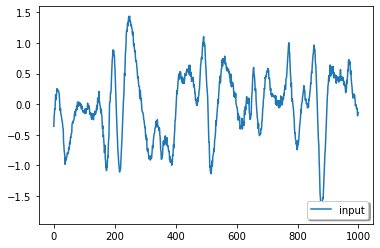

In [14]:
import matplotlib.pyplot as plt
#plt.imshow(t.reshape(64,32),cmap = 'gray')
plt.plot(x.T,label = 'input')
#plt.plot(t.T,label = 'output')
leg = plt.legend(loc='lower right', shadow=True) 
plt.show()

In [18]:
import datetime
starttime = datetime.datetime.now()
#long running
x = test_data[0]
x = x.reshape(1,1000)
print(x)
t = autoencoder.predict(x)
endtime = datetime.datetime.now()
print ((endtime - starttime))

[[-3.61986960e-01 -2.30421252e-01 -1.51577686e-01 -7.24944736e-02
  -8.13613793e-02  2.69586571e-02  1.55648612e-01  7.08138931e-02
   1.06041870e-01  1.55648612e-01  2.52225989e-01  2.55101743e-01
   2.17237659e-01  2.17237659e-01  2.28740672e-01  2.28740672e-01
   1.96628095e-01  1.93752342e-01  1.47021352e-01  5.90712343e-02
  -6.67429673e-02 -1.04607051e-01 -6.96187205e-02 -1.60204946e-01
  -1.69071851e-01 -2.01184428e-01 -2.36412405e-01 -2.80267641e-01
  -2.83143394e-01 -3.44492795e-01 -3.91463430e-01 -4.00090690e-01
  -6.13615364e-01 -6.69213258e-01 -7.51172224e-01 -7.95027460e-01
  -8.38882696e-01 -9.82191063e-01 -8.70995273e-01 -9.00471743e-01
  -9.17965908e-01 -8.85613685e-01 -8.68119520e-01 -8.56376861e-01
  -8.09645872e-01 -7.92151707e-01 -8.12521625e-01 -8.03894366e-01
  -7.83284801e-01 -7.07316988e-01 -7.36553812e-01 -7.19059647e-01
  -6.19606516e-01 -6.51719093e-01 -5.93245445e-01 -5.37647550e-01
  -5.46274810e-01 -4.87801162e-01 -4.84925409e-01 -4.61440091e-01
  -3.21247

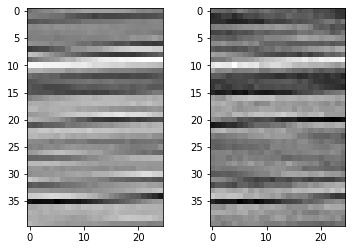

         Input                  Output


In [22]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(x.reshape(40,25),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(t.reshape(40,25),cmap='gray')
plt.show() 
print("         Input                  Output") 

In [20]:
autoencoder.save("1.h5")

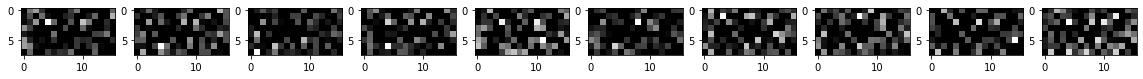

In [199]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(train_data)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((8,16)),cmap = 'gray')
plt.show()

In [200]:
knn = KNeighborsClassifier(1)
knn.fit(encoded_imgs,train_label)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [201]:
test_data_encode = encoder.predict(test_data)
print(np.shape(test_data_encode))

(493, 128)


In [202]:
print(metrics.accuracy_score(knn.predict(test_data_encode), test_label))

0.6470588235294118


In [203]:
knn1 = KNeighborsClassifier(1)
knn1.fit(train_data,train_label)
print(metrics.accuracy_score(knn1.predict(test_data), test_label))

0.59026369168357


In [204]:
from sklearn import svm
for i in range(10):
    print((i+1)*5)
    s = svm.SVC((i+1)*5, kernel='rbf')
    s.fit(encoded_imgs,train_label)
    test_data_encode = encoder.predict(test_data)
    print(metrics.accuracy_score(s.predict(test_data_encode), test_label))

5
0.7667342799188641
10
0.7505070993914807
15
0.744421906693712
20
0.7525354969574036
25
0.744421906693712
30
0.7525354969574036
35
0.7565922920892495
40
0.7586206896551724
45
0.7626774847870182
50
0.7647058823529411


In [143]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
# reshape input into [samples, timesteps, features]

tt = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
# define model
model1 = Sequential()
model1.add(LSTM(100,return_sequences= True, input_shape=(train_data.shape[1],1)))
model1.add(LSTM(30))
model1.add(RepeatVector(100))
model1.add(LSTM(100, return_sequences=True))
model1.add(TimeDistributed(Dense(1000)))
model1.compile(optimizer='adam', loss='mse',shuffle=True)

In [144]:
print(model1.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 1000, 100)         40800     
_________________________________________________________________
lstm_31 (LSTM)               (None, 30)                15720     
_________________________________________________________________
repeat_vector_9 (RepeatVecto (None, 100, 30)           0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 100, 100)          52400     
_________________________________________________________________
time_distributed_9 (TimeDist (None, 100, 1000)         101000    
Total params: 209,920
Trainable params: 209,920
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
tt